In [3]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('C:/Pythondatasets/Dataset_Sarajevo_Sa_Diskretnim_Vremenom.csv', parse_dates=True, index_col='Date (LT)')
data

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,,
2018-05-22 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid,NaN,0
2018-05-22 18:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid,5/22/2018 17:00,1
2018-05-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid,5/22/2018 18:00,2
2018-05-22 20:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid,5/22/2018 19:00,3
2018-05-22 21:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid,5/22/2018 20:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 21:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,21,8.1,34,Good,10.0,UG/M3,1 Hr,Valid,5/9/2023 20:00,38623
2023-05-09 22:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,22,10.0,42,Good,12.0,UG/M3,1 Hr,Valid,5/9/2023 21:00,38624
2023-05-09 23:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,23,12.5,52,Moderate,15.0,UG/M3,1 Hr,Valid,5/9/2023 22:00,38625


In [5]:
data2023=data.loc[data['Year']==2023]
data2023

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,,
2023-01-01 00:00:00,Sarajevo,PM2.5 - Principal,2023,1,1,0,84.0,166,Unhealthy,89.0,UG/M3,1 Hr,Valid,12/31/2022 23:00,38412
2023-01-01 01:00:00,Sarajevo,PM2.5 - Principal,2023,1,1,1,111.0,180,Unhealthy,138.0,UG/M3,1 Hr,Valid,5/10/2023 1:00,32434
2023-01-01 02:00:00,Sarajevo,PM2.5 - Principal,2023,1,1,2,117.0,183,Unhealthy,123.0,UG/M3,1 Hr,Valid,1/1/2023 1:00,38629
2023-01-01 03:00:00,Sarajevo,PM2.5 - Principal,2023,1,1,3,133.5,191,Unhealthy,150.0,UG/M3,1 Hr,Valid,1/1/2023 2:00,38630
2023-01-01 04:00:00,Sarajevo,PM2.5 - Principal,2023,1,1,4,115.7,182,Unhealthy,98.0,UG/M3,1 Hr,Valid,1/1/2023 3:00,38631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 21:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,21,8.1,34,Good,10.0,UG/M3,1 Hr,Valid,5/9/2023 20:00,38623
2023-05-09 22:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,22,10.0,42,Good,12.0,UG/M3,1 Hr,Valid,5/9/2023 21:00,38624
2023-05-09 23:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,23,12.5,52,Moderate,15.0,UG/M3,1 Hr,Valid,5/9/2023 22:00,38625


In [6]:
series = data['AQI'].squeeze()
series

Date (LT)
2018-05-22 17:00:00    42
2018-05-22 18:00:00    59
2018-05-22 19:00:00    55
2018-05-22 20:00:00    61
2018-05-22 21:00:00    55
                       ..
2023-05-09 21:00:00    34
2023-05-09 22:00:00    42
2023-05-09 23:00:00    52
2023-05-10 00:00:00    49
2023-05-10 01:00:00    49
Name: AQI, Length: 41470, dtype: int64

In [7]:
X = series
size = int(len(X)* 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
# walk-forward validation
for t in range(len(test)):
    # define model configuration
    my_order, my_seasonal_order, trend = [(2, 0, 1), (1, 0, 0, 12), 'ct']
    #my_seasonal_order = (1, 1, 1, 12)
    # define model
    model = SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order, trend=trend)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=44.419907, expected=59.000000
predicted=53.794239, expected=56.000000
predicted=58.167585, expected=56.000000
predicted=54.675700, expected=57.000000
predicted=55.149161, expected=58.000000
predicted=59.203521, expected=54.000000
predicted=45.492961, expected=51.000000
predicted=81.412252, expected=51.000000
predicted=43.776406, expected=63.000000
predicted=65.078354, expected=71.000000
predicted=70.990492, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.239539, expected=74.000000
predicted=74.751457, expected=68.000000
predicted=61.300988, expected=66.000000
predicted=64.603087, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.470330, expected=59.000000
predicted=55.112170, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.087222, expected=31.000000
predicted=23.591235, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.035728, expected=52.000000
predicted=66.774567, expected=54.000000
predicted=57.789006, expected=56.000000
predicted=60.393756, expected=57.000000
predicted=49.412408, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.825667, expected=53.000000
predicted=53.092600, expected=59.000000
predicted=63.627902, expected=58.000000
predicted=46.986313, expected=53.000000
predicted=40.517881, expected=53.000000
predicted=43.377631, expected=54.000000
predicted=63.831308, expected=53.000000
predicted=62.288934, expected=57.000000
predicted=54.399616, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.036563, expected=55.000000
predicted=53.997653, expected=58.000000
predicted=51.073827, expected=60.000000
predicted=64.251520, expected=61.000000
predicted=64.826940, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.053030, expected=55.000000
predicted=48.358817, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.926361, expected=56.000000
predicted=56.473873, expected=50.000000
predicted=45.763006, expected=41.000000
predicted=40.796526, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.221901, expected=59.000000
predicted=59.123202, expected=63.000000
predicted=65.880225, expected=66.000000
predicted=66.713303, expected=68.000000
predicted=67.644893, expected=70.000000
predicted=66.271952, expected=68.000000
predicted=64.162837, expected=67.000000
predicted=65.273356, expected=60.000000
predicted=58.528438, expected=60.000000
predicted=52.473289, expected=58.000000
predicted=49.568405, expected=56.000000
predicted=72.207683, expected=55.000000
predicted=49.457621, expected=57.000000
predicted=59.357947, expected=67.000000
predicted=70.600918, expected=70.000000
predicted=70.851553, expected=72.000000
predicted=72.635746, expected=66.000000
predicted=60.443851, expected=63.000000
predicted=60.357666, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.883593, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.193252, expected=62.000000
predicted=60.547739, expected=62.000000
predicted=59.696424, expected=62.000000
predicted=60.485335, expected=79.000000
predicted=85.247002, expected=92.000000
predicted=103.537758, expected=102.000000
predicted=103.494642, expected=93.000000
predicted=89.215258, expected=106.000000
predicted=101.972330, expected=96.000000
predicted=90.211031, expected=90.000000
predicted=81.527294, expected=86.000000
predicted=85.464068, expected=83.000000
predicted=83.625061, expected=74.000000
predicted=68.151664, expected=72.000000
predicted=69.486843, expected=75.000000
predicted=89.913111, expected=76.000000
predicted=81.888641, expected=81.000000
predicted=86.330270, expected=81.000000
predicted=68.672373, expected=84.000000
predicted=98.255554, expected=80.000000
predicted=65.210020, expected=81.000000
predicted=77.555156, expected=78.000000
predicted=74.523033, expected=74.000000
predicted=70.308888, expected=76.000000
predicted=68.348793, expected=79.00

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.502725, expected=71.000000
predicted=69.113515, expected=70.000000
predicted=66.770043, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.585179, expected=76.000000
predicted=72.657686, expected=78.000000
predicted=80.566944, expected=85.000000
predicted=84.619590, expected=84.000000
predicted=85.471067, expected=80.000000
predicted=76.467985, expected=71.000000
predicted=66.663303, expected=65.000000
predicted=60.803204, expected=62.000000
predicted=56.532757, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.997694, expected=57.000000
predicted=55.162723, expected=62.000000
predicted=65.716164, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.795680, expected=52.000000
predicted=50.001921, expected=49.000000
predicted=52.878093, expected=41.000000
predicted=34.810057, expected=39.000000
predicted=34.287580, expected=38.000000
predicted=30.353470, expected=48.000000
predicted=48.099570, expected=51.000000
predicted=50.886277, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.702183, expected=50.000000
predicted=49.123322, expected=54.000000
predicted=59.216820, expected=59.000000
predicted=54.578377, expected=58.000000
predicted=52.297008, expected=62.000000
predicted=61.180275, expected=61.000000
predicted=53.209417, expected=58.000000
predicted=56.201072, expected=60.000000
predicted=58.930949, expected=59.000000
predicted=66.614737, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.373850, expected=48.000000
predicted=43.794078, expected=54.000000
predicted=53.588746, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.247445, expected=57.000000
predicted=60.764820, expected=59.000000
predicted=56.101323, expected=62.000000
predicted=65.625053, expected=65.000000
predicted=62.753074, expected=65.000000
predicted=61.303957, expected=66.000000
predicted=67.764207, expected=71.000000
predicted=69.873324, expected=70.000000
predicted=63.209105, expected=72.000000
predicted=68.393954, expected=66.000000
predicted=69.669679, expected=67.000000
predicted=62.193285, expected=67.000000
predicted=70.520930, expected=66.000000
predicted=64.620460, expected=64.000000
predicted=63.974749, expected=63.000000
predicted=63.125065, expected=67.000000
predicted=66.062903, expected=67.000000
predicted=66.712752, expected=73.000000
predicted=77.934608, expected=81.000000
predicted=80.007799, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.821558, expected=85.000000
predicted=78.829191, expected=83.000000
predicted=83.591186, expected=72.000000
predicted=66.797466, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.247349, expected=69.000000
predicted=68.229563, expected=60.000000
predicted=55.801647, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.781559, expected=48.000000
predicted=44.705028, expected=43.000000
predicted=45.876732, expected=40.000000
predicted=43.777312, expected=41.000000
predicted=38.263034, expected=41.000000
predicted=44.091566, expected=39.000000
predicted=35.066321, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.609563, expected=30.000000
predicted=22.558715, expected=33.000000
predicted=43.135427, expected=29.000000
predicted=17.439474, expected=28.000000
predicted=21.485090, expected=26.000000
predicted=24.986017, expected=29.000000
predicted=25.897212, expected=40.000000
predicted=41.673507, expected=34.000000
predicted=33.352072, expected=32.000000
predicted=30.029182, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.882911, expected=25.000000
predicted=19.091056, expected=33.000000
predicted=32.451385, expected=35.000000
predicted=38.829279, expected=36.000000
predicted=30.817740, expected=37.000000
predicted=36.332351, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.589522, expected=39.000000
predicted=40.451661, expected=45.000000
predicted=54.658176, expected=45.000000
predicted=35.016996, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.908525, expected=48.000000
predicted=43.138457, expected=47.000000
predicted=43.649113, expected=55.000000
predicted=64.221068, expected=50.000000
predicted=46.533989, expected=50.000000
predicted=48.456176, expected=48.000000
predicted=46.431179, expected=49.000000
predicted=51.165530, expected=51.000000
predicted=47.255393, expected=54.000000
predicted=59.565703, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.909535, expected=59.000000
predicted=62.700952, expected=69.000000
predicted=67.499065, expected=68.000000
predicted=65.954738, expected=66.000000
predicted=71.383907, expected=63.000000
predicted=53.595197, expected=61.000000
predicted=60.111758, expected=54.000000
predicted=48.619881, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.641682, expected=57.000000
predicted=57.624529, expected=56.000000
predicted=56.522657, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.400651, expected=59.000000
predicted=57.771247, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.919325, expected=77.000000
predicted=73.992345, expected=80.000000
predicted=77.968063, expected=73.000000
predicted=67.298345, expected=68.000000
predicted=63.957620, expected=70.000000
predicted=63.447524, expected=70.000000
predicted=72.571337, expected=64.000000
predicted=61.146228, expected=58.000000
predicted=53.322670, expected=53.000000
predicted=55.725830, expected=57.000000
predicted=52.547125, expected=60.000000
predicted=71.603223, expected=70.000000
predicted=74.163335, expected=74.000000
predicted=75.084606, expected=77.000000
predicted=69.521884, expected=73.000000
predicted=68.054613, expected=67.000000
predicted=67.244509, expected=60.000000
predicted=56.009476, expected=47.000000
predicted=36.167622, expected=36.000000
predicted=27.649301, expected=35.000000
predicted=31.074829, expected=36.000000
predicted=40.870928, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.317203, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.982819, expected=64.000000
predicted=65.870236, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.292221, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.543915, expected=69.000000
predicted=63.144996, expected=59.000000
predicted=50.156855, expected=58.000000
predicted=46.706286, expected=56.000000
predicted=48.125097, expected=54.000000
predicted=54.613319, expected=48.000000
predicted=46.075494, expected=47.000000
predicted=63.045617, expected=44.000000
predicted=36.766364, expected=60.000000
predicted=69.515353, expected=62.000000
predicted=68.014421, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.073767, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.311788, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.725998, expected=54.000000
predicted=52.525927, expected=40.000000
predicted=33.039506, expected=30.000000
predicted=24.398563, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.636501, expected=23.000000
predicted=22.535925, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.645081, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.652272, expected=57.000000
predicted=53.910608, expected=58.000000
predicted=58.075154, expected=58.000000
predicted=60.823063, expected=62.000000
predicted=53.427023, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.232926, expected=56.000000
predicted=43.023045, expected=55.000000
predicted=48.489344, expected=52.000000
predicted=48.303487, expected=49.000000
predicted=46.300969, expected=43.000000
predicted=61.959163, expected=36.000000
predicted=32.494608, expected=56.000000
predicted=59.946932, expected=55.000000
predicted=54.162584, expected=58.000000
predicted=57.472054, expected=56.000000
predicted=57.902993, expected=61.000000
predicted=58.419685, expected=64.000000
predicted=60.760761, expected=61.000000
predicted=59.191528, expected=52.000000
predicted=45.474128, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.132021, expected=43.000000
predicted=35.073924, expected=38.000000
predicted=30.610143, expected=44.000000
predicted=65.082617, expected=47.000000
predicted=40.401655, expected=53.000000
predicted=56.474688, expected=62.000000
predicted=61.221231, expected=53.000000
predicted=54.254750, expected=44.000000
predicted=41.137621, expected=35.000000
predicted=27.296525, expected=34.000000
predicted=25.381322, expected=33.000000
predicted=32.894830, expected=38.000000
predicted=33.291921, expected=35.000000
predicted=30.880810, expected=40.000000
predicted=47.652302, expected=51.000000
predicted=54.635639, expected=52.000000
predicted=55.833152, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.224236, expected=53.000000
predicted=42.122701, expected=52.000000
predicted=44.927392, expected=52.000000
predicted=45.475204, expected=51.000000
predicted=51.330447, expected=38.000000
predicted=32.059412, expected=35.000000
predicted=37.297143, expected=49.000000
predicted=47.972475, expected=52.000000
predicted=57.284642, expected=57.000000
predicted=65.867516, expected=55.000000
predicted=50.636869, expected=65.000000
predicted=63.484479, expected=86.000000
predicted=95.937557, expected=85.000000
predicted=81.457467, expected=71.000000
predicted=64.909775, expected=56.000000
predicted=48.320343, expected=63.000000
predicted=51.861545, expected=63.000000
predicted=62.782067, expected=58.000000
predicted=68.749628, expected=52.000000
predicted=47.137005, expected=43.000000
predicted=41.998075, expected=38.000000
predicted=31.753807, expected=29.000000
predicted=34.734051, expected=23.000000
predicted=36.499962, expected=20.000000
predicted=11.342932, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.219418, expected=39.000000
predicted=34.177760, expected=34.000000
predicted=24.689572, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.809686, expected=27.000000
predicted=24.047034, expected=28.000000
predicted=49.018523, expected=24.000000
predicted=15.901204, expected=33.000000
predicted=38.566390, expected=31.000000
predicted=33.689146, expected=28.000000
predicted=25.292335, expected=24.000000
predicted=15.218012, expected=20.000000
predicted=16.466008, expected=14.000000
predicted=7.354401, expected=9.000000
predicted=4.074151, expected=7.000000
predicted=3.714347, expected=10.000000
predicted=8.934845, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.914506, expected=28.000000
predicted=27.613237, expected=41.000000
predicted=53.761617, expected=54.000000
predicted=52.805689, expected=53.000000
predicted=49.148005, expected=44.000000
predicted=36.811086, expected=30.000000
predicted=21.407987, expected=21.000000
predicted=12.236678, expected=17.000000
predicted=11.571775, expected=17.000000
predicted=15.488264, expected=21.000000
predicted=24.465141, expected=15.000000
predicted=15.618267, expected=13.000000
predicted=21.304275, expected=25.000000
predicted=35.597416, expected=31.000000
predicted=39.928410, expected=26.000000
predicted=18.666608, expected=15.000000
predicted=2.507097, expected=14.000000
predicted=2.824112, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=10.876718, expected=12.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9.697059, expected=8.000000
predicted=7.210600, expected=6.000000
predicted=8.130974, expected=3.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-5.467792, expected=3.000000
predicted=1.980128, expected=6.000000
predicted=17.787924, expected=11.000000
predicted=13.843315, expected=22.000000
predicted=18.222327, expected=23.000000
predicted=13.986953, expected=18.000000
predicted=17.829896, expected=17.000000
predicted=16.912222, expected=25.000000
predicted=23.366079, expected=53.000000
predicted=57.979494, expected=58.000000
predicted=57.943959, expected=49.000000
predicted=42.187176, expected=39.000000
predicted=34.461334, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.749334, expected=33.000000
predicted=35.635830, expected=38.000000
predicted=46.450868, expected=40.000000
predicted=36.702046, expected=36.000000
predicted=28.122908, expected=43.000000
predicted=44.146776, expected=42.000000
predicted=47.959712, expected=46.000000
predicted=68.829051, expected=40.000000
predicted=32.924413, expected=34.000000
predicted=20.547292, expected=30.000000
predicted=21.131824, expected=31.000000
predicted=25.362316, expected=32.000000
predicted=37.021409, expected=33.000000
predicted=36.180873, expected=29.000000
predicted=26.972372, expected=31.000000
predicted=26.196340, expected=40.000000
predicted=49.404013, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.483995, expected=56.000000
predicted=61.595113, expected=56.000000
predicted=48.263766, expected=60.000000
predicted=56.057596, expected=62.000000
predicted=59.427277, expected=64.000000
predicted=65.207910, expected=70.000000
predicted=70.842847, expected=63.000000
predicted=59.600286, expected=67.000000
predicted=62.263532, expected=65.000000
predicted=65.522378, expected=64.000000
predicted=69.433669, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.884513, expected=63.000000
predicted=67.817627, expected=64.000000
predicted=60.031185, expected=59.000000
predicted=59.453471, expected=54.000000
predicted=51.662416, expected=44.000000
predicted=40.739665, expected=35.000000
predicted=35.846946, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.391344, expected=29.000000
predicted=33.653942, expected=27.000000
predicted=23.122830, expected=26.000000
predicted=24.885332, expected=28.000000
predicted=25.889689, expected=30.000000
predicted=33.037936, expected=38.000000
predicted=40.546873, expected=48.000000
predicted=45.918508, expected=52.000000
predicted=49.645202, expected=58.000000
predicted=51.523124, expected=67.000000
predicted=63.643989, expected=63.000000
predicted=58.743014, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.595686, expected=77.000000
predicted=77.579459, expected=79.000000
predicted=77.544103, expected=75.000000
predicted=73.726102, expected=78.000000
predicted=77.885603, expected=71.000000
predicted=73.282076, expected=62.000000
predicted=63.625835, expected=60.000000
predicted=57.886678, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.827799, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.361580, expected=44.000000
predicted=33.497317, expected=43.000000
predicted=44.371028, expected=40.000000
predicted=48.697325, expected=39.000000
predicted=36.274669, expected=48.000000
predicted=45.856799, expected=55.000000
predicted=60.771062, expected=64.000000
predicted=59.221997, expected=71.000000
predicted=66.372940, expected=74.000000
predicted=74.978909, expected=71.000000
predicted=67.769448, expected=68.000000
predicted=61.647597, expected=66.000000
predicted=57.169214, expected=63.000000
predicted=62.348482, expected=62.000000
predicted=57.842432, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.230261, expected=78.000000
predicted=87.240360, expected=86.000000
predicted=90.592612, expected=90.000000
predicted=95.451212, expected=84.000000
predicted=83.852809, expected=88.000000
predicted=87.860342, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.270382, expected=108.000000
predicted=103.495010, expected=92.000000
predicted=83.976815, expected=81.000000
predicted=73.193938, expected=81.000000
predicted=79.073306, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.682213, expected=70.000000
predicted=69.956638, expected=60.000000
predicted=60.422159, expected=59.000000
predicted=58.625123, expected=63.000000
predicted=56.696852, expected=89.000000
predicted=101.926167, expected=82.000000
predicted=100.192264, expected=60.000000
predicted=41.164721, expected=53.000000
predicted=35.795420, expected=59.000000
predicted=55.193506, expected=67.000000
predicted=72.842530, expected=66.000000
predicted=61.793728, expected=64.000000
predicted=57.293913, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.256421, expected=54.000000
predicted=55.623036, expected=56.000000
predicted=59.864403, expected=64.000000
predicted=88.066861, expected=70.000000
predicted=56.996412, expected=68.000000
predicted=47.977357, expected=69.000000
predicted=68.447349, expected=69.000000
predicted=75.791192, expected=71.000000
predicted=75.940381, expected=73.000000
predicted=68.885690, expected=77.000000
predicted=75.217768, expected=89.000000
predicted=81.141654, expected=99.000000
predicted=106.143227, expected=97.000000
predicted=96.121267, expected=103.000000
predicted=109.408810, expected=80.000000
predicted=73.800086, expected=76.000000
predicted=68.657432, expected=65.000000
predicted=61.268475, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.716266, expected=57.000000
predicted=57.566827, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.340721, expected=52.000000
predicted=53.456111, expected=56.000000
predicted=66.165737, expected=53.000000
predicted=56.968481, expected=58.000000
predicted=54.000207, expected=55.000000
predicted=59.579168, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.131654, expected=64.000000
predicted=66.387662, expected=64.000000
predicted=54.948843, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.912263, expected=48.000000
predicted=46.565709, expected=38.000000
predicted=31.095921, expected=42.000000
predicted=41.223345, expected=40.000000
predicted=42.877194, expected=40.000000
predicted=35.238555, expected=49.000000
predicted=56.323745, expected=56.000000
predicted=53.340654, expected=69.000000
predicted=82.054245, expected=64.000000
predicted=57.681965, expected=59.000000
predicted=56.125937, expected=56.000000
predicted=47.428063, expected=54.000000
predicted=46.061045, expected=45.000000
predicted=34.666409, expected=58.000000
predicted=67.512664, expected=64.000000
predicted=62.062221, expected=71.000000
predicted=72.288632, expected=81.000000
predicted=90.812059, expected=85.000000
predicted=88.340276, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=98.008405, expected=78.000000
predicted=64.232029, expected=74.000000
predicted=67.453781, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.178963, expected=79.000000
predicted=77.328872, expected=79.000000
predicted=69.866093, expected=76.000000
predicted=87.816972, expected=69.000000
predicted=66.844836, expected=61.000000
predicted=61.092842, expected=67.000000
predicted=74.361412, expected=67.000000
predicted=66.594467, expected=71.000000
predicted=73.541266, expected=76.000000
predicted=65.480630, expected=83.000000
predicted=83.824942, expected=96.000000
predicted=103.219368, expected=96.000000
predicted=95.856936, expected=111.000000
predicted=113.481474, expected=106.000000
predicted=100.179813, expected=109.000000
predicted=102.479472, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.365233, expected=118.000000
predicted=128.247545, expected=130.000000
predicted=130.300678, expected=131.000000
predicted=132.622354, expected=149.000000
predicted=155.500021, expected=156.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.661006, expected=162.000000
predicted=170.825770, expected=157.000000
predicted=148.673121, expected=133.000000
predicted=135.893261, expected=95.000000
predicted=71.192863, expected=80.000000
predicted=76.714148, expected=78.000000
predicted=70.746986, expected=68.000000
predicted=78.244415, expected=62.000000
predicted=66.354186, expected=58.000000
predicted=53.528202, expected=58.000000
predicted=73.855326, expected=60.000000
predicted=62.077549, expected=57.000000
predicted=59.675679, expected=57.000000
predicted=51.234775, expected=66.000000
predicted=49.206452, expected=79.000000
predicted=56.523193, expected=82.000000
predicted=81.307136, expected=81.000000
predicted=83.581138, expected=80.000000
predicted=70.463255, expected=81.000000
predicted=77.545111, expected=119.000000
predicted=127.932410, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.890208, expected=152.000000
predicted=151.558708, expected=156.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.752482, expected=155.000000
predicted=152.272963, expected=153.000000
predicted=157.232885, expected=143.000000
predicted=145.678596, expected=127.000000
predicted=117.391247, expected=118.000000
predicted=110.097285, expected=103.000000
predicted=95.112180, expected=95.000000
predicted=91.435249, expected=82.000000
predicted=110.359343, expected=94.000000
predicted=116.085913, expected=93.000000
predicted=80.466087, expected=98.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.366296, expected=108.000000
predicted=109.042615, expected=133.000000
predicted=139.301210, expected=147.000000
predicted=142.903017, expected=153.000000
predicted=142.585212, expected=155.000000
predicted=151.028249, expected=156.000000
predicted=143.902410, expected=155.000000
predicted=149.921855, expected=153.000000
predicted=140.842582, expected=152.000000
predicted=164.007215, expected=158.000000
predicted=153.103309, expected=165.000000
predicted=169.230776, expected=167.000000
predicted=172.673876, expected=176.000000
predicted=195.857317, expected=175.000000
predicted=177.414915, expected=171.000000
predicted=168.106808, expected=161.000000
predicted=155.405690, expected=152.000000
predicted=147.370674, expected=137.000000
predicted=129.344243, expected=109.000000
predicted=97.104070, expected=92.000000
predicted=85.007870, expected=80.000000
predicted=81.377196, expected=88.000000
predicted=95.020272, expected=82.000000
predicted=80.164103, expected=85.000000
pr

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=129.467987, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=152.214767, expected=163.000000
predicted=169.070969, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.638211, expected=181.000000
predicted=180.028600, expected=177.000000
predicted=179.514420, expected=172.000000
predicted=168.357287, expected=167.000000
predicted=181.816443, expected=160.000000
predicted=155.342705, expected=156.000000
predicted=150.238134, expected=153.000000
predicted=141.211399, expected=151.000000
predicted=149.164844, expected=140.000000
predicted=163.580555, expected=134.000000
predicted=131.176034, expected=123.000000
predicted=126.071914, expected=126.000000
predicted=126.468756, expected=126.000000
predicted=120.268291, expected=149.000000
predicted=152.511865, expected=155.000000
predicted=153.876340, expected=158.000000
predicted=153.435309, expected=159.000000
predicted=156.797187, expected=159.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.340605, expected=158.000000
predicted=155.438297, expected=156.000000
predicted=144.522472, expected=131.000000
predicted=119.325938, expected=146.000000
predicted=140.817696, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.831681, expected=154.000000
predicted=152.405572, expected=156.000000
predicted=175.671766, expected=155.000000
predicted=151.610658, expected=157.000000
predicted=156.423570, expected=155.000000
predicted=152.817810, expected=153.000000
predicted=150.600811, expected=149.000000
predicted=145.473458, expected=128.000000
predicted=118.536634, expected=111.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.056385, expected=110.000000
predicted=129.622403, expected=109.000000
predicted=109.657413, expected=117.000000
predicted=118.692091, expected=130.000000
predicted=134.832828, expected=83.000000
predicted=66.218842, expected=68.000000
predicted=64.070761, expected=58.000000
predicted=52.425552, expected=51.000000
predicted=47.962331, expected=44.000000
predicted=39.496377, expected=37.000000
predicted=17.733962, expected=31.000000
predicted=20.721361, expected=28.000000
predicted=32.342884, expected=26.000000
predicted=25.805957, expected=36.000000
predicted=47.366885, expected=33.000000
predicted=42.330222, expected=27.000000
predicted=-21.113485, expected=24.000000
predicted=23.307980, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.956952, expected=19.000000
predicted=14.917458, expected=43.000000
predicted=46.187647, expected=36.000000
predicted=29.488256, expected=54.000000
predicted=55.348599, expected=65.000000
predicted=66.771503, expected=71.000000
predicted=70.675213, expected=86.000000
predicted=98.677070, expected=76.000000
predicted=65.362640, expected=103.000000
predicted=104.293067, expected=103.000000
predicted=100.219117, expected=121.000000
predicted=123.154914, expected=135.000000
predicted=134.676675, expected=130.000000
predicted=148.067114, expected=142.000000
predicted=128.883793, expected=156.000000
predicted=175.081718, expected=160.000000
predicted=162.905472, expected=159.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=157.057055, expected=162.000000
predicted=171.145324, expected=165.000000
predicted=149.140857, expected=157.000000
predicted=178.530676, expected=152.000000
predicted=139.616420, expected=151.000000
predicted=163.692575, expected=153.000000
predicted=158.719175, expected=153.000000
predicted=141.897588, expected=153.000000
predicted=163.143376, expected=153.000000
predicted=160.566716, expected=152.000000
predicted=149.353995, expected=152.000000
predicted=148.159429, expected=151.000000
predicted=152.333631, expected=157.000000
predicted=159.548751, expected=152.000000
predicted=141.116905, expected=118.000000
predicted=103.673642, expected=121.000000
predicted=121.055371, expected=129.000000
predicted=133.136751, expected=112.000000
predicted=105.521609, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.237706, expected=58.000000
predicted=50.823728, expected=52.000000
predicted=49.197865, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.937415, expected=53.000000
predicted=53.317701, expected=57.000000
predicted=64.932243, expected=58.000000
predicted=52.984131, expected=62.000000
predicted=34.493432, expected=72.000000
predicted=88.608906, expected=77.000000
predicted=86.152570, expected=84.000000
predicted=68.352478, expected=91.000000
predicted=66.862823, expected=84.000000
predicted=73.303451, expected=91.000000
predicted=93.022031, expected=101.000000
predicted=104.890338, expected=110.000000
predicted=112.088079, expected=110.000000
predicted=111.236881, expected=105.000000
predicted=100.728830, expected=80.000000
predicted=72.908475, expected=63.000000
predicted=63.011371, expected=78.000000
predicted=82.428793, expected=63.000000
predicted=61.984235, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.190280, expected=48.000000
predicted=34.466064, expected=34.000000
predicted=37.013511, expected=23.000000
predicted=26.204380, expected=16.000000
predicted=18.796977, expected=16.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=13.481521, expected=14.000000
predicted=9.338485, expected=11.000000
predicted=-10.462446, expected=10.000000
predicted=2.300381, expected=9.000000
predicted=28.325356, expected=17.000000
predicted=2.169127, expected=25.000000
predicted=30.047256, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.134299, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.285053, expected=47.000000
predicted=41.061823, expected=44.000000
predicted=38.965251, expected=43.000000
predicted=43.401451, expected=38.000000
predicted=33.105899, expected=70.000000
predicted=76.199132, expected=80.000000
predicted=81.870241, expected=78.000000
predicted=74.635059, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.219489, expected=78.000000
predicted=79.150238, expected=84.000000
predicted=98.041701, expected=94.000000
predicted=90.078514, expected=103.000000
predicted=104.833017, expected=106.000000
predicted=101.419767, expected=107.000000
predicted=104.834789, expected=112.000000
predicted=106.865296, expected=99.000000
predicted=122.954584, expected=90.000000
predicted=84.286413, expected=86.000000
predicted=77.079220, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.391843, expected=76.000000
predicted=68.488794, expected=134.000000
predicted=157.542926, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.614362, expected=155.000000
predicted=159.116850, expected=161.000000
predicted=160.261588, expected=155.000000
predicted=150.483087, expected=151.000000
predicted=151.313733, expected=135.000000
predicted=114.212741, expected=127.000000
predicted=117.497953, expected=125.000000
predicted=121.475537, expected=128.000000
predicted=122.811627, expected=120.000000
predicted=113.615447, expected=101.000000
predicted=146.762084, expected=119.000000
predicted=122.112122, expected=139.000000
predicted=140.670902, expected=140.000000
predicted=143.849627, expected=154.000000
predicted=150.146034, expected=157.000000
predicted=155.086796, expected=160.000000
predicted=146.427116, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.262273, expected=165.000000
predicted=164.452924, expected=159.000000
predicted=158.579258, expected=158.000000
predicted=147.353288, expected=155.000000
predicted=136.921842, expected=153.000000
predicted=172.251165, expected=155.000000
predicted=166.756854, expected=161.000000
predicted=155.517197, expected=167.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=179.067253, expected=172.000000
predicted=170.465000, expected=174.000000
predicted=174.481537, expected=171.000000
predicted=171.029601, expected=167.000000
predicted=163.677585, expected=163.000000
predicted=154.260402, expected=161.000000
predicted=159.650436, expected=157.000000
predicted=151.972312, expected=156.000000
predicted=153.283175, expected=153.000000
predicted=153.110643, expected=148.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.916336, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.195820, expected=156.000000
predicted=158.238435, expected=160.000000
predicted=160.392272, expected=163.000000
predicted=159.484875, expected=164.000000
predicted=160.419592, expected=167.000000
predicted=164.345511, expected=168.000000
predicted=166.491792, expected=173.000000
predicted=170.196563, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=170.522723, expected=162.000000
predicted=154.806157, expected=158.000000
predicted=151.252525, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.988779, expected=161.000000
predicted=160.005599, expected=163.000000
predicted=165.052628, expected=164.000000
predicted=164.369744, expected=156.000000
predicted=151.973380, expected=152.000000
predicted=151.596099, expected=155.000000
predicted=154.687823, expected=160.000000
predicted=164.720635, expected=157.000000
predicted=152.636675, expected=154.000000
predicted=142.960461, expected=150.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=146.888229, expected=135.000000
predicted=132.296677, expected=159.000000
predicted=165.697306, expected=159.000000
predicted=159.893688, expected=159.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.049058, expected=163.000000
predicted=155.345823, expected=153.000000
predicted=147.243125, expected=117.000000
predicted=108.149445, expected=108.000000
predicted=107.201758, expected=111.000000
predicted=106.984622, expected=119.000000
predicted=119.292847, expected=117.000000
predicted=113.433478, expected=123.000000
predicted=111.920407, expected=127.000000
predicted=154.015430, expected=157.000000
predicted=159.053446, expected=166.000000
predicted=167.850087, expected=169.000000
predicted=172.396567, expected=174.000000
predicted=163.860375, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=145.150966, expected=175.000000
predicted=175.330074, expected=171.000000
predicted=173.558585, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.088583, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.172397, expected=157.000000
predicted=158.831457, expected=153.000000
predicted=151.326450, expected=147.000000
predicted=168.980079, expected=159.000000
predicted=160.255440, expected=160.000000
predicted=158.509009, expected=159.000000
predicted=160.839613, expected=159.000000
predicted=158.073309, expected=160.000000
predicted=157.607805, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=162.141024, expected=171.000000
predicted=167.600164, expected=172.000000
predicted=170.260109, expected=174.000000
predicted=169.654023, expected=173.000000
predicted=169.019251, expected=172.000000
predicted=165.783640, expected=174.000000
predicted=185.607898, expected=186.000000
predicted=185.559185, expected=197.000000
predicted=197.362165, expected=207.000000
predicted=208.587405, expected=217.000000
predicted=219.021471, expected=216.000000
predicted=217.656570, expected=206.000000
predicted=204.220099, expected=203.000000
predicted=198.453812, expected=197.000000
predicted=194.204888, expected=189.000000
predicted=182.776133, expected=183.000000
predicted=178.401343, expected=176.000000
predicted=174.083567, expected=181.000000
predicted=191.240258, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=176.903020, expected=170.000000
predicted=172.956623, expected=167.000000
predicted=170.940792, expected=168.000000
predicted=163.523526, expected=171.000000
predicted=162.440193, expected=176.000000
predicted=177.364229, expected=180.000000
predicted=176.365454, expected=180.000000
predicted=173.782656, expected=182.000000
predicted=178.624945, expected=180.000000
predicted=173.788065, expected=178.000000
predicted=182.749561, expected=180.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.540748, expected=195.000000
predicted=196.656140, expected=208.000000
predicted=209.368721, expected=215.000000
predicted=217.376981, expected=214.000000
predicted=214.066172, expected=212.000000
predicted=212.629696, expected=201.000000
predicted=197.273427, expected=192.000000
predicted=185.523119, expected=182.000000
predicted=178.525858, expected=171.000000
predicted=163.308355, expected=169.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.504945, expected=160.000000
predicted=158.358299, expected=157.000000
predicted=167.919234, expected=161.000000
predicted=168.735105, expected=158.000000
predicted=158.694728, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.432803, expected=168.000000
predicted=167.044004, expected=169.000000
predicted=159.569047, expected=170.000000
predicted=164.896175, expected=168.000000
predicted=160.485681, expected=168.000000
predicted=160.219233, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.377489, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.093095, expected=153.000000
predicted=150.430610, expected=152.000000
predicted=155.130352, expected=171.000000
predicted=171.949238, expected=185.000000
predicted=195.601993, expected=190.000000
predicted=190.951514, expected=186.000000
predicted=182.874290, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=185.943563, expected=180.000000
predicted=173.885223, expected=172.000000
predicted=168.187048, expected=168.000000
predicted=158.667021, expected=160.000000
predicted=154.318339, expected=156.000000
predicted=150.841294, expected=155.000000
predicted=153.581765, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=169.993825, expected=150.000000
predicted=154.655452, expected=127.000000
predicted=118.655679, expected=117.000000
predicted=107.400860, expected=160.000000
predicted=175.268889, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.524356, expected=165.000000
predicted=158.177939, expected=169.000000
predicted=168.015099, expected=165.000000
predicted=156.677952, expected=155.000000
predicted=149.226857, expected=133.000000
predicted=124.968946, expected=85.000000
predicted=67.770845, expected=67.000000
predicted=56.573240, expected=61.000000
predicted=39.192685, expected=55.000000
predicted=51.136851, expected=58.000000
predicted=101.827303, expected=63.000000
predicted=60.000930, expected=68.000000
predicted=64.289885, expected=68.000000
predicted=73.210853, expected=70.000000
predicted=66.731288, expected=68.000000
predicted=60.220735, expected=60.000000
predicted=41.179344, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.861238, expected=51.000000
predicted=48.110073, expected=40.000000
predicted=37.161651, expected=34.000000
predicted=28.114584, expected=25.000000
predicted=26.078551, expected=27.000000
predicted=30.736777, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.941816, expected=68.000000
predicted=78.703185, expected=62.000000
predicted=61.918179, expected=40.000000
predicted=29.531474, expected=30.000000
predicted=18.836186, expected=21.000000
predicted=15.240796, expected=17.000000
predicted=13.162633, expected=10.000000
predicted=-1.362448, expected=32.000000
predicted=36.321125, expected=109.000000
predicted=126.986786, expected=133.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=145.001334, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.783435, expected=153.000000
predicted=185.635274, expected=118.000000
predicted=86.029007, expected=109.000000
predicted=83.203618, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.233922, expected=76.000000
predicted=62.475454, expected=60.000000
predicted=51.440641, expected=49.000000
predicted=38.046854, expected=39.000000
predicted=55.830313, expected=32.000000
predicted=91.733587, expected=30.000000
predicted=27.032795, expected=34.000000
predicted=45.549869, expected=38.000000
predicted=32.410678, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.383439, expected=67.000000
predicted=72.251931, expected=58.000000
predicted=46.184677, expected=46.000000
predicted=28.927458, expected=29.000000
predicted=14.435194, expected=23.000000
predicted=15.577606, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.704636, expected=23.000000
predicted=19.618332, expected=20.000000
predicted=18.852681, expected=14.000000
predicted=15.633464, expected=13.000000
predicted=14.312120, expected=7.000000
predicted=24.098629, expected=7.000000
predicted=5.087139, expected=10.000000
predicted=0.361403, expected=9.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.310954, expected=6.000000
predicted=-6.802294, expected=11.000000
predicted=12.069818, expected=20.000000
predicted=23.673436, expected=23.000000
predicted=24.670781, expected=22.000000
predicted=17.735611, expected=32.000000
predicted=29.454900, expected=35.000000
predicted=35.828464, expected=44.000000
predicted=40.445344, expected=49.000000
predicted=50.899387, expected=43.000000
predicted=42.206298, expected=34.000000
predicted=27.347015, expected=25.000000
predicted=17.703674, expected=19.000000
predicted=20.794903, expected=18.000000
predicted=22.955688, expected=25.000000
predicted=25.936965, expected=27.000000
predicted=24.605045, expected=22.000000
predicted=28.606205, expected=30.000000
predicted=31.159641, expected=44.000000
predicted=54.654065, expected=49.000000
predicted=51.591467, expected=55.000000
predicted=48.681029, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.082293, expected=59.000000
predicted=55.591118, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.712296, expected=48.000000
predicted=43.193231, expected=34.000000
predicted=34.289095, expected=23.000000
predicted=17.433774, expected=12.000000
predicted=1.728099, expected=7.000000
predicted=12.908995, expected=26.000000
predicted=41.651966, expected=38.000000
predicted=41.682301, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.573433, expected=56.000000
predicted=50.102149, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.554905, expected=69.000000
predicted=68.219034, expected=70.000000
predicted=56.395850, expected=74.000000
predicted=64.857889, expected=83.000000
predicted=78.656892, expected=89.000000
predicted=82.597081, expected=86.000000
predicted=81.685926, expected=92.000000
predicted=110.196114, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.149373, expected=62.000000
predicted=58.727412, expected=54.000000
predicted=55.748155, expected=54.000000
predicted=56.504519, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.833968, expected=44.000000
predicted=40.005422, expected=49.000000
predicted=52.908872, expected=45.000000
predicted=50.164503, expected=37.000000
predicted=36.561191, expected=29.000000
predicted=21.282260, expected=23.000000
predicted=27.071215, expected=22.000000
predicted=3.614430, expected=25.000000
predicted=20.340095, expected=29.000000
predicted=26.971340, expected=35.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.334336, expected=56.000000
predicted=59.684751, expected=59.000000
predicted=53.979043, expected=63.000000
predicted=69.771555, expected=60.000000
predicted=52.769767, expected=66.000000
predicted=60.164199, expected=70.000000
predicted=64.974529, expected=66.000000
predicted=60.110734, expected=80.000000
predicted=83.459506, expected=111.000000
predicted=122.113051, expected=103.000000
predicted=101.253602, expected=105.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.843059, expected=103.000000
predicted=116.866789, expected=105.000000
predicted=99.409032, expected=116.000000
predicted=119.412504, expected=120.000000
predicted=115.146059, expected=121.000000
predicted=125.222206, expected=133.000000
predicted=136.297272, expected=120.000000
predicted=108.626633, expected=114.000000
predicted=123.169860, expected=99.000000
predicted=116.066316, expected=96.000000
predicted=76.272145, expected=89.000000
predicted=88.871605, expected=89.000000
predicted=85.572008, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=107.553749, expected=119.000000
predicted=133.079677, expected=120.000000
predicted=119.765510, expected=142.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.113325, expected=153.000000
predicted=165.926866, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=146.612746, expected=170.000000
predicted=169.133723, expected=178.000000
predicted=166.869252, expected=178.000000
predicted=177.388297, expected=184.000000
predicted=177.865046, expected=184.000000
predicted=183.135855, expected=183.000000
predicted=191.407565, expected=179.000000
predicted=186.123755, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=170.186491, expected=173.000000
predicted=187.971348, expected=169.000000
predicted=168.683823, expected=169.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=170.368944, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.880038, expected=159.000000
predicted=160.546009, expected=155.000000
predicted=149.849821, expected=154.000000
predicted=157.862616, expected=152.000000
predicted=148.713311, expected=150.000000
predicted=147.521556, expected=135.000000
predicted=126.168745, expected=144.000000
predicted=146.299676, expected=148.000000
predicted=144.766461, expected=111.000000
predicted=96.570050, expected=84.000000
predicted=75.576790, expected=71.000000
predicted=61.094963, expected=74.000000
predicted=73.366841, expected=70.000000
predicted=67.120340, expected=76.000000
predicted=78.809353, expected=75.000000
predicted=73.905681, expected=75.000000
predicted=74.222689, expected=86.000000
predicted=76.857691, expected=97.000000
predicted=113.542038, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.032281, expected=104.000000
predicted=69.379336, expected=100.000000
predicted=84.415132, expected=99.000000
predicted=94.585831, expected=90.000000
predicted=92.953285, expected=85.000000
predicted=77.474163, expected=82.000000
predicted=85.995563, expected=78.000000
predicted=72.639345, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.573825, expected=58.000000
predicted=63.492431, expected=59.000000
predicted=64.998073, expected=65.000000
predicted=67.349961, expected=66.000000
predicted=66.022489, expected=72.000000
predicted=69.117948, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.476427, expected=80.000000
predicted=73.536676, expected=84.000000
predicted=82.746099, expected=75.000000
predicted=70.199257, expected=88.000000
predicted=88.248921, expected=117.000000
predicted=117.397596, expected=127.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.984675, expected=127.000000
predicted=129.019448, expected=141.000000
predicted=148.265697, expected=152.000000
predicted=152.118963, expected=124.000000
predicted=117.397988, expected=157.000000
predicted=164.118498, expected=156.000000
predicted=158.285811, expected=159.000000
predicted=158.808507, expected=157.000000
predicted=143.947471, expected=156.000000
predicted=167.065077, expected=152.000000
predicted=170.609152, expected=144.000000
predicted=139.064026, expected=121.000000
predicted=107.774770, expected=120.000000
predicted=130.102172, expected=120.000000
predicted=124.707640, expected=139.000000
predicted=115.048687, expected=122.000000
predicted=153.958505, expected=113.000000
predicted=98.810898, expected=99.000000
predicted=95.974998, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.748578, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=117.862850, expected=153.000000
predicted=162.534327, expected=164.000000
predicted=161.467994, expected=167.000000
predicted=148.306816, expected=174.000000
predicted=180.482087, expected=178.000000
predicted=178.036499, expected=179.000000
predicted=194.294038, expected=182.000000
predicted=159.434202, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=182.527131, expected=183.000000
predicted=169.453372, expected=187.000000
predicted=186.921878, expected=187.000000
predicted=200.705884, expected=184.000000
predicted=211.465718, expected=183.000000
predicted=177.722131, expected=180.000000
predicted=175.304977, expected=173.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=174.022658, expected=167.000000
predicted=164.852906, expected=165.000000
predicted=162.458893, expected=166.000000
predicted=167.437975, expected=168.000000
predicted=171.208829, expected=171.000000
predicted=165.757225, expected=176.000000
predicted=181.281438, expected=177.000000
predicted=175.204358, expected=180.000000
predicted=176.975893, expected=184.000000
predicted=184.065074, expected=211.000000
predicted=215.929037, expected=234.000000
predicted=234.681962, expected=255.000000
predicted=256.538346, expected=247.000000
predicted=242.150436, expected=265.000000
predicted=269.038679, expected=256.000000
predicted=251.739494, expected=239.000000
predicted=232.130441, expected=236.000000
predicted=235.135629, expected=215.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=204.739363, expected=196.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=189.304260, expected=181.000000
predicted=176.479198, expected=168.000000
predicted=185.277893, expected=158.000000
predicted=166.365953, expected=139.000000
predicted=144.034218, expected=108.000000
predicted=84.037354, expected=88.000000
predicted=100.352600, expected=86.000000
predicted=73.442888, expected=111.000000
predicted=107.836916, expected=133.000000
predicted=144.907920, expected=154.000000
predicted=144.616270, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.236248, expected=167.000000
predicted=161.434761, expected=169.000000
predicted=162.218717, expected=172.000000
predicted=167.075069, expected=173.000000
predicted=157.987148, expected=175.000000
predicted=151.576680, expected=177.000000
predicted=166.916230, expected=178.000000
predicted=180.534603, expected=173.000000
predicted=192.279464, expected=172.000000
predicted=181.316326, expected=171.000000
predicted=180.048785, expected=171.000000
predicted=168.388697, expected=166.000000
predicted=165.431966, expected=156.000000
predicted=151.012152, expected=146.000000
predicted=143.317136, expected=136.000000
predicted=131.582758, expected=130.000000
predicted=128.606696, expected=125.000000
predicted=123.982388, expected=123.000000
predicted=122.197361, expected=127.000000
predicted=123.107802, expected=132.000000
predicted=133.971260, expected=144.000000
predicted=147.057104, expected=154.000000
predicted=157.178340, expected=161.000000
predicted=158.083876, expected=169

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=176.101040, expected=184.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=180.966374, expected=189.000000
predicted=188.096820, expected=197.000000
predicted=201.397121, expected=217.000000
predicted=224.166708, expected=248.000000
predicted=264.604355, expected=246.000000
predicted=248.052887, expected=240.000000
predicted=237.646136, expected=232.000000
predicted=230.934085, expected=224.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=220.239123, expected=230.000000
predicted=228.216746, expected=217.000000
predicted=213.601681, expected=212.000000
predicted=211.040454, expected=215.000000
predicted=216.614623, expected=215.000000
predicted=218.682514, expected=197.000000
predicted=205.076013, expected=186.000000
predicted=202.729905, expected=184.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=170.776472, expected=179.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.344339, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.909550, expected=176.000000
predicted=170.410571, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=181.114755, expected=177.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.220037, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=174.534433, expected=171.000000
predicted=173.419096, expected=170.000000
predicted=168.316941, expected=171.000000
predicted=154.352574, expected=170.000000
predicted=164.421371, expected=170.000000
predicted=171.064130, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=170.641248, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.871800, expected=185.000000
predicted=184.639440, expected=188.000000
predicted=186.468711, expected=185.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=185.912128, expected=177.000000
predicted=171.052596, expected=159.000000
predicted=147.294619, expected=144.000000
predicted=138.188535, expected=118.000000
predicted=109.795140, expected=110.000000
predicted=105.200449, expected=107.000000
predicted=105.968246, expected=105.000000
predicted=107.963814, expected=111.000000
predicted=115.419488, expected=110.000000
predicted=115.028083, expected=126.000000
predicted=131.793025, expected=130.000000
predicted=127.911333, expected=137.000000
predicted=132.778130, expected=140.000000
predicted=126.880734, expected=129.000000
predicted=116.876703, expected=140.000000
predicted=123.680584, expected=151.000000
predicted=154.334783, expected=153.000000
predicted=152.449188, expected=159.000000
predicted=158.170152, expected=152.000000
predicted=153.755760, expected=119.000000
predicted=103.459195, expected=99.000000
predicted=104.814179, expected=92.000000
predicted=87.046903, expected=88.000000
predicted=90.657376, expected=90.00000

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=145.326836, expected=152.000000
predicted=150.291066, expected=155.000000
predicted=152.611583, expected=158.000000
predicted=159.689494, expected=155.000000
predicted=149.133524, expected=153.000000
predicted=150.147435, expected=151.000000
predicted=175.946054, expected=136.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.822675, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=157.328194, expected=161.000000
predicted=162.808380, expected=161.000000
predicted=151.853282, expected=161.000000
predicted=167.780135, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.252641, expected=166.000000
predicted=168.303852, expected=165.000000
predicted=165.033046, expected=166.000000
predicted=161.052573, expected=159.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.243863, expected=157.000000
predicted=153.557498, expected=143.000000
predicted=124.029854, expected=121.000000
predicted=131.399612, expected=103.000000
predicted=99.595231, expected=103.000000
predicted=99.067704, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.316651, expected=108.000000
predicted=112.565852, expected=110.000000
predicted=112.926574, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.738661, expected=122.000000
predicted=126.219443, expected=142.000000
predicted=141.659061, expected=153.000000
predicted=156.553920, expected=156.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=144.212325, expected=158.000000
predicted=141.547074, expected=162.000000
predicted=152.099429, expected=170.000000
predicted=176.416042, expected=178.000000
predicted=175.058122, expected=182.000000
predicted=190.077820, expected=188.000000
predicted=186.334154, expected=186.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.536738, expected=181.000000
predicted=184.877682, expected=178.000000
predicted=189.360518, expected=178.000000
predicted=179.300106, expected=179.000000
predicted=176.117944, expected=182.000000
predicted=181.644047, expected=185.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.087647, expected=183.000000
predicted=186.605285, expected=180.000000
predicted=182.036844, expected=175.000000
predicted=172.810156, expected=173.000000
predicted=174.937249, expected=174.000000
predicted=169.355385, expected=175.000000
predicted=170.096047, expected=172.000000
predicted=168.702385, expected=159.000000
predicted=154.630659, expected=148.000000
predicted=144.145505, expected=124.000000
predicted=117.733917, expected=89.000000
predicted=78.746338, expected=80.000000
predicted=73.825296, expected=78.000000
predicted=75.667206, expected=75.000000
predicted=71.283048, expected=85.000000
predicted=88.774803, expected=91.000000
predicted=95.538844, expected=107.000000
predicted=113.496313, expected=97.000000
predicted=91.475949, expected=99.000000
predicted=88.733513, expected=87.000000
predicted=77.336136, expected=104.000000
predicted=90.999467, expected=128.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.247211, expected=117.000000
predicted=115.688389, expected=115.000000
predicted=114.173321, expected=117.000000
predicted=113.804811, expected=137.000000
predicted=151.439973, expected=122.000000
predicted=118.024608, expected=96.000000
predicted=97.851492, expected=89.000000
predicted=70.612512, expected=90.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.390012, expected=92.000000
predicted=80.320693, expected=99.000000
predicted=119.165540, expected=118.000000
predicted=140.125424, expected=136.000000
predicted=123.379287, expected=140.000000
predicted=141.071444, expected=146.000000
predicted=148.995495, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=173.873169, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.654435, expected=160.000000
predicted=139.041744, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.460907, expected=169.000000
predicted=172.062520, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=166.727561, expected=173.000000
predicted=177.432616, expected=169.000000
predicted=180.113347, expected=175.000000
predicted=184.701426, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.819900, expected=175.000000
predicted=176.266482, expected=173.000000
predicted=176.551645, expected=172.000000
predicted=169.637784, expected=171.000000
predicted=169.607385, expected=170.000000
predicted=170.067571, expected=170.000000
predicted=172.941928, expected=170.000000
predicted=165.759344, expected=172.000000
predicted=175.926581, expected=175.000000
predicted=169.502970, expected=174.000000
predicted=178.871289, expected=174.000000
predicted=171.801201, expected=173.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=169.975041, expected=170.000000
predicted=166.142772, expected=166.000000
predicted=163.076675, expected=166.000000
predicted=164.104029, expected=169.000000
predicted=168.138589, expected=168.000000
predicted=166.801203, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=169.345234, expected=171.000000
predicted=171.864006, expected=168.000000
predicted=167.876189, expected=160.000000
predicted=154.263507, expected=160.000000
predicted=158.902151, expected=157.000000
predicted=154.090923, expected=144.000000
predicted=136.353278, expected=134.000000
predicted=126.935242, expected=151.000000
predicted=156.742257, expected=140.000000
predicted=138.896969, expected=156.000000
predicted=158.243903, expected=156.000000
predicted=157.472303, expected=154.000000
predicted=152.696570, expected=153.000000
predicted=148.551285, expected=153.000000
predicted=145.554568, expected=156.000000
predicted=158.346575, expected=160.000000
predicted=157.648240, expected=166.000000
predicted=155.759885, expected=175.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.286584, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=193.450244, expected=181.000000
predicted=165.826827, expected=187.000000
predicted=204.396023, expected=199.000000
predicted=196.344129, expected=246.000000
predicted=256.797408, expected=275.000000
predicted=282.123368, expected=281.000000
predicted=280.365064, expected=297.000000
predicted=301.014108, expected=272.000000
predicted=262.882072, expected=270.000000
predicted=268.913103, expected=269.000000
predicted=271.113221, expected=247.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=234.443454, expected=293.000000
predicted=307.895338, expected=269.000000
predicted=262.888421, expected=275.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=281.966225, expected=287.000000
predicted=326.839806, expected=289.000000
predicted=299.203243, expected=288.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=280.958456, expected=274.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=279.544304, expected=266.000000
predicted=233.863582, expected=247.000000
predicted=244.651684, expected=223.000000
predicted=214.138632, expected=224.000000
predicted=203.297738, expected=236.000000
predicted=287.621298, expected=239.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=204.597853, expected=247.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=260.371544, expected=246.000000
predicted=254.764287, expected=256.000000
predicted=256.508485, expected=260.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=258.867084, expected=262.000000
predicted=249.300558, expected=261.000000
predicted=256.556755, expected=259.000000
predicted=242.506425, expected=193.000000
predicted=154.544252, expected=164.000000
predicted=160.761810, expected=127.000000
predicted=125.415761, expected=85.000000
predicted=70.336393, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.046636, expected=56.000000
predicted=51.365278, expected=51.000000
predicted=60.958593, expected=44.000000
predicted=45.215219, expected=38.000000
predicted=39.433824, expected=42.000000
predicted=44.848660, expected=53.000000
predicted=58.401703, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.388258, expected=60.000000
predicted=57.454844, expected=69.000000
predicted=50.373368, expected=76.000000
predicted=52.884577, expected=80.000000
predicted=76.613912, expected=97.000000
predicted=100.520242, expected=125.000000
predicted=131.450507, expected=122.000000
predicted=114.834677, expected=132.000000
predicted=129.215048, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.871536, expected=129.000000
predicted=127.267083, expected=97.000000
predicted=81.565236, expected=85.000000
predicted=81.537223, expected=83.000000
predicted=86.702518, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.211553, expected=63.000000
predicted=57.118970, expected=53.000000
predicted=62.423713, expected=53.000000
predicted=72.488975, expected=55.000000
predicted=44.005275, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.795679, expected=56.000000
predicted=74.348266, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.443026, expected=56.000000
predicted=34.849204, expected=59.000000
predicted=59.410209, expected=59.000000
predicted=61.479042, expected=57.000000
predicted=55.021438, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.261951, expected=55.000000
predicted=49.279287, expected=58.000000
predicted=61.325505, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.372464, expected=61.000000
predicted=58.064353, expected=67.000000
predicted=70.974954, expected=67.000000
predicted=63.150578, expected=67.000000
predicted=67.965641, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.802465, expected=72.000000
predicted=71.293389, expected=83.000000
predicted=83.318994, expected=97.000000
predicted=102.560433, expected=128.000000
predicted=132.173926, expected=123.000000
predicted=123.689553, expected=133.000000
predicted=133.630018, expected=123.000000
predicted=118.809465, expected=146.000000
predicted=155.263547, expected=151.000000
predicted=148.508317, expected=149.000000
predicted=145.390800, expected=146.000000
predicted=142.000393, expected=148.000000
predicted=150.163818, expected=145.000000
predicted=149.727403, expected=152.000000
predicted=160.755353, expected=153.000000
predicted=174.676952, expected=154.000000
predicted=137.925651, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=166.996296, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.105030, expected=162.000000
predicted=184.082121, expected=167.000000
predicted=164.703191, expected=179.000000
predicted=177.250829, expected=195.000000
predicted=196.188460, expected=206.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=210.485730, expected=217.000000
predicted=215.078497, expected=204.000000
predicted=204.656627, expected=164.000000
predicted=147.266608, expected=127.000000
predicted=112.668696, expected=84.000000
predicted=71.488503, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.806626, expected=55.000000
predicted=51.984041, expected=52.000000
predicted=55.864163, expected=40.000000
predicted=46.637213, expected=39.000000
predicted=50.715309, expected=44.000000
predicted=52.293338, expected=39.000000
predicted=45.873218, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.702411, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=11.513073, expected=40.000000
predicted=19.841402, expected=39.000000
predicted=12.905780, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.426821, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.271854, expected=44.000000
predicted=42.092200, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.918069, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.465918, expected=134.000000
predicted=148.959047, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.649797, expected=55.000000
predicted=47.806911, expected=38.000000
predicted=29.444828, expected=42.000000
predicted=39.701201, expected=40.000000
predicted=38.001372, expected=30.000000
predicted=32.401968, expected=28.000000
predicted=27.793768, expected=30.000000
predicted=23.004496, expected=30.000000
predicted=30.081242, expected=42.000000
predicted=99.248191, expected=42.000000
predicted=53.457784, expected=38.000000
predicted=-24.261057, expected=38.000000
predicted=31.648148, expected=40.000000
predicted=33.405745, expected=43.000000
predicted=52.691132, expected=59.000000
predicted=60.622307, expected=57.000000
predicted=46.844601, expected=57.000000
predicted=56.643079, expected=52.000000
predicted=51.447050, expected=40.000000
predicted=33.928565, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.989492, expected=23.000000
predicted=15.851206, expected=18.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=11.460857, expected=13.000000
predicted=11.784017, expected=10.000000
predicted=10.276998, expected=11.000000
predicted=12.908206, expected=18.000000
predicted=33.455907, expected=23.000000
predicted=17.741941, expected=20.000000
predicted=18.999386, expected=14.000000
predicted=7.176676, expected=18.000000
predicted=9.420747, expected=21.000000
predicted=16.233891, expected=19.000000
predicted=14.713436, expected=22.000000
predicted=19.889186, expected=21.000000
predicted=16.884344, expected=17.000000
predicted=13.483067, expected=10.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.462792, expected=15.000000
predicted=21.505756, expected=18.000000
predicted=20.483382, expected=13.000000
predicted=6.083917, expected=6.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-1.983920, expected=7.000000
predicted=11.786553, expected=10.000000
predicted=11.846800, expected=7.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2.487868, expected=8.000000
predicted=10.698895, expected=35.000000
predicted=41.074146, expected=51.000000
predicted=52.204752, expected=38.000000
predicted=27.569342, expected=40.000000
predicted=45.451262, expected=54.000000
predicted=58.285672, expected=69.000000
predicted=66.768050, expected=57.000000
predicted=46.508604, expected=45.000000
predicted=41.896247, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.704012, expected=52.000000
predicted=49.310482, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.415385, expected=48.000000
predicted=70.647549, expected=43.000000
predicted=46.246168, expected=40.000000
predicted=20.330136, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.722857, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.127866, expected=60.000000
predicted=70.582593, expected=62.000000
predicted=45.931744, expected=92.000000
predicted=92.679259, expected=103.000000
predicted=107.561045, expected=143.000000
predicted=162.954468, expected=107.000000
predicted=86.570530, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=101.707989, expected=87.000000
predicted=74.294862, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.693457, expected=99.000000
predicted=99.235736, expected=88.000000
predicted=96.403716, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.416863, expected=82.000000
predicted=79.949061, expected=71.000000
predicted=92.416932, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.296325, expected=65.000000
predicted=95.892747, expected=64.000000
predicted=18.456958, expected=65.000000
predicted=72.140268, expected=56.000000
predicted=39.260109, expected=55.000000
predicted=63.896411, expected=57.000000
predicted=62.581757, expected=55.000000
predicted=41.877777, expected=59.000000
predicted=56.559949, expected=62.000000
predicted=65.794174, expected=70.000000
predicted=61.842293, expected=80.000000
predicted=82.072391, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=101.071850, expected=121.000000
predicted=127.226337, expected=116.000000
predicted=114.163804, expected=108.000000
predicted=94.621119, expected=86.000000
predicted=78.295742, expected=63.000000
predicted=55.517691, expected=50.000000
predicted=41.375146, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.651329, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.971205, expected=138.000000
predicted=154.102674, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.186703, expected=155.000000
predicted=165.278570, expected=159.000000
predicted=174.127109, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.126483, expected=161.000000
predicted=152.295932, expected=160.000000
predicted=139.780364, expected=153.000000
predicted=134.008985, expected=126.000000
predicted=110.004049, expected=120.000000
predicted=139.189081, expected=102.000000
predicted=116.570792, expected=90.000000
predicted=104.812330, expected=84.000000
predicted=84.415899, expected=95.000000
predicted=93.307636, expected=102.000000
predicted=107.331356, expected=119.000000
predicted=125.119235, expected=134.000000
predicted=138.229443, expected=155.000000
predicted=160.530784, expected=101.000000
predicted=77.333110, expected=69.000000
predicted=34.554505, expected=52.000000
predicted=48.494182, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.308782, expected=38.000000
predicted=29.843335, expected=29.000000
predicted=24.627044, expected=23.000000
predicted=33.124850, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.427114, expected=22.000000
predicted=36.146208, expected=21.000000
predicted=29.824335, expected=23.000000
predicted=38.809944, expected=26.000000
predicted=-27.534326, expected=21.000000
predicted=6.887474, expected=33.000000
predicted=32.603789, expected=50.000000
predicted=56.951042, expected=46.000000
predicted=38.148257, expected=50.000000
predicted=44.732408, expected=52.000000
predicted=48.836926, expected=58.000000
predicted=57.702495, expected=64.000000
predicted=67.168754, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.928309, expected=53.000000
predicted=45.599079, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.605104, expected=21.000000
predicted=9.366862, expected=19.000000
predicted=29.182571, expected=18.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.709069, expected=11.000000
predicted=-0.926104, expected=10.000000
predicted=13.453070, expected=15.000000
predicted=16.968467, expected=22.000000
predicted=28.831384, expected=23.000000
predicted=26.782990, expected=18.000000
predicted=26.042147, expected=11.000000
predicted=-17.313828, expected=18.000000
predicted=9.513886, expected=21.000000
predicted=16.180929, expected=19.000000
predicted=20.284415, expected=13.000000
predicted=10.155483, expected=17.000000
predicted=11.166298, expected=17.000000
predicted=17.240298, expected=17.000000
predicted=20.899460, expected=19.000000
predicted=23.423868, expected=18.000000
predicted=15.351615, expected=15.000000
predicted=7.978953, expected=16.000000
predicted=10.351125, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.871543, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.804845, expected=79.000000
predicted=82.778961, expected=120.000000
predicted=126.572391, expected=149.000000
predicted=161.796146, expected=153.000000
predicted=150.312921, expected=160.000000
predicted=158.248843, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.430598, expected=157.000000
predicted=149.688732, expected=152.000000
predicted=143.577077, expected=142.000000
predicted=136.362087, expected=142.000000
predicted=158.486598, expected=142.000000
predicted=145.052111, expected=138.000000
predicted=151.023875, expected=129.000000
predicted=152.555242, expected=130.000000
predicted=141.417775, expected=154.000000
predicted=154.063464, expected=155.000000
predicted=158.899891, expected=135.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=126.958996, expected=105.000000
predicted=88.656660, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=83.554839, expected=87.000000
predicted=77.494988, expected=88.000000
predicted=91.314337, expected=95.000000
predicted=97.483802, expected=103.000000
predicted=101.934884, expected=106.000000
predicted=99.795336, expected=141.000000
predicted=155.345874, expected=157.000000
predicted=183.594755, expected=161.000000
predicted=154.994971, expected=160.000000
predicted=139.163257, expected=161.000000
predicted=138.241235, expected=162.000000
predicted=157.939960, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=146.534283, expected=128.000000
predicted=120.328792, expected=134.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.249864, expected=152.000000
predicted=160.872467, expected=160.000000
predicted=160.872330, expected=168.000000
predicted=199.122847, expected=183.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=189.763481, expected=181.000000
predicted=176.583368, expected=174.000000
predicted=167.230283, expected=160.000000
predicted=154.704835, expected=175.000000
predicted=178.592897, expected=186.000000
predicted=178.880620, expected=171.000000
predicted=145.763096, expected=139.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.339024, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=83.210630, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.205828, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.973409, expected=63.000000
predicted=76.880075, expected=64.000000
predicted=59.087544, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.813405, expected=69.000000
predicted=62.397719, expected=89.000000
predicted=114.616042, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=115.851195, expected=135.000000
predicted=128.431028, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=134.440724, expected=153.000000
predicted=115.114136, expected=156.000000
predicted=152.412415, expected=154.000000
predicted=149.390348, expected=153.000000
predicted=159.573390, expected=152.000000
predicted=147.585757, expected=113.000000
predicted=93.260935, expected=101.000000
predicted=102.935397, expected=98.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.177342, expected=94.000000
predicted=98.358322, expected=87.000000
predicted=106.563036, expected=76.000000
predicted=78.279991, expected=79.000000
predicted=73.401986, expected=74.000000
predicted=74.913083, expected=79.000000
predicted=78.147807, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.012331, expected=84.000000
predicted=82.641008, expected=90.000000
predicted=56.864043, expected=107.000000
predicted=113.133345, expected=154.000000
predicted=170.424921, expected=158.000000
predicted=156.190577, expected=157.000000
predicted=149.331467, expected=154.000000
predicted=142.564368, expected=153.000000
predicted=156.034311, expected=153.000000
predicted=144.982538, expected=152.000000
predicted=154.785939, expected=152.000000
predicted=155.934920, expected=131.000000
predicted=115.080530, expected=104.000000
predicted=98.867024, expected=97.000000
predicted=106.004293, expected=86.000000
predicted=118.507742, expected=75.000000
predicted=59.791455, expected=68.000000
predicted=62.281597, expected=59.000000
predicted=53.857761, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.297145, expected=49.000000
predicted=49.147617, expected=47.000000
predicted=46.399426, expected=38.000000
predicted=36.422362, expected=38.000000
predicted=19.865525, expected=50.000000
predicted=36.586065, expected=60.000000
predicted=66.255026, expected=67.000000
predicted=62.278281, expected=69.000000
predicted=62.857753, expected=67.000000
predicted=62.838671, expected=68.000000
predicted=61.487565, expected=76.000000
predicted=73.922038, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.351690, expected=78.000000
predicted=76.295578, expected=91.000000
predicted=85.952710, expected=110.000000
predicted=117.090251, expected=119.000000
predicted=131.034684, expected=128.000000
predicted=133.960747, expected=120.000000
predicted=118.008264, expected=107.000000
predicted=99.573401, expected=107.000000
predicted=101.847086, expected=131.000000
predicted=138.019871, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.271425, expected=156.000000
predicted=152.340958, expected=154.000000
predicted=152.144546, expected=146.000000
predicted=151.701840, expected=114.000000
predicted=114.258134, expected=93.000000
predicted=85.761807, expected=88.000000
predicted=89.726171, expected=77.000000
predicted=62.461319, expected=80.000000
predicted=70.645961, expected=98.000000
predicted=107.462402, expected=109.000000
predicted=134.358851, expected=151.000000
predicted=176.666424, expected=153.000000
predicted=148.956158, expected=159.000000
predicted=156.375438, expected=162.000000
predicted=154.920851, expected=175.000000
predicted=151.006349, expected=198.000000
predicted=194.272765, expected=188.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=185.020058, expected=175.000000
predicted=159.412354, expected=185.000000
predicted=190.742383, expected=176.000000
predicted=185.679889, expected=158.000000
predicted=153.360599, expected=137.000000
predicted=161.606328, expected=90.000000
predicted=61.553566, expected=76.000000
predicted=73.528890, expected=60.000000
predicted=55.481875, expected=47.000000
predicted=53.927401, expected=32.000000
predicted=45.030937, expected=24.000000
predicted=6.564708, expected=22.000000
predicted=13.910825, expected=32.000000
predicted=50.594309, expected=59.000000
predicted=59.153911, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.459476, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.486857, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=13.114636, expected=53.000000
predicted=57.396188, expected=67.000000
predicted=62.333766, expected=54.000000
predicted=42.759900, expected=49.000000
predicted=36.687412, expected=59.000000
predicted=58.368194, expected=103.000000
predicted=116.698287, expected=146.000000
predicted=168.375726, expected=104.000000
predicted=109.999047, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.284004, expected=91.000000
predicted=72.662975, expected=78.000000
predicted=77.702492, expected=80.000000
predicted=82.841899, expected=88.000000
predicted=99.620032, expected=103.000000
predicted=90.048364, expected=102.000000
predicted=99.020045, expected=91.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=96.199387, expected=78.000000
predicted=108.752213, expected=82.000000
predicted=107.321778, expected=80.000000
predicted=26.628213, expected=87.000000
predicted=111.051097, expected=111.000000
predicted=92.939306, expected=142.000000
predicted=146.762384, expected=138.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=141.803138, expected=121.000000
predicted=120.175938, expected=123.000000
predicted=132.283359, expected=137.000000
predicted=133.986883, expected=154.000000
predicted=147.704205, expected=157.000000
predicted=147.512441, expected=168.000000
predicted=176.726192, expected=184.000000
predicted=183.717244, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.200559, expected=167.000000
predicted=183.525071, expected=168.000000
predicted=186.344391, expected=161.000000
predicted=142.878959, expected=136.000000
predicted=110.745724, expected=92.000000
predicted=82.641713, expected=75.000000
predicted=80.117507, expected=60.000000
predicted=65.723578, expected=47.000000
predicted=40.107731, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.058191, expected=29.000000
predicted=39.613029, expected=31.000000
predicted=11.854060, expected=51.000000
predicted=65.160384, expected=64.000000
predicted=71.198336, expected=75.000000
predicted=73.357958, expected=80.000000
predicted=62.028235, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.022352, expected=93.000000
predicted=92.474884, expected=120.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=120.266983, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.599233, expected=83.000000
predicted=69.265736, expected=74.000000
predicted=68.426288, expected=85.000000
predicted=89.885874, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.009557, expected=69.000000
predicted=72.227517, expected=66.000000
predicted=69.059591, expected=57.000000
predicted=53.730831, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.016251, expected=55.000000
predicted=55.750421, expected=48.000000
predicted=68.512713, expected=53.000000
predicted=22.536939, expected=46.000000
predicted=40.884337, expected=42.000000
predicted=36.103339, expected=35.000000
predicted=45.387162, expected=36.000000
predicted=19.261332, expected=30.000000
predicted=31.164371, expected=25.000000
predicted=20.944074, expected=25.000000
predicted=17.413338, expected=31.000000
predicted=31.752650, expected=40.000000
predicted=45.795682, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.647904, expected=42.000000
predicted=47.493899, expected=42.000000
predicted=33.388607, expected=50.000000
predicted=49.939907, expected=60.000000
predicted=57.249434, expected=68.000000
predicted=72.485419, expected=77.000000
predicted=72.811864, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.406404, expected=88.000000
predicted=89.177759, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.913079, expected=91.000000
predicted=94.394594, expected=91.000000
predicted=88.440911, expected=94.000000
predicted=90.621995, expected=88.000000
predicted=84.090444, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.128480, expected=63.000000
predicted=63.332787, expected=55.000000
predicted=54.689771, expected=53.000000
predicted=56.563118, expected=54.000000
predicted=55.980414, expected=56.000000
predicted=58.521057, expected=61.000000
predicted=64.982068, expected=71.000000
predicted=70.341951, expected=75.000000
predicted=76.336493, expected=88.000000
predicted=94.256510, expected=103.000000
predicted=100.780680, expected=94.000000
predicted=80.991146, expected=85.000000
predicted=72.377472, expected=89.000000
predicted=85.455680, expected=103.000000
predicted=106.771707, expected=115.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=118.863009, expected=153.000000
predicted=164.669156, expected=156.000000
predicted=158.837136, expected=159.000000
predicted=164.364533, expected=160.000000
predicted=157.647184, expected=161.000000
predicted=168.528690, expected=154.000000
predicted=158.397843, expected=131.000000
predicted=107.765413, expected=155.000000
predicted=153.936608, expected=147.000000
predicted=149.058167, expected=122.000000
predicted=123.101210, expected=105.000000
predicted=103.536186, expected=105.000000
predicted=133.750320, expected=94.000000
predicted=80.692730, expected=100.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.226715, expected=117.000000
predicted=122.366885, expected=134.000000
predicted=140.138144, expected=144.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=140.367047, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.019277, expected=155.000000
predicted=182.791628, expected=156.000000
predicted=140.997109, expected=152.000000
predicted=128.320733, expected=141.000000
predicted=127.901600, expected=139.000000
predicted=142.003428, expected=164.000000
predicted=160.456585, expected=171.000000
predicted=180.203274, expected=159.000000
predicted=166.592897, expected=153.000000
predicted=158.544391, expected=151.000000
predicted=151.693278, expected=151.000000
predicted=155.783811, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.933681, expected=159.000000
predicted=159.936769, expected=172.000000
predicted=170.943627, expected=177.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.469744, expected=180.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=180.774936, expected=183.000000
predicted=205.580240, expected=186.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.977057, expected=184.000000
predicted=167.924649, expected=181.000000
predicted=176.077898, expected=183.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=181.961347, expected=185.000000
predicted=184.489966, expected=188.000000
predicted=189.756206, expected=188.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=189.640663, expected=188.000000
predicted=196.212442, expected=169.000000
predicted=161.557915, expected=159.000000
predicted=154.758983, expected=157.000000
predicted=156.681642, expected=155.000000
predicted=155.158788, expected=156.000000
predicted=152.707634, expected=164.000000
predicted=163.628842, expected=177.000000
predicted=183.239252, expected=181.000000
predicted=182.787249, expected=179.000000
predicted=179.305939, expected=175.000000
predicted=171.491723, expected=172.000000
predicted=169.717024, expected=175.000000
predicted=157.513189, expected=177.000000
predicted=173.055465, expected=169.000000
predicted=166.649448, expected=165.000000
predicted=161.027547, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.369363, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.502249, expected=141.000000
predicted=145.860086, expected=140.000000
predicted=138.131173, expected=139.000000
predicted=134.690496, expected=152.000000
predicted=152.473654, expected=155.000000
predicted=154.106699, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.006178, expected=158.000000
predicted=159.983061, expected=163.000000
predicted=155.867862, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.435649, expected=160.000000
predicted=152.271259, expected=159.000000
predicted=154.394172, expected=162.000000
predicted=154.444883, expected=167.000000
predicted=169.336140, expected=178.000000
predicted=179.510728, expected=181.000000
predicted=192.380736, expected=183.000000
predicted=180.524619, expected=178.000000
predicted=170.475684, expected=159.000000
predicted=157.142754, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.536878, expected=156.000000
predicted=153.260485, expected=156.000000
predicted=153.232854, expected=156.000000
predicted=154.501085, expected=152.000000
predicted=152.572385, expected=152.000000
predicted=154.419840, expected=141.000000
predicted=144.846780, expected=130.000000
predicted=124.744536, expected=132.000000
predicted=132.570184, expected=134.000000
predicted=129.151363, expected=122.000000
predicted=102.054787, expected=95.000000
predicted=85.188587, expected=90.000000
predicted=93.865577, expected=88.000000
predicted=86.305995, expected=75.000000
predicted=70.886104, expected=69.000000
predicted=63.513785, expected=68.000000
predicted=69.258298, expected=70.000000
predicted=61.282882, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.805966, expected=57.000000
predicted=58.524933, expected=53.000000
predicted=53.283992, expected=50.000000
predicted=37.858415, expected=55.000000
predicted=35.960668, expected=67.000000
predicted=74.910368, expected=63.000000
predicted=62.046335, expected=68.000000
predicted=57.908445, expected=65.000000
predicted=61.867613, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.661413, expected=45.000000
predicted=42.350315, expected=35.000000
predicted=30.230425, expected=40.000000
predicted=28.984741, expected=43.000000
predicted=43.754039, expected=40.000000
predicted=37.169792, expected=49.000000
predicted=56.549134, expected=55.000000
predicted=65.693805, expected=63.000000
predicted=57.392200, expected=73.000000
predicted=80.769510, expected=71.000000
predicted=65.255327, expected=68.000000
predicted=59.245214, expected=72.000000
predicted=63.448298, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.126733, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.627083, expected=92.000000
predicted=94.636596, expected=105.000000
predicted=103.490706, expected=112.000000
predicted=121.158906, expected=144.000000
predicted=154.703353, expected=154.000000
predicted=160.291657, expected=143.000000
predicted=143.124873, expected=110.000000
predicted=91.191650, expected=99.000000
predicted=89.903018, expected=121.000000
predicted=130.328938, expected=117.000000
predicted=123.903522, expected=134.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=131.771596, expected=153.000000
predicted=166.632128, expected=155.000000
predicted=162.483427, expected=158.000000
predicted=158.765033, expected=157.000000
predicted=181.056849, expected=155.000000
predicted=151.634514, expected=154.000000
predicted=138.166922, expected=156.000000
predicted=128.047683, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.548034, expected=172.000000
predicted=196.000779, expected=175.000000
predicted=163.709427, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.360113, expected=175.000000
predicted=185.184031, expected=180.000000
predicted=175.219559, expected=190.000000
predicted=192.979067, expected=222.000000
predicted=228.569573, expected=245.000000
predicted=249.042667, expected=261.000000
predicted=263.366382, expected=267.000000
predicted=267.997934, expected=266.000000
predicted=270.638777, expected=261.000000
predicted=258.093027, expected=264.000000
predicted=262.003418, expected=224.000000
predicted=205.868249, expected=194.000000
predicted=181.728582, expected=185.000000
predicted=183.496624, expected=170.000000
predicted=170.848037, expected=168.000000
predicted=191.785639, expected=166.000000
predicted=175.677438, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.195628, expected=177.000000
predicted=178.355555, expected=180.000000
predicted=178.251838, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=185.291951, expected=193.000000
predicted=199.615689, expected=197.000000
predicted=161.360272, expected=199.000000
predicted=184.039439, expected=195.000000
predicted=194.653788, expected=187.000000
predicted=172.877906, expected=170.000000
predicted=165.787342, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=144.880307, expected=157.000000
predicted=164.648028, expected=158.000000
predicted=157.736675, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.681835, expected=152.000000
predicted=154.551463, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.724154, expected=151.000000
predicted=151.447576, expected=156.000000
predicted=157.558379, expected=125.000000
predicted=110.410305, expected=116.000000
predicted=106.202896, expected=97.000000
predicted=77.889521, expected=88.000000
predicted=74.843499, expected=70.000000
predicted=73.528335, expected=73.000000
predicted=74.213280, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.509418, expected=83.000000
predicted=79.145207, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.798450, expected=69.000000
predicted=62.239735, expected=55.000000
predicted=55.719217, expected=47.000000
predicted=15.179725, expected=54.000000
predicted=57.774155, expected=47.000000
predicted=31.558179, expected=51.000000
predicted=50.095461, expected=75.000000
predicted=69.474549, expected=74.000000
predicted=81.897694, expected=70.000000
predicted=73.601041, expected=78.000000
predicted=80.008880, expected=82.000000
predicted=83.147364, expected=91.000000
predicted=77.629683, expected=92.000000
predicted=83.165152, expected=90.000000
predicted=85.027009, expected=97.000000
predicted=106.440680, expected=88.000000
predicted=74.989483, expected=85.000000
predicted=87.381578, expected=86.000000
predicted=105.114642, expected=115.000000
predicted=114.399335, expected=133.000000
predicted=133.577283, expected=126.000000
predicted=130.364018, expected=129.000000
predicted=128.812306, expected=120.000000
predicted=121.691340, expected=120.000000
predicted=115.833368, expec

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.104869, expected=159.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.005964, expected=160.000000
predicted=183.680762, expected=157.000000
predicted=161.151261, expected=156.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=140.920411, expected=168.000000
predicted=174.160767, expected=175.000000
predicted=166.506337, expected=173.000000
predicted=172.875108, expected=177.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=208.849803, expected=178.000000
predicted=166.370285, expected=174.000000
predicted=169.595506, expected=168.000000
predicted=166.858235, expected=166.000000
predicted=161.794446, expected=161.000000
predicted=158.973885, expected=157.000000
predicted=151.185967, expected=156.000000
predicted=154.218986, expected=147.000000
predicted=154.094301, expected=134.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=131.355903, expected=139.000000
predicted=135.367176, expected=160.000000
predicted=170.290204, expected=173.000000
predicted=176.590228, expected=178.000000
predicted=174.781559, expected=178.000000
predicted=172.518604, expected=179.000000
predicted=177.948114, expected=185.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=181.592840, expected=196.000000
predicted=195.854600, expected=208.000000
predicted=210.523205, expected=254.000000
predicted=258.927774, expected=263.000000
predicted=254.737184, expected=260.000000
predicted=264.198343, expected=220.000000
predicted=221.117266, expected=205.000000
predicted=201.400110, expected=199.000000
predicted=194.270333, expected=197.000000
predicted=192.278940, expected=187.000000
predicted=182.654267, expected=179.000000
predicted=179.712468, expected=171.000000
predicted=175.039999, expected=165.000000
predicted=169.291941, expected=159.000000
predicted=194.245147, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=142.319674, expected=145.000000
predicted=136.868524, expected=153.000000
predicted=120.525468, expected=153.000000
predicted=152.196658, expected=149.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.924123, expected=151.000000
predicted=151.861820, expected=94.000000
predicted=67.212779, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.836643, expected=50.000000
predicted=40.508593, expected=33.000000
predicted=25.632518, expected=25.000000
predicted=20.158874, expected=20.000000
predicted=14.591353, expected=27.000000
predicted=27.948349, expected=28.000000
predicted=39.330727, expected=26.000000
predicted=24.646677, expected=36.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.854039, expected=39.000000
predicted=44.594054, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-26.549350, expected=18.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7.012466, expected=17.000000
predicted=12.143232, expected=15.000000
predicted=4.456373, expected=20.000000
predicted=19.468019, expected=20.000000
predicted=17.728500, expected=29.000000
predicted=39.082987, expected=25.000000
predicted=21.821026, expected=18.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.346325, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.851935, expected=19.000000
predicted=17.059944, expected=16.000000
predicted=3.087390, expected=20.000000
predicted=14.604957, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.528569, expected=18.000000
predicted=14.160478, expected=19.000000
predicted=23.307679, expected=20.000000
predicted=17.828199, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.045976, expected=27.000000
predicted=21.929248, expected=26.000000
predicted=19.422899, expected=30.000000
predicted=35.972998, expected=29.000000
predicted=23.824887, expected=29.000000
predicted=25.824062, expected=31.000000
predicted=34.970786, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.397094, expected=24.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.872944, expected=18.000000
predicted=17.139947, expected=18.000000
predicted=17.514352, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.697947, expected=12.000000
predicted=16.354549, expected=12.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.081890, expected=14.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.640555, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.140358, expected=30.000000
predicted=32.744925, expected=28.000000
predicted=28.465478, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=13.060277, expected=25.000000
predicted=22.698302, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.905047, expected=57.000000
predicted=59.379062, expected=50.000000
predicted=43.518694, expected=53.000000
predicted=50.156421, expected=73.000000
predicted=78.558782, expected=88.000000
predicted=92.976573, expected=88.000000
predicted=90.695497, expected=91.000000
predicted=96.607934, expected=103.000000
predicted=99.383012, expected=109.000000
predicted=101.599618, expected=108.000000
predicted=111.939041, expected=121.000000
predicted=146.394555, expected=133.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=129.399783, expected=137.000000
predicted=127.420410, expected=132.000000
predicted=132.222633, expected=106.000000
predicted=112.092844, expected=82.000000
predicted=78.901405, expected=66.000000
predicted=53.692510, expected=67.000000
predicted=68.277177, expected=76.000000
predicted=88.163964, expected=76.000000
predicted=77.318300, expected=74.000000
predicted=69.771353, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.749545, expected=79.000000
predicted=86.982931, expected=79.000000
predicted=78.601725, expected=82.000000
predicted=76.824394, expected=78.000000
predicted=54.426536, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.748509, expected=82.000000
predicted=76.840659, expected=97.000000
predicted=107.218881, expected=120.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=134.492846, expected=159.000000
predicted=167.366486, expected=170.000000
predicted=169.755914, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=173.959685, expected=176.000000
predicted=176.816066, expected=173.000000
predicted=167.495939, expected=163.000000
predicted=159.032440, expected=156.000000
predicted=145.838156, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=145.971034, expected=136.000000
predicted=135.245166, expected=125.000000
predicted=130.122561, expected=122.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=134.860416, expected=127.000000
predicted=155.043579, expected=133.000000
predicted=131.584635, expected=151.000000
predicted=155.467940, expected=156.000000
predicted=157.514716, expected=161.000000
predicted=158.411909, expected=165.000000
predicted=157.155540, expected=168.000000
predicted=164.578105, expected=172.000000
predicted=170.666133, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.232615, expected=183.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=177.724140, expected=189.000000
predicted=189.746423, expected=194.000000
predicted=198.926957, expected=197.000000
predicted=199.408074, expected=200.000000
predicted=212.752352, expected=204.000000
predicted=201.725105, expected=199.000000
predicted=197.587847, expected=194.000000
predicted=191.954400, expected=190.000000
predicted=187.878681, expected=190.000000
predicted=190.600954, expected=190.000000
predicted=192.357771, expected=188.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=188.289534, expected=187.000000
predicted=188.857128, expected=184.000000
predicted=184.188200, expected=181.000000
predicted=179.760486, expected=175.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=173.574008, expected=168.000000
predicted=167.324873, expected=171.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.228401, expected=173.000000
predicted=169.843480, expected=179.000000
predicted=178.150723, expected=184.000000
predicted=186.097137, expected=188.000000
predicted=188.365203, expected=166.000000
predicted=155.955108, expected=163.000000
predicted=160.185737, expected=145.000000
predicted=135.879959, expected=116.000000
predicted=103.857983, expected=107.000000
predicted=98.795337, expected=153.000000
predicted=163.174480, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.885591, expected=151.000000
predicted=150.364256, expected=158.000000
predicted=164.098351, expected=164.000000
predicted=167.882668, expected=167.000000
predicted=169.168834, expected=164.000000
predicted=140.814512, expected=163.000000
predicted=165.332092, expected=164.000000
predicted=148.143285, expected=164.000000
predicted=141.684832, expected=159.000000
predicted=156.506572, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=196.790864, expected=151.000000
predicted=135.111524, expected=134.000000
predicted=122.817174, expected=142.000000
predicted=150.259921, expected=152.000000
predicted=157.819572, expected=159.000000
predicted=161.200056, expected=161.000000
predicted=156.893696, expected=153.000000
predicted=149.196720, expected=105.000000
predicted=89.565710, expected=78.000000
predicted=67.513056, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.148179, expected=75.000000
predicted=75.189556, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.122214, expected=88.000000
predicted=71.034059, expected=77.000000
predicted=85.704226, expected=75.000000
predicted=81.285643, expected=103.000000
predicted=115.395604, expected=121.000000
predicted=126.940444, expected=120.000000
predicted=111.782618, expected=131.000000
predicted=92.727020, expected=121.000000
predicted=107.008722, expected=111.000000
predicted=107.047785, expected=95.000000
predicted=96.635006, expected=141.000000
predicted=173.949982, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.142255, expected=151.000000
predicted=141.266518, expected=152.000000
predicted=151.391436, expected=156.000000
predicted=180.905438, expected=160.000000
predicted=166.752154, expected=159.000000
predicted=149.373191, expected=156.000000
predicted=162.651358, expected=156.000000
predicted=141.519568, expected=155.000000
predicted=146.352941, expected=156.000000
predicted=142.901329, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=198.046171, expected=155.000000
predicted=149.826168, expected=171.000000
predicted=169.173128, expected=185.000000
predicted=189.052744, expected=200.000000
predicted=206.591793, expected=199.000000
predicted=199.275333, expected=194.000000
predicted=187.950985, expected=190.000000
predicted=183.925268, expected=182.000000
predicted=178.187409, expected=176.000000
predicted=171.105898, expected=193.000000
predicted=197.708566, expected=256.000000
predicted=272.525870, expected=264.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=266.525128, expected=228.000000
predicted=227.444564, expected=205.000000
predicted=201.668463, expected=191.000000
predicted=192.739834, expected=179.000000
predicted=167.429255, expected=171.000000
predicted=162.391678, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.887638, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.753248, expected=164.000000
predicted=161.201569, expected=170.000000
predicted=188.560442, expected=175.000000
predicted=228.221296, expected=182.000000
predicted=171.853905, expected=191.000000
predicted=157.355850, expected=205.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=199.133561, expected=226.000000
predicted=227.247357, expected=230.000000
predicted=224.015289, expected=251.000000
predicted=252.391348, expected=264.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=260.422399, expected=260.000000
predicted=257.761239, expected=265.000000
predicted=266.340305, expected=279.000000
predicted=284.674609, expected=302.000000
predicted=308.700179, expected=318.000000
predicted=324.387433, expected=312.000000
predicted=312.121684, expected=283.000000
predicted=279.217452, expected=263.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=267.031499, expected=239.000000
predicted=224.979256, expected=217.000000
predicted=224.758204, expected=200.000000
predicted=198.168497, expected=193.000000
predicted=181.768145, expected=184.000000
predicted=186.247117, expected=181.000000
predicted=191.323469, expected=181.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=197.994848, expected=183.000000
predicted=191.739986, expected=187.000000
predicted=178.604480, expected=196.000000
predicted=175.182739, expected=221.000000
predicted=220.750731, expected=246.000000
predicted=239.528851, expected=270.000000
predicted=265.101715, expected=291.000000
predicted=288.157445, expected=275.000000
predicted=266.812744, expected=256.000000
predicted=240.801471, expected=242.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=234.262135, expected=229.000000
predicted=222.851738, expected=215.000000
predicted=209.577079, expected=199.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=194.353840, expected=191.000000
predicted=193.172509, expected=185.000000
predicted=201.373673, expected=180.000000
predicted=192.250862, expected=176.000000
predicted=187.858712, expected=173.000000
predicted=183.332056, expected=170.000000
predicted=148.104964, expected=167.000000
predicted=153.823388, expected=166.000000
predicted=159.694275, expected=168.000000
predicted=161.978360, expected=174.000000
predicted=167.705579, expected=179.000000
predicted=170.548076, expected=196.000000
predicted=198.902228, expected=194.000000
predicted=189.971573, expected=204.000000
predicted=203.272637, expected=192.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=184.699507, expected=191.000000
predicted=187.341431, expected=189.000000
predicted=184.917175, expected=183.000000
predicted=177.575171, expected=176.000000
predicted=172.021444, expected=171.000000
predicted=169.865736, expected=173.000000
predicted=176.979373, expected=176.000000
predicted=178.344381, expected=170.000000
predicted=180.659809, expected=166.000000
predicted=156.444656, expected=162.000000
predicted=169.096220, expected=159.000000
predicted=143.402976, expected=162.000000
predicted=164.829631, expected=156.000000
predicted=152.259181, expected=153.000000
predicted=146.469627, expected=146.000000
predicted=138.544570, expected=173.000000
predicted=178.644017, expected=172.000000
predicted=174.749917, expected=189.000000
predicted=195.498975, expected=197.000000
predicted=192.053135, expected=220.000000
predicted=223.950394, expected=186.000000
predicted=171.071741, expected=157.000000
predicted=143.497743, expected=108.000000
predicted=93.777392, expected=78.0

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.618837, expected=53.000000
predicted=44.679532, expected=50.000000
predicted=76.396453, expected=39.000000
predicted=27.590184, expected=47.000000
predicted=65.940542, expected=46.000000
predicted=49.646831, expected=40.000000
predicted=58.029769, expected=34.000000
predicted=-3.958935, expected=32.000000
predicted=16.794928, expected=40.000000
predicted=9.406284, expected=37.000000
predicted=25.590257, expected=29.000000
predicted=23.385012, expected=20.000000
predicted=13.101971, expected=12.000000
predicted=9.703951, expected=20.000000
predicted=13.335988, expected=20.000000
predicted=30.456041, expected=16.000000
predicted=11.173208, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.423064, expected=23.000000
predicted=19.906048, expected=20.000000
predicted=18.577655, expected=22.000000
predicted=29.891940, expected=23.000000
predicted=17.558289, expected=26.000000
predicted=19.703274, expected=25.000000
predicted=18.191176, expected=21.000000
predicted=14.336610, expected=19.000000
predicted=27.103299, expected=26.000000
predicted=24.932598, expected=30.000000
predicted=26.504806, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.737560, expected=40.000000
predicted=44.525960, expected=37.000000
predicted=31.254979, expected=39.000000
predicted=40.858227, expected=40.000000
predicted=39.340107, expected=39.000000
predicted=39.680558, expected=42.000000
predicted=39.734811, expected=46.000000
predicted=42.556794, expected=42.000000
predicted=38.722516, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.577108, expected=31.000000
predicted=30.392367, expected=34.000000
predicted=29.638408, expected=36.000000
predicted=48.193645, expected=54.000000
predicted=52.167374, expected=62.000000
predicted=66.117924, expected=66.000000
predicted=66.359704, expected=71.000000
predicted=69.849761, expected=82.000000
predicted=86.958171, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.578481, expected=100.000000
predicted=92.712666, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.863324, expected=118.000000
predicted=121.111581, expected=139.000000
predicted=146.861375, expected=148.000000
predicted=149.168009, expected=140.000000
predicted=149.898340, expected=139.000000
predicted=137.018499, expected=129.000000
predicted=123.511142, expected=128.000000
predicted=127.862427, expected=120.000000
predicted=123.277130, expected=115.000000
predicted=125.749536, expected=117.000000
predicted=107.565765, expected=118.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=120.484425, expected=122.000000
predicted=133.330224, expected=120.000000
predicted=132.805891, expected=122.000000
predicted=122.963651, expected=133.000000
predicted=125.168869, expected=140.000000
predicted=142.799842, expected=152.000000
predicted=146.255939, expected=159.000000
predicted=162.190330, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.008886, expected=125.000000
predicted=110.616876, expected=147.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.275224, expected=158.000000
predicted=160.714208, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=162.230109, expected=157.000000
predicted=150.957874, expected=153.000000
predicted=151.920008, expected=156.000000
predicted=164.365403, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.559473, expected=166.000000
predicted=176.664601, expected=165.000000
predicted=165.846331, expected=165.000000
predicted=159.199362, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=132.135267, expected=164.000000
predicted=192.314056, expected=162.000000
predicted=163.776069, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.713231, expected=165.000000
predicted=160.591016, expected=162.000000
predicted=156.846110, expected=162.000000
predicted=164.504581, expected=163.000000
predicted=159.259498, expected=159.000000
predicted=167.753785, expected=160.000000
predicted=154.431445, expected=161.000000
predicted=160.134197, expected=162.000000
predicted=159.325367, expected=164.000000
predicted=164.948997, expected=166.000000
predicted=163.338539, expected=166.000000
predicted=166.206340, expected=171.000000
predicted=172.823153, expected=169.000000
predicted=163.699971, expected=159.000000
predicted=155.167708, expected=155.000000
predicted=153.163720, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.783036, expected=153.000000
predicted=153.288127, expected=150.000000
predicted=148.551553, expected=149.000000
predicted=148.117202, expected=152.000000
predicted=153.407530, expected=150.000000
predicted=149.586658, expected=138.000000
predicted=132.454769, expected=137.000000
predicted=140.121084, expected=135.000000
predicted=130.347815, expected=138.000000
predicted=129.729393, expected=130.000000
predicted=126.237508, expected=129.000000
predicted=129.265972, expected=133.000000
predicted=131.861332, expected=137.000000
predicted=135.493770, expected=133.000000
predicted=130.963826, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.240842, expected=152.000000
predicted=148.591892, expected=134.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=116.558434, expected=152.000000
predicted=158.987562, expected=154.000000
predicted=152.422965, expected=160.000000
predicted=163.803554, expected=154.000000
predicted=142.366433, expected=156.000000
predicted=156.230283, expected=160.000000
predicted=163.689490, expected=163.000000
predicted=164.701384, expected=164.000000
predicted=157.599065, expected=162.000000
predicted=177.920297, expected=161.000000
predicted=153.271408, expected=158.000000
predicted=138.591193, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=176.815937, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.302633, expected=152.000000
predicted=154.360612, expected=146.000000
predicted=135.443590, expected=148.000000
predicted=150.882351, expected=139.000000
predicted=138.226920, expected=130.000000
predicted=127.448618, expected=112.000000
predicted=105.199323, expected=98.000000
predicted=90.539057, expected=90.000000
predicted=86.754690, expected=91.000000
predicted=88.963971, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.933108, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.566453, expected=94.000000
predicted=93.890718, expected=95.000000
predicted=90.663366, expected=94.000000
predicted=97.371375, expected=92.000000
predicted=82.627437, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=90.292522, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.324676, expected=93.000000
predicted=84.727750, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.957084, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.292416, expected=80.000000
predicted=80.383617, expected=79.000000
predicted=76.229561, expected=82.000000
predicted=84.149559, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.122587, expected=87.000000
predicted=84.908709, expected=84.000000
predicted=80.509790, expected=83.000000
predicted=85.000501, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.869267, expected=78.000000
predicted=73.909395, expected=84.000000
predicted=78.317366, expected=89.000000
predicted=88.594403, expected=101.000000
predicted=104.307352, expected=113.000000
predicted=115.198981, expected=97.000000
predicted=93.464344, expected=91.000000
predicted=90.784216, expected=88.000000
predicted=83.922078, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.769733, expected=93.000000
predicted=91.514108, expected=94.000000
predicted=92.437740, expected=97.000000
predicted=93.302241, expected=96.000000
predicted=100.981114, expected=93.000000
predicted=93.399833, expected=92.000000
predicted=99.552922, expected=99.000000
predicted=107.259184, expected=97.000000
predicted=76.993537, expected=95.000000
predicted=92.329795, expected=96.000000
predicted=94.589996, expected=97.000000
predicted=102.644773, expected=92.000000
predicted=86.514795, expected=80.000000
predicted=75.916514, expected=74.000000
predicted=73.271081, expected=67.000000
predicted=61.997908, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.421198, expected=64.000000
predicted=62.805946, expected=68.000000
predicted=75.476502, expected=68.000000
predicted=63.667902, expected=74.000000
predicted=74.039774, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.334837, expected=84.000000
predicted=85.038815, expected=79.000000
predicted=71.744441, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.735083, expected=67.000000
predicted=64.212263, expected=79.000000
predicted=77.729628, expected=80.000000
predicted=80.813674, expected=79.000000
predicted=76.040508, expected=71.000000
predicted=71.288440, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.705191, expected=83.000000
predicted=90.715611, expected=97.000000
predicted=105.022284, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.704050, expected=87.000000
predicted=77.311482, expected=88.000000
predicted=77.296179, expected=89.000000
predicted=91.657478, expected=83.000000
predicted=90.795026, expected=79.000000
predicted=73.491660, expected=74.000000
predicted=69.580486, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.783346, expected=77.000000
predicted=80.219209, expected=83.000000
predicted=93.741017, expected=102.000000
predicted=116.479202, expected=98.000000
predicted=89.523144, expected=94.000000
predicted=84.330411, expected=88.000000
predicted=88.079568, expected=103.000000
predicted=107.314591, expected=126.000000
predicted=126.610768, expected=147.000000
predicted=150.638246, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=151.200697, expected=157.000000
predicted=157.045114, expected=167.000000
predicted=170.258378, expected=175.000000
predicted=179.308412, expected=176.000000
predicted=188.760918, expected=177.000000
predicted=164.767099, expected=178.000000
predicted=172.486179, expected=176.000000
predicted=168.211400, expected=173.000000
predicted=184.542465, expected=172.000000
predicted=185.280855, expected=171.000000
predicted=179.905098, expected=174.000000
predicted=172.236336, expected=172.000000
predicted=169.608268, expected=173.000000
predicted=179.574256, expected=173.000000
predicted=175.643560, expected=174.000000
predicted=171.166828, expected=175.000000
predicted=174.432386, expected=179.000000
predicted=179.602670, expected=192.000000
predicted=192.811587, expected=189.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=184.646972, expected=181.000000
predicted=176.791553, expected=183.000000
predicted=181.381386, expected=185.000000
predicted=187.203551, expected=189.000000
predicted=186.072112, expected=194.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=195.520680, expected=212.000000
predicted=215.934675, expected=267.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=284.036817, expected=296.000000
predicted=304.352189, expected=319.000000
predicted=326.810858, expected=328.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=337.875376, expected=342.000000
predicted=335.588367, expected=358.000000
predicted=352.195292, expected=346.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=341.835371, expected=345.000000
predicted=340.861054, expected=343.000000
predicted=340.425198, expected=342.000000
predicted=340.128062, expected=343.000000
predicted=353.422245, expected=341.000000
predicted=380.508583, expected=333.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=335.883324, expected=324.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=328.744851, expected=314.000000
predicted=308.790594, expected=318.000000
predicted=326.884998, expected=320.000000
predicted=329.542396, expected=327.000000
predicted=312.117727, expected=338.000000
predicted=342.962149, expected=342.000000
predicted=340.995404, expected=288.000000
predicted=268.912396, expected=206.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.675728, expected=193.000000
predicted=185.452896, expected=220.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=223.102640, expected=197.000000
predicted=185.595890, expected=211.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=210.069468, expected=230.000000
predicted=244.302312, expected=236.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=239.793450, expected=226.000000
predicted=228.967109, expected=221.000000
predicted=227.526375, expected=209.000000
predicted=205.920243, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=133.988843, expected=179.000000
predicted=117.596492, expected=198.000000
predicted=218.447889, expected=196.000000
predicted=225.551165, expected=198.000000
predicted=168.879945, expected=192.000000
predicted=208.090356, expected=191.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=203.057538, expected=189.000000
predicted=186.935459, expected=188.000000
predicted=175.692193, expected=193.000000
predicted=192.415606, expected=204.000000
predicted=197.837247, expected=233.000000
predicted=228.096567, expected=223.000000
predicted=214.703316, expected=211.000000
predicted=225.980292, expected=216.000000
predicted=208.168308, expected=234.000000
predicted=240.143554, expected=239.000000
predicted=232.959389, expected=296.000000
predicted=313.212251, expected=329.000000
predicted=336.451657, expected=349.000000
predicted=352.014052, expected=373.000000
predicted=381.598595, expected=366.000000
predicted=367.771052, expected=374.000000
predicted=394.444847, expected=395.000000
predicted=378.994227, expected=364.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=340.875032, expected=375.000000
predicted=381.549071, expected=378.000000
predicted=389.631268, expected=370.000000
predicted=361.798514, expected=355.000000
predicted=395.646133, expected=346.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=351.825938, expected=339.000000
predicted=340.768271, expected=325.000000
predicted=333.423004, expected=295.000000
predicted=269.656107, expected=284.000000
predicted=288.211168, expected=283.000000
predicted=299.376680, expected=271.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=232.689130, expected=275.000000
predicted=295.549337, expected=256.000000
predicted=250.576496, expected=208.000000
predicted=184.446762, expected=204.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=191.839892, expected=233.000000
predicted=240.550252, expected=278.000000
predicted=291.166746, expected=285.000000
predicted=278.146031, expected=286.000000
predicted=263.234959, expected=288.000000
predicted=287.236165, expected=304.000000
predicted=311.099074, expected=316.000000
predicted=308.186605, expected=304.000000
predicted=305.590272, expected=254.000000
predicted=217.127153, expected=207.000000
predicted=151.004365, expected=166.000000
predicted=161.898329, expected=142.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.451234, expected=94.000000
predicted=110.318759, expected=75.000000
predicted=61.268743, expected=68.000000
predicted=65.550100, expected=65.000000
predicted=68.260507, expected=55.000000
predicted=68.952595, expected=55.000000
predicted=64.461900, expected=47.000000
predicted=33.389079, expected=46.000000
predicted=7.408631, expected=54.000000
predicted=32.947008, expected=56.000000
predicted=37.793557, expected=63.000000
predicted=59.004588, expected=78.000000
predicted=48.710364, expected=99.000000
predicted=104.140971, expected=146.000000
predicted=161.355099, expected=159.000000
predicted=162.048303, expected=166.000000
predicted=157.759048, expected=169.000000
predicted=170.018138, expected=168.000000
predicted=157.240806, expected=172.000000
predicted=171.239118, expected=170.000000
predicted=173.508866, expected=166.000000
predicted=160.407299, expected=159.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.673038, expected=152.000000
predicted=157.721724, expected=141.000000
predicted=148.681179, expected=104.000000
predicted=125.332426, expected=93.000000
predicted=84.351436, expected=88.000000
predicted=87.065993, expected=90.000000
predicted=90.963436, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.974501, expected=153.000000
predicted=173.362908, expected=161.000000
predicted=161.204835, expected=155.000000
predicted=149.238508, expected=143.000000
predicted=132.870990, expected=147.000000
predicted=142.985313, expected=151.000000
predicted=143.663721, expected=156.000000
predicted=126.303265, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.782009, expected=183.000000
predicted=185.459396, expected=195.000000
predicted=199.995930, expected=195.000000
predicted=204.290298, expected=185.000000
predicted=218.838762, expected=174.000000
predicted=159.601504, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.788917, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.619583, expected=163.000000
predicted=169.395008, expected=159.000000
predicted=158.895313, expected=160.000000
predicted=162.021866, expected=158.000000
predicted=165.288347, expected=154.000000
predicted=161.333395, expected=154.000000
predicted=159.077510, expected=159.000000
predicted=155.971866, expected=163.000000
predicted=154.453373, expected=159.000000
predicted=150.135209, expected=165.000000
predicted=164.187946, expected=164.000000
predicted=158.501645, expected=191.000000
predicted=202.686117, expected=166.000000
predicted=152.768107, expected=160.000000
predicted=158.112215, expected=148.000000
predicted=140.589299, expected=169.000000
predicted=171.385691, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.636785, expected=184.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=189.825350, expected=195.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=199.129366, expected=192.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=184.389735, expected=185.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.316545, expected=187.000000
predicted=183.038219, expected=186.000000
predicted=208.736309, expected=164.000000
predicted=124.336724, expected=145.000000
predicted=138.640659, expected=96.000000
predicted=70.119609, expected=69.000000
predicted=81.756926, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.847259, expected=51.000000
predicted=54.784802, expected=48.000000
predicted=55.719198, expected=63.000000
predicted=63.236166, expected=78.000000
predicted=79.102505, expected=71.000000
predicted=74.375792, expected=95.000000
predicted=102.543156, expected=84.000000
predicted=62.094580, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.706293, expected=55.000000
predicted=12.725573, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.186754, expected=46.000000
predicted=41.966750, expected=48.000000
predicted=48.119187, expected=51.000000
predicted=50.343639, expected=63.000000
predicted=80.691584, expected=67.000000
predicted=76.642626, expected=73.000000
predicted=62.734755, expected=69.000000
predicted=90.401571, expected=75.000000
predicted=58.848925, expected=80.000000
predicted=69.143464, expected=88.000000
predicted=82.899021, expected=95.000000
predicted=95.787875, expected=101.000000
predicted=99.504592, expected=102.000000
predicted=103.555750, expected=104.000000
predicted=104.709419, expected=113.000000
predicted=123.727914, expected=113.000000
predicted=110.887911, expected=112.000000
predicted=113.481452, expected=115.000000
predicted=108.328986, expected=144.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=157.981583, expected=158.000000
predicted=163.602121, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=166.551310, expected=168.000000
predicted=171.079754, expected=172.000000
predicted=173.791769, expected=175.000000
predicted=172.222152, expected=173.000000
predicted=171.037255, expected=174.000000
predicted=179.144874, expected=183.000000
predicted=180.553413, expected=189.000000
predicted=187.370663, expected=197.000000
predicted=199.995162, expected=202.000000
predicted=226.438311, expected=199.000000
predicted=199.224739, expected=179.000000
predicted=168.686590, expected=154.000000
predicted=147.375069, expected=104.000000
predicted=87.554913, expected=84.000000
predicted=77.401765, expected=81.000000
predicted=77.102792, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.400073, expected=72.000000
predicted=78.403704, expected=73.000000
predicted=76.858174, expected=83.000000
predicted=92.658408, expected=94.000000
predicted=100.918033, expected=137.000000
predicted=147.858028, expected=132.000000
predicted=114.345486, expected=122.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.091830, expected=144.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=113.241738, expected=126.000000
predicted=117.120487, expected=100.000000
predicted=94.082593, expected=91.000000
predicted=85.537675, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.878049, expected=93.000000
predicted=89.306614, expected=82.000000
predicted=85.432558, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.099481, expected=75.000000
predicted=108.522571, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.582462, expected=64.000000
predicted=51.728518, expected=63.000000
predicted=85.680182, expected=62.000000
predicted=39.117813, expected=67.000000
predicted=50.241659, expected=67.000000
predicted=67.219685, expected=65.000000
predicted=84.696726, expected=63.000000
predicted=40.961519, expected=60.000000
predicted=53.359142, expected=62.000000
predicted=62.207037, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.145395, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=73.652276, expected=81.000000
predicted=73.126447, expected=68.000000
predicted=65.203459, expected=70.000000
predicted=68.822884, expected=62.000000
predicted=63.122829, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.605777, expected=58.000000
predicted=54.398872, expected=60.000000
predicted=58.473103, expected=64.000000
predicted=62.318139, expected=68.000000
predicted=71.117946, expected=74.000000
predicted=79.817772, expected=101.000000
predicted=110.469155, expected=117.000000
predicted=128.091524, expected=114.000000
predicted=96.888609, expected=126.000000
predicted=133.444491, expected=119.000000
predicted=107.203200, expected=120.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=118.509988, expected=116.000000
predicted=111.370842, expected=123.000000
predicted=125.355070, expected=117.000000
predicted=115.887553, expected=107.000000
predicted=103.685549, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.211959, expected=100.000000
predicted=120.050444, expected=100.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=104.677506, expected=99.000000
predicted=89.321319, expected=105.000000
predicted=117.458243, expected=125.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=120.832595, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.226148, expected=165.000000
predicted=164.126192, expected=163.000000
predicted=168.187149, expected=159.000000
predicted=148.053487, expected=164.000000
predicted=156.015453, expected=163.000000
predicted=159.177028, expected=162.000000
predicted=159.231806, expected=179.000000
predicted=182.798690, expected=181.000000
predicted=178.459051, expected=175.000000
predicted=176.013943, expected=174.000000
predicted=187.177270, expected=173.000000
predicted=189.399238, expected=171.000000
predicted=170.153533, expected=172.000000
predicted=164.429097, expected=189.000000
predicted=189.687244, expected=210.000000
predicted=221.294262, expected=213.000000
predicted=210.022679, expected=202.000000
predicted=195.504913, expected=200.000000
predicted=212.730949, expected=196.000000
predicted=189.345741, expected=195.000000
predicted=186.365188, expected=196.000000
predicted=195.466578, expected=198.000000
predicted=196.491549, expected=212.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=213.339484, expected=228.000000
predicted=233.053661, expected=239.000000
predicted=255.853017, expected=256.000000
predicted=273.264163, expected=271.000000
predicted=269.706239, expected=274.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=261.271736, expected=268.000000
predicted=264.812559, expected=275.000000
predicted=271.588195, expected=306.000000
predicted=313.700885, expected=323.000000
predicted=327.122858, expected=339.000000
predicted=342.292902, expected=357.000000
predicted=371.148091, expected=366.000000
predicted=375.151270, expected=384.000000
predicted=390.414238, expected=343.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=337.237000, expected=324.000000
predicted=321.258062, expected=241.000000
predicted=208.120534, expected=229.000000
predicted=214.801719, expected=192.000000
predicted=186.912352, expected=173.000000
predicted=192.186625, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.951001, expected=158.000000
predicted=166.259641, expected=159.000000
predicted=172.313957, expected=163.000000
predicted=169.057684, expected=184.000000
predicted=206.787989, expected=188.000000
predicted=149.345363, expected=190.000000
predicted=187.765743, expected=192.000000
predicted=125.649079, expected=193.000000
predicted=209.056845, expected=198.000000
predicted=171.648855, expected=214.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=212.900002, expected=213.000000
predicted=209.066428, expected=272.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=288.118020, expected=304.000000
predicted=315.422327, expected=329.000000
predicted=337.444342, expected=328.000000
predicted=341.578513, expected=304.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=288.679176, expected=283.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=271.487726, expected=288.000000
predicted=286.564579, expected=252.000000
predicted=237.178023, expected=238.000000
predicted=233.869646, expected=208.000000
predicted=208.459916, expected=199.000000
predicted=187.707486, expected=194.000000
predicted=244.585408, expected=240.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=265.516199, expected=229.000000
predicted=237.731295, expected=237.000000
predicted=230.085054, expected=269.000000
predicted=257.666063, expected=274.000000
predicted=264.342749, expected=234.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=231.899099, expected=255.000000
predicted=226.533630, expected=282.000000
predicted=288.380434, expected=270.000000
predicted=242.793141, expected=247.000000
predicted=238.328390, expected=227.000000
predicted=216.590074, expected=234.000000
predicted=277.419674, expected=255.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=236.333854, expected=281.000000
predicted=297.661237, expected=320.000000
predicted=358.088854, expected=315.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=306.374398, expected=296.000000
predicted=248.440559, expected=281.000000
predicted=304.381562, expected=283.000000
predicted=300.266694, expected=274.000000
predicted=249.623830, expected=207.000000
predicted=165.409528, expected=173.000000
predicted=148.603037, expected=156.000000
predicted=162.442408, expected=144.000000
predicted=157.368096, expected=91.000000
predicted=91.268960, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.805471, expected=80.000000
predicted=65.848096, expected=91.000000
predicted=81.273110, expected=90.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.420851, expected=87.000000
predicted=95.885584, expected=79.000000
predicted=70.801128, expected=70.000000
predicted=11.453970, expected=65.000000
predicted=55.239368, expected=57.000000
predicted=52.557820, expected=60.000000
predicted=57.266526, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.441238, expected=84.000000
predicted=95.105124, expected=83.000000
predicted=88.288222, expected=94.000000
predicted=106.641221, expected=103.000000
predicted=100.737700, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.526355, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.655229, expected=104.000000
predicted=99.322668, expected=110.000000
predicted=108.905479, expected=107.000000
predicted=98.771419, expected=116.000000
predicted=122.148747, expected=159.000000
predicted=177.578598, expected=162.000000
predicted=173.282040, expected=167.000000
predicted=159.837482, expected=166.000000
predicted=172.773596, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.023577, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=172.785002, expected=182.000000
predicted=174.385692, expected=184.000000
predicted=191.698218, expected=177.000000
predicted=175.090901, expected=166.000000
predicted=154.759702, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=169.512371, expected=164.000000
predicted=198.099699, expected=170.000000
predicted=159.483273, expected=178.000000
predicted=181.727389, expected=194.000000
predicted=195.296478, expected=205.000000
predicted=204.674341, expected=219.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=232.780994, expected=230.000000
predicted=235.712122, expected=240.000000
predicted=240.304471, expected=271.000000
predicted=271.672535, expected=270.000000
predicted=259.480251, expected=262.000000
predicted=257.793774, expected=239.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=228.850544, expected=206.000000
predicted=197.179146, expected=188.000000
predicted=184.386334, expected=176.000000
predicted=181.815622, expected=159.000000
predicted=156.836089, expected=179.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=193.420824, expected=179.000000
predicted=184.352650, expected=159.000000
predicted=157.498779, expected=140.000000
predicted=158.317323, expected=192.000000
predicted=198.663937, expected=208.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=207.166883, expected=212.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=195.229612, expected=221.000000
predicted=200.760185, expected=237.000000
predicted=235.585287, expected=238.000000
predicted=232.270291, expected=246.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=234.981676, expected=210.000000
predicted=219.422725, expected=187.000000
predicted=170.657851, expected=167.000000
predicted=139.473743, expected=147.000000
predicted=127.353296, expected=96.000000
predicted=131.340802, expected=93.000000
predicted=89.889452, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.468439, expected=74.000000
predicted=77.007532, expected=65.000000
predicted=75.063934, expected=60.000000
predicted=56.029649, expected=57.000000
predicted=64.861242, expected=68.000000
predicted=38.841408, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.300042, expected=75.000000
predicted=66.838106, expected=73.000000
predicted=62.058039, expected=74.000000
predicted=35.224182, expected=82.000000
predicted=98.049434, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.376019, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.693054, expected=76.000000
predicted=69.697495, expected=80.000000
predicted=78.581094, expected=69.000000
predicted=63.207328, expected=69.000000
predicted=78.503784, expected=68.000000
predicted=68.657100, expected=68.000000
predicted=65.737230, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.347700, expected=97.000000
predicted=104.453944, expected=116.000000
predicted=128.325821, expected=120.000000
predicted=112.120799, expected=116.000000
predicted=119.066988, expected=96.000000
predicted=81.549282, expected=89.000000
predicted=89.662459, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.412124, expected=71.000000
predicted=71.733100, expected=66.000000
predicted=62.531912, expected=64.000000
predicted=62.513752, expected=70.000000
predicted=78.226363, expected=85.000000
predicted=105.726123, expected=104.000000
predicted=120.259981, expected=142.000000
predicted=151.138719, expected=157.000000
predicted=155.997545, expected=158.000000
predicted=139.748619, expected=156.000000
predicted=153.018039, expected=159.000000
predicted=146.493823, expected=153.000000
predicted=150.472062, expected=153.000000
predicted=146.804765, expected=159.000000
predicted=157.860763, expected=171.000000
predicted=178.214478, expected=181.000000
predicted=193.210505, expected=185.000000
predicted=195.847294, expected=189.000000
predicted=215.705039, expected=176.000000
predicted=170.714202, expected=152.000000
predicted=137.142670, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.863003, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.666832, expected=53.000000
predicted=41.575653, expected=40.000000
predicted=38.006152, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.835185, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.015857, expected=31.000000
predicted=38.858723, expected=43.000000
predicted=49.143458, expected=61.000000
predicted=71.168624, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.815061, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.919158, expected=75.000000
predicted=29.253310, expected=59.000000
predicted=50.999692, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.121563, expected=40.000000
predicted=28.599776, expected=35.000000
predicted=29.315550, expected=54.000000
predicted=58.268623, expected=58.000000
predicted=62.614688, expected=97.000000
predicted=118.435635, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=128.470567, expected=111.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=113.963470, expected=88.000000
predicted=75.164078, expected=84.000000
predicted=80.775886, expected=85.000000
predicted=68.911467, expected=90.000000
predicted=88.695570, expected=90.000000
predicted=80.053068, expected=85.000000
predicted=80.776210, expected=82.000000
predicted=98.023500, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.040241, expected=75.000000
predicted=104.845598, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.994142, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.422361, expected=88.000000
predicted=72.513368, expected=96.000000
predicted=101.724393, expected=126.000000
predicted=137.590894, expected=156.000000
predicted=169.197573, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.464351, expected=169.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.650502, expected=170.000000
predicted=166.238318, expected=156.000000
predicted=149.531289, expected=136.000000
predicted=120.032239, expected=150.000000
predicted=147.324133, expected=154.000000
predicted=157.068596, expected=156.000000
predicted=169.879591, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.344302, expected=156.000000
predicted=177.510016, expected=162.000000
predicted=179.620808, expected=167.000000
predicted=169.794876, expected=171.000000
predicted=164.987314, expected=168.000000
predicted=166.603782, expected=165.000000
predicted=149.646763, expected=172.000000
predicted=158.953731, expected=159.000000
predicted=172.493772, expected=156.000000
predicted=153.035137, expected=159.000000
predicted=158.783694, expected=156.000000
predicted=153.942482, expected=173.000000
predicted=175.954278, expected=177.000000
predicted=182.988553, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=179.613715, expected=191.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=195.686717, expected=212.000000
predicted=213.416808, expected=227.000000
predicted=228.478395, expected=254.000000
predicted=268.160479, expected=273.000000
predicted=263.092070, expected=213.000000
predicted=191.560486, expected=204.000000
predicted=200.776081, expected=213.000000
predicted=209.698971, expected=231.000000
predicted=251.006389, expected=239.000000
predicted=238.002130, expected=243.000000
predicted=241.147287, expected=275.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=294.277582, expected=287.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=303.781863, expected=188.000000
predicted=159.821899, expected=179.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=191.748136, expected=162.000000
predicted=164.435246, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.289162, expected=171.000000
predicted=185.426515, expected=176.000000
predicted=190.177985, expected=156.000000
predicted=163.137462, expected=109.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.755305, expected=84.000000
predicted=76.409173, expected=156.000000
predicted=208.285298, expected=167.000000
predicted=174.551375, expected=170.000000
predicted=77.805765, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=194.605367, expected=168.000000
predicted=155.742461, expected=165.000000
predicted=163.858980, expected=157.000000
predicted=167.750645, expected=122.000000
predicted=109.737858, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.657953, expected=95.000000
predicted=61.686584, expected=138.000000
predicted=144.099539, expected=152.000000
predicted=230.413584, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.442432, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.421005, expected=57.000000
predicted=52.117131, expected=48.000000
predicted=41.414376, expected=63.000000
predicted=67.458329, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.892754, expected=54.000000
predicted=23.985772, expected=43.000000
predicted=14.496478, expected=34.000000
predicted=55.974894, expected=35.000000
predicted=71.461302, expected=49.000000
predicted=53.537908, expected=45.000000
predicted=-5.036627, expected=43.000000
predicted=30.164629, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.853168, expected=96.000000
predicted=101.395733, expected=74.000000
predicted=82.563034, expected=62.000000
predicted=48.133031, expected=59.000000
predicted=52.881728, expected=62.000000
predicted=53.375129, expected=61.000000
predicted=54.764513, expected=66.000000
predicted=70.094930, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.777487, expected=85.000000
predicted=79.189886, expected=97.000000
predicted=98.444869, expected=94.000000
predicted=117.413533, expected=66.000000
predicted=69.219934, expected=52.000000
predicted=17.518126, expected=43.000000
predicted=34.356440, expected=40.000000
predicted=39.698875, expected=37.000000
predicted=39.343621, expected=31.000000
predicted=26.716799, expected=24.000000
predicted=25.969692, expected=22.000000
predicted=26.738623, expected=23.000000
predicted=30.692970, expected=28.000000
predicted=37.162280, expected=33.000000
predicted=28.357246, expected=50.000000
predicted=31.065434, expected=50.000000
predicted=45.987522, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.399044, expected=49.000000
predicted=48.713372, expected=55.000000
predicted=54.281943, expected=48.000000
predicted=40.102613, expected=55.000000
predicted=51.361774, expected=57.000000
predicted=56.756917, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.043308, expected=108.000000
predicted=125.308973, expected=146.000000
predicted=159.919312, expected=156.000000
predicted=170.753882, expected=159.000000
predicted=151.489406, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.061488, expected=168.000000
predicted=167.404791, expected=160.000000
predicted=159.085030, expected=165.000000
predicted=154.783138, expected=169.000000
predicted=175.283205, expected=165.000000
predicted=160.064375, expected=168.000000
predicted=170.134855, expected=166.000000
predicted=201.087949, expected=168.000000
predicted=186.379688, expected=169.000000
predicted=163.571886, expected=171.000000
predicted=168.657228, expected=178.000000
predicted=182.112285, expected=185.000000
predicted=187.904237, expected=185.000000
predicted=174.916526, expected=178.000000
predicted=180.939625, expected=167.000000
predicted=163.955151, expected=158.000000
predicted=148.514941, expected=140.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=136.654469, expected=111.000000
predicted=97.701773, expected=141.000000
predicted=152.270007, expected=114.000000
predicted=105.690911, expected=109.000000
predicted=108.083593, expected=127.000000
predicted=138.491638, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.291010, expected=157.000000
predicted=156.764746, expected=160.000000
predicted=153.985682, expected=155.000000
predicted=144.802381, expected=163.000000
predicted=159.970048, expected=164.000000
predicted=149.982348, expected=161.000000
predicted=137.913088, expected=166.000000
predicted=202.314604, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=133.774095, expected=167.000000
predicted=167.695720, expected=170.000000
predicted=187.181605, expected=169.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.000090, expected=172.000000
predicted=168.764085, expected=178.000000
predicted=178.658378, expected=184.000000
predicted=178.802581, expected=181.000000
predicted=187.136943, expected=179.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=175.158577, expected=182.000000
predicted=178.108348, expected=178.000000
predicted=180.557846, expected=175.000000
predicted=172.734615, expected=174.000000
predicted=170.522260, expected=175.000000
predicted=176.890253, expected=178.000000
predicted=175.816806, expected=179.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=180.954387, expected=180.000000
predicted=183.503292, expected=178.000000
predicted=179.573301, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.457582, expected=159.000000
predicted=155.036693, expected=158.000000
predicted=160.113911, expected=154.000000
predicted=147.387649, expected=146.000000
predicted=141.012804, expected=128.000000
predicted=121.428062, expected=120.000000
predicted=117.938604, expected=105.000000
predicted=102.253169, expected=102.000000
predicted=100.859476, expected=138.000000
predicted=150.557238, expected=155.000000
predicted=159.061551, expected=169.000000
predicted=161.244887, expected=169.000000
predicted=168.047185, expected=165.000000
predicted=163.343701, expected=168.000000
predicted=164.333997, expected=173.000000
predicted=167.213537, expected=160.000000
predicted=140.379188, expected=115.000000
predicted=96.748989, expected=87.000000
predicted=64.883017, expected=116.000000
predicted=126.107059, expected=117.000000
predicted=150.811922, expected=127.000000
predicted=133.828134, expected=121.000000
predicted=125.190103, expected=152.000000
predicted=156.820257, expected=154.00

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.814455, expected=45.000000
predicted=53.298023, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.919384, expected=48.000000
predicted=79.372430, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.333976, expected=33.000000
predicted=30.601412, expected=29.000000
predicted=-15.604486, expected=29.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=11.846820, expected=27.000000
predicted=25.223405, expected=30.000000
predicted=34.528627, expected=32.000000
predicted=32.466176, expected=35.000000
predicted=27.726846, expected=48.000000
predicted=54.435708, expected=58.000000
predicted=60.811244, expected=59.000000
predicted=61.110127, expected=67.000000
predicted=64.736877, expected=61.000000
predicted=47.743568, expected=55.000000
predicted=51.533573, expected=54.000000
predicted=53.537017, expected=53.000000
predicted=49.423690, expected=52.000000
predicted=53.483588, expected=51.000000
predicted=50.114917, expected=53.000000
predicted=54.255603, expected=73.000000
predicted=89.026004, expected=96.000000
predicted=107.420965, expected=114.000000
predicted=116.108385, expected=135.000000
predicted=146.860392, expected=138.000000
predicted=129.037622, expected=130.000000
predicted=121.030743, expected=152.000000
predicted=157.413790, expected=142.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.751557, expected=137.000000
predicted=131.605125, expected=133.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=128.084158, expected=152.000000
predicted=157.413640, expected=151.000000
predicted=165.619545, expected=145.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.848813, expected=140.000000
predicted=144.605444, expected=151.000000
predicted=165.504439, expected=107.000000
predicted=87.010047, expected=84.000000
predicted=65.953608, expected=82.000000
predicted=102.885090, expected=83.000000
predicted=67.673038, expected=96.000000
predicted=98.429456, expected=98.000000
predicted=96.910671, expected=102.000000
predicted=121.711672, expected=111.000000
predicted=107.141809, expected=151.000000
predicted=158.348592, expected=163.000000
predicted=164.086004, expected=166.000000
predicted=177.482910, expected=167.000000
predicted=122.506840, expected=189.000000
predicted=186.485407, expected=186.000000
predicted=188.854423, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.320643, expected=136.000000
predicted=134.378141, expected=92.000000
predicted=72.449179, expected=73.000000
predicted=67.172621, expected=59.000000
predicted=60.160918, expected=54.000000
predicted=85.400442, expected=91.000000
predicted=101.829537, expected=128.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.348446, expected=146.000000
predicted=152.183093, expected=142.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.134540, expected=131.000000
predicted=117.358611, expected=140.000000
predicted=124.736038, expected=137.000000
predicted=114.653228, expected=133.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.405412, expected=138.000000
predicted=134.996466, expected=152.000000
predicted=148.696727, expected=155.000000
predicted=153.785460, expected=154.000000
predicted=186.235853, expected=155.000000
predicted=174.945062, expected=154.000000
predicted=155.656212, expected=159.000000
predicted=148.852363, expected=113.000000
predicted=87.271281, expected=80.000000
predicted=78.917745, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.274287, expected=42.000000
predicted=33.097804, expected=29.000000
predicted=30.918853, expected=23.000000
predicted=33.127502, expected=26.000000
predicted=26.590799, expected=38.000000
predicted=41.397348, expected=44.000000
predicted=48.784641, expected=43.000000
predicted=42.906296, expected=32.000000
predicted=34.485557, expected=24.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-20.772407, expected=20.000000
predicted=3.718834, expected=37.000000
predicted=36.130702, expected=57.000000
predicted=54.400553, expected=63.000000
predicted=58.716151, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.697944, expected=54.000000
predicted=55.211507, expected=55.000000
predicted=63.727129, expected=54.000000
predicted=53.916355, expected=71.000000
predicted=72.180547, expected=87.000000
predicted=81.218065, expected=117.000000
predicted=121.330266, expected=139.000000
predicted=143.252716, expected=128.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=138.488743, expected=92.000000
predicted=89.901635, expected=78.000000
predicted=69.278318, expected=118.000000
predicted=124.077815, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.574949, expected=81.000000
predicted=77.789336, expected=75.000000
predicted=70.021034, expected=74.000000
predicted=87.778865, expected=73.000000
predicted=80.710290, expected=76.000000
predicted=97.981116, expected=86.000000
predicted=99.181123, expected=90.000000
predicted=73.791348, expected=79.000000
predicted=45.323899, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.876665, expected=76.000000
predicted=118.586778, expected=68.000000
predicted=29.391494, expected=88.000000
predicted=91.014723, expected=134.000000
predicted=146.956282, expected=135.000000
predicted=135.602701, expected=149.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.886406, expected=146.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=145.775572, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.479601, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=157.978192, expected=163.000000
predicted=150.679280, expected=168.000000
predicted=162.039308, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=181.486442, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=131.507451, expected=100.000000
predicted=100.449404, expected=68.000000
predicted=90.441415, expected=52.000000
predicted=31.852896, expected=38.000000
predicted=44.781613, expected=34.000000
predicted=26.217786, expected=85.000000
predicted=108.868945, expected=113.000000
predicted=127.439778, expected=118.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.796022, expected=109.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.833266, expected=97.000000
predicted=96.647561, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.344033, expected=113.000000
predicted=72.812332, expected=111.000000
predicted=96.553778, expected=109.000000
predicted=103.221246, expected=99.000000
predicted=86.644430, expected=100.000000
predicted=98.992429, expected=72.000000
predicted=108.496663, expected=62.000000
predicted=66.582655, expected=60.000000
predicted=53.391674, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.170956, expected=49.000000
predicted=38.395341, expected=33.000000
predicted=48.850137, expected=29.000000
predicted=19.488625, expected=27.000000
predicted=25.611700, expected=24.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.542912, expected=24.000000
predicted=16.261336, expected=29.000000
predicted=35.329442, expected=33.000000
predicted=9.369996, expected=67.000000
predicted=77.844409, expected=102.000000
predicted=115.320601, expected=105.000000
predicted=102.362705, expected=124.000000
predicted=123.247571, expected=107.000000
predicted=87.079153, expected=107.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.580008, expected=117.000000
predicted=117.405285, expected=129.000000
predicted=128.275984, expected=122.000000
predicted=117.791541, expected=115.000000
predicted=114.043632, expected=105.000000
predicted=100.704779, expected=89.000000
predicted=110.449473, expected=79.000000
predicted=94.671758, expected=106.000000
predicted=104.659685, expected=141.000000
predicted=167.428006, expected=154.000000
predicted=136.077634, expected=156.000000
predicted=159.848654, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=162.044754, expected=117.000000
predicted=110.335659, expected=99.000000
predicted=80.732994, expected=76.000000
predicted=62.789409, expected=66.000000
predicted=55.053067, expected=55.000000
predicted=39.626352, expected=57.000000
predicted=53.249321, expected=82.000000
predicted=117.813843, expected=94.000000
predicted=121.584449, expected=114.000000
predicted=120.830290, expected=99.000000
predicted=91.104214, expected=91.000000
predicted=86.117827, expected=75.000000
predicted=35.372764, expected=75.000000
predicted=70.053781, expected=80.000000
predicted=66.776620, expected=76.000000
predicted=72.418824, expected=70.000000
predicted=60.462696, expected=76.000000
predicted=82.056373, expected=83.000000
predicted=106.413812, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.381409, expected=80.000000
predicted=91.617607, expected=78.000000
predicted=56.496034, expected=84.000000
predicted=82.221786, expected=81.000000
predicted=67.561739, expected=84.000000
predicted=89.035649, expected=83.000000
predicted=86.461530, expected=89.000000
predicted=84.609250, expected=96.000000
predicted=92.793438, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.711709, expected=114.000000
predicted=123.343219, expected=130.000000
predicted=132.541366, expected=127.000000
predicted=120.256335, expected=162.000000
predicted=170.703683, expected=156.000000
predicted=158.268656, expected=139.000000
predicted=126.092127, expected=101.000000
predicted=89.266053, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.347597, expected=111.000000
predicted=119.708967, expected=102.000000
predicted=102.334607, expected=89.000000
predicted=80.011946, expected=87.000000
predicted=102.433463, expected=120.000000
predicted=138.709799, expected=126.000000
predicted=119.625079, expected=114.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=141.549303, expected=108.000000
predicted=89.017537, expected=110.000000
predicted=95.887080, expected=111.000000
predicted=81.727538, expected=139.000000
predicted=155.728896, expected=161.000000
predicted=181.919502, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.894109, expected=176.000000
predicted=166.334631, expected=174.000000
predicted=173.026227, expected=147.000000
predicted=166.123186, expected=107.000000
predicted=86.451699, expected=121.000000
predicted=110.069914, expected=92.000000
predicted=79.659778, expected=69.000000
predicted=63.951280, expected=87.000000
predicted=92.431685, expected=90.000000
predicted=115.957861, expected=75.000000
predicted=81.216103, expected=92.000000
predicted=98.350780, expected=63.000000
predicted=56.452277, expected=51.000000
predicted=43.581315, expected=36.000000
predicted=8.086684, expected=30.000000
predicted=1.076895, expected=32.000000
predicted=59.167255, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-2.218884, expected=23.000000
predicted=9.604163, expected=45.000000
predicted=76.404416, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.314076, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.365941, expected=66.000000
predicted=86.728809, expected=58.000000
predicted=23.564692, expected=60.000000
predicted=57.411382, expected=40.000000
predicted=23.145992, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.772622, expected=32.000000
predicted=35.492475, expected=30.000000
predicted=24.308046, expected=51.000000
predicted=53.479118, expected=56.000000
predicted=78.328387, expected=71.000000
predicted=82.543109, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.706114, expected=96.000000
predicted=101.664069, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.792622, expected=77.000000
predicted=77.381555, expected=74.000000
predicted=52.775349, expected=62.000000
predicted=53.448264, expected=56.000000
predicted=57.510339, expected=56.000000
predicted=52.131956, expected=57.000000
predicted=75.478349, expected=55.000000
predicted=51.155904, expected=53.000000
predicted=62.833512, expected=62.000000
predicted=71.129767, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.997927, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.990782, expected=92.000000
predicted=93.196303, expected=97.000000
predicted=97.034523, expected=76.000000
predicted=57.936660, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.587607, expected=65.000000
predicted=64.998578, expected=62.000000
predicted=60.802013, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.977153, expected=63.000000
predicted=60.611636, expected=55.000000
predicted=60.021305, expected=63.000000
predicted=69.900320, expected=85.000000
predicted=97.536349, expected=105.000000
predicted=117.584006, expected=128.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.516293, expected=125.000000
predicted=101.905333, expected=139.000000
predicted=139.719354, expected=148.000000
predicted=150.225617, expected=142.000000
predicted=135.595012, expected=120.000000
predicted=111.781316, expected=106.000000
predicted=98.262702, expected=94.000000
predicted=80.347783, expected=83.000000
predicted=86.970403, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.500755, expected=118.000000
predicted=137.797811, expected=138.000000
predicted=157.972886, expected=156.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.524579, expected=150.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.808418, expected=115.000000
predicted=105.764695, expected=81.000000
predicted=59.773936, expected=66.000000
predicted=41.894844, expected=62.000000
predicted=54.647533, expected=58.000000
predicted=50.491808, expected=60.000000
predicted=54.435792, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=101.041604, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=104.038671, expected=75.000000
predicted=81.541485, expected=74.000000
predicted=83.020567, expected=86.000000
predicted=78.758189, expected=90.000000
predicted=61.419143, expected=95.000000
predicted=76.488808, expected=92.000000
predicted=87.816467, expected=110.000000
predicted=116.235108, expected=96.000000
predicted=87.872549, expected=102.000000
predicted=104.966431, expected=107.000000
predicted=129.027755, expected=103.000000
predicted=87.725963, expected=109.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.693303, expected=149.000000
predicted=161.174387, expected=155.000000
predicted=166.699766, expected=152.000000
predicted=148.504149, expected=147.000000
predicted=145.811916, expected=124.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.631779, expected=118.000000
predicted=130.794858, expected=88.000000
predicted=58.263108, expected=70.000000
predicted=71.819986, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.727087, expected=59.000000
predicted=52.924755, expected=60.000000
predicted=66.739212, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=101.210680, expected=63.000000
predicted=55.751150, expected=60.000000
predicted=54.164235, expected=59.000000
predicted=55.603648, expected=52.000000
predicted=31.154152, expected=52.000000
predicted=54.236934, expected=58.000000
predicted=35.465555, expected=44.000000
predicted=32.519632, expected=43.000000
predicted=39.215935, expected=44.000000
predicted=46.394519, expected=54.000000
predicted=58.113696, expected=57.000000
predicted=61.636412, expected=55.000000
predicted=50.153984, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.853105, expected=62.000000
predicted=62.480997, expected=70.000000
predicted=65.658782, expected=72.000000
predicted=73.717944, expected=69.000000
predicted=72.262749, expected=61.000000
predicted=42.398027, expected=60.000000
predicted=61.458575, expected=55.000000
predicted=53.504574, expected=54.000000
predicted=61.117604, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.412560, expected=75.000000
predicted=74.981167, expected=100.000000
predicted=110.325149, expected=104.000000
predicted=106.778820, expected=98.000000
predicted=100.161802, expected=101.000000
predicted=99.321063, expected=97.000000
predicted=90.482126, expected=103.000000
predicted=96.788034, expected=96.000000
predicted=93.594591, expected=89.000000
predicted=80.664651, expected=79.000000
predicted=74.460114, expected=68.000000
predicted=71.167265, expected=64.000000
predicted=69.309537, expected=58.000000
predicted=73.798200, expected=55.000000
predicted=49.043260, expected=56.000000
predicted=48.825413, expected=66.000000
predicted=73.607821, expected=68.000000
predicted=64.140153, expected=81.000000
predicted=91.536801, expected=88.000000
predicted=81.840553, expected=98.000000
predicted=96.277397, expected=97.000000
predicted=88.959956, expected=74.000000
predicted=58.354005, expected=60.000000
predicted=53.727827, expected=55.000000
predicted=48.085553, expected=51.

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.305385, expected=45.000000
predicted=40.548908, expected=59.000000
predicted=73.791538, expected=60.000000
predicted=62.276851, expected=61.000000
predicted=67.463521, expected=67.000000
predicted=64.421018, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.198217, expected=67.000000
predicted=61.328728, expected=68.000000
predicted=67.661870, expected=72.000000
predicted=70.367154, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.763261, expected=67.000000
predicted=60.318785, expected=63.000000
predicted=54.324817, expected=72.000000
predicted=88.420256, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.894077, expected=69.000000
predicted=67.635016, expected=62.000000
predicted=63.554985, expected=57.000000
predicted=50.476438, expected=55.000000
predicted=55.631833, expected=56.000000
predicted=55.791490, expected=52.000000
predicted=53.206114, expected=57.000000
predicted=59.345064, expected=58.000000
predicted=49.456809, expected=61.000000
predicted=59.991406, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.051051, expected=71.000000
predicted=67.608291, expected=75.000000
predicted=74.914172, expected=81.000000
predicted=75.878269, expected=79.000000
predicted=74.758059, expected=72.000000
predicted=68.093657, expected=66.000000
predicted=64.120861, expected=57.000000
predicted=48.727646, expected=53.000000
predicted=56.101397, expected=55.000000
predicted=54.001907, expected=55.000000
predicted=56.374946, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.405936, expected=56.000000
predicted=58.971650, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.516274, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.412614, expected=59.000000
predicted=53.885795, expected=61.000000
predicted=55.081238, expected=59.000000
predicted=54.385569, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.952675, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.960290, expected=64.000000
predicted=67.163240, expected=67.000000
predicted=66.321979, expected=91.000000
predicted=99.423363, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=98.940291, expected=103.000000
predicted=107.406778, expected=104.000000
predicted=100.910358, expected=107.000000
predicted=104.075028, expected=114.000000
predicted=116.712864, expected=107.000000
predicted=100.277397, expected=107.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.305279, expected=113.000000
predicted=114.706909, expected=119.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=121.022142, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.339647, expected=113.000000
predicted=131.902748, expected=113.000000
predicted=110.991209, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=116.047527, expected=120.000000
predicted=119.369809, expected=132.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=136.853476, expected=128.000000
predicted=130.724047, expected=125.000000
predicted=113.804824, expected=82.000000
predicted=68.360210, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.248442, expected=61.000000
predicted=59.732248, expected=59.000000
predicted=49.679973, expected=73.000000
predicted=80.513247, expected=69.000000
predicted=67.669198, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.769186, expected=82.000000
predicted=86.581151, expected=83.000000
predicted=92.775611, expected=83.000000
predicted=75.397407, expected=77.000000
predicted=73.109156, expected=77.000000
predicted=38.640743, expected=78.000000
predicted=83.814492, expected=84.000000
predicted=76.629811, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=90.518841, expected=88.000000
predicted=100.163300, expected=92.000000
predicted=83.904777, expected=98.000000
predicted=105.799116, expected=112.000000
predicted=118.497232, expected=129.000000
predicted=132.037602, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=118.942634, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.240782, expected=90.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.018832, expected=84.000000
predicted=81.537551, expected=78.000000
predicted=79.805206, expected=78.000000
predicted=78.579544, expected=83.000000
predicted=82.328701, expected=92.000000
predicted=97.627053, expected=100.000000
predicted=105.952856, expected=101.000000
predicted=111.142454, expected=118.000000
predicted=133.573655, expected=137.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=131.526733, expected=135.000000
predicted=109.399206, expected=127.000000
predicted=126.838561, expected=125.000000
predicted=119.036697, expected=122.000000
predicted=115.571278, expected=118.000000
predicted=116.617975, expected=111.000000
predicted=111.339180, expected=109.000000
predicted=113.049914, expected=105.000000
predicted=106.435842, expected=109.000000
predicted=107.096867, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=126.722548, expected=123.000000
predicted=137.515532, expected=149.000000
predicted=148.645900, expected=135.000000
predicted=122.506397, expected=142.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=143.345759, expected=149.000000
predicted=148.014501, expected=115.000000
predicted=99.704797, expected=105.000000
predicted=94.710297, expected=96.000000
predicted=92.219046, expected=83.000000
predicted=74.811643, expected=77.000000
predicted=79.003877, expected=77.000000
predicted=77.952490, expected=73.000000
predicted=80.288489, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.606993, expected=74.000000
predicted=53.839734, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.689744, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.118150, expected=80.000000
predicted=47.396301, expected=84.000000
predicted=86.494657, expected=90.000000
predicted=87.240160, expected=95.000000
predicted=87.178151, expected=97.000000
predicted=95.373780, expected=99.000000
predicted=100.452681, expected=99.000000
predicted=94.031960, expected=103.000000
predicted=103.040984, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.631907, expected=93.000000
predicted=92.992954, expected=91.000000
predicted=88.405396, expected=89.000000
predicted=87.425646, expected=82.000000
predicted=81.662298, expected=84.000000
predicted=87.577836, expected=84.000000
predicted=85.617896, expected=88.000000
predicted=88.522476, expected=97.000000
predicted=100.189358, expected=93.000000
predicted=90.181525, expected=96.000000
predicted=99.495634, expected=104.000000
predicted=98.986760, expected=96.000000
predicted=90.508895, expected=93.000000
predicted=90.239950, expected=91.000000
predicted=88.030257, expected=90.000000
predicted=82.793264, expected=86.000000
predicted=87.499489, expected=92.000000
predicted=92.261686, expected=91.000000
predicted=93.169230, expected=90.000000
predicted=95.414728, expected=94.000000
predicted=87.722079, expected=97.000000
predicted=100.731191, expected=95.000000
predicted=99.715288, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.442496, expected=99.000000
predicted=97.536061, expected=97.000000
predicted=94.433875, expected=95.000000
predicted=92.873055, expected=96.000000
predicted=91.791952, expected=97.000000
predicted=102.798237, expected=94.000000
predicted=89.120246, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.345380, expected=93.000000
predicted=95.130619, expected=97.000000
predicted=98.656195, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.775798, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.694107, expected=108.000000
predicted=106.994255, expected=111.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.867239, expected=111.000000
predicted=108.474376, expected=113.000000
predicted=113.790257, expected=114.000000
predicted=113.538276, expected=110.000000
predicted=104.162670, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.265746, expected=105.000000
predicted=99.848465, expected=95.000000
predicted=94.479018, expected=91.000000
predicted=88.937994, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.770548, expected=91.000000
predicted=93.115166, expected=93.000000
predicted=94.306496, expected=127.000000
predicted=136.373179, expected=126.000000
predicted=126.853529, expected=124.000000
predicted=122.226404, expected=107.000000
predicted=96.014787, expected=100.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.412587, expected=100.000000
predicted=94.403294, expected=97.000000
predicted=87.480042, expected=101.000000
predicted=100.733232, expected=120.000000
predicted=123.788542, expected=115.000000
predicted=115.891534, expected=96.000000
predicted=89.010327, expected=105.000000
predicted=136.488605, expected=104.000000
predicted=91.431592, expected=108.000000
predicted=106.262311, expected=110.000000
predicted=95.073722, expected=98.000000
predicted=92.021613, expected=89.000000
predicted=87.316245, expected=84.000000
predicted=78.701227, expected=81.000000
predicted=83.652682, expected=86.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.969304, expected=88.000000
predicted=77.705340, expected=91.000000
predicted=75.313969, expected=91.000000
predicted=104.407782, expected=93.000000
predicted=89.558222, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=103.908692, expected=101.000000
predicted=101.450650, expected=99.000000
predicted=85.820699, expected=89.000000
predicted=80.110488, expected=71.000000
predicted=62.349318, expected=63.000000
predicted=58.182554, expected=60.000000
predicted=63.733207, expected=62.000000
predicted=62.361908, expected=70.000000
predicted=74.127085, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.581630, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.109761, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.555055, expected=89.000000
predicted=92.277573, expected=96.000000
predicted=95.164425, expected=105.000000
predicted=98.580878, expected=126.000000
predicted=118.509226, expected=128.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=125.648955, expected=112.000000
predicted=104.651069, expected=98.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.800221, expected=89.000000
predicted=90.531870, expected=84.000000
predicted=78.016320, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.977808, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.651018, expected=92.000000
predicted=99.666796, expected=96.000000
predicted=98.556628, expected=130.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=145.770180, expected=144.000000
predicted=163.883958, expected=112.000000
predicted=95.326282, expected=94.000000
predicted=70.736123, expected=90.000000
predicted=79.658702, expected=70.000000
predicted=59.023725, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.502060, expected=73.000000
predicted=79.672428, expected=74.000000
predicted=79.338308, expected=95.000000
predicted=97.142959, expected=99.000000
predicted=103.810899, expected=98.000000
predicted=126.365869, expected=96.000000
predicted=96.710506, expected=118.000000
predicted=90.579380, expected=132.000000
predicted=129.270993, expected=141.000000
predicted=145.248250, expected=144.000000
predicted=126.581835, expected=132.000000
predicted=126.497488, expected=123.000000
predicted=127.775369, expected=129.000000
predicted=126.744044, expected=126.000000
predicted=141.456776, expected=127.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.377579, expected=124.000000
predicted=118.596216, expected=111.000000
predicted=103.333915, expected=109.000000
predicted=127.224835, expected=85.000000
predicted=81.923468, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.190468, expected=59.000000
predicted=55.145457, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.590983, expected=53.000000
predicted=46.679551, expected=51.000000
predicted=59.178246, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.073566, expected=57.000000
predicted=59.272060, expected=66.000000
predicted=66.369235, expected=83.000000
predicted=78.039540, expected=80.000000
predicted=81.373413, expected=97.000000
predicted=81.143310, expected=107.000000
predicted=102.510752, expected=96.000000
predicted=87.384201, expected=92.000000
predicted=93.081993, expected=79.000000
predicted=66.454865, expected=67.000000
predicted=61.508207, expected=68.000000
predicted=72.863526, expected=68.000000
predicted=64.874826, expected=69.000000
predicted=76.096650, expected=73.000000
predicted=85.819078, expected=78.000000
predicted=70.524935, expected=89.000000
predicted=107.698376, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=92.114515, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.724350, expected=75.000000
predicted=70.982959, expected=66.000000
predicted=51.795449, expected=58.000000
predicted=47.666589, expected=58.000000
predicted=61.968600, expected=55.000000
predicted=53.174602, expected=58.000000
predicted=59.045390, expected=68.000000
predicted=73.857201, expected=73.000000
predicted=77.213624, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.478406, expected=75.000000
predicted=69.365381, expected=81.000000
predicted=76.339569, expected=80.000000
predicted=73.391808, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.242757, expected=90.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.790673, expected=89.000000
predicted=89.747666, expected=85.000000
predicted=79.422444, expected=91.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.849050, expected=86.000000
predicted=90.968475, expected=85.000000
predicted=84.393026, expected=87.000000
predicted=89.901412, expected=93.000000
predicted=88.062836, expected=99.000000
predicted=106.229170, expected=104.000000
predicted=101.592958, expected=118.000000
predicted=129.477205, expected=111.000000
predicted=105.418130, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.609495, expected=87.000000
predicted=80.308247, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.234076, expected=57.000000
predicted=45.929767, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.451298, expected=56.000000
predicted=58.726676, expected=60.000000
predicted=65.841415, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.238059, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.907709, expected=74.000000
predicted=86.780090, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.026910, expected=76.000000
predicted=59.963153, expected=81.000000
predicted=83.506589, expected=81.000000
predicted=64.950655, expected=83.000000
predicted=78.505913, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.084096, expected=81.000000
predicted=81.674473, expected=82.000000
predicted=83.388839, expected=78.000000
predicted=76.567235, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.329437, expected=82.000000
predicted=85.485671, expected=83.000000
predicted=82.854698, expected=82.000000
predicted=78.474618, expected=91.000000
predicted=97.493428, expected=86.000000
predicted=81.729905, expected=75.000000
predicted=71.791340, expected=68.000000
predicted=67.493277, expected=57.000000
predicted=45.737955, expected=62.000000
predicted=65.491000, expected=92.000000
predicted=97.465062, expected=107.000000
predicted=113.504596, expected=108.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.600014, expected=110.000000
predicted=108.988109, expected=126.000000
predicted=128.294266, expected=147.000000
predicted=160.715032, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=143.157178, expected=144.000000
predicted=130.670045, expected=137.000000
predicted=129.147055, expected=129.000000
predicted=116.066163, expected=121.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=123.747225, expected=105.000000
predicted=123.172806, expected=99.000000
predicted=99.200680, expected=108.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.185709, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.805352, expected=145.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.288324, expected=152.000000
predicted=167.545378, expected=129.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=116.970951, expected=102.000000
predicted=83.653775, expected=80.000000
predicted=67.483866, expected=60.000000
predicted=47.997846, expected=46.000000
predicted=36.651492, expected=58.000000
predicted=50.222446, expected=83.000000
predicted=91.246919, expected=86.000000
predicted=97.426726, expected=89.000000
predicted=91.337884, expected=133.000000
predicted=174.225675, expected=126.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=120.009172, expected=127.000000
predicted=102.629507, expected=129.000000
predicted=111.047264, expected=128.000000
predicted=115.106294, expected=131.000000
predicted=119.295531, expected=128.000000
predicted=118.672768, expected=126.000000
predicted=138.332002, expected=124.000000
predicted=140.047741, expected=148.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.295124, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=151.281137, expected=161.000000
predicted=200.896323, expected=159.000000
predicted=136.350929, expected=160.000000
predicted=160.433810, expected=155.000000
predicted=153.065750, expected=151.000000
predicted=146.233055, expected=131.000000
predicted=125.648332, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=73.843336, expected=75.000000
predicted=67.040169, expected=56.000000
predicted=48.098104, expected=61.000000
predicted=84.987787, expected=76.000000
predicted=76.886789, expected=106.000000
predicted=124.262987, expected=105.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.386749, expected=99.000000
predicted=98.345694, expected=102.000000
predicted=98.115872, expected=112.000000
predicted=113.233187, expected=121.000000
predicted=107.062334, expected=126.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.912718, expected=126.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=121.725957, expected=136.000000
predicted=126.175977, expected=133.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=140.551205, expected=124.000000
predicted=130.899426, expected=120.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=138.745136, expected=122.000000
predicted=110.242740, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=115.951200, expected=116.000000
predicted=116.689741, expected=85.000000
predicted=81.521897, expected=68.000000
predicted=65.998533, expected=58.000000
predicted=55.671654, expected=54.000000
predicted=50.908977, expected=56.000000
predicted=65.937090, expected=54.000000
predicted=48.071463, expected=57.000000
predicted=51.041470, expected=72.000000
predicted=76.608594, expected=83.000000
predicted=90.250988, expected=108.000000
predicted=116.616545, expected=125.000000
predicted=123.705981, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.329364, expected=83.000000
predicted=72.527203, expected=81.000000
predicted=75.724544, expected=78.000000
predicted=75.402803, expected=78.000000
predicted=79.719053, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.816528, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.396385, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.673770, expected=80.000000
predicted=85.971033, expected=87.000000
predicted=107.314385, expected=93.000000
predicted=101.716800, expected=101.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.254787, expected=97.000000
predicted=96.466025, expected=99.000000
predicted=99.977980, expected=106.000000
predicted=105.034008, expected=106.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.508993, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.815249, expected=85.000000
predicted=83.315412, expected=77.000000
predicted=70.479964, expected=76.000000
predicted=80.360457, expected=74.000000
predicted=76.817146, expected=77.000000
predicted=80.213358, expected=80.000000
predicted=85.502471, expected=79.000000
predicted=71.758916, expected=89.000000
predicted=94.432325, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=103.481804, expected=109.000000
predicted=110.283946, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.517726, expected=80.000000
predicted=71.165475, expected=72.000000
predicted=63.997878, expected=71.000000
predicted=71.354098, expected=70.000000
predicted=67.378554, expected=68.000000
predicted=69.745076, expected=66.000000
predicted=66.244570, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.241221, expected=68.000000
predicted=77.208224, expected=68.000000
predicted=70.633140, expected=63.000000
predicted=70.248288, expected=64.000000
predicted=41.553062, expected=58.000000
predicted=53.361665, expected=55.000000
predicted=49.318526, expected=56.000000
predicted=57.444756, expected=52.000000
predicted=49.607320, expected=55.000000
predicted=53.758693, expected=54.000000
predicted=51.823739, expected=55.000000
predicted=55.210394, expected=56.000000
predicted=57.419766, expected=64.000000
predicted=65.226657, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.630055, expected=72.000000
predicted=75.094356, expected=69.000000
predicted=61.269671, expected=71.000000
predicted=69.463501, expected=71.000000
predicted=71.666408, expected=75.000000
predicted=71.064706, expected=75.000000
predicted=77.549943, expected=76.000000
predicted=73.082680, expected=70.000000
predicted=67.700363, expected=68.000000
predicted=66.427439, expected=74.000000
predicted=81.535218, expected=75.000000
predicted=74.364420, expected=76.000000
predicted=78.528779, expected=72.000000
predicted=65.151962, expected=59.000000
predicted=56.159656, expected=55.000000
predicted=51.966838, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.158664, expected=38.000000
predicted=34.079407, expected=36.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.734797, expected=41.000000
predicted=36.607401, expected=37.000000
predicted=35.475688, expected=43.000000
predicted=50.750202, expected=61.000000
predicted=65.732467, expected=64.000000
predicted=65.168790, expected=66.000000
predicted=61.972908, expected=70.000000
predicted=59.851834, expected=68.000000
predicted=66.762679, expected=68.000000
predicted=58.212942, expected=61.000000
predicted=55.316687, expected=58.000000
predicted=55.680463, expected=61.000000
predicted=65.752653, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.771876, expected=59.000000
predicted=63.108814, expected=60.000000
predicted=73.444351, expected=55.000000
predicted=49.219987, expected=53.000000
predicted=51.779690, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.743481, expected=47.000000
predicted=41.522143, expected=44.000000
predicted=42.830428, expected=41.000000
predicted=33.076804, expected=41.000000
predicted=39.819298, expected=33.000000
predicted=33.576057, expected=29.000000
predicted=27.102183, expected=35.000000
predicted=33.419948, expected=36.000000
predicted=37.814079, expected=41.000000
predicted=37.372545, expected=45.000000
predicted=45.480531, expected=56.000000
predicted=58.715778, expected=55.000000
predicted=49.683096, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.669936, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.719453, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.998441, expected=74.000000
predicted=66.569945, expected=75.000000
predicted=72.442117, expected=73.000000
predicted=77.294218, expected=74.000000
predicted=71.537677, expected=78.000000
predicted=81.574981, expected=81.000000
predicted=82.264912, expected=95.000000
predicted=106.461318, expected=114.000000
predicted=114.165471, expected=120.000000
predicted=122.912321, expected=133.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=141.351983, expected=113.000000
predicted=105.272621, expected=96.000000
predicted=90.059232, expected=81.000000
predicted=73.548135, expected=71.000000
predicted=63.829322, expected=69.000000
predicted=68.532735, expected=64.000000
predicted=64.696421, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.513552, expected=70.000000
predicted=81.972830, expected=78.000000
predicted=92.912054, expected=85.000000
predicted=86.233455, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.262725, expected=88.000000
predicted=66.355023, expected=99.000000
predicted=92.658990, expected=118.000000
predicted=115.563500, expected=129.000000
predicted=127.342324, expected=128.000000
predicted=127.401731, expected=126.000000
predicted=119.311320, expected=126.000000
predicted=127.890536, expected=118.000000
predicted=114.890353, expected=119.000000
predicted=123.229953, expected=126.000000
predicted=130.044143, expected=136.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.012976, expected=147.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=151.187277, expected=144.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.950685, expected=152.000000
predicted=166.148655, expected=146.000000
predicted=146.006687, expected=115.000000
predicted=98.236005, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.946155, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.588665, expected=88.000000
predicted=82.949512, expected=91.000000
predicted=95.156694, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.504788, expected=90.000000
predicted=97.452040, expected=125.000000
predicted=143.039531, expected=138.000000
predicted=135.982801, expected=152.000000
predicted=163.884901, expected=154.000000
predicted=145.871391, expected=153.000000
predicted=124.856225, expected=154.000000
predicted=138.639364, expected=153.000000
predicted=150.991344, expected=152.000000
predicted=159.764713, expected=153.000000
predicted=151.209504, expected=150.000000
predicted=141.765245, expected=138.000000
predicted=135.393185, expected=144.000000
predicted=174.461997, expected=144.000000
predicted=143.146229, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.717153, expected=152.000000
predicted=148.287338, expected=147.000000
predicted=142.299951, expected=144.000000
predicted=142.947133, expected=135.000000
predicted=129.746023, expected=102.000000
predicted=89.502004, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.401957, expected=68.000000
predicted=62.422172, expected=66.000000
predicted=55.732865, expected=73.000000
predicted=85.012081, expected=104.000000
predicted=113.119449, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.456563, expected=99.000000
predicted=96.252927, expected=107.000000
predicted=104.445328, expected=108.000000
predicted=107.045078, expected=120.000000
predicted=116.457794, expected=121.000000
predicted=93.702011, expected=130.000000
predicted=117.611603, expected=121.000000
predicted=119.037963, expected=113.000000
predicted=109.031333, expected=114.000000
predicted=119.217771, expected=114.000000
predicted=138.075212, expected=115.000000
predicted=103.007960, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.864805, expected=136.000000
predicted=149.605542, expected=152.000000
predicted=154.442812, expected=153.000000
predicted=162.085508, expected=136.000000
predicted=125.626168, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.092078, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.241446, expected=75.000000
predicted=64.967845, expected=69.000000
predicted=70.006518, expected=76.000000
predicted=77.861026, expected=91.000000
predicted=96.701099, expected=112.000000
predicted=119.280683, expected=114.000000
predicted=132.049518, expected=124.000000
predicted=134.838746, expected=135.000000
predicted=133.602925, expected=138.000000
predicted=122.250939, expected=141.000000
predicted=125.274624, expected=136.000000
predicted=117.651985, expected=120.000000
predicted=109.174012, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.500304, expected=108.000000
predicted=111.768189, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=120.232414, expected=103.000000
predicted=113.383809, expected=101.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.956951, expected=106.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.645152, expected=118.000000
predicted=128.035272, expected=122.000000
predicted=121.803330, expected=124.000000
predicted=125.438615, expected=115.000000
predicted=105.684740, expected=94.000000
predicted=73.101818, expected=80.000000
predicted=75.836209, expected=64.000000
predicted=52.380839, expected=59.000000
predicted=61.259226, expected=63.000000
predicted=57.344385, expected=68.000000
predicted=69.890002, expected=75.000000
predicted=82.416264, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.153368, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.801435, expected=102.000000
predicted=107.757974, expected=108.000000
predicted=100.813761, expected=113.000000
predicted=97.535565, expected=115.000000
predicted=108.435941, expected=113.000000
predicted=100.961185, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=107.744572, expected=101.000000
predicted=101.424747, expected=94.000000
predicted=92.976055, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.182411, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=104.047472, expected=110.000000
predicted=119.481048, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=123.454303, expected=107.000000
predicted=103.862886, expected=107.000000
predicted=107.960923, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=90.084131, expected=76.000000
predicted=66.147132, expected=63.000000
predicted=55.737362, expected=57.000000
predicted=47.369487, expected=53.000000
predicted=47.943628, expected=55.000000
predicted=55.989543, expected=106.000000
predicted=134.267134, expected=130.000000
predicted=139.752557, expected=114.000000
predicted=107.504129, expected=121.000000
predicted=116.380462, expected=116.000000
predicted=114.598478, expected=110.000000
predicted=95.757373, expected=109.000000
predicted=93.591813, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.018879, expected=102.000000
predicted=98.399833, expected=98.000000
predicted=93.191958, expected=100.000000
predicted=101.768747, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.922667, expected=100.000000
predicted=105.499805, expected=104.000000
predicted=81.413552, expected=110.000000
predicted=121.971350, expected=118.000000
predicted=113.420855, expected=118.000000
predicted=113.013478, expected=112.000000
predicted=109.838911, expected=109.000000
predicted=102.567576, expected=97.000000
predicted=91.537217, expected=94.000000
predicted=88.796190, expected=85.000000
predicted=84.069763, expected=85.000000
predicted=80.699393, expected=87.000000
predicted=90.441466, expected=85.000000
predicted=86.318755, expected=98.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.634597, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=126.643151, expected=109.000000
predicted=103.381292, expected=109.000000
predicted=102.228654, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.063134, expected=109.000000
predicted=97.057693, expected=108.000000
predicted=107.393918, expected=118.000000
predicted=112.878924, expected=110.000000
predicted=108.765905, expected=100.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=96.912562, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=101.199510, expected=104.000000
predicted=114.992982, expected=109.000000
predicted=121.676819, expected=126.000000
predicted=118.280120, expected=131.000000
predicted=133.354520, expected=141.000000
predicted=145.676330, expected=119.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.574045, expected=115.000000
predicted=111.735315, expected=111.000000
predicted=117.735679, expected=105.000000
predicted=91.462278, expected=99.000000
predicted=89.042536, expected=103.000000
predicted=110.052126, expected=105.000000
predicted=103.616558, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.991681, expected=156.000000
predicted=182.004456, expected=162.000000
predicted=162.197332, expected=167.000000
predicted=174.086992, expected=169.000000
predicted=144.628805, expected=166.000000
predicted=165.920777, expected=162.000000
predicted=156.452511, expected=159.000000
predicted=151.553736, expected=156.000000
predicted=149.132177, expected=153.000000
predicted=155.233438, expected=152.000000
predicted=150.027076, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.069058, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=182.899199, expected=153.000000
predicted=144.601181, expected=153.000000
predicted=153.638195, expected=141.000000
predicted=136.131232, expected=129.000000
predicted=120.609899, expected=131.000000
predicted=128.155045, expected=109.000000
predicted=99.877675, expected=95.000000
predicted=88.043986, expected=105.000000
predicted=106.319307, expected=95.000000
predicted=91.936810, expected=87.000000
predicted=84.589490, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.403560, expected=73.000000
predicted=71.167867, expected=68.000000
predicted=66.372077, expected=65.000000
predicted=53.605706, expected=62.000000
predicted=54.341569, expected=63.000000
predicted=69.519949, expected=66.000000
predicted=46.994916, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.195816, expected=63.000000
predicted=77.616401, expected=63.000000
predicted=50.962110, expected=64.000000
predicted=59.638816, expected=82.000000
predicted=85.581398, expected=100.000000
predicted=98.907975, expected=102.000000
predicted=99.945289, expected=131.000000
predicted=137.869621, expected=136.000000
predicted=134.234741, expected=111.000000
predicted=102.216699, expected=88.000000
predicted=80.161305, expected=80.000000
predicted=68.724982, expected=80.000000
predicted=82.819376, expected=84.000000
predicted=83.038855, expected=81.000000
predicted=79.443674, expected=82.000000
predicted=96.889640, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.551623, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.594333, expected=76.000000
predicted=98.988207, expected=67.000000
predicted=59.177540, expected=54.000000
predicted=24.785431, expected=41.000000
predicted=23.385547, expected=27.000000
predicted=22.649412, expected=20.000000
predicted=20.573268, expected=16.000000
predicted=18.625477, expected=14.000000
predicted=9.675933, expected=13.000000
predicted=14.813582, expected=25.000000
predicted=29.126351, expected=29.000000
predicted=29.898747, expected=23.000000
predicted=17.014300, expected=18.000000
predicted=9.758569, expected=15.000000
predicted=5.081775, expected=18.000000
predicted=11.285699, expected=32.000000
predicted=27.916243, expected=39.000000
predicted=39.015849, expected=32.000000
predicted=27.474272, expected=24.000000
predicted=19.538079, expected=25.000000
predicted=23.764937, expected=20.000000
predicted=28.447938, expected=12.000000
predicted=8.216886, expected=23.000000
predicted=18.765676, expected=34.000000
predicted=34.159905, expected=30.000000
pred

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.310906, expected=19.000000
predicted=24.101679, expected=18.000000
predicted=9.559088, expected=15.000000
predicted=15.178081, expected=24.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.734447, expected=27.000000
predicted=22.828220, expected=24.000000
predicted=24.308676, expected=26.000000
predicted=31.899957, expected=30.000000
predicted=28.376001, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=14.282607, expected=27.000000
predicted=22.218519, expected=26.000000
predicted=27.381280, expected=21.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.640560, expected=13.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.975749, expected=10.000000
predicted=5.583349, expected=13.000000
predicted=22.227876, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.796563, expected=31.000000
predicted=22.937613, expected=26.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.687773, expected=21.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=21.301035, expected=17.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.889012, expected=17.000000
predicted=19.408329, expected=15.000000
predicted=12.143131, expected=11.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4.631549, expected=12.000000
predicted=5.810277, expected=14.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=13.688823, expected=24.000000
predicted=30.188292, expected=30.000000
predicted=56.568143, expected=34.000000
predicted=15.406407, expected=31.000000
predicted=27.340664, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.139295, expected=11.000000
predicted=4.247211, expected=10.000000
predicted=9.947483, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=14.073233, expected=20.000000
predicted=17.815866, expected=20.000000
predicted=21.224598, expected=18.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.823012, expected=13.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=18.712334, expected=23.000000
predicted=27.641135, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.188537, expected=29.000000
predicted=22.824570, expected=37.000000
predicted=31.253649, expected=35.000000
predicted=26.158466, expected=38.000000
predicted=40.277779, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.677726, expected=33.000000
predicted=34.835965, expected=29.000000
predicted=24.728512, expected=29.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.776702, expected=25.000000
predicted=18.544197, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.075880, expected=38.000000
predicted=46.624972, expected=40.000000
predicted=32.775979, expected=37.000000
predicted=43.162165, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.938227, expected=45.000000
predicted=48.464147, expected=53.000000
predicted=48.187929, expected=56.000000
predicted=58.494009, expected=63.000000
predicted=60.054896, expected=62.000000
predicted=61.372409, expected=62.000000
predicted=56.708986, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.572865, expected=72.000000
predicted=79.737194, expected=80.000000
predicted=79.140511, expected=84.000000
predicted=79.976341, expected=78.000000
predicted=78.621336, expected=107.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=116.951796, expected=132.000000
predicted=144.452372, expected=134.000000
predicted=132.622712, expected=129.000000
predicted=129.881689, expected=110.000000
predicted=97.864478, expected=89.000000
predicted=79.612589, expected=75.000000
predicted=77.274106, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.272801, expected=76.000000
predicted=83.181375, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.809857, expected=83.000000
predicted=75.833562, expected=86.000000
predicted=114.068504, expected=81.000000
predicted=92.409072, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.006326, expected=73.000000
predicted=65.504632, expected=66.000000
predicted=47.845527, expected=59.000000
predicted=43.415902, expected=60.000000
predicted=54.125048, expected=61.000000
predicted=62.875624, expected=52.000000
predicted=53.222026, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.573323, expected=59.000000
predicted=59.033382, expected=66.000000
predicted=69.750168, expected=66.000000
predicted=59.969131, expected=68.000000
predicted=66.709375, expected=67.000000
predicted=62.385643, expected=76.000000
predicted=73.296850, expected=83.000000
predicted=80.232388, expected=85.000000
predicted=87.590949, expected=83.000000
predicted=81.568020, expected=79.000000
predicted=67.567150, expected=71.000000
predicted=74.938141, expected=66.000000
predicted=62.009456, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.561895, expected=79.000000
predicted=78.952726, expected=80.000000
predicted=80.892818, expected=86.000000
predicted=85.118151, expected=87.000000
predicted=94.463421, expected=70.000000
predicted=66.647113, expected=58.000000
predicted=52.191964, expected=45.000000
predicted=37.255209, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.708195, expected=29.000000
predicted=20.036173, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=14.798509, expected=12.000000
predicted=13.626709, expected=12.000000
predicted=20.273685, expected=59.000000
predicted=72.498774, expected=58.000000
predicted=63.184901, expected=56.000000
predicted=53.892343, expected=65.000000
predicted=51.559216, expected=63.000000
predicted=56.086683, expected=64.000000
predicted=55.531175, expected=63.000000
predicted=58.428621, expected=63.000000
predicted=56.987135, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.801294, expected=66.000000
predicted=59.864723, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.944001, expected=70.000000
predicted=111.817793, expected=93.000000
predicted=83.424732, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=101.105782, expected=98.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=103.660468, expected=90.000000
predicted=80.832792, expected=86.000000
predicted=84.146598, expected=68.000000
predicted=59.219276, expected=59.000000
predicted=54.697894, expected=47.000000
predicted=44.579875, expected=32.000000
predicted=25.154108, expected=24.000000
predicted=21.503881, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.403888, expected=27.000000
predicted=47.572826, expected=43.000000
predicted=49.455094, expected=46.000000
predicted=40.536582, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.584719, expected=35.000000
predicted=31.570435, expected=36.000000
predicted=21.273261, expected=37.000000
predicted=34.662362, expected=31.000000
predicted=20.890589, expected=24.000000
predicted=11.306813, expected=24.000000
predicted=20.803417, expected=25.000000
predicted=28.180045, expected=23.000000
predicted=23.107420, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.618454, expected=35.000000
predicted=34.318753, expected=54.000000
predicted=54.671151, expected=63.000000
predicted=59.982613, expected=60.000000
predicted=60.887706, expected=58.000000
predicted=56.503422, expected=51.000000
predicted=41.372363, expected=52.000000
predicted=46.215598, expected=52.000000
predicted=52.777266, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.834588, expected=46.000000
predicted=41.935999, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.919380, expected=52.000000
predicted=54.146882, expected=56.000000
predicted=70.791223, expected=96.000000
predicted=110.095645, expected=109.000000
predicted=106.442016, expected=98.000000
predicted=91.534909, expected=93.000000
predicted=83.471569, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.785071, expected=93.000000
predicted=94.127326, expected=88.000000
predicted=80.072340, expected=74.000000
predicted=68.027357, expected=68.000000
predicted=73.547892, expected=71.000000
predicted=63.683971, expected=66.000000
predicted=67.646415, expected=69.000000
predicted=103.814507, expected=61.000000
predicted=56.899896, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.005829, expected=43.000000
predicted=38.946943, expected=36.000000
predicted=26.235683, expected=30.000000
predicted=40.234836, expected=25.000000
predicted=15.993559, expected=25.000000
predicted=13.807823, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=21.472860, expected=30.000000
predicted=37.181227, expected=25.000000
predicted=18.044589, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.673578, expected=32.000000
predicted=25.435593, expected=30.000000
predicted=21.555940, expected=32.000000
predicted=29.359561, expected=30.000000
predicted=24.758786, expected=33.000000
predicted=30.026981, expected=32.000000
predicted=28.229363, expected=32.000000
predicted=32.591510, expected=37.000000
predicted=35.808179, expected=35.000000
predicted=40.200358, expected=32.000000
predicted=23.127517, expected=30.000000
predicted=31.379374, expected=33.000000
predicted=36.892785, expected=31.000000
predicted=25.940857, expected=30.000000
predicted=30.949885, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.926531, expected=41.000000
predicted=46.617695, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.943902, expected=33.000000
predicted=30.745602, expected=35.000000
predicted=39.099003, expected=32.000000
predicted=26.681179, expected=24.000000
predicted=18.154877, expected=31.000000
predicted=31.445440, expected=28.000000
predicted=29.609727, expected=57.000000
predicted=62.839269, expected=48.000000
predicted=43.875735, expected=47.000000
predicted=46.365395, expected=48.000000
predicted=55.744244, expected=43.000000
predicted=33.353716, expected=44.000000
predicted=40.452937, expected=49.000000
predicted=52.583569, expected=41.000000
predicted=33.918342, expected=33.000000
predicted=22.610794, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.587896, expected=27.000000
predicted=19.203614, expected=38.000000
predicted=67.693812, expected=40.000000
predicted=22.921504, expected=51.000000
predicted=55.109610, expected=57.000000
predicted=59.534194, expected=60.000000
predicted=55.092903, expected=58.000000
predicted=58.516697, expected=58.000000
predicted=60.966651, expected=64.000000
predicted=55.834123, expected=73.000000
predicted=69.722042, expected=69.000000
predicted=68.764562, expected=66.000000
predicted=57.856729, expected=62.000000
predicted=70.680153, expected=63.000000
predicted=60.118476, expected=59.000000
predicted=65.299268, expected=61.000000
predicted=62.222276, expected=76.000000
predicted=80.376549, expected=112.000000
predicted=119.848885, expected=125.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=128.516165, expected=125.000000
predicted=128.349316, expected=130.000000
predicted=135.512447, expected=121.000000
predicted=109.153065, expected=114.000000
predicted=107.553992, expected=113.000000
predicted=107.716533, expected=121.000000
predicted=123.638861, expected=117.000000
predicted=109.660710, expected=104.000000
predicted=100.366157, expected=103.000000
predicted=113.415009, expected=106.000000
predicted=133.190079, expected=109.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.021580, expected=77.000000
predicted=60.736150, expected=46.000000
predicted=39.088116, expected=43.000000
predicted=32.041839, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.187796, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.945839, expected=38.000000
predicted=46.309153, expected=44.000000
predicted=40.509043, expected=56.000000
predicted=49.832462, expected=62.000000
predicted=67.556654, expected=65.000000
predicted=69.313010, expected=69.000000
predicted=72.004203, expected=71.000000
predicted=41.359170, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.685469, expected=74.000000
predicted=80.665393, expected=70.000000
predicted=64.186455, expected=68.000000
predicted=67.234354, expected=69.000000
predicted=67.707977, expected=72.000000
predicted=76.767505, expected=86.000000
predicted=98.029061, expected=106.000000
predicted=112.696959, expected=117.000000
predicted=119.624070, expected=120.000000
predicted=121.590219, expected=109.000000
predicted=103.725414, expected=92.000000
predicted=85.288940, expected=81.000000
predicted=75.637068, expected=66.000000
predicted=55.503682, expected=55.000000
predicted=49.423448, expected=50.000000
predicted=48.909528, expected=52.000000
predicted=54.328121, expected=40.000000
predicted=47.243035, expected=37.000000
predicted=49.305682, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.215992, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.659529, expected=60.000000
predicted=48.918827, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.886734, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.284090, expected=70.000000
predicted=61.891426, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.420048, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.625974, expected=78.000000
predicted=81.846121, expected=73.000000
predicted=58.438419, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.216014, expected=69.000000
predicted=79.058910, expected=70.000000
predicted=77.274128, expected=79.000000
predicted=75.407300, expected=78.000000
predicted=79.148506, expected=82.000000
predicted=80.945834, expected=74.000000
predicted=76.288017, expected=76.000000
predicted=73.960802, expected=70.000000
predicted=68.213330, expected=63.000000
predicted=63.413888, expected=57.000000
predicted=47.886442, expected=53.000000
predicted=46.811940, expected=55.000000
predicted=58.635521, expected=57.000000
predicted=57.364144, expected=67.000000
predicted=77.395936, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.628328, expected=64.000000
predicted=65.939622, expected=60.000000
predicted=49.364383, expected=56.000000
predicted=58.094750, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.661570, expected=64.000000
predicted=61.045180, expected=67.000000
predicted=63.995851, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.623714, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.855603, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.422094, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=73.485345, expected=65.000000
predicted=59.979649, expected=71.000000
predicted=68.920286, expected=78.000000
predicted=76.526586, expected=75.000000
predicted=70.449582, expected=77.000000
predicted=78.403761, expected=74.000000
predicted=77.715277, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.144949, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.787244, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.783665, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.897124, expected=39.000000
predicted=34.103712, expected=32.000000
predicted=27.885922, expected=60.000000
predicted=74.827601, expected=65.000000
predicted=71.028277, expected=64.000000
predicted=57.949761, expected=65.000000
predicted=67.083320, expected=68.000000
predicted=64.878342, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.881738, expected=72.000000
predicted=62.850603, expected=76.000000
predicted=71.026918, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.276230, expected=72.000000
predicted=65.661474, expected=71.000000
predicted=64.510493, expected=79.000000
predicted=107.593191, expected=81.000000
predicted=76.157362, expected=85.000000
predicted=81.798086, expected=87.000000
predicted=87.290320, expected=83.000000
predicted=82.606005, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.897190, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.347536, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.503522, expected=66.000000
predicted=58.183195, expected=52.000000
predicted=44.940869, expected=41.000000
predicted=36.146948, expected=48.000000
predicted=57.240347, expected=53.000000
predicted=53.698328, expected=56.000000
predicted=59.477705, expected=64.000000
predicted=66.746164, expected=73.000000
predicted=71.198143, expected=77.000000
predicted=76.177205, expected=67.000000
predicted=62.947308, expected=66.000000
predicted=63.175169, expected=67.000000
predicted=57.095246, expected=64.000000
predicted=52.763277, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.033745, expected=54.000000
predicted=61.684598, expected=58.000000
predicted=60.653405, expected=59.000000
predicted=59.259391, expected=66.000000
predicted=73.412009, expected=71.000000
predicted=77.272852, expected=69.000000
predicted=68.020687, expected=70.000000
predicted=58.768789, expected=65.000000
predicted=64.416766, expected=60.000000
predicted=58.641538, expected=56.000000
predicted=50.625025, expected=52.000000
predicted=44.254093, expected=50.000000
predicted=47.868296, expected=48.000000
predicted=51.099150, expected=51.000000
predicted=50.817495, expected=57.000000
predicted=64.135312, expected=55.000000
predicted=55.923688, expected=55.000000
predicted=50.657840, expected=46.000000
predicted=43.703583, expected=40.000000
predicted=32.428881, expected=36.000000
predicted=31.037673, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.456387, expected=31.000000
predicted=27.490446, expected=28.000000
predicted=25.951004, expected=35.000000
predicted=35.596472, expected=34.000000
predicted=36.531531, expected=29.000000
predicted=31.245410, expected=29.000000
predicted=24.646964, expected=48.000000
predicted=54.262695, expected=55.000000
predicted=48.739417, expected=57.000000
predicted=54.054817, expected=55.000000
predicted=51.494626, expected=53.000000
predicted=49.559925, expected=52.000000
predicted=49.403352, expected=47.000000
predicted=41.839368, expected=42.000000
predicted=46.188432, expected=33.000000
predicted=25.667225, expected=35.000000
predicted=30.040108, expected=45.000000
predicted=48.795323, expected=54.000000
predicted=73.274363, expected=52.000000
predicted=50.734534, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.126670, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.730457, expected=45.000000
predicted=40.152738, expected=35.000000
predicted=30.420315, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=20.588727, expected=22.000000
predicted=16.299783, expected=19.000000
predicted=10.798600, expected=24.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.687757, expected=29.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.689887, expected=29.000000
predicted=33.438634, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=20.938673, expected=36.000000
predicted=38.838758, expected=51.000000
predicted=56.413451, expected=53.000000
predicted=45.458025, expected=44.000000
predicted=33.344244, expected=32.000000
predicted=23.629850, expected=26.000000
predicted=19.641893, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.774341, expected=28.000000
predicted=32.522879, expected=29.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.289805, expected=31.000000
predicted=28.977376, expected=45.000000
predicted=46.663823, expected=45.000000
predicted=52.787420, expected=48.000000
predicted=58.624181, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.239564, expected=54.000000
predicted=44.544019, expected=51.000000
predicted=40.698216, expected=56.000000
predicted=54.714078, expected=61.000000
predicted=65.129464, expected=65.000000
predicted=64.232216, expected=65.000000
predicted=64.156742, expected=70.000000
predicted=71.338335, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.330350, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.907093, expected=64.000000
predicted=63.813476, expected=64.000000
predicted=65.180010, expected=69.000000
predicted=69.792743, expected=72.000000
predicted=68.257649, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.042867, expected=64.000000
predicted=63.963068, expected=57.000000
predicted=55.371106, expected=54.000000
predicted=50.534254, expected=52.000000
predicted=54.882326, expected=59.000000
predicted=58.963552, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.883486, expected=38.000000
predicted=32.021872, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.557431, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.143110, expected=84.000000
predicted=95.399968, expected=90.000000
predicted=87.662656, expected=87.000000
predicted=81.005977, expected=81.000000
predicted=72.669356, expected=72.000000
predicted=66.916830, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.672279, expected=53.000000
predicted=56.246756, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.375541, expected=44.000000
predicted=36.409098, expected=40.000000
predicted=50.016129, expected=35.000000
predicted=32.182745, expected=30.000000
predicted=56.414856, expected=40.000000
predicted=38.089369, expected=56.000000
predicted=56.086201, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.270133, expected=61.000000
predicted=52.986305, expected=66.000000
predicted=58.817808, expected=59.000000
predicted=53.309447, expected=52.000000
predicted=44.508403, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.927744, expected=36.000000
predicted=27.997566, expected=30.000000
predicted=23.568899, expected=28.000000
predicted=23.412289, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.974423, expected=65.000000
predicted=76.831866, expected=62.000000
predicted=62.756197, expected=58.000000
predicted=48.709935, expected=56.000000
predicted=59.834036, expected=55.000000
predicted=45.870485, expected=56.000000
predicted=51.082686, expected=55.000000
predicted=52.309747, expected=75.000000
predicted=70.874632, expected=83.000000
predicted=82.719655, expected=86.000000
predicted=85.411039, expected=96.000000
predicted=128.827216, expected=104.000000
predicted=96.979916, expected=108.000000
predicted=103.105518, expected=112.000000
predicted=108.516071, expected=115.000000
predicted=113.336073, expected=126.000000
predicted=127.136679, expected=134.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.543128, expected=121.000000
predicted=112.937045, expected=121.000000
predicted=136.650903, expected=124.000000
predicted=123.746286, expected=133.000000
predicted=133.708131, expected=94.000000
predicted=87.184522, expected=74.000000
predicted=69.369591, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.140216, expected=75.000000
predicted=77.711678, expected=72.000000
predicted=72.103790, expected=71.000000
predicted=79.360274, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.400518, expected=56.000000
predicted=37.936588, expected=51.000000
predicted=53.308158, expected=42.000000
predicted=42.315897, expected=35.000000
predicted=40.383792, expected=34.000000
predicted=-3.966719, expected=42.000000
predicted=38.855482, expected=46.000000
predicted=52.609777, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.832801, expected=58.000000
predicted=56.606837, expected=61.000000
predicted=61.413423, expected=52.000000
predicted=45.022275, expected=48.000000
predicted=37.019250, expected=36.000000
predicted=30.126812, expected=24.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.706855, expected=20.000000
predicted=14.377776, expected=35.000000
predicted=40.673685, expected=54.000000
predicted=67.362372, expected=57.000000
predicted=58.319358, expected=55.000000
predicted=55.354881, expected=67.000000
predicted=75.643326, expected=71.000000
predicted=71.428705, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.219120, expected=46.000000
predicted=39.708587, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.965122, expected=29.000000
predicted=19.404750, expected=31.000000
predicted=30.906795, expected=36.000000
predicted=51.687046, expected=41.000000
predicted=54.355664, expected=39.000000
predicted=34.043395, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.425411, expected=38.000000
predicted=50.069517, expected=50.000000
predicted=53.458678, expected=56.000000
predicted=44.284519, expected=49.000000
predicted=38.980770, expected=61.000000
predicted=55.967037, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.193542, expected=34.000000
predicted=31.084735, expected=30.000000
predicted=31.266042, expected=27.000000
predicted=27.924177, expected=22.000000
predicted=16.027973, expected=19.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=13.209341, expected=20.000000
predicted=24.849110, expected=23.000000
predicted=33.158291, expected=38.000000
predicted=44.115955, expected=60.000000
predicted=58.391804, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=104.187178, expected=84.000000
predicted=67.543094, expected=83.000000
predicted=72.009300, expected=73.000000
predicted=68.688323, expected=71.000000
predicted=67.003302, expected=67.000000
predicted=60.148691, expected=71.000000
predicted=69.148214, expected=64.000000
predicted=61.627769, expected=54.000000
predicted=51.055754, expected=51.000000
predicted=60.739397, expected=46.000000
predicted=58.113342, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.272020, expected=53.000000
predicted=48.136147, expected=40.000000
predicted=34.087537, expected=30.000000
predicted=17.441057, expected=19.000000
predicted=16.389750, expected=12.000000
predicted=6.722301, expected=16.000000
predicted=22.265346, expected=18.000000
predicted=11.348182, expected=36.000000
predicted=34.988473, expected=43.000000
predicted=45.737860, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.666920, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.131487, expected=35.000000
predicted=46.019089, expected=38.000000
predicted=23.126604, expected=40.000000
predicted=34.562734, expected=43.000000
predicted=36.276897, expected=36.000000
predicted=29.650856, expected=33.000000
predicted=36.483918, expected=31.000000
predicted=29.617800, expected=28.000000
predicted=41.352561, expected=24.000000
predicted=22.337513, expected=23.000000
predicted=18.397064, expected=18.000000
predicted=7.660449, expected=15.000000
predicted=17.921981, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.953044, expected=23.000000
predicted=23.672263, expected=22.000000
predicted=23.089907, expected=19.000000
predicted=10.053413, expected=14.000000
predicted=11.081666, expected=9.000000
predicted=5.938846, expected=4.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.299186, expected=4.000000
predicted=0.775300, expected=2.000000
predicted=1.234166, expected=5.000000
predicted=1.283975, expected=4.000000
predicted=1.954641, expected=10.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=18.674699, expected=26.000000
predicted=29.440567, expected=38.000000
predicted=39.914838, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.124351, expected=48.000000
predicted=40.786067, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.588442, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.341377, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.868096, expected=30.000000
predicted=26.318797, expected=30.000000
predicted=31.765977, expected=27.000000
predicted=22.669526, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.153254, expected=40.000000
predicted=54.605815, expected=41.000000
predicted=45.945900, expected=41.000000
predicted=51.216352, expected=39.000000
predicted=25.495392, expected=45.000000
predicted=43.355384, expected=35.000000
predicted=24.323067, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=20.706996, expected=29.000000
predicted=29.437432, expected=27.000000
predicted=25.846688, expected=26.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=21.987414, expected=36.000000
predicted=41.972926, expected=60.000000
predicted=75.210818, expected=67.000000
predicted=66.096940, expected=62.000000
predicted=58.409421, expected=58.000000
predicted=53.212753, expected=52.000000
predicted=54.565766, expected=53.000000
predicted=40.999130, expected=53.000000
predicted=45.550580, expected=50.000000
predicted=54.446526, expected=48.000000
predicted=42.935295, expected=47.000000
predicted=44.796599, expected=44.000000
predicted=50.977742, expected=47.000000
predicted=65.388389, expected=51.000000
predicted=50.083986, expected=51.000000
predicted=43.029892, expected=57.000000
predicted=55.913753, expected=56.000000
predicted=50.701512, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.788008, expected=43.000000
predicted=38.410814, expected=28.000000
predicted=19.242929, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=18.220016, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.492618, expected=30.000000
predicted=29.455080, expected=38.000000
predicted=43.806674, expected=57.000000
predicted=65.376340, expected=57.000000
predicted=54.968442, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.532268, expected=50.000000
predicted=42.501990, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.313304, expected=29.000000
predicted=16.874553, expected=29.000000
predicted=17.645663, expected=27.000000
predicted=24.869400, expected=24.000000
predicted=25.050023, expected=26.000000
predicted=31.780088, expected=32.000000
predicted=38.134400, expected=35.000000
predicted=49.831443, expected=28.000000
predicted=18.951104, expected=35.000000
predicted=39.915512, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.000702, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.829851, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.096084, expected=56.000000
predicted=59.987633, expected=54.000000
predicted=50.309629, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.590386, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.162417, expected=62.000000
predicted=66.494937, expected=62.000000
predicted=61.184653, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.578700, expected=57.000000
predicted=62.444413, expected=64.000000
predicted=67.152714, expected=67.000000
predicted=62.106311, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.729663, expected=60.000000
predicted=57.966513, expected=64.000000
predicted=59.978591, expected=68.000000
predicted=72.245922, expected=78.000000
predicted=78.860438, expected=80.000000
predicted=82.954902, expected=82.000000
predicted=79.963306, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.900748, expected=72.000000
predicted=66.453452, expected=65.000000
predicted=68.909690, expected=72.000000
predicted=73.607947, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.260305, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.242030, expected=54.000000
predicted=50.275872, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.079883, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.232855, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.411671, expected=48.000000
predicted=45.858568, expected=45.000000
predicted=35.491727, expected=43.000000
predicted=42.500067, expected=45.000000
predicted=39.610829, expected=45.000000
predicted=53.090855, expected=52.000000
predicted=55.390640, expected=55.000000
predicted=55.998420, expected=56.000000
predicted=33.241128, expected=54.000000
predicted=54.431351, expected=59.000000
predicted=65.522545, expected=61.000000
predicted=63.109680, expected=62.000000
predicted=52.573869, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.741467, expected=60.000000
predicted=57.890104, expected=60.000000
predicted=61.120688, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.692740, expected=59.000000
predicted=62.973828, expected=61.000000
predicted=60.865658, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.313909, expected=59.000000
predicted=55.278482, expected=54.000000
predicted=56.324620, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.185464, expected=51.000000
predicted=49.252896, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.248822, expected=49.000000
predicted=48.737475, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.906291, expected=39.000000
predicted=38.022366, expected=45.000000
predicted=42.890226, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.152808, expected=46.000000
predicted=46.101142, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.725313, expected=65.000000
predicted=62.358396, expected=67.000000
predicted=68.174252, expected=66.000000
predicted=61.771257, expected=73.000000
predicted=73.036682, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.909660, expected=89.000000
predicted=85.504686, expected=83.000000
predicted=74.962600, expected=85.000000
predicted=90.969183, expected=77.000000
predicted=65.232957, expected=76.000000
predicted=81.751883, expected=75.000000
predicted=81.730140, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.608911, expected=66.000000
predicted=63.314874, expected=61.000000
predicted=56.503024, expected=56.000000
predicted=59.893321, expected=47.000000
predicted=50.992947, expected=42.000000
predicted=40.715750, expected=42.000000
predicted=34.466843, expected=38.000000
predicted=40.092523, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.403929, expected=35.000000
predicted=37.025627, expected=38.000000
predicted=38.442560, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.455608, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.717825, expected=44.000000
predicted=41.400650, expected=46.000000
predicted=43.198857, expected=46.000000
predicted=38.748017, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.460916, expected=39.000000
predicted=39.346488, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.158632, expected=58.000000
predicted=60.254416, expected=66.000000
predicted=71.062757, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.402565, expected=63.000000
predicted=61.523910, expected=59.000000
predicted=54.464449, expected=65.000000
predicted=70.208643, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.859259, expected=75.000000
predicted=75.094758, expected=75.000000
predicted=67.969393, expected=72.000000
predicted=70.211285, expected=75.000000
predicted=73.684877, expected=68.000000
predicted=82.470560, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.823493, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.915350, expected=54.000000
predicted=49.329311, expected=54.000000
predicted=49.980727, expected=55.000000
predicted=61.151215, expected=61.000000
predicted=63.050614, expected=70.000000
predicted=77.465972, expected=76.000000
predicted=74.906470, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.177115, expected=67.000000
predicted=68.505414, expected=64.000000
predicted=54.745555, expected=55.000000
predicted=45.856335, expected=55.000000
predicted=56.524464, expected=58.000000
predicted=52.744419, expected=59.000000
predicted=60.187241, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.894719, expected=60.000000
predicted=63.355735, expected=61.000000
predicted=66.488190, expected=66.000000
predicted=69.224460, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.654202, expected=73.000000
predicted=73.343308, expected=75.000000
predicted=72.969155, expected=78.000000
predicted=70.565252, expected=73.000000
predicted=72.809533, expected=70.000000
predicted=70.370671, expected=62.000000
predicted=57.916630, expected=52.000000
predicted=49.714637, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.091305, expected=66.000000
predicted=72.149175, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.809657, expected=74.000000
predicted=71.676061, expected=75.000000
predicted=80.363140, expected=63.000000
predicted=57.518286, expected=66.000000
predicted=67.787751, expected=67.000000
predicted=60.978710, expected=62.000000
predicted=58.219970, expected=57.000000
predicted=48.108762, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.433750, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.149188, expected=61.000000
predicted=78.090500, expected=61.000000
predicted=61.179018, expected=61.000000
predicted=58.472898, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.598945, expected=60.000000
predicted=47.605672, expected=58.000000
predicted=62.851561, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.599177, expected=60.000000
predicted=54.525036, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.688597, expected=59.000000
predicted=59.578270, expected=61.000000
predicted=59.757878, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.084118, expected=74.000000
predicted=75.301228, expected=71.000000
predicted=68.839159, expected=71.000000
predicted=69.639507, expected=67.000000
predicted=63.472242, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.511721, expected=66.000000
predicted=66.618855, expected=66.000000
predicted=65.432424, expected=66.000000
predicted=63.545475, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.754415, expected=58.000000
predicted=57.290778, expected=58.000000
predicted=57.159709, expected=59.000000
predicted=68.896895, expected=59.000000
predicted=51.670577, expected=60.000000
predicted=60.190699, expected=61.000000
predicted=56.916358, expected=61.000000
predicted=59.538882, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.967270, expected=55.000000
predicted=50.487842, expected=56.000000
predicted=55.230119, expected=54.000000
predicted=48.850011, expected=48.000000
predicted=42.721257, expected=54.000000
predicted=56.345398, expected=52.000000
predicted=51.514996, expected=51.000000
predicted=49.407347, expected=56.000000
predicted=57.613774, expected=65.000000
predicted=67.688601, expected=66.000000
predicted=65.057484, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.472957, expected=66.000000
predicted=54.513469, expected=69.000000
predicted=72.690900, expected=74.000000
predicted=72.442850, expected=68.000000
predicted=59.818250, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.814370, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.328805, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.982469, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.254214, expected=64.000000
predicted=70.403931, expected=60.000000
predicted=55.621382, expected=68.000000
predicted=69.050127, expected=72.000000
predicted=72.341388, expected=73.000000
predicted=74.952719, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.804316, expected=68.000000
predicted=59.782107, expected=68.000000
predicted=63.238638, expected=63.000000
predicted=63.103101, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.398982, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.965033, expected=57.000000
predicted=59.683423, expected=48.000000
predicted=39.588040, expected=45.000000
predicted=51.485857, expected=58.000000
predicted=62.782186, expected=64.000000
predicted=64.966609, expected=68.000000
predicted=63.616574, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.935944, expected=63.000000
predicted=61.041777, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.773879, expected=59.000000
predicted=57.166366, expected=61.000000
predicted=58.423685, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.744284, expected=57.000000
predicted=47.101997, expected=58.000000
predicted=57.176587, expected=63.000000
predicted=76.330272, expected=63.000000
predicted=63.337293, expected=64.000000
predicted=64.712342, expected=64.000000
predicted=59.769863, expected=64.000000
predicted=60.767441, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.327576, expected=55.000000
predicted=60.307851, expected=55.000000
predicted=54.757961, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.687441, expected=60.000000
predicted=60.870492, expected=63.000000
predicted=63.905284, expected=66.000000
predicted=70.122659, expected=65.000000
predicted=61.985650, expected=60.000000
predicted=58.008955, expected=63.000000
predicted=62.539996, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.014056, expected=50.000000
predicted=37.524975, expected=50.000000
predicted=52.949923, expected=54.000000
predicted=54.260100, expected=55.000000
predicted=57.113074, expected=53.000000
predicted=52.236056, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.418652, expected=52.000000
predicted=54.166670, expected=47.000000
predicted=42.738680, expected=48.000000
predicted=43.225872, expected=51.000000
predicted=55.547321, expected=51.000000
predicted=43.962376, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.199671, expected=53.000000
predicted=53.322600, expected=54.000000
predicted=56.953052, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.260251, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.391294, expected=65.000000
predicted=62.237907, expected=70.000000
predicted=75.672793, expected=72.000000
predicted=65.618039, expected=64.000000
predicted=62.246086, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.241278, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.008558, expected=66.000000
predicted=70.092202, expected=66.000000
predicted=60.445885, expected=57.000000
predicted=54.450777, expected=56.000000
predicted=55.878370, expected=54.000000
predicted=53.399705, expected=58.000000
predicted=63.968863, expected=58.000000
predicted=59.437816, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.929993, expected=65.000000
predicted=59.771375, expected=75.000000
predicted=80.862267, expected=70.000000
predicted=65.357555, expected=66.000000
predicted=66.703228, expected=67.000000
predicted=65.220969, expected=72.000000
predicted=64.290849, expected=78.000000
predicted=80.652316, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.958102, expected=79.000000
predicted=81.403499, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.862177, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.788241, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=73.276603, expected=61.000000
predicted=64.162103, expected=59.000000
predicted=49.452281, expected=56.000000
predicted=51.820855, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.689710, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.123901, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.495600, expected=60.000000
predicted=59.118593, expected=63.000000
predicted=61.630232, expected=65.000000
predicted=67.066512, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.111814, expected=64.000000
predicted=64.451763, expected=64.000000
predicted=60.937949, expected=61.000000
predicted=58.445751, expected=61.000000
predicted=57.814764, expected=61.000000
predicted=59.006124, expected=61.000000
predicted=65.043921, expected=61.000000
predicted=59.246173, expected=61.000000
predicted=59.472862, expected=72.000000
predicted=77.216576, expected=60.000000
predicted=55.913004, expected=55.000000
predicted=46.844033, expected=51.000000
predicted=53.768649, expected=53.000000
predicted=51.589582, expected=52.000000
predicted=48.064644, expected=54.000000
predicted=54.714134, expected=57.000000
predicted=57.183681, expected=77.000000
predicted=82.664954, expected=113.000000
predicted=123.897054, expected=97.000000
predicted=90.434612, expected=80.000000
predicted=82.212148, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.532067, expected=63.000000
predicted=57.173611, expected=58.000000
predicted=53.059387, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.231528, expected=50.000000
predicted=46.370050, expected=50.000000
predicted=51.004884, expected=50.000000
predicted=51.134736, expected=57.000000
predicted=75.597495, expected=59.000000
predicted=85.493586, expected=56.000000
predicted=28.581666, expected=57.000000
predicted=45.817620, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.772395, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.823638, expected=55.000000
predicted=52.159789, expected=50.000000
predicted=44.586038, expected=37.000000
predicted=30.606078, expected=37.000000
predicted=36.986866, expected=45.000000
predicted=46.919315, expected=57.000000
predicted=66.576560, expected=81.000000
predicted=87.711670, expected=76.000000
predicted=69.879003, expected=71.000000
predicted=69.571306, expected=67.000000
predicted=66.646963, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.963874, expected=61.000000
predicted=57.773357, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.196620, expected=57.000000
predicted=43.861208, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.324655, expected=59.000000
predicted=65.103443, expected=62.000000
predicted=70.018758, expected=62.000000
predicted=78.732145, expected=65.000000
predicted=52.793639, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.696193, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.415920, expected=60.000000
predicted=56.631848, expected=54.000000
predicted=49.284673, expected=47.000000
predicted=45.571434, expected=40.000000
predicted=31.975821, expected=39.000000
predicted=41.200294, expected=40.000000
predicted=39.141607, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.773358, expected=31.000000
predicted=28.784142, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.476787, expected=66.000000
predicted=70.992106, expected=64.000000
predicted=60.845858, expected=63.000000
predicted=59.455687, expected=59.000000
predicted=52.057213, expected=58.000000
predicted=52.008440, expected=61.000000
predicted=56.659352, expected=58.000000
predicted=57.072334, expected=58.000000
predicted=57.868345, expected=64.000000
predicted=57.864295, expected=59.000000
predicted=56.180834, expected=56.000000
predicted=68.616906, expected=55.000000
predicted=65.579795, expected=58.000000
predicted=49.862847, expected=59.000000
predicted=57.725834, expected=62.000000
predicted=58.714121, expected=61.000000
predicted=59.998251, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.999435, expected=57.000000
predicted=51.924004, expected=54.000000
predicted=52.828292, expected=53.000000
predicted=57.140271, expected=56.000000
predicted=49.653175, expected=54.000000
predicted=51.140237, expected=62.000000
predicted=63.711857, expected=70.000000
predicted=74.725836, expected=75.000000
predicted=75.491506, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.692355, expected=83.000000
predicted=80.735940, expected=73.000000
predicted=65.742589, expected=67.000000
predicted=63.441887, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.223930, expected=57.000000
predicted=54.378928, expected=58.000000
predicted=60.186621, expected=58.000000
predicted=54.151081, expected=56.000000
predicted=62.048317, expected=55.000000
predicted=58.445736, expected=56.000000
predicted=57.360364, expected=56.000000
predicted=58.106920, expected=66.000000
predicted=69.718579, expected=72.000000
predicted=63.293612, expected=75.000000
predicted=72.728598, expected=71.000000
predicted=65.176548, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.029248, expected=66.000000
predicted=65.300303, expected=58.000000
predicted=53.775657, expected=52.000000
predicted=46.912221, expected=49.000000
predicted=46.600169, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.572204, expected=63.000000
predicted=65.083412, expected=61.000000
predicted=68.457130, expected=62.000000
predicted=63.586794, expected=67.000000
predicted=68.377629, expected=64.000000
predicted=57.461113, expected=57.000000
predicted=54.894673, expected=57.000000
predicted=51.570706, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.121886, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.483185, expected=51.000000
predicted=50.327947, expected=48.000000
predicted=50.735458, expected=56.000000
predicted=65.514129, expected=52.000000
predicted=44.852658, expected=54.000000
predicted=55.012547, expected=54.000000
predicted=57.405577, expected=55.000000
predicted=50.183214, expected=56.000000
predicted=49.941211, expected=53.000000
predicted=53.289939, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.406196, expected=48.000000
predicted=45.981435, expected=45.000000
predicted=46.390293, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.016877, expected=52.000000
predicted=60.835265, expected=61.000000
predicted=56.967869, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.234309, expected=68.000000
predicted=69.182612, expected=68.000000
predicted=67.710574, expected=64.000000
predicted=61.928937, expected=61.000000
predicted=55.591470, expected=59.000000
predicted=57.041047, expected=58.000000
predicted=53.139467, expected=61.000000
predicted=59.250662, expected=62.000000
predicted=63.864671, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.299670, expected=58.000000
predicted=62.284763, expected=52.000000
predicted=44.127108, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.864243, expected=56.000000
predicted=52.419496, expected=57.000000
predicted=52.667383, expected=57.000000
predicted=54.629749, expected=60.000000
predicted=59.224600, expected=57.000000
predicted=54.793987, expected=52.000000
predicted=52.339451, expected=38.000000
predicted=32.374080, expected=29.000000
predicted=23.850039, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.610611, expected=28.000000
predicted=22.098156, expected=35.000000
predicted=42.336062, expected=44.000000
predicted=45.391159, expected=47.000000
predicted=48.251753, expected=56.000000
predicted=57.875107, expected=55.000000
predicted=56.560915, expected=56.000000
predicted=51.661584, expected=58.000000
predicted=53.968419, expected=56.000000
predicted=43.108649, expected=51.000000
predicted=44.267293, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.367479, expected=56.000000
predicted=52.038070, expected=52.000000
predicted=56.397850, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.515982, expected=55.000000
predicted=54.452267, expected=56.000000
predicted=62.191236, expected=58.000000
predicted=53.745574, expected=57.000000
predicted=56.607307, expected=54.000000
predicted=53.409629, expected=53.000000
predicted=49.128212, expected=46.000000
predicted=38.706755, expected=52.000000
predicted=57.218021, expected=46.000000
predicted=44.123793, expected=42.000000
predicted=35.359865, expected=45.000000
predicted=46.267172, expected=44.000000
predicted=45.652725, expected=43.000000
predicted=41.788752, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.615257, expected=51.000000
predicted=50.333127, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.388930, expected=56.000000
predicted=56.066806, expected=54.000000
predicted=46.303356, expected=56.000000
predicted=63.109152, expected=53.000000
predicted=43.686917, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.899020, expected=45.000000
predicted=47.169960, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.433492, expected=52.000000
predicted=51.267947, expected=56.000000
predicted=59.216100, expected=65.000000
predicted=70.401860, expected=61.000000
predicted=58.697275, expected=56.000000
predicted=55.003419, expected=52.000000
predicted=46.650587, expected=51.000000
predicted=51.929072, expected=51.000000
predicted=46.677640, expected=48.000000
predicted=41.444306, expected=55.000000
predicted=56.308722, expected=51.000000
predicted=53.002518, expected=48.000000
predicted=47.333287, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.527830, expected=54.000000
predicted=60.938634, expected=45.000000
predicted=34.667891, expected=43.000000
predicted=37.918476, expected=51.000000
predicted=50.814271, expected=46.000000
predicted=43.997587, expected=42.000000
predicted=40.045504, expected=35.000000
predicted=29.032988, expected=30.000000
predicted=34.749403, expected=23.000000
predicted=14.246728, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.793385, expected=27.000000
predicted=32.557229, expected=26.000000
predicted=27.165918, expected=23.000000
predicted=12.348225, expected=30.000000
predicted=32.651523, expected=38.000000
predicted=48.165642, expected=35.000000
predicted=26.406129, expected=32.000000
predicted=27.929352, expected=30.000000
predicted=23.449916, expected=30.000000
predicted=26.808277, expected=27.000000
predicted=20.378909, expected=26.000000
predicted=24.129681, expected=23.000000
predicted=28.349080, expected=26.000000
predicted=22.915898, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.431511, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.586445, expected=59.000000
predicted=66.571652, expected=62.000000
predicted=56.324066, expected=52.000000
predicted=45.205815, expected=51.000000
predicted=48.145307, expected=51.000000
predicted=50.173917, expected=52.000000
predicted=48.148688, expected=51.000000
predicted=49.168627, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.070162, expected=52.000000
predicted=55.384393, expected=43.000000
predicted=48.577852, expected=47.000000
predicted=52.155320, expected=46.000000
predicted=51.266717, expected=48.000000
predicted=46.822845, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.932363, expected=58.000000
predicted=61.532066, expected=56.000000
predicted=54.841424, expected=48.000000
predicted=45.108950, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.983994, expected=27.000000
predicted=20.246306, expected=28.000000
predicted=32.098719, expected=28.000000
predicted=18.077061, expected=33.000000
predicted=40.366771, expected=33.000000
predicted=30.393243, expected=52.000000
predicted=59.551731, expected=54.000000
predicted=56.091983, expected=57.000000
predicted=62.308498, expected=59.000000
predicted=54.552379, expected=60.000000
predicted=52.432064, expected=60.000000
predicted=51.272646, expected=53.000000
predicted=43.740517, expected=55.000000
predicted=58.248127, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.335553, expected=55.000000
predicted=57.923161, expected=54.000000
predicted=50.548970, expected=52.000000
predicted=67.005951, expected=52.000000
predicted=46.624098, expected=52.000000
predicted=52.633076, expected=52.000000
predicted=51.823287, expected=56.000000
predicted=56.589382, expected=54.000000
predicted=52.080949, expected=53.000000
predicted=45.281157, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.631926, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.144691, expected=70.000000
predicted=74.217450, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.047534, expected=70.000000
predicted=65.138653, expected=58.000000
predicted=53.112554, expected=52.000000
predicted=48.567402, expected=52.000000
predicted=50.766443, expected=62.000000
predicted=67.848550, expected=60.000000
predicted=55.281316, expected=52.000000
predicted=47.773589, expected=45.000000
predicted=40.902895, expected=58.000000
predicted=63.339299, expected=55.000000
predicted=67.120139, expected=56.000000
predicted=55.819982, expected=61.000000
predicted=54.253919, expected=62.000000
predicted=52.382287, expected=64.000000
predicted=62.016205, expected=64.000000
predicted=64.911832, expected=61.000000
predicted=67.943757, expected=60.000000
predicted=53.527694, expected=62.000000
predicted=54.672593, expected=59.000000
predicted=52.981073, expected=53.000000
predicted=63.849424, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.836846, expected=51.000000
predicted=51.219153, expected=44.000000
predicted=44.994540, expected=45.000000
predicted=43.745657, expected=41.000000
predicted=40.383673, expected=41.000000
predicted=39.660241, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.596834, expected=56.000000
predicted=57.400678, expected=58.000000
predicted=60.036994, expected=56.000000
predicted=51.064032, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.705991, expected=58.000000
predicted=57.283623, expected=58.000000
predicted=56.303643, expected=53.000000
predicted=44.109430, expected=56.000000
predicted=58.778894, expected=58.000000
predicted=53.618345, expected=55.000000
predicted=53.907415, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.526023, expected=54.000000
predicted=55.411543, expected=63.000000
predicted=64.624087, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.779232, expected=56.000000
predicted=58.341041, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.502776, expected=68.000000
predicted=67.866254, expected=70.000000
predicted=64.880774, expected=65.000000
predicted=66.290889, expected=62.000000
predicted=60.592525, expected=60.000000
predicted=54.660049, expected=63.000000
predicted=62.741770, expected=67.000000
predicted=67.492968, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.291486, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.417658, expected=62.000000
predicted=59.278992, expected=59.000000
predicted=67.480730, expected=57.000000
predicted=52.794700, expected=56.000000
predicted=56.022751, expected=57.000000
predicted=51.279603, expected=58.000000
predicted=56.255680, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.275813, expected=52.000000
predicted=52.440497, expected=52.000000
predicted=53.744988, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.798931, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.427337, expected=55.000000
predicted=52.077352, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.657615, expected=67.000000
predicted=67.851914, expected=64.000000
predicted=61.718009, expected=65.000000
predicted=65.292598, expected=65.000000
predicted=64.379530, expected=59.000000
predicted=55.453738, expected=56.000000
predicted=48.275654, expected=58.000000
predicted=59.329026, expected=52.000000
predicted=49.005972, expected=51.000000
predicted=53.110691, expected=48.000000
predicted=43.828833, expected=49.000000
predicted=52.207594, expected=52.000000
predicted=58.171891, expected=53.000000
predicted=47.266920, expected=56.000000
predicted=57.853408, expected=54.000000
predicted=52.263910, expected=55.000000
predicted=48.954924, expected=54.000000
predicted=51.884912, expected=57.000000
predicted=59.845753, expected=58.000000
predicted=51.317059, expected=58.000000
predicted=57.792765, expected=59.000000
predicted=55.825961, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.945786, expected=63.000000
predicted=65.183416, expected=70.000000
predicted=70.992015, expected=68.000000
predicted=68.412103, expected=69.000000
predicted=65.136540, expected=68.000000
predicted=67.763047, expected=63.000000
predicted=58.777613, expected=58.000000
predicted=57.989576, expected=60.000000
predicted=59.396078, expected=56.000000
predicted=53.215780, expected=59.000000
predicted=59.736477, expected=58.000000
predicted=57.246123, expected=58.000000
predicted=59.330586, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.100457, expected=53.000000
predicted=47.701288, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.249202, expected=56.000000
predicted=54.392202, expected=59.000000
predicted=54.928400, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.155950, expected=52.000000
predicted=53.115736, expected=47.000000
predicted=40.189230, expected=46.000000
predicted=48.640183, expected=42.000000
predicted=38.081721, expected=40.000000
predicted=38.779739, expected=40.000000
predicted=35.643446, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.905052, expected=55.000000
predicted=59.095073, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.420881, expected=60.000000
predicted=61.992998, expected=58.000000
predicted=52.577028, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.749528, expected=60.000000
predicted=56.561647, expected=65.000000
predicted=66.142594, expected=67.000000
predicted=63.095547, expected=68.000000
predicted=66.261009, expected=66.000000
predicted=64.426748, expected=78.000000
predicted=86.686566, expected=87.000000
predicted=93.542960, expected=89.000000
predicted=88.121381, expected=88.000000
predicted=86.629017, expected=82.000000
predicted=75.751327, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.621677, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.089204, expected=70.000000
predicted=71.916239, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.578792, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.989886, expected=73.000000
predicted=69.945677, expected=76.000000
predicted=87.297344, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.062770, expected=80.000000
predicted=78.453430, expected=87.000000
predicted=86.639517, expected=90.000000
predicted=84.837469, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.963201, expected=77.000000
predicted=75.274927, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.240221, expected=70.000000
predicted=71.539518, expected=71.000000
predicted=69.683247, expected=75.000000
predicted=76.121184, expected=87.000000
predicted=92.294261, expected=78.000000
predicted=74.824697, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.836346, expected=69.000000
predicted=73.573093, expected=70.000000
predicted=70.025686, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.357793, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.124025, expected=53.000000
predicted=45.650681, expected=54.000000
predicted=58.363588, expected=49.000000
predicted=47.120353, expected=54.000000
predicted=58.201819, expected=59.000000
predicted=69.741678, expected=59.000000
predicted=46.500293, expected=56.000000
predicted=48.733520, expected=59.000000
predicted=62.160068, expected=59.000000
predicted=59.317265, expected=62.000000
predicted=55.452129, expected=72.000000
predicted=70.127905, expected=86.000000
predicted=89.070719, expected=83.000000
predicted=82.600391, expected=78.000000
predicted=69.787437, expected=80.000000
predicted=84.946525, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.195094, expected=52.000000
predicted=44.768488, expected=37.000000
predicted=27.971791, expected=39.000000
predicted=42.296210, expected=34.000000
predicted=30.855688, expected=21.000000
predicted=18.759090, expected=17.000000
predicted=23.336106, expected=25.000000
predicted=37.122687, expected=27.000000
predicted=20.647463, expected=30.000000
predicted=27.252105, expected=42.000000
predicted=49.442545, expected=35.000000
predicted=17.639317, expected=26.000000
predicted=16.599866, expected=25.000000
predicted=14.484947, expected=35.000000
predicted=44.381485, expected=34.000000
predicted=28.125898, expected=28.000000
predicted=14.725762, expected=26.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.649967, expected=36.000000
predicted=46.883113, expected=39.000000
predicted=38.337976, expected=32.000000
predicted=30.422588, expected=33.000000
predicted=42.003671, expected=31.000000
predicted=19.227236, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.068375, expected=42.000000
predicted=44.295253, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.691864, expected=43.000000
predicted=38.724552, expected=55.000000
predicted=52.405573, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.442449, expected=58.000000
predicted=67.540489, expected=62.000000
predicted=61.467262, expected=66.000000
predicted=58.299851, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.372377, expected=69.000000
predicted=66.224804, expected=71.000000
predicted=76.847286, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.091166, expected=63.000000
predicted=58.028157, expected=62.000000
predicted=63.363015, expected=57.000000
predicted=63.860085, expected=59.000000
predicted=53.599560, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.526325, expected=65.000000
predicted=67.256575, expected=69.000000
predicted=71.509195, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.532856, expected=71.000000
predicted=71.175862, expected=65.000000
predicted=62.648744, expected=57.000000
predicted=45.252699, expected=59.000000
predicted=60.997594, expected=43.000000
predicted=36.044895, expected=30.000000
predicted=20.455324, expected=28.000000
predicted=29.965716, expected=26.000000
predicted=27.090559, expected=23.000000
predicted=23.417828, expected=39.000000
predicted=46.639018, expected=44.000000
predicted=49.715607, expected=49.000000
predicted=44.718278, expected=50.000000
predicted=45.520460, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.374131, expected=34.000000
predicted=35.931786, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.909720, expected=47.000000
predicted=39.079908, expected=36.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.664408, expected=41.000000
predicted=40.299596, expected=52.000000
predicted=52.329897, expected=55.000000
predicted=70.174219, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.511506, expected=60.000000
predicted=61.642010, expected=60.000000
predicted=57.894436, expected=55.000000
predicted=41.607894, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.415514, expected=47.000000
predicted=58.426737, expected=44.000000
predicted=36.590046, expected=49.000000
predicted=39.561049, expected=48.000000
predicted=54.524978, expected=61.000000
predicted=72.710138, expected=47.000000
predicted=40.572550, expected=40.000000
predicted=38.914557, expected=47.000000
predicted=47.993295, expected=42.000000
predicted=39.307422, expected=35.000000
predicted=27.325526, expected=40.000000
predicted=39.696463, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.496279, expected=46.000000
predicted=46.337794, expected=52.000000
predicted=58.667372, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.592480, expected=49.000000
predicted=58.924649, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.859337, expected=58.000000
predicted=56.016317, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=73.525177, expected=62.000000
predicted=53.439576, expected=61.000000
predicted=54.206999, expected=61.000000
predicted=66.239195, expected=62.000000
predicted=58.459641, expected=59.000000
predicted=63.068982, expected=55.000000
predicted=55.505506, expected=58.000000
predicted=55.668678, expected=55.000000
predicted=49.996311, expected=57.000000
predicted=61.887188, expected=74.000000
predicted=80.591136, expected=88.000000
predicted=95.649528, expected=79.000000
predicted=70.945998, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.948071, expected=72.000000
predicted=70.504445, expected=69.000000
predicted=67.576723, expected=66.000000
predicted=60.638907, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.985125, expected=58.000000
predicted=59.096747, expected=56.000000
predicted=50.533997, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.545127, expected=59.000000
predicted=72.849567, expected=59.000000
predicted=65.507125, expected=60.000000
predicted=46.786151, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.366637, expected=71.000000
predicted=73.015773, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.462984, expected=74.000000
predicted=73.405169, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.553849, expected=67.000000
predicted=62.456784, expected=69.000000
predicted=68.227319, expected=61.000000
predicted=60.538487, expected=68.000000
predicted=68.066475, expected=73.000000
predicted=73.445406, expected=72.000000
predicted=71.309111, expected=64.000000
predicted=65.145438, expected=56.000000
predicted=54.737192, expected=58.000000
predicted=52.297897, expected=56.000000
predicted=62.010355, expected=62.000000
predicted=53.769280, expected=64.000000
predicted=67.104461, expected=58.000000
predicted=56.725033, expected=59.000000
predicted=50.389985, expected=58.000000
predicted=65.525795, expected=57.000000
predicted=58.262382, expected=59.000000
predicted=56.223766, expected=59.000000
predicted=51.138021, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.925778, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.688943, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.793698, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.496412, expected=76.000000
predicted=72.719975, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.270222, expected=67.000000
predicted=65.320066, expected=63.000000
predicted=59.098310, expected=58.000000
predicted=54.442897, expected=56.000000
predicted=56.269709, expected=59.000000
predicted=58.291376, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.179092, expected=75.000000
predicted=85.678992, expected=91.000000
predicted=94.732965, expected=89.000000
predicted=83.140479, expected=89.000000
predicted=83.960672, expected=85.000000
predicted=83.927537, expected=75.000000
predicted=62.213588, expected=68.000000
predicted=63.406271, expected=66.000000
predicted=60.870830, expected=63.000000
predicted=60.565877, expected=61.000000
predicted=62.516465, expected=60.000000
predicted=65.776970, expected=58.000000
predicted=59.827819, expected=67.000000
predicted=81.298505, expected=71.000000
predicted=64.815744, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.953598, expected=75.000000
predicted=70.649290, expected=72.000000
predicted=62.278927, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.485276, expected=64.000000
predicted=63.100626, expected=69.000000
predicted=67.625507, expected=70.000000
predicted=68.409909, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.552177, expected=77.000000
predicted=77.509377, expected=79.000000
predicted=87.244280, expected=89.000000
predicted=91.787417, expected=90.000000
predicted=91.227750, expected=90.000000
predicted=87.202442, expected=80.000000
predicted=72.433665, expected=68.000000
predicted=57.097647, expected=67.000000
predicted=66.584323, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.510187, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.601102, expected=56.000000
predicted=49.255760, expected=54.000000
predicted=62.329697, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.398969, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.290942, expected=52.000000
predicted=48.824094, expected=57.000000
predicted=57.763164, expected=63.000000
predicted=55.535586, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.669356, expected=67.000000
predicted=70.474715, expected=62.000000
predicted=56.313916, expected=58.000000
predicted=57.727810, expected=63.000000
predicted=56.056253, expected=71.000000
predicted=73.216525, expected=89.000000
predicted=87.177753, expected=99.000000
predicted=110.604490, expected=86.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.722476, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.245248, expected=74.000000
predicted=73.834238, expected=69.000000
predicted=63.806272, expected=68.000000
predicted=69.805988, expected=65.000000
predicted=57.011830, expected=63.000000
predicted=58.968479, expected=58.000000
predicted=61.042866, expected=59.000000
predicted=64.004277, expected=57.000000
predicted=69.253074, expected=55.000000
predicted=57.041859, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.335569, expected=55.000000
predicted=54.876603, expected=56.000000
predicted=51.343651, expected=59.000000
predicted=57.112929, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.371900, expected=59.000000
predicted=55.484860, expected=62.000000
predicted=61.163197, expected=72.000000
predicted=70.431912, expected=68.000000
predicted=68.091948, expected=67.000000
predicted=63.272499, expected=69.000000
predicted=67.117430, expected=65.000000
predicted=60.286755, expected=62.000000
predicted=63.290435, expected=63.000000
predicted=62.031212, expected=59.000000
predicted=58.815961, expected=58.000000
predicted=56.411259, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.638472, expected=54.000000
predicted=55.621482, expected=54.000000
predicted=61.226082, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.384869, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.018393, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.400108, expected=54.000000
predicted=49.322554, expected=53.000000
predicted=50.344692, expected=55.000000
predicted=56.695938, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.240017, expected=56.000000
predicted=55.681014, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.984737, expected=63.000000
predicted=63.943368, expected=68.000000
predicted=68.894747, expected=72.000000
predicted=72.076557, expected=74.000000
predicted=72.368211, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.480181, expected=78.000000
predicted=78.045233, expected=74.000000
predicted=69.889723, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.831819, expected=67.000000
predicted=64.198200, expected=68.000000
predicted=67.784622, expected=73.000000
predicted=73.894519, expected=72.000000
predicted=75.472366, expected=72.000000
predicted=73.297015, expected=64.000000
predicted=62.086328, expected=61.000000
predicted=59.306451, expected=66.000000
predicted=67.811587, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.349533, expected=64.000000
predicted=58.163674, expected=63.000000
predicted=58.403840, expected=65.000000
predicted=64.514734, expected=65.000000
predicted=65.653462, expected=62.000000
predicted=64.266465, expected=62.000000
predicted=58.529779, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.623008, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.828066, expected=68.000000
predicted=66.362689, expected=64.000000
predicted=67.107944, expected=55.000000
predicted=49.370440, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.706680, expected=39.000000
predicted=35.818628, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.728842, expected=39.000000
predicted=33.619896, expected=44.000000
predicted=42.049961, expected=47.000000
predicted=48.350150, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.704777, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.475132, expected=38.000000
predicted=34.128094, expected=31.000000
predicted=24.768360, expected=38.000000
predicted=32.856380, expected=36.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.659212, expected=28.000000
predicted=22.413022, expected=27.000000
predicted=39.665208, expected=26.000000
predicted=9.277819, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.951564, expected=31.000000
predicted=32.085656, expected=32.000000
predicted=29.690574, expected=28.000000
predicted=22.566657, expected=33.000000
predicted=31.452267, expected=37.000000
predicted=32.482514, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.298132, expected=36.000000
predicted=30.106081, expected=35.000000
predicted=26.762328, expected=31.000000
predicted=30.148524, expected=30.000000
predicted=28.042927, expected=28.000000
predicted=30.193729, expected=22.000000
predicted=18.649726, expected=17.000000
predicted=14.879278, expected=17.000000
predicted=12.175020, expected=19.000000
predicted=24.671601, expected=20.000000
predicted=21.786343, expected=28.000000
predicted=30.425574, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.597629, expected=26.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.813050, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=20.544101, expected=25.000000
predicted=24.465285, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.320908, expected=30.000000
predicted=25.226680, expected=40.000000
predicted=39.566022, expected=45.000000
predicted=47.097404, expected=37.000000
predicted=34.818836, expected=43.000000
predicted=43.643014, expected=47.000000
predicted=53.836072, expected=56.000000
predicted=54.109105, expected=58.000000
predicted=56.429001, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.030263, expected=63.000000
predicted=60.935600, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.942858, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.918121, expected=57.000000
predicted=62.731491, expected=60.000000
predicted=60.785532, expected=68.000000
predicted=60.178254, expected=54.000000
predicted=55.753690, expected=54.000000
predicted=54.259135, expected=51.000000
predicted=55.564866, expected=38.000000
predicted=31.537263, expected=35.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.580714, expected=43.000000
predicted=40.982816, expected=40.000000
predicted=36.300990, expected=33.000000
predicted=30.080328, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.884012, expected=33.000000
predicted=35.838124, expected=31.000000
predicted=36.232847, expected=38.000000
predicted=24.599160, expected=36.000000
predicted=39.075895, expected=52.000000
predicted=54.099575, expected=56.000000
predicted=45.739399, expected=60.000000
predicted=61.465411, expected=58.000000
predicted=64.382565, expected=56.000000
predicted=48.703813, expected=55.000000
predicted=47.611410, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.674230, expected=61.000000
predicted=58.655341, expected=61.000000
predicted=57.457503, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.264126, expected=59.000000
predicted=50.807067, expected=54.000000
predicted=65.666843, expected=49.000000
predicted=44.669963, expected=56.000000
predicted=59.243336, expected=60.000000
predicted=57.255549, expected=62.000000
predicted=60.347540, expected=65.000000
predicted=64.582782, expected=62.000000
predicted=68.347725, expected=54.000000
predicted=44.670054, expected=49.000000
predicted=46.976958, expected=160.000000
predicted=200.941621, expected=117.000000
predicted=93.409161, expected=80.000000
predicted=62.521709, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.017369, expected=57.000000
predicted=61.253480, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.899705, expected=48.000000
predicted=43.780162, expected=53.000000
predicted=55.573342, expected=48.000000
predicted=41.901021, expected=55.000000
predicted=49.972428, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.730831, expected=62.000000
predicted=164.347915, expected=61.000000
predicted=-12.622820, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.169360, expected=59.000000
predicted=55.008608, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.494462, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.599637, expected=68.000000
predicted=58.211581, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.626490, expected=62.000000
predicted=52.734035, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.700762, expected=59.000000
predicted=60.822361, expected=56.000000
predicted=54.071516, expected=54.000000
predicted=50.641692, expected=55.000000
predicted=53.681728, expected=58.000000
predicted=57.437282, expected=47.000000
predicted=36.381884, expected=46.000000
predicted=56.704200, expected=54.000000
predicted=57.064500, expected=55.000000
predicted=52.898896, expected=59.000000
predicted=53.925989, expected=60.000000
predicted=56.731920, expected=60.000000
predicted=62.413010, expected=60.000000
predicted=55.636384, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.495856, expected=83.000000
predicted=87.318794, expected=95.000000
predicted=99.966528, expected=89.000000
predicted=74.439142, expected=77.000000
predicted=73.454086, expected=67.000000
predicted=69.512022, expected=65.000000
predicted=61.111261, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.485889, expected=61.000000
predicted=60.332589, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.833374, expected=62.000000
predicted=59.883970, expected=62.000000
predicted=70.807474, expected=62.000000
predicted=68.517414, expected=57.000000
predicted=61.576525, expected=60.000000
predicted=50.984397, expected=52.000000
predicted=39.641231, expected=54.000000
predicted=48.704518, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.586929, expected=45.000000
predicted=38.949316, expected=37.000000
predicted=38.615604, expected=37.000000
predicted=39.097308, expected=37.000000
predicted=32.451226, expected=35.000000
predicted=34.666924, expected=36.000000
predicted=35.843461, expected=33.000000
predicted=26.977299, expected=37.000000
predicted=41.998491, expected=35.000000
predicted=25.734795, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.163837, expected=51.000000
predicted=43.392223, expected=56.000000
predicted=60.664283, expected=63.000000
predicted=56.716768, expected=58.000000
predicted=57.442566, expected=48.000000
predicted=43.281435, expected=47.000000
predicted=43.307292, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.855870, expected=50.000000
predicted=46.991272, expected=42.000000
predicted=42.635712, expected=40.000000
predicted=34.965129, expected=32.000000
predicted=36.003984, expected=37.000000
predicted=42.396402, expected=37.000000
predicted=38.181754, expected=37.000000
predicted=40.941858, expected=37.000000
predicted=29.579809, expected=52.000000
predicted=48.574819, expected=54.000000
predicted=56.216354, expected=55.000000
predicted=53.805852, expected=52.000000
predicted=53.775751, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.270265, expected=51.000000
predicted=50.005933, expected=53.000000
predicted=45.836983, expected=52.000000
predicted=57.351539, expected=58.000000
predicted=57.135611, expected=84.000000
predicted=90.985895, expected=87.000000
predicted=86.503120, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.922762, expected=68.000000
predicted=56.681675, expected=62.000000
predicted=58.088432, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.842675, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.954797, expected=43.000000
predicted=39.044282, expected=42.000000
predicted=42.757521, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.905438, expected=44.000000
predicted=48.234384, expected=49.000000
predicted=71.604812, expected=41.000000
predicted=32.507053, expected=39.000000
predicted=37.408838, expected=44.000000
predicted=26.871109, expected=56.000000
predicted=60.302152, expected=54.000000
predicted=47.746736, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.009217, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.449106, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.763827, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.346750, expected=51.000000
predicted=45.679708, expected=48.000000
predicted=50.819558, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.004963, expected=58.000000
predicted=59.664196, expected=75.000000
predicted=84.585580, expected=77.000000
predicted=85.713733, expected=65.000000
predicted=53.864686, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.856084, expected=54.000000
predicted=51.693563, expected=54.000000
predicted=49.787503, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.543785, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.598102, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.595253, expected=61.000000
predicted=64.397678, expected=59.000000
predicted=62.606824, expected=59.000000
predicted=71.037705, expected=62.000000
predicted=58.470213, expected=67.000000
predicted=55.946728, expected=75.000000
predicted=73.023890, expected=75.000000
predicted=73.771987, expected=69.000000
predicted=66.644772, expected=66.000000
predicted=70.815447, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.127786, expected=53.000000
predicted=47.686841, expected=55.000000
predicted=57.473284, expected=54.000000
predicted=49.986327, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.861850, expected=53.000000
predicted=53.163685, expected=55.000000
predicted=58.237799, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.550272, expected=43.000000
predicted=38.024961, expected=57.000000
predicted=55.362021, expected=53.000000
predicted=50.340792, expected=52.000000
predicted=50.953172, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.613955, expected=45.000000
predicted=47.308509, expected=43.000000
predicted=40.035195, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.333991, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.812896, expected=35.000000
predicted=35.083410, expected=36.000000
predicted=28.599118, expected=43.000000
predicted=42.111970, expected=51.000000
predicted=67.202459, expected=54.000000
predicted=46.262538, expected=47.000000
predicted=43.750087, expected=38.000000
predicted=34.314323, expected=33.000000
predicted=24.018646, expected=35.000000
predicted=35.110698, expected=32.000000
predicted=34.608975, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.702512, expected=48.000000
predicted=45.222339, expected=63.000000
predicted=70.008316, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.988654, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.898024, expected=54.000000
predicted=52.477852, expected=55.000000
predicted=46.686677, expected=55.000000
predicted=47.705439, expected=52.000000
predicted=48.031925, expected=47.000000
predicted=47.438956, expected=46.000000
predicted=40.980723, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.894438, expected=44.000000
predicted=48.168728, expected=45.000000
predicted=54.943760, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.533134, expected=40.000000
predicted=36.630096, expected=45.000000
predicted=45.538006, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.503345, expected=54.000000
predicted=55.779387, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.769149, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.314173, expected=34.000000
predicted=30.668723, expected=27.000000
predicted=24.117310, expected=26.000000
predicted=23.047844, expected=28.000000
predicted=29.495531, expected=41.000000
predicted=46.139364, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.350126, expected=54.000000
predicted=63.897019, expected=65.000000
predicted=66.193088, expected=56.000000
predicted=59.933124, expected=52.000000
predicted=41.942261, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.026830, expected=40.000000
predicted=30.231029, expected=45.000000
predicted=41.877561, expected=41.000000
predicted=39.883152, expected=41.000000
predicted=41.844183, expected=39.000000
predicted=48.249941, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.088300, expected=43.000000
predicted=54.501163, expected=38.000000
predicted=41.479398, expected=41.000000
predicted=29.373963, expected=51.000000
predicted=52.507092, expected=53.000000
predicted=49.732392, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.536053, expected=51.000000
predicted=57.506608, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.813570, expected=47.000000
predicted=46.547965, expected=43.000000
predicted=38.725947, expected=40.000000
predicted=39.320143, expected=39.000000
predicted=39.989097, expected=36.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.486580, expected=40.000000
predicted=44.460233, expected=43.000000
predicted=51.290210, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.624604, expected=59.000000
predicted=52.107778, expected=57.000000
predicted=59.258581, expected=54.000000
predicted=48.173057, expected=53.000000
predicted=51.360486, expected=52.000000
predicted=47.165392, expected=47.000000
predicted=42.632921, expected=53.000000
predicted=53.736275, expected=48.000000
predicted=42.789040, expected=51.000000
predicted=55.156774, expected=56.000000
predicted=57.912521, expected=58.000000
predicted=72.774098, expected=60.000000
predicted=52.065662, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.306490, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.806324, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.480295, expected=53.000000
predicted=51.276231, expected=56.000000
predicted=51.646074, expected=64.000000
predicted=72.469999, expected=69.000000
predicted=63.145360, expected=69.000000
predicted=71.772618, expected=70.000000
predicted=72.546886, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.833771, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.267972, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.512077, expected=80.000000
predicted=73.149568, expected=77.000000
predicted=72.669928, expected=72.000000
predicted=70.067490, expected=75.000000
predicted=77.158675, expected=75.000000
predicted=79.880855, expected=72.000000
predicted=71.616552, expected=72.000000
predicted=68.964632, expected=71.000000
predicted=70.263237, expected=75.000000
predicted=69.336364, expected=76.000000
predicted=86.960489, expected=77.000000
predicted=74.665242, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=83.050190, expected=83.000000
predicted=78.836822, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.756345, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.708418, expected=79.000000
predicted=76.147880, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.925424, expected=82.000000
predicted=82.631536, expected=86.000000
predicted=85.175630, expected=85.000000
predicted=87.277226, expected=83.000000
predicted=80.634966, expected=75.000000
predicted=71.555020, expected=66.000000
predicted=65.073404, expected=71.000000
predicted=72.112133, expected=69.000000
predicted=68.671397, expected=70.000000
predicted=65.159930, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.171449, expected=74.000000
predicted=74.436807, expected=73.000000
predicted=74.480638, expected=70.000000
predicted=70.752565, expected=74.000000
predicted=72.183758, expected=71.000000
predicted=67.610007, expected=69.000000
predicted=60.762695, expected=67.000000
predicted=59.678162, expected=71.000000
predicted=78.700129, expected=66.000000
predicted=60.146583, expected=68.000000
predicted=68.926047, expected=69.000000
predicted=69.828406, expected=66.000000
predicted=65.156731, expected=66.000000
predicted=63.382951, expected=64.000000
predicted=59.905645, expected=66.000000
predicted=70.225042, expected=64.000000
predicted=58.508516, expected=60.000000
predicted=56.726139, expected=54.000000
predicted=49.897809, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.020454, expected=57.000000
predicted=51.769513, expected=57.000000
predicted=59.502171, expected=55.000000
predicted=53.864917, expected=57.000000
predicted=53.706392, expected=55.000000
predicted=54.405864, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.001935, expected=49.000000
predicted=48.916930, expected=47.000000
predicted=43.078338, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.508750, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.372046, expected=44.000000
predicted=44.510423, expected=47.000000
predicted=51.210155, expected=54.000000
predicted=54.242651, expected=63.000000
predicted=63.164136, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.453366, expected=54.000000
predicted=49.379169, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.150844, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.363612, expected=64.000000
predicted=63.465991, expected=69.000000
predicted=68.165505, expected=68.000000
predicted=65.048003, expected=81.000000
predicted=85.170227, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.244331, expected=73.000000
predicted=75.592564, expected=73.000000
predicted=77.304780, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.657484, expected=90.000000
predicted=85.586234, expected=85.000000
predicted=86.981666, expected=81.000000
predicted=78.186959, expected=74.000000
predicted=72.044935, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.728497, expected=70.000000
predicted=66.173319, expected=68.000000
predicted=78.216581, expected=70.000000
predicted=61.082991, expected=72.000000
predicted=70.253842, expected=71.000000
predicted=70.659324, expected=69.000000
predicted=88.269075, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.627738, expected=68.000000
predicted=63.809303, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.241381, expected=68.000000
predicted=62.152799, expected=66.000000
predicted=63.022613, expected=67.000000
predicted=67.671299, expected=66.000000
predicted=62.915408, expected=64.000000
predicted=64.711112, expected=57.000000
predicted=54.913063, expected=58.000000
predicted=55.769932, expected=56.000000
predicted=52.972780, expected=60.000000
predicted=61.074346, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.236448, expected=65.000000
predicted=63.101051, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.908183, expected=58.000000
predicted=53.810044, expected=46.000000
predicted=42.597572, expected=33.000000
predicted=26.636468, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.760136, expected=31.000000
predicted=24.187854, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.936917, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.875451, expected=23.000000
predicted=24.429289, expected=24.000000
predicted=30.853116, expected=29.000000
predicted=23.946239, expected=33.000000
predicted=32.448032, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.635751, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.591440, expected=35.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.443695, expected=38.000000
predicted=42.218022, expected=55.000000
predicted=57.922565, expected=56.000000
predicted=56.722170, expected=52.000000
predicted=47.064436, expected=45.000000
predicted=35.318803, expected=53.000000
predicted=57.064876, expected=68.000000
predicted=75.769913, expected=62.000000
predicted=60.548318, expected=57.000000
predicted=59.449663, expected=56.000000
predicted=47.832996, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.733927, expected=51.000000
predicted=51.280641, expected=46.000000
predicted=57.478335, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.733030, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.127247, expected=51.000000
predicted=45.772151, expected=54.000000
predicted=63.425721, expected=55.000000
predicted=65.578823, expected=57.000000
predicted=46.460967, expected=59.000000
predicted=55.701666, expected=57.000000
predicted=56.037619, expected=59.000000
predicted=58.918394, expected=55.000000
predicted=48.051219, expected=51.000000
predicted=45.454112, expected=37.000000
predicted=36.487080, expected=37.000000
predicted=32.883214, expected=41.000000
predicted=44.726469, expected=59.000000
predicted=65.909251, expected=70.000000
predicted=72.713211, expected=85.000000
predicted=90.177824, expected=82.000000
predicted=80.837547, expected=78.000000
predicted=72.521669, expected=73.000000
predicted=72.101307, expected=67.000000
predicted=59.256508, expected=65.000000
predicted=60.403911, expected=61.000000
predicted=46.829871, expected=58.000000
predicted=59.849484, expected=58.000000
predicted=60.345031, expected=56.000000
predicted=69.041340, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.280543, expected=65.000000
predicted=58.990913, expected=66.000000
predicted=62.682063, expected=68.000000
predicted=64.568618, expected=70.000000
predicted=65.891544, expected=79.000000
predicted=80.988722, expected=79.000000
predicted=74.921174, expected=77.000000
predicted=73.436138, expected=93.000000
predicted=97.667326, expected=101.000000
predicted=100.347240, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=104.631301, expected=110.000000
predicted=110.514554, expected=115.000000
predicted=120.540874, expected=98.000000
predicted=89.019465, expected=84.000000
predicted=78.537974, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.365808, expected=68.000000
predicted=71.751058, expected=59.000000
predicted=52.080847, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.067133, expected=54.000000
predicted=67.788542, expected=60.000000
predicted=63.863059, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.697447, expected=58.000000
predicted=60.498128, expected=60.000000
predicted=63.072351, expected=61.000000
predicted=44.177271, expected=58.000000
predicted=49.216525, expected=59.000000
predicted=55.295860, expected=60.000000
predicted=56.383106, expected=59.000000
predicted=52.001014, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.487876, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.149410, expected=71.000000
predicted=78.559891, expected=67.000000
predicted=65.422334, expected=71.000000
predicted=65.373357, expected=77.000000
predicted=80.975736, expected=65.000000
predicted=60.137651, expected=64.000000
predicted=59.100198, expected=63.000000
predicted=63.225193, expected=68.000000
predicted=69.059865, expected=74.000000
predicted=73.536061, expected=73.000000
predicted=72.587404, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.066574, expected=67.000000
predicted=71.961574, expected=59.000000
predicted=49.095012, expected=59.000000
predicted=62.588029, expected=60.000000
predicted=63.725572, expected=65.000000
predicted=52.971172, expected=64.000000
predicted=65.432151, expected=67.000000
predicted=66.506702, expected=74.000000
predicted=80.056576, expected=73.000000
predicted=75.496092, expected=67.000000
predicted=60.996163, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.210205, expected=67.000000
predicted=67.132883, expected=64.000000
predicted=54.699272, expected=68.000000
predicted=70.548848, expected=71.000000
predicted=71.847586, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.646560, expected=73.000000
predicted=70.205585, expected=72.000000
predicted=73.361725, expected=69.000000
predicted=72.207715, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.425126, expected=66.000000
predicted=60.925580, expected=66.000000
predicted=68.719336, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.997160, expected=59.000000
predicted=55.103515, expected=62.000000
predicted=66.550722, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.288534, expected=60.000000
predicted=56.801685, expected=60.000000
predicted=62.046876, expected=61.000000
predicted=58.635845, expected=54.000000
predicted=48.378726, expected=53.000000
predicted=46.306051, expected=56.000000
predicted=61.960415, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.369060, expected=61.000000
predicted=55.807690, expected=60.000000
predicted=58.350940, expected=58.000000
predicted=59.674135, expected=64.000000
predicted=63.067233, expected=62.000000
predicted=59.654518, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.464874, expected=66.000000
predicted=66.753536, expected=67.000000
predicted=59.480983, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.247756, expected=72.000000
predicted=75.096877, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.615120, expected=85.000000
predicted=84.197802, expected=77.000000
predicted=71.510092, expected=68.000000
predicted=61.851872, expected=63.000000
predicted=65.926886, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.760398, expected=64.000000
predicted=64.915843, expected=66.000000
predicted=68.009506, expected=68.000000
predicted=67.520064, expected=64.000000
predicted=62.129104, expected=66.000000
predicted=68.820100, expected=64.000000
predicted=70.211175, expected=61.000000
predicted=58.701540, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.485613, expected=68.000000
predicted=63.095240, expected=69.000000
predicted=66.794632, expected=67.000000
predicted=66.016991, expected=81.000000
predicted=86.546094, expected=78.000000
predicted=77.079603, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.351672, expected=72.000000
predicted=63.717434, expected=70.000000
predicted=70.897800, expected=69.000000
predicted=65.027561, expected=67.000000
predicted=62.949533, expected=67.000000
predicted=68.514904, expected=64.000000
predicted=65.804134, expected=63.000000
predicted=60.849820, expected=55.000000
predicted=49.119649, expected=51.000000
predicted=62.005764, expected=48.000000
predicted=39.307562, expected=45.000000
predicted=45.936472, expected=49.000000
predicted=41.984096, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.848263, expected=50.000000
predicted=50.867622, expected=54.000000
predicted=53.269525, expected=61.000000
predicted=63.212257, expected=60.000000
predicted=56.177075, expected=62.000000
predicted=61.652087, expected=64.000000
predicted=56.698538, expected=66.000000
predicted=64.315800, expected=67.000000
predicted=64.660019, expected=66.000000
predicted=62.504520, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.764404, expected=62.000000
predicted=54.705050, expected=68.000000
predicted=74.148288, expected=70.000000
predicted=71.436121, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.901774, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.044855, expected=84.000000
predicted=84.249862, expected=82.000000
predicted=80.929267, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.542937, expected=84.000000
predicted=82.419866, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.518241, expected=87.000000
predicted=85.499578, expected=82.000000
predicted=76.408190, expected=84.000000
predicted=89.404436, expected=83.000000
predicted=81.214354, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.131906, expected=80.000000
predicted=87.673323, expected=80.000000
predicted=74.476759, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.474370, expected=93.000000
predicted=98.197135, expected=92.000000
predicted=88.742807, expected=92.000000
predicted=91.814694, expected=92.000000
predicted=92.202309, expected=87.000000
predicted=78.883030, expected=74.000000
predicted=71.740217, expected=67.000000
predicted=62.024179, expected=71.000000
predicted=67.945233, expected=70.000000
predicted=70.989364, expected=66.000000
predicted=63.528333, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.344648, expected=67.000000
predicted=72.850495, expected=69.000000
predicted=65.185165, expected=74.000000
predicted=75.127705, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.666371, expected=82.000000
predicted=77.993566, expected=83.000000
predicted=72.117517, expected=85.000000
predicted=82.193513, expected=85.000000
predicted=89.680724, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.225474, expected=81.000000
predicted=75.145509, expected=83.000000
predicted=85.218732, expected=88.000000
predicted=86.747870, expected=87.000000
predicted=87.300070, expected=85.000000
predicted=86.737707, expected=84.000000
predicted=84.251486, expected=79.000000
predicted=78.322993, expected=78.000000
predicted=76.006833, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.005191, expected=73.000000
predicted=70.027347, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.653408, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.725484, expected=72.000000
predicted=72.667155, expected=69.000000
predicted=71.022413, expected=71.000000
predicted=68.296218, expected=63.000000
predicted=58.016686, expected=64.000000
predicted=63.203973, expected=61.000000
predicted=55.133859, expected=57.000000
predicted=55.582035, expected=54.000000
predicted=51.766832, expected=49.000000
predicted=43.368810, expected=41.000000
predicted=46.255604, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.909396, expected=47.000000
predicted=45.295773, expected=44.000000
predicted=40.779085, expected=41.000000
predicted=42.233266, expected=51.000000
predicted=45.866081, expected=59.000000
predicted=64.402005, expected=67.000000
predicted=65.933530, expected=64.000000
predicted=59.280905, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.926346, expected=69.000000
predicted=65.136700, expected=70.000000
predicted=63.226902, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.979950, expected=72.000000
predicted=67.475735, expected=62.000000
predicted=54.537086, expected=55.000000
predicted=49.217833, expected=51.000000
predicted=58.248017, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.960065, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.878991, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.395277, expected=58.000000
predicted=58.886786, expected=56.000000
predicted=56.508104, expected=51.000000
predicted=48.402728, expected=44.000000
predicted=42.328110, expected=49.000000
predicted=49.280006, expected=45.000000
predicted=34.033065, expected=45.000000
predicted=40.964367, expected=43.000000
predicted=40.263351, expected=49.000000
predicted=54.161028, expected=43.000000
predicted=45.733117, expected=52.000000
predicted=50.890409, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.286550, expected=51.000000
predicted=48.860801, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.804271, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.155707, expected=48.000000
predicted=53.019611, expected=36.000000
predicted=25.913903, expected=28.000000
predicted=25.385472, expected=25.000000
predicted=21.366363, expected=27.000000
predicted=32.994655, expected=36.000000
predicted=31.051369, expected=37.000000
predicted=46.598472, expected=35.000000
predicted=29.992126, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.196213, expected=54.000000
predicted=52.720486, expected=49.000000
predicted=46.561643, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.707675, expected=35.000000
predicted=20.318894, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.284656, expected=37.000000
predicted=37.466476, expected=41.000000
predicted=44.072123, expected=39.000000
predicted=44.738192, expected=47.000000
predicted=46.444192, expected=46.000000
predicted=42.229001, expected=52.000000
predicted=69.624191, expected=52.000000
predicted=46.317094, expected=47.000000
predicted=39.052594, expected=36.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.141448, expected=28.000000
predicted=16.501433, expected=27.000000
predicted=26.084142, expected=26.000000
predicted=30.426350, expected=36.000000
predicted=40.547504, expected=52.000000
predicted=53.286615, expected=64.000000
predicted=74.772158, expected=73.000000
predicted=71.367789, expected=112.000000
predicted=128.839128, expected=80.000000
predicted=66.237523, expected=66.000000
predicted=54.304423, expected=61.000000
predicted=49.007391, expected=54.000000
predicted=46.244320, expected=51.000000
predicted=50.077671, expected=54.000000
predicted=52.896763, expected=49.000000
predicted=55.226008, expected=35.000000
predicted=40.406989, expected=25.000000
predicted=26.324320, expected=21.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.210643, expected=23.000000
predicted=55.956935, expected=30.000000
predicted=-8.623166, expected=28.000000
predicted=23.985924, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.879675, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.846930, expected=28.000000
predicted=25.767744, expected=27.000000
predicted=29.852645, expected=24.000000
predicted=17.073321, expected=35.000000
predicted=26.733730, expected=38.000000
predicted=33.603663, expected=33.000000
predicted=29.971199, expected=33.000000
predicted=34.908680, expected=29.000000
predicted=32.274286, expected=29.000000
predicted=23.788994, expected=29.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.212034, expected=29.000000
predicted=29.186950, expected=27.000000
predicted=21.035566, expected=28.000000
predicted=27.551833, expected=37.000000
predicted=36.540663, expected=37.000000
predicted=46.885028, expected=35.000000
predicted=32.572362, expected=28.000000
predicted=18.922892, expected=26.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.721916, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=20.169455, expected=25.000000
predicted=25.279747, expected=27.000000
predicted=26.772769, expected=24.000000
predicted=22.070052, expected=20.000000
predicted=15.864915, expected=33.000000
predicted=37.770940, expected=45.000000
predicted=55.973893, expected=48.000000
predicted=45.169970, expected=40.000000
predicted=34.149990, expected=26.000000
predicted=14.319932, expected=28.000000
predicted=27.721532, expected=24.000000
predicted=21.511014, expected=33.000000
predicted=35.174714, expected=41.000000
predicted=44.433579, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.827940, expected=61.000000
predicted=63.987554, expected=37.000000
predicted=40.957273, expected=37.000000
predicted=42.202850, expected=35.000000
predicted=32.051758, expected=26.000000
predicted=13.694126, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=13.372297, expected=31.000000
predicted=38.305216, expected=28.000000
predicted=22.099988, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.891739, expected=30.000000
predicted=33.577862, expected=29.000000
predicted=23.295155, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.309564, expected=21.000000
predicted=-9.504345, expected=17.000000
predicted=21.982889, expected=15.000000
predicted=12.307902, expected=11.000000
predicted=1.495772, expected=8.000000
predicted=8.195003, expected=10.000000
predicted=15.892760, expected=13.000000
predicted=8.836447, expected=23.000000
predicted=28.246265, expected=24.000000
predicted=23.102100, expected=18.000000
predicted=14.218420, expected=20.000000
predicted=16.363196, expected=22.000000
predicted=19.394836, expected=21.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.375787, expected=21.000000
predicted=19.394319, expected=17.000000
predicted=11.619143, expected=19.000000
predicted=16.976052, expected=24.000000
predicted=27.265912, expected=22.000000
predicted=22.315388, expected=17.000000
predicted=22.228551, expected=13.000000
predicted=8.340142, expected=21.000000
predicted=16.675329, expected=23.000000
predicted=26.417161, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.198587, expected=41.000000
predicted=41.298609, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.661789, expected=34.000000
predicted=25.978509, expected=28.000000
predicted=27.503973, expected=33.000000
predicted=37.230198, expected=35.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.065820, expected=32.000000
predicted=25.706180, expected=43.000000
predicted=43.101016, expected=56.000000
predicted=67.452614, expected=57.000000
predicted=55.219387, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.705429, expected=40.000000
predicted=41.052338, expected=30.000000
predicted=24.247436, expected=40.000000
predicted=33.141851, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.967976, expected=39.000000
predicted=42.402926, expected=30.000000
predicted=26.126466, expected=34.000000
predicted=30.641716, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.918612, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.869716, expected=39.000000
predicted=37.277893, expected=32.000000
predicted=20.367858, expected=22.000000
predicted=13.372833, expected=19.000000
predicted=10.713610, expected=30.000000
predicted=45.137319, expected=28.000000
predicted=28.390135, expected=33.000000
predicted=26.629858, expected=37.000000
predicted=31.047568, expected=41.000000
predicted=47.804596, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.791874, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.066573, expected=47.000000
predicted=51.636874, expected=36.000000
predicted=22.552091, expected=30.000000
predicted=19.570255, expected=40.000000
predicted=42.429802, expected=52.000000
predicted=65.822266, expected=48.000000
predicted=40.234988, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.038318, expected=46.000000
predicted=46.352289, expected=44.000000
predicted=44.314761, expected=45.000000
predicted=39.115266, expected=41.000000
predicted=49.658820, expected=39.000000
predicted=33.006425, expected=36.000000
predicted=24.109221, expected=30.000000
predicted=24.920358, expected=36.000000
predicted=47.990743, expected=30.000000
predicted=35.120442, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.327717, expected=30.000000
predicted=31.629761, expected=34.000000
predicted=34.221533, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.756729, expected=38.000000
predicted=38.075276, expected=34.000000
predicted=27.815724, expected=38.000000
predicted=37.696600, expected=40.000000
predicted=37.670873, expected=45.000000
predicted=41.047756, expected=49.000000
predicted=56.460497, expected=58.000000
predicted=52.435042, expected=66.000000
predicted=62.526440, expected=83.000000
predicted=95.430342, expected=79.000000
predicted=77.469602, expected=72.000000
predicted=71.629153, expected=71.000000
predicted=64.872884, expected=67.000000
predicted=60.687208, expected=60.000000
predicted=60.756050, expected=62.000000
predicted=61.543963, expected=60.000000
predicted=61.648429, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.314872, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.715372, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.195035, expected=40.000000
predicted=49.613860, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.158581, expected=44.000000
predicted=42.726426, expected=51.000000
predicted=54.450401, expected=59.000000
predicted=57.933295, expected=65.000000
predicted=61.124065, expected=61.000000
predicted=62.757930, expected=59.000000
predicted=54.868990, expected=64.000000
predicted=53.222210, expected=65.000000
predicted=74.496216, expected=82.000000
predicted=77.893180, expected=80.000000
predicted=73.583260, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.593794, expected=74.000000
predicted=86.590585, expected=64.000000
predicted=61.069675, expected=63.000000
predicted=65.802329, expected=63.000000
predicted=64.505688, expected=63.000000
predicted=56.175532, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.853631, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.771831, expected=47.000000
predicted=44.755900, expected=40.000000
predicted=52.006819, expected=49.000000
predicted=44.298339, expected=48.000000
predicted=45.850429, expected=47.000000
predicted=43.191704, expected=44.000000
predicted=34.661090, expected=60.000000
predicted=66.783040, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.550952, expected=61.000000
predicted=60.652532, expected=56.000000
predicted=46.968086, expected=52.000000
predicted=45.303263, expected=49.000000
predicted=47.299376, expected=56.000000
predicted=51.469975, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.841980, expected=57.000000
predicted=51.835685, expected=59.000000
predicted=57.540420, expected=59.000000
predicted=55.270875, expected=60.000000
predicted=74.448545, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.999588, expected=71.000000
predicted=75.211485, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.702038, expected=75.000000
predicted=71.786650, expected=65.000000
predicted=58.799654, expected=64.000000
predicted=69.393132, expected=67.000000
predicted=66.318314, expected=66.000000
predicted=62.728300, expected=59.000000
predicted=57.471734, expected=59.000000
predicted=57.091294, expected=59.000000
predicted=58.734401, expected=58.000000
predicted=56.255015, expected=69.000000
predicted=81.467334, expected=76.000000
predicted=76.693810, expected=68.000000
predicted=64.115387, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.389096, expected=58.000000
predicted=58.667325, expected=54.000000
predicted=54.937801, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.260648, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.076400, expected=46.000000
predicted=48.565869, expected=46.000000
predicted=45.413409, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.629816, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.813577, expected=39.000000
predicted=39.398408, expected=40.000000
predicted=30.111771, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.285422, expected=41.000000
predicted=41.123297, expected=43.000000
predicted=39.709231, expected=40.000000
predicted=36.775570, expected=40.000000
predicted=31.912505, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.192547, expected=39.000000
predicted=36.979576, expected=31.000000
predicted=25.567787, expected=30.000000
predicted=30.218982, expected=38.000000
predicted=34.063227, expected=40.000000
predicted=42.572645, expected=51.000000
predicted=57.920320, expected=51.000000
predicted=44.806328, expected=40.000000
predicted=38.112778, expected=36.000000
predicted=30.126519, expected=35.000000
predicted=34.474115, expected=32.000000
predicted=29.175879, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.671879, expected=25.000000
predicted=15.177641, expected=23.000000
predicted=22.913854, expected=20.000000
predicted=25.847503, expected=14.000000
predicted=10.629734, expected=40.000000
predicted=56.998781, expected=54.000000
predicted=54.776387, expected=66.000000
predicted=58.833568, expected=61.000000
predicted=57.843032, expected=61.000000
predicted=59.856094, expected=67.000000
predicted=64.965719, expected=60.000000
predicted=55.171437, expected=62.000000
predicted=56.888953, expected=62.000000
predicted=59.953829, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.083555, expected=64.000000
predicted=58.187979, expected=62.000000
predicted=84.896072, expected=63.000000
predicted=66.371450, expected=64.000000
predicted=68.964564, expected=62.000000
predicted=51.581152, expected=63.000000
predicted=63.414871, expected=53.000000
predicted=54.164089, expected=46.000000
predicted=34.393593, expected=46.000000
predicted=48.904576, expected=46.000000
predicted=44.734828, expected=53.000000
predicted=54.468697, expected=58.000000
predicted=60.688887, expected=56.000000
predicted=52.034218, expected=49.000000
predicted=47.195365, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.754616, expected=43.000000
predicted=41.959129, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.595182, expected=47.000000
predicted=37.597808, expected=44.000000
predicted=38.868845, expected=43.000000
predicted=43.989561, expected=46.000000
predicted=46.086695, expected=46.000000
predicted=51.364982, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.044453, expected=45.000000
predicted=39.621232, expected=49.000000
predicted=43.489724, expected=53.000000
predicted=44.602299, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.732970, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.520641, expected=58.000000
predicted=57.118711, expected=60.000000
predicted=55.841250, expected=54.000000
predicted=50.633274, expected=178.000000
predicted=219.819838, expected=151.000000
predicted=140.456194, expected=86.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.859811, expected=62.000000
predicted=47.356671, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.193351, expected=39.000000
predicted=36.760996, expected=64.000000
predicted=71.498924, expected=64.000000
predicted=67.090255, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.472858, expected=52.000000
predicted=52.110400, expected=52.000000
predicted=44.909812, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.511495, expected=41.000000
predicted=-22.315615, expected=39.000000
predicted=-13.953147, expected=43.000000
predicted=43.115898, expected=44.000000
predicted=40.849871, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.248394, expected=50.000000
predicted=75.381635, expected=56.000000
predicted=49.520624, expected=56.000000
predicted=46.469588, expected=56.000000
predicted=54.935676, expected=56.000000
predicted=55.936358, expected=57.000000
predicted=49.822495, expected=64.000000
predicted=63.480328, expected=55.000000
predicted=50.241267, expected=52.000000
predicted=53.755298, expected=51.000000
predicted=48.999181, expected=53.000000
predicted=56.522688, expected=59.000000
predicted=59.098306, expected=80.000000
predicted=90.657812, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=83.541480, expected=80.000000
predicted=76.633401, expected=68.000000
predicted=62.348832, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.908682, expected=59.000000
predicted=61.091711, expected=56.000000
predicted=43.394069, expected=56.000000
predicted=54.725737, expected=55.000000
predicted=53.687752, expected=50.000000
predicted=49.378066, expected=53.000000
predicted=57.669751, expected=50.000000
predicted=65.311791, expected=54.000000
predicted=52.552556, expected=53.000000
predicted=45.703160, expected=42.000000
predicted=28.378209, expected=56.000000
predicted=62.668593, expected=56.000000
predicted=48.712528, expected=64.000000
predicted=65.370989, expected=64.000000
predicted=64.010621, expected=69.000000
predicted=68.492804, expected=65.000000
predicted=58.159052, expected=67.000000
predicted=70.441762, expected=75.000000
predicted=72.625507, expected=88.000000
predicted=95.246985, expected=91.000000
predicted=88.295412, expected=87.000000
predicted=74.038552, expected=82.000000
predicted=94.423474, expected=85.000000
predicted=79.969191, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.001093, expected=72.000000
predicted=64.948856, expected=66.000000
predicted=66.912000, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.182516, expected=64.000000
predicted=64.514612, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.929673, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.666517, expected=68.000000
predicted=66.520352, expected=66.000000
predicted=59.860254, expected=67.000000
predicted=63.193152, expected=67.000000
predicted=70.578056, expected=70.000000
predicted=65.725580, expected=69.000000
predicted=60.830490, expected=71.000000
predicted=67.991931, expected=68.000000
predicted=69.736537, expected=67.000000
predicted=61.335926, expected=65.000000
predicted=62.527183, expected=70.000000
predicted=74.724397, expected=71.000000
predicted=70.821137, expected=75.000000
predicted=72.577499, expected=79.000000
predicted=80.537408, expected=79.000000
predicted=77.414151, expected=80.000000
predicted=81.632446, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.794704, expected=78.000000
predicted=78.035254, expected=77.000000
predicted=71.977284, expected=71.000000
predicted=67.681608, expected=68.000000
predicted=64.211223, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.958195, expected=65.000000
predicted=63.273008, expected=64.000000
predicted=65.885216, expected=65.000000
predicted=66.748965, expected=67.000000
predicted=65.473246, expected=70.000000
predicted=70.943491, expected=72.000000
predicted=71.458876, expected=76.000000
predicted=74.513678, expected=77.000000
predicted=76.020491, expected=78.000000
predicted=72.082910, expected=79.000000
predicted=77.220489, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.652390, expected=78.000000
predicted=77.564860, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.144033, expected=72.000000
predicted=72.416317, expected=71.000000
predicted=70.946144, expected=63.000000
predicted=61.249995, expected=61.000000
predicted=60.009708, expected=55.000000
predicted=55.049656, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.034536, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.164478, expected=63.000000
predicted=62.780244, expected=62.000000
predicted=59.627908, expected=59.000000
predicted=57.499523, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.279530, expected=61.000000
predicted=65.727496, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.207813, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.040073, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.057880, expected=62.000000
predicted=56.902679, expected=67.000000
predicted=75.708759, expected=70.000000
predicted=68.686962, expected=74.000000
predicted=73.621650, expected=71.000000
predicted=67.807016, expected=70.000000
predicted=65.856699, expected=76.000000
predicted=75.676536, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.670248, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.475229, expected=68.000000
predicted=71.763593, expected=91.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.226036, expected=83.000000
predicted=80.588362, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.303699, expected=67.000000
predicted=66.265649, expected=69.000000
predicted=71.108733, expected=70.000000
predicted=65.260492, expected=73.000000
predicted=72.810205, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.020938, expected=73.000000
predicted=63.350834, expected=71.000000
predicted=67.527952, expected=70.000000
predicted=72.490064, expected=67.000000
predicted=84.928088, expected=67.000000
predicted=51.696889, expected=72.000000
predicted=61.148105, expected=72.000000
predicted=74.830354, expected=76.000000
predicted=78.513162, expected=77.000000
predicted=76.439958, expected=74.000000
predicted=74.135758, expected=79.000000
predicted=79.312008, expected=79.000000
predicted=76.552846, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.667822, expected=56.000000
predicted=51.491493, expected=55.000000
predicted=51.238143, expected=57.000000
predicted=57.705047, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.946965, expected=70.000000
predicted=67.634343, expected=68.000000
predicted=69.808184, expected=62.000000
predicted=58.685816, expected=66.000000
predicted=63.190164, expected=64.000000
predicted=67.938099, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.590338, expected=67.000000
predicted=53.313297, expected=62.000000
predicted=55.405267, expected=62.000000
predicted=62.847643, expected=63.000000
predicted=64.389274, expected=65.000000
predicted=75.664367, expected=64.000000
predicted=58.560838, expected=65.000000
predicted=62.186713, expected=63.000000
predicted=56.443686, expected=62.000000
predicted=66.052301, expected=63.000000
predicted=59.297359, expected=61.000000
predicted=62.549875, expected=61.000000
predicted=59.042415, expected=61.000000
predicted=55.372917, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.169264, expected=55.000000
predicted=54.260356, expected=55.000000
predicted=55.509214, expected=58.000000
predicted=56.491481, expected=61.000000
predicted=62.220031, expected=62.000000
predicted=59.232000, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.292656, expected=58.000000
predicted=57.168732, expected=56.000000
predicted=52.149022, expected=57.000000
predicted=56.863522, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.408947, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.347262, expected=52.000000
predicted=51.384798, expected=48.000000
predicted=46.439626, expected=43.000000
predicted=43.120137, expected=44.000000
predicted=45.207716, expected=51.000000
predicted=52.431731, expected=47.000000
predicted=43.697459, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.368188, expected=48.000000
predicted=47.869944, expected=53.000000
predicted=55.390979, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.205350, expected=70.000000
predicted=71.248963, expected=70.000000
predicted=72.470411, expected=63.000000
predicted=54.721856, expected=62.000000
predicted=56.712739, expected=55.000000
predicted=53.748241, expected=52.000000
predicted=55.696630, expected=47.000000
predicted=38.310093, expected=46.000000
predicted=41.914196, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.050863, expected=45.000000
predicted=47.333490, expected=55.000000
predicted=61.106799, expected=54.000000
predicted=60.900247, expected=54.000000
predicted=49.608874, expected=56.000000
predicted=49.234471, expected=59.000000
predicted=60.313355, expected=60.000000
predicted=53.415932, expected=61.000000
predicted=59.619334, expected=56.000000
predicted=49.635102, expected=58.000000
predicted=57.959270, expected=51.000000
predicted=46.012284, expected=56.000000
predicted=57.765074, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.569589, expected=60.000000
predicted=55.114794, expected=56.000000
predicted=53.584483, expected=54.000000
predicted=53.929715, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.976100, expected=56.000000
predicted=55.552394, expected=58.000000
predicted=58.183046, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.089888, expected=56.000000
predicted=57.564416, expected=62.000000
predicted=55.906128, expected=69.000000
predicted=76.759399, expected=82.000000
predicted=86.261022, expected=98.000000
predicted=101.702427, expected=95.000000
predicted=88.409193, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=120.135432, expected=114.000000
predicted=112.039574, expected=117.000000
predicted=117.348731, expected=123.000000
predicted=123.698858, expected=120.000000
predicted=115.909070, expected=122.000000
predicted=118.185447, expected=118.000000
predicted=120.231019, expected=111.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.783919, expected=109.000000
predicted=115.604411, expected=105.000000
predicted=112.199711, expected=107.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=98.124107, expected=108.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=126.611971, expected=40.000000
predicted=8.646630, expected=38.000000
predicted=39.091845, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.671297, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.834427, expected=38.000000
predicted=39.791089, expected=33.000000
predicted=27.723086, expected=40.000000
predicted=37.647816, expected=36.000000
predicted=35.709155, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.806197, expected=41.000000
predicted=45.761257, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.098778, expected=36.000000
predicted=-26.982591, expected=35.000000
predicted=53.114318, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.713662, expected=26.000000
predicted=36.176563, expected=30.000000
predicted=22.264481, expected=35.000000
predicted=32.553176, expected=38.000000
predicted=46.008213, expected=42.000000
predicted=36.593128, expected=46.000000
predicted=48.191856, expected=48.000000
predicted=50.863747, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.960423, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.201755, expected=49.000000
predicted=45.953397, expected=53.000000
predicted=50.415923, expected=43.000000
predicted=33.815589, expected=47.000000
predicted=52.200802, expected=46.000000
predicted=47.734400, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.734773, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.384884, expected=32.000000
predicted=30.544412, expected=30.000000
predicted=28.841485, expected=30.000000
predicted=34.894653, expected=33.000000
predicted=30.246362, expected=33.000000
predicted=28.029067, expected=42.000000
predicted=49.381103, expected=50.000000
predicted=41.663618, expected=42.000000
predicted=45.078492, expected=38.000000
predicted=33.586378, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.854270, expected=49.000000
predicted=45.518789, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.872370, expected=48.000000
predicted=47.692564, expected=56.000000
predicted=57.927202, expected=51.000000
predicted=50.709596, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.652817, expected=52.000000
predicted=54.794417, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.327898, expected=54.000000
predicted=46.996032, expected=56.000000
predicted=54.244239, expected=55.000000
predicted=56.487916, expected=80.000000
predicted=94.264734, expected=66.000000
predicted=55.595157, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.898206, expected=57.000000
predicted=61.173910, expected=56.000000
predicted=47.337578, expected=60.000000
predicted=73.265443, expected=57.000000
predicted=40.160047, expected=57.000000
predicted=49.168256, expected=55.000000
predicted=68.434262, expected=55.000000
predicted=51.807280, expected=48.000000
predicted=42.836562, expected=54.000000
predicted=77.829706, expected=47.000000
predicted=23.712313, expected=51.000000
predicted=50.703590, expected=52.000000
predicted=49.689884, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.773928, expected=66.000000
predicted=72.243743, expected=60.000000
predicted=53.086618, expected=51.000000
predicted=47.637855, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.838482, expected=53.000000
predicted=57.390096, expected=59.000000
predicted=53.853106, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.509189, expected=66.000000
predicted=59.879974, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.130128, expected=62.000000
predicted=60.355230, expected=51.000000
predicted=49.365339, expected=58.000000
predicted=66.803549, expected=59.000000
predicted=49.812344, expected=55.000000
predicted=46.092114, expected=54.000000
predicted=43.469862, expected=51.000000
predicted=66.502744, expected=52.000000
predicted=52.233055, expected=51.000000
predicted=44.800063, expected=44.000000
predicted=50.614085, expected=45.000000
predicted=37.777639, expected=48.000000
predicted=49.263709, expected=59.000000
predicted=51.837730, expected=58.000000
predicted=66.483511, expected=57.000000
predicted=54.498781, expected=58.000000
predicted=53.114499, expected=65.000000
predicted=66.392059, expected=65.000000
predicted=61.462103, expected=64.000000
predicted=64.135521, expected=55.000000
predicted=49.534081, expected=57.000000
predicted=50.135099, expected=59.000000
predicted=61.405371, expected=59.000000
predicted=60.202072, expected=58.000000
predicted=65.392950, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.723784, expected=71.000000
predicted=71.923452, expected=72.000000
predicted=72.326932, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.678031, expected=69.000000
predicted=64.517997, expected=71.000000
predicted=69.269544, expected=75.000000
predicted=67.128512, expected=69.000000
predicted=70.257528, expected=64.000000
predicted=62.247213, expected=64.000000
predicted=61.966635, expected=66.000000
predicted=64.430395, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.690361, expected=71.000000
predicted=78.349630, expected=71.000000
predicted=67.965281, expected=69.000000
predicted=66.712547, expected=72.000000
predicted=69.056375, expected=63.000000
predicted=61.714934, expected=59.000000
predicted=59.610500, expected=57.000000
predicted=48.682681, expected=61.000000
predicted=58.585094, expected=64.000000
predicted=65.674893, expected=63.000000
predicted=63.554239, expected=89.000000
predicted=95.642221, expected=101.000000
predicted=108.324971, expected=87.000000
predicted=79.419164, expected=73.000000
predicted=64.735216, expected=58.000000
predicted=54.930244, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.746239, expected=56.000000
predicted=55.341494, expected=52.000000
predicted=49.356360, expected=57.000000
predicted=61.875513, expected=58.000000
predicted=58.917941, expected=61.000000
predicted=59.053330, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=83.914762, expected=59.000000
predicted=60.600159, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.279570, expected=67.000000
predicted=60.669551, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.088801, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.965527, expected=68.000000
predicted=70.936900, expected=57.000000
predicted=47.216237, expected=57.000000
predicted=61.232562, expected=60.000000
predicted=59.240909, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.391039, expected=88.000000
predicted=90.759029, expected=91.000000
predicted=88.704028, expected=88.000000
predicted=84.984530, expected=84.000000
predicted=89.395144, expected=74.000000
predicted=74.551247, expected=62.000000
predicted=50.109735, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.487363, expected=63.000000
predicted=53.267992, expected=58.000000
predicted=58.670035, expected=61.000000
predicted=63.672836, expected=61.000000
predicted=70.828054, expected=58.000000
predicted=65.677345, expected=56.000000
predicted=52.515749, expected=54.000000
predicted=48.880455, expected=55.000000
predicted=52.057798, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.017781, expected=54.000000
predicted=44.920051, expected=59.000000
predicted=64.504126, expected=62.000000
predicted=61.992150, expected=48.000000
predicted=37.898616, expected=47.000000
predicted=49.748053, expected=48.000000
predicted=46.622282, expected=40.000000
predicted=33.813484, expected=45.000000
predicted=44.809953, expected=53.000000
predicted=53.670151, expected=58.000000
predicted=60.291102, expected=60.000000
predicted=60.225912, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.718162, expected=59.000000
predicted=63.544389, expected=57.000000
predicted=56.472513, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.088149, expected=59.000000
predicted=60.770732, expected=49.000000
predicted=45.906087, expected=43.000000
predicted=32.134105, expected=34.000000
predicted=36.829457, expected=23.000000
predicted=24.273975, expected=28.000000
predicted=30.838892, expected=29.000000
predicted=29.043530, expected=29.000000
predicted=25.115510, expected=31.000000
predicted=33.862414, expected=36.000000
predicted=34.768191, expected=39.000000
predicted=42.755384, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.859183, expected=53.000000
predicted=45.722279, expected=56.000000
predicted=53.624922, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.228050, expected=54.000000
predicted=44.081931, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.354691, expected=62.000000
predicted=62.498458, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.639278, expected=69.000000
predicted=71.554781, expected=70.000000
predicted=72.496583, expected=68.000000
predicted=66.654200, expected=75.000000
predicted=80.778665, expected=72.000000
predicted=73.541548, expected=62.000000
predicted=57.550201, expected=62.000000
predicted=61.210926, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.731881, expected=59.000000
predicted=57.613361, expected=62.000000
predicted=69.006617, expected=59.000000
predicted=53.543850, expected=58.000000
predicted=63.948887, expected=62.000000
predicted=60.763738, expected=64.000000
predicted=61.451708, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.965024, expected=63.000000
predicted=56.875840, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.125960, expected=52.000000
predicted=53.053133, expected=51.000000
predicted=50.811803, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.120571, expected=52.000000
predicted=54.372845, expected=57.000000
predicted=54.061003, expected=58.000000
predicted=57.318467, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.918576, expected=55.000000
predicted=53.580566, expected=48.000000
predicted=44.024044, expected=43.000000
predicted=39.477572, expected=40.000000
predicted=31.234618, expected=39.000000
predicted=37.608361, expected=34.000000
predicted=31.741380, expected=29.000000
predicted=29.662118, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=20.291111, expected=27.000000
predicted=32.150916, expected=32.000000
predicted=32.579230, expected=37.000000
predicted=37.766609, expected=41.000000
predicted=38.993758, expected=35.000000
predicted=26.924484, expected=36.000000
predicted=33.071521, expected=43.000000
predicted=43.311539, expected=54.000000
predicted=56.688241, expected=60.000000
predicted=56.596935, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.559369, expected=58.000000
predicted=54.583244, expected=60.000000
predicted=62.039065, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.678541, expected=57.000000
predicted=59.835400, expected=56.000000
predicted=56.203664, expected=58.000000
predicted=50.346728, expected=46.000000
predicted=43.276043, expected=55.000000
predicted=62.482604, expected=57.000000
predicted=64.276706, expected=56.000000
predicted=56.409422, expected=59.000000
predicted=54.031552, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.953999, expected=58.000000
predicted=58.730865, expected=59.000000
predicted=50.313447, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.729835, expected=54.000000
predicted=47.946242, expected=57.000000
predicted=58.732964, expected=61.000000
predicted=49.684566, expected=73.000000
predicted=87.430129, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.727536, expected=72.000000
predicted=69.767493, expected=75.000000
predicted=77.528657, expected=74.000000
predicted=69.508936, expected=70.000000
predicted=68.651471, expected=70.000000
predicted=69.132856, expected=66.000000
predicted=65.722282, expected=60.000000
predicted=48.486799, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.049684, expected=73.000000
predicted=77.560553, expected=75.000000
predicted=84.078587, expected=72.000000
predicted=62.388390, expected=68.000000
predicted=69.144036, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.403785, expected=59.000000
predicted=54.458600, expected=52.000000
predicted=45.396067, expected=48.000000
predicted=47.060060, expected=40.000000
predicted=33.103901, expected=45.000000
predicted=41.641466, expected=45.000000
predicted=49.922100, expected=43.000000
predicted=48.732730, expected=40.000000
predicted=37.426635, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.881847, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.414363, expected=54.000000
predicted=50.967045, expected=55.000000
predicted=51.199765, expected=55.000000
predicted=49.260279, expected=52.000000
predicted=48.511226, expected=43.000000
predicted=32.953060, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.883502, expected=33.000000
predicted=30.201225, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.455112, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.765707, expected=57.000000
predicted=63.835051, expected=54.000000
predicted=53.478152, expected=54.000000
predicted=51.038085, expected=52.000000
predicted=51.013980, expected=50.000000
predicted=47.925552, expected=54.000000
predicted=51.462734, expected=56.000000
predicted=48.303090, expected=59.000000
predicted=53.303556, expected=60.000000
predicted=60.852724, expected=54.000000
predicted=57.303398, expected=54.000000
predicted=69.420392, expected=54.000000
predicted=42.625764, expected=56.000000
predicted=53.631687, expected=56.000000
predicted=55.870075, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.539970, expected=56.000000
predicted=57.118817, expected=55.000000
predicted=57.982805, expected=58.000000
predicted=58.421395, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.881087, expected=57.000000
predicted=54.528617, expected=50.000000
predicted=40.737889, expected=37.000000
predicted=33.466370, expected=41.000000
predicted=41.350489, expected=39.000000
predicted=39.428888, expected=59.000000
predicted=64.012470, expected=58.000000
predicted=46.884322, expected=55.000000
predicted=66.110276, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.376336, expected=63.000000
predicted=67.580735, expected=65.000000
predicted=66.405058, expected=60.000000
predicted=52.571436, expected=56.000000
predicted=48.202163, expected=57.000000
predicted=46.390690, expected=58.000000
predicted=64.668909, expected=53.000000
predicted=47.145936, expected=51.000000
predicted=67.611196, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.879352, expected=52.000000
predicted=49.448293, expected=57.000000
predicted=57.655708, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.116027, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.066688, expected=60.000000
predicted=53.866717, expected=59.000000
predicted=55.423008, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.047038, expected=61.000000
predicted=61.153004, expected=66.000000
predicted=61.563917, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.780106, expected=74.000000
predicted=73.756305, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.024836, expected=56.000000
predicted=57.102023, expected=49.000000
predicted=48.472403, expected=41.000000
predicted=32.991049, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.443940, expected=43.000000
predicted=41.111024, expected=46.000000
predicted=46.486013, expected=46.000000
predicted=47.071169, expected=38.000000
predicted=38.563429, expected=31.000000
predicted=24.608995, expected=49.000000
predicted=63.831320, expected=55.000000
predicted=39.062509, expected=56.000000
predicted=58.401901, expected=60.000000
predicted=54.767897, expected=65.000000
predicted=60.304871, expected=66.000000
predicted=69.286089, expected=66.000000
predicted=63.960473, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.039347, expected=65.000000
predicted=61.208062, expected=67.000000
predicted=58.650243, expected=68.000000
predicted=62.729934, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=90.160731, expected=78.000000
predicted=78.372874, expected=86.000000
predicted=85.716218, expected=85.000000
predicted=86.240347, expected=81.000000
predicted=81.266126, expected=82.000000
predicted=79.964923, expected=87.000000
predicted=86.678368, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.909732, expected=75.000000
predicted=66.277315, expected=66.000000
predicted=64.544692, expected=61.000000
predicted=58.399485, expected=56.000000
predicted=56.554486, expected=52.000000
predicted=53.974311, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.915545, expected=52.000000
predicted=46.735100, expected=49.000000
predicted=43.989386, expected=52.000000
predicted=54.603879, expected=56.000000
predicted=61.178330, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.094813, expected=41.000000
predicted=30.747102, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.146763, expected=35.000000
predicted=33.473083, expected=40.000000
predicted=38.304977, expected=49.000000
predicted=49.287814, expected=41.000000
predicted=42.611208, expected=52.000000
predicted=49.760531, expected=56.000000
predicted=54.848368, expected=61.000000
predicted=65.195608, expected=59.000000
predicted=59.929805, expected=61.000000
predicted=55.441245, expected=59.000000
predicted=48.209164, expected=52.000000
predicted=44.431152, expected=40.000000
predicted=39.030123, expected=39.000000
predicted=41.295375, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.159110, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.091671, expected=47.000000
predicted=57.981316, expected=56.000000
predicted=58.228003, expected=57.000000
predicted=59.475597, expected=58.000000
predicted=53.813052, expected=61.000000
predicted=63.205703, expected=51.000000
predicted=44.302413, expected=42.000000
predicted=32.122196, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.094795, expected=49.000000
predicted=51.168931, expected=49.000000
predicted=47.378580, expected=48.000000
predicted=55.800090, expected=52.000000
predicted=48.120883, expected=55.000000
predicted=63.126893, expected=56.000000
predicted=53.384212, expected=59.000000
predicted=59.281171, expected=55.000000
predicted=55.012458, expected=57.000000
predicted=46.464830, expected=53.000000
predicted=45.360140, expected=54.000000
predicted=61.373775, expected=50.000000
predicted=46.718740, expected=50.000000
predicted=48.332216, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.265844, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.577410, expected=46.000000
predicted=49.019907, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.058066, expected=59.000000
predicted=62.708725, expected=60.000000
predicted=54.745257, expected=52.000000
predicted=51.229080, expected=52.000000
predicted=46.597599, expected=52.000000
predicted=53.007423, expected=45.000000
predicted=37.790216, expected=39.000000
predicted=37.133522, expected=38.000000
predicted=34.913438, expected=61.000000
predicted=58.979408, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.750988, expected=61.000000
predicted=63.403430, expected=85.000000
predicted=95.762987, expected=99.000000
predicted=100.915960, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.759732, expected=66.000000
predicted=60.509249, expected=58.000000
predicted=53.706351, expected=55.000000
predicted=46.184225, expected=54.000000
predicted=48.978760, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.685479, expected=52.000000
predicted=72.269870, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.719198, expected=54.000000
predicted=54.976220, expected=57.000000
predicted=78.237230, expected=63.000000
predicted=69.635765, expected=67.000000
predicted=49.447576, expected=66.000000
predicted=52.936914, expected=68.000000
predicted=66.122448, expected=64.000000
predicted=61.577930, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.764209, expected=63.000000
predicted=58.011132, expected=52.000000
predicted=48.857038, expected=52.000000
predicted=52.181660, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.930436, expected=55.000000
predicted=57.886398, expected=53.000000
predicted=55.883734, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.627288, expected=64.000000
predicted=61.509628, expected=62.000000
predicted=62.349954, expected=62.000000
predicted=56.675943, expected=71.000000
predicted=76.727446, expected=65.000000
predicted=57.535221, expected=61.000000
predicted=49.561507, expected=60.000000
predicted=61.773071, expected=60.000000
predicted=57.991611, expected=58.000000
predicted=60.001207, expected=62.000000
predicted=58.981373, expected=60.000000
predicted=66.859827, expected=59.000000
predicted=56.574740, expected=64.000000
predicted=61.899433, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.136220, expected=69.000000
predicted=77.022575, expected=67.000000
predicted=57.025457, expected=65.000000
predicted=61.156572, expected=70.000000
predicted=70.777318, expected=69.000000
predicted=67.830753, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.804567, expected=68.000000
predicted=69.602003, expected=78.000000
predicted=76.803912, expected=78.000000
predicted=76.309996, expected=75.000000
predicted=77.387078, expected=80.000000
predicted=80.413852, expected=87.000000
predicted=89.889001, expected=82.000000
predicted=76.183719, expected=80.000000
predicted=76.488004, expected=84.000000
predicted=88.957927, expected=86.000000
predicted=82.818949, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.164211, expected=80.000000
predicted=73.299920, expected=76.000000
predicted=83.534113, expected=76.000000
predicted=71.715182, expected=70.000000
predicted=63.987127, expected=68.000000
predicted=71.637974, expected=71.000000
predicted=75.872297, expected=71.000000
predicted=63.378033, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.579110, expected=77.000000
predicted=80.396958, expected=80.000000
predicted=80.559775, expected=81.000000
predicted=75.977650, expected=83.000000
predicted=81.887442, expected=83.000000
predicted=78.861358, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.007702, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.246529, expected=74.000000
predicted=69.780500, expected=59.000000
predicted=56.169160, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.921503, expected=48.000000
predicted=50.876918, expected=38.000000
predicted=32.254115, expected=40.000000
predicted=42.708135, expected=39.000000
predicted=38.396100, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.584487, expected=31.000000
predicted=29.186154, expected=36.000000
predicted=34.737641, expected=37.000000
predicted=40.920721, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.449697, expected=39.000000
predicted=27.760563, expected=40.000000
predicted=39.058789, expected=40.000000
predicted=36.849070, expected=38.000000
predicted=29.025726, expected=39.000000
predicted=43.248036, expected=36.000000
predicted=32.660802, expected=31.000000
predicted=24.017837, expected=32.000000
predicted=30.024843, expected=29.000000
predicted=32.548522, expected=28.000000
predicted=26.087210, expected=40.000000
predicted=44.336311, expected=37.000000
predicted=34.537792, expected=31.000000
predicted=28.829746, expected=32.000000
predicted=30.957650, expected=39.000000
predicted=38.493005, expected=34.000000
predicted=32.973708, expected=40.000000
predicted=37.824831, expected=36.000000
predicted=30.026265, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.291503, expected=33.000000
predicted=28.875253, expected=31.000000
predicted=29.192522, expected=30.000000
predicted=39.795477, expected=28.000000
predicted=19.983622, expected=20.000000
predicted=11.700097, expected=18.000000
predicted=19.164998, expected=20.000000
predicted=26.008969, expected=28.000000
predicted=23.176448, expected=29.000000
predicted=35.439057, expected=25.000000
predicted=17.468080, expected=20.000000
predicted=15.850027, expected=14.000000
predicted=12.169420, expected=13.000000
predicted=10.114515, expected=13.000000
predicted=12.006374, expected=13.000000
predicted=10.831308, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.260155, expected=13.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.181099, expected=30.000000
predicted=37.090851, expected=38.000000
predicted=46.395252, expected=33.000000
predicted=28.667199, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.660145, expected=28.000000
predicted=23.712564, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.947355, expected=27.000000
predicted=26.389662, expected=28.000000
predicted=27.377617, expected=35.000000
predicted=35.907538, expected=30.000000
predicted=28.834610, expected=25.000000
predicted=19.441131, expected=25.000000
predicted=39.627003, expected=33.000000
predicted=36.591673, expected=31.000000
predicted=22.129702, expected=28.000000
predicted=21.855803, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.708928, expected=31.000000
predicted=30.697975, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.133733, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.393383, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.169827, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.527536, expected=56.000000
predicted=51.513016, expected=51.000000
predicted=49.300816, expected=51.000000
predicted=56.621987, expected=58.000000
predicted=54.416265, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.146684, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.863681, expected=67.000000
predicted=69.261019, expected=75.000000
predicted=89.408596, expected=75.000000
predicted=69.273475, expected=69.000000
predicted=71.980096, expected=65.000000
predicted=58.677040, expected=65.000000
predicted=64.581103, expected=63.000000
predicted=56.146547, expected=64.000000
predicted=64.417962, expected=61.000000
predicted=65.120065, expected=55.000000
predicted=52.341531, expected=55.000000
predicted=54.573252, expected=54.000000
predicted=55.641924, expected=52.000000
predicted=56.458027, expected=57.000000
predicted=55.305598, expected=58.000000
predicted=52.020487, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.338412, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.386195, expected=46.000000
predicted=39.421477, expected=52.000000
predicted=54.419756, expected=49.000000
predicted=44.272812, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.155225, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.581980, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.070317, expected=65.000000
predicted=63.362527, expected=66.000000
predicted=70.186688, expected=61.000000
predicted=57.468504, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.574887, expected=59.000000
predicted=56.789553, expected=60.000000
predicted=48.145302, expected=59.000000
predicted=66.488668, expected=55.000000
predicted=48.048231, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.292983, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.347559, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.753939, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.776337, expected=60.000000
predicted=59.895342, expected=59.000000
predicted=52.786992, expected=59.000000
predicted=60.328562, expected=58.000000
predicted=53.652747, expected=59.000000
predicted=60.011344, expected=61.000000
predicted=59.378244, expected=61.000000
predicted=56.508040, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.324016, expected=60.000000
predicted=59.084585, expected=57.000000
predicted=49.896036, expected=57.000000
predicted=62.673872, expected=58.000000
predicted=58.135457, expected=59.000000
predicted=56.268407, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.366682, expected=69.000000
predicted=67.931085, expected=68.000000
predicted=67.594033, expected=70.000000
predicted=70.805270, expected=71.000000
predicted=69.366370, expected=74.000000
predicted=74.480007, expected=71.000000
predicted=66.546336, expected=79.000000
predicted=77.974577, expected=72.000000
predicted=69.278487, expected=70.000000
predicted=68.701492, expected=69.000000
predicted=67.807524, expected=75.000000
predicted=81.571240, expected=76.000000
predicted=75.615855, expected=77.000000
predicted=74.025353, expected=78.000000
predicted=79.039732, expected=76.000000
predicted=74.335561, expected=78.000000
predicted=79.692152, expected=79.000000
predicted=74.399803, expected=76.000000
predicted=81.877928, expected=80.000000
predicted=71.270426, expected=79.000000
predicted=77.616634, expected=67.000000
predicted=61.613382, expected=63.000000
predicted=66.145245, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.358341, expected=65.000000
predicted=64.899842, expected=66.000000
predicted=66.004321, expected=64.000000
predicted=60.312121, expected=67.000000
predicted=69.436227, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.497631, expected=63.000000
predicted=58.679055, expected=63.000000
predicted=66.648407, expected=61.000000
predicted=57.452750, expected=61.000000
predicted=49.468000, expected=60.000000
predicted=58.778814, expected=59.000000
predicted=59.994088, expected=60.000000
predicted=59.955607, expected=64.000000
predicted=64.844965, expected=62.000000
predicted=58.180665, expected=65.000000
predicted=68.149073, expected=67.000000
predicted=62.960652, expected=68.000000
predicted=67.114880, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.491308, expected=63.000000
predicted=58.971772, expected=61.000000
predicted=59.716225, expected=57.000000
predicted=53.644944, expected=55.000000
predicted=52.583914, expected=55.000000
predicted=55.136694, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.317244, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.593361, expected=56.000000
predicted=57.960647, expected=56.000000
predicted=55.945772, expected=62.000000
predicted=63.234256, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.967089, expected=58.000000
predicted=54.482958, expected=58.000000
predicted=56.089061, expected=52.000000
predicted=46.037772, expected=51.000000
predicted=48.985122, expected=52.000000
predicted=51.955638, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.679087, expected=55.000000
predicted=57.039901, expected=56.000000
predicted=53.778945, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.159167, expected=58.000000
predicted=62.990777, expected=60.000000
predicted=55.014480, expected=57.000000
predicted=54.816665, expected=58.000000
predicted=57.500066, expected=49.000000
predicted=39.541670, expected=39.000000
predicted=35.482875, expected=32.000000
predicted=29.997151, expected=35.000000
predicted=33.906114, expected=40.000000
predicted=44.835192, expected=43.000000
predicted=42.965482, expected=52.000000
predicted=53.723771, expected=52.000000
predicted=52.963868, expected=48.000000
predicted=46.916593, expected=52.000000
predicted=48.908560, expected=49.000000
predicted=48.900504, expected=48.000000
predicted=38.217407, expected=45.000000
predicted=36.590574, expected=41.000000
predicted=35.344288, expected=40.000000
predicted=43.437838, expected=37.000000
predicted=38.578166, expected=51.000000
predicted=55.493225, expected=48.000000
predicted=53.219083, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.300164, expected=58.000000
predicted=55.037071, expected=56.000000
predicted=59.038994, expected=54.000000
predicted=48.194219, expected=53.000000
predicted=51.334828, expected=46.000000
predicted=40.124694, expected=54.000000
predicted=52.575317, expected=62.000000
predicted=63.746199, expected=64.000000
predicted=60.903996, expected=62.000000
predicted=73.431480, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.954686, expected=51.000000
predicted=52.869777, expected=53.000000
predicted=56.706685, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.223239, expected=52.000000
predicted=49.275843, expected=51.000000
predicted=49.311645, expected=51.000000
predicted=43.861893, expected=44.000000
predicted=50.025789, expected=40.000000
predicted=42.578653, expected=41.000000
predicted=39.714813, expected=37.000000
predicted=32.462948, expected=47.000000
predicted=42.806653, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.740825, expected=40.000000
predicted=39.986237, expected=55.000000
predicted=58.279423, expected=59.000000
predicted=58.498023, expected=58.000000
predicted=55.903323, expected=61.000000
predicted=60.990051, expected=58.000000
predicted=49.390042, expected=60.000000
predicted=57.686283, expected=57.000000
predicted=56.831124, expected=43.000000
predicted=33.101155, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.058589, expected=42.000000
predicted=35.385298, expected=35.000000
predicted=26.241689, expected=32.000000
predicted=45.425266, expected=26.000000
predicted=22.452298, expected=25.000000
predicted=21.651325, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.678696, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.865710, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.038937, expected=46.000000
predicted=40.513068, expected=44.000000
predicted=30.508517, expected=45.000000
predicted=52.219669, expected=43.000000
predicted=35.794787, expected=38.000000
predicted=30.331498, expected=38.000000
predicted=36.269921, expected=35.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.426019, expected=45.000000
predicted=47.892096, expected=55.000000
predicted=69.203055, expected=61.000000
predicted=68.582787, expected=61.000000
predicted=55.741631, expected=60.000000
predicted=54.384422, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.662720, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.851240, expected=48.000000
predicted=43.247474, expected=52.000000
predicted=48.001163, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.270223, expected=55.000000
predicted=51.919473, expected=58.000000
predicted=67.541235, expected=51.000000
predicted=53.462392, expected=42.000000
predicted=40.027067, expected=48.000000
predicted=46.869774, expected=49.000000
predicted=47.532333, expected=47.000000
predicted=42.145935, expected=46.000000
predicted=42.322261, expected=46.000000
predicted=42.668138, expected=44.000000
predicted=47.265501, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.801107, expected=48.000000
predicted=50.021209, expected=55.000000
predicted=58.081254, expected=57.000000
predicted=49.344272, expected=58.000000
predicted=51.028735, expected=68.000000
predicted=78.191490, expected=73.000000
predicted=72.497929, expected=75.000000
predicted=71.850091, expected=80.000000
predicted=79.584683, expected=80.000000
predicted=78.580869, expected=81.000000
predicted=77.634818, expected=60.000000
predicted=54.689007, expected=47.000000
predicted=40.927159, expected=32.000000
predicted=31.744427, expected=33.000000
predicted=31.926745, expected=37.000000
predicted=37.812346, expected=33.000000
predicted=39.888701, expected=27.000000
predicted=26.013495, expected=26.000000
predicted=25.436710, expected=21.000000
predicted=23.100297, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.334270, expected=24.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.982157, expected=14.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-8.634075, expected=9.000000
predicted=1.751201, expected=4.000000
predicted=-7.153015, expected=4.000000
predicted=9.332130, expected=10.000000
predicted=15.154093, expected=20.000000
predicted=17.959859, expected=22.000000
predicted=17.781872, expected=17.000000
predicted=15.534054, expected=13.000000
predicted=6.612113, expected=10.000000
predicted=15.106905, expected=28.000000
predicted=28.493117, expected=35.000000
predicted=28.197255, expected=36.000000
predicted=33.607848, expected=35.000000
predicted=30.279530, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.340295, expected=42.000000
predicted=41.687779, expected=75.000000
predicted=90.765420, expected=64.000000
predicted=57.488986, expected=55.000000
predicted=44.461347, expected=53.000000
predicted=48.053718, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.228192, expected=54.000000
predicted=69.085662, expected=59.000000
predicted=59.722076, expected=60.000000
predicted=57.121844, expected=55.000000
predicted=50.373274, expected=53.000000
predicted=69.190810, expected=53.000000
predicted=33.758571, expected=52.000000
predicted=84.017214, expected=50.000000
predicted=28.578390, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.561039, expected=57.000000
predicted=57.476588, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.781238, expected=57.000000
predicted=54.014219, expected=54.000000
predicted=56.636243, expected=53.000000
predicted=50.933519, expected=54.000000
predicted=48.317008, expected=58.000000
predicted=57.892743, expected=56.000000
predicted=54.934849, expected=53.000000
predicted=49.928087, expected=57.000000
predicted=55.538306, expected=63.000000
predicted=69.835890, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.603821, expected=62.000000
predicted=61.194594, expected=64.000000
predicted=62.142804, expected=68.000000
predicted=65.575547, expected=59.000000
predicted=54.801304, expected=58.000000
predicted=57.484529, expected=60.000000
predicted=62.728170, expected=59.000000
predicted=54.434159, expected=52.000000
predicted=46.323205, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.013921, expected=55.000000
predicted=59.519422, expected=55.000000
predicted=51.243291, expected=57.000000
predicted=56.823161, expected=59.000000
predicted=60.479024, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.780466, expected=52.000000
predicted=41.529654, expected=50.000000
predicted=50.166359, expected=44.000000
predicted=43.385507, expected=41.000000
predicted=37.597884, expected=51.000000
predicted=47.268233, expected=62.000000
predicted=65.938444, expected=70.000000
predicted=75.568769, expected=63.000000
predicted=58.263176, expected=72.000000
predicted=75.141073, expected=71.000000
predicted=70.585795, expected=73.000000
predicted=65.154236, expected=68.000000
predicted=66.970866, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.027053, expected=64.000000
predicted=56.013051, expected=66.000000
predicted=64.129698, expected=68.000000
predicted=77.182594, expected=64.000000
predicted=68.220173, expected=67.000000
predicted=70.302628, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.140142, expected=72.000000
predicted=82.235159, expected=83.000000
predicted=81.855720, expected=85.000000
predicted=86.409990, expected=90.000000
predicted=85.039768, expected=90.000000
predicted=90.885188, expected=91.000000
predicted=84.913861, expected=84.000000
predicted=83.377294, expected=76.000000
predicted=73.000192, expected=76.000000
predicted=70.134916, expected=74.000000
predicted=75.848241, expected=86.000000
predicted=88.524177, expected=88.000000
predicted=90.618634, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.275554, expected=81.000000
predicted=75.741052, expected=80.000000
predicted=82.083216, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.710839, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.445554, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=73.695516, expected=79.000000
predicted=72.125015, expected=74.000000
predicted=73.750055, expected=76.000000
predicted=73.737816, expected=76.000000
predicted=86.388356, expected=76.000000
predicted=73.137701, expected=77.000000
predicted=75.496937, expected=76.000000
predicted=68.299012, expected=80.000000
predicted=81.448336, expected=89.000000
predicted=89.424355, expected=93.000000
predicted=95.543752, expected=89.000000
predicted=86.671314, expected=89.000000
predicted=85.355962, expected=92.000000
predicted=87.576721, expected=87.000000
predicted=87.306242, expected=76.000000
predicted=70.410454, expected=66.000000
predicted=61.301142, expected=58.000000
predicted=55.127016, expected=60.000000
predicted=58.448579, expected=65.000000
predicted=69.748802, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.921253, expected=65.000000
predicted=65.405303, expected=67.000000
predicted=61.978290, expected=71.000000
predicted=72.767039, expected=69.000000
predicted=70.469362, expected=66.000000
predicted=58.810263, expected=65.000000
predicted=55.343349, expected=62.000000
predicted=54.500852, expected=61.000000
predicted=55.611043, expected=59.000000
predicted=61.671056, expected=60.000000
predicted=63.260863, expected=59.000000
predicted=55.141856, expected=61.000000
predicted=61.680669, expected=66.000000
predicted=68.097511, expected=65.000000
predicted=66.655376, expected=64.000000
predicted=59.503014, expected=68.000000
predicted=65.995973, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.342682, expected=57.000000
predicted=51.489809, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.010367, expected=54.000000
predicted=54.347085, expected=47.000000
predicted=45.475769, expected=55.000000
predicted=55.367817, expected=48.000000
predicted=46.993066, expected=43.000000
predicted=44.333036, expected=53.000000
predicted=52.908137, expected=52.000000
predicted=50.305367, expected=54.000000
predicted=57.713556, expected=54.000000
predicted=47.407037, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.091596, expected=40.000000
predicted=26.430815, expected=36.000000
predicted=45.531000, expected=37.000000
predicted=27.546703, expected=37.000000
predicted=45.415252, expected=39.000000
predicted=30.161917, expected=36.000000
predicted=31.623665, expected=33.000000
predicted=41.827256, expected=43.000000
predicted=41.518019, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.745987, expected=58.000000
predicted=57.797956, expected=59.000000
predicted=55.421270, expected=58.000000
predicted=47.297564, expected=51.000000
predicted=47.067825, expected=46.000000
predicted=45.185939, expected=50.000000
predicted=49.624778, expected=52.000000
predicted=53.128656, expected=49.000000
predicted=43.320766, expected=54.000000
predicted=52.286972, expected=59.000000
predicted=69.252116, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.291408, expected=49.000000
predicted=44.859135, expected=56.000000
predicted=56.480986, expected=54.000000
predicted=51.095184, expected=54.000000
predicted=46.801917, expected=53.000000
predicted=49.119440, expected=48.000000
predicted=50.450015, expected=45.000000
predicted=43.518060, expected=45.000000
predicted=40.497418, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.115195, expected=35.000000
predicted=35.188780, expected=40.000000
predicted=38.260124, expected=37.000000
predicted=27.395327, expected=33.000000
predicted=40.000247, expected=33.000000
predicted=28.458464, expected=37.000000
predicted=38.091057, expected=43.000000
predicted=43.379607, expected=38.000000
predicted=31.389623, expected=30.000000
predicted=25.272174, expected=33.000000
predicted=34.022583, expected=38.000000
predicted=35.230491, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.857774, expected=31.000000
predicted=34.112018, expected=26.000000
predicted=19.156916, expected=32.000000
predicted=30.119451, expected=51.000000
predicted=57.446951, expected=52.000000
predicted=55.008338, expected=47.000000
predicted=48.226991, expected=40.000000
predicted=29.906671, expected=45.000000
predicted=39.399869, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.964110, expected=45.000000
predicted=46.474238, expected=35.000000
predicted=28.841876, expected=28.000000
predicted=17.974916, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.570165, expected=53.000000
predicted=62.893765, expected=52.000000
predicted=65.970264, expected=45.000000
predicted=36.441460, expected=45.000000
predicted=38.559177, expected=39.000000
predicted=31.111275, expected=32.000000
predicted=35.370755, expected=47.000000
predicted=52.125284, expected=40.000000
predicted=33.221675, expected=62.000000
predicted=59.633417, expected=54.000000
predicted=47.037951, expected=43.000000
predicted=51.898589, expected=34.000000
predicted=36.723696, expected=33.000000
predicted=26.798800, expected=48.000000
predicted=45.700817, expected=53.000000
predicted=55.948583, expected=53.000000
predicted=46.516122, expected=52.000000
predicted=45.758927, expected=51.000000
predicted=65.092273, expected=51.000000
predicted=38.842967, expected=40.000000
predicted=57.036096, expected=32.000000
predicted=14.475318, expected=33.000000
predicted=24.466318, expected=31.000000
predicted=24.845713, expected=32.000000
predicted=33.384193, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.458154, expected=33.000000
predicted=32.137881, expected=37.000000
predicted=35.704722, expected=50.000000
predicted=52.432155, expected=50.000000
predicted=48.610789, expected=54.000000
predicted=54.517202, expected=43.000000
predicted=28.361951, expected=28.000000
predicted=17.901243, expected=24.000000
predicted=24.982238, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.712029, expected=22.000000
predicted=22.255750, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.300135, expected=48.000000
predicted=52.582391, expected=59.000000
predicted=65.140734, expected=59.000000
predicted=68.278213, expected=58.000000
predicted=52.205306, expected=51.000000
predicted=50.772709, expected=46.000000
predicted=31.852888, expected=48.000000
predicted=36.990957, expected=47.000000
predicted=46.442791, expected=53.000000
predicted=53.969709, expected=50.000000
predicted=46.924860, expected=48.000000
predicted=53.212570, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.612492, expected=66.000000
predicted=72.619305, expected=71.000000
predicted=67.715902, expected=69.000000
predicted=65.888744, expected=63.000000
predicted=53.547776, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.809612, expected=53.000000
predicted=53.085938, expected=55.000000
predicted=52.822998, expected=45.000000
predicted=46.267204, expected=43.000000
predicted=36.568699, expected=54.000000
predicted=55.462475, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.886786, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.203110, expected=43.000000
predicted=46.540585, expected=38.000000
predicted=32.442566, expected=38.000000
predicted=32.452363, expected=53.000000
predicted=55.459410, expected=50.000000
predicted=44.287312, expected=48.000000
predicted=50.029279, expected=47.000000
predicted=36.033432, expected=46.000000
predicted=45.744440, expected=44.000000
predicted=53.007066, expected=40.000000
predicted=22.518971, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.936457, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.694523, expected=52.000000
predicted=47.498737, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.183658, expected=52.000000
predicted=63.398103, expected=55.000000
predicted=47.355956, expected=51.000000
predicted=47.321087, expected=38.000000
predicted=32.300067, expected=33.000000
predicted=29.600922, expected=29.000000
predicted=25.255547, expected=21.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=14.548480, expected=17.000000
predicted=20.685769, expected=29.000000
predicted=25.294511, expected=35.000000
predicted=49.930105, expected=51.000000
predicted=54.320197, expected=54.000000
predicted=50.346150, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.775945, expected=56.000000
predicted=49.718062, expected=56.000000
predicted=44.039647, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.376795, expected=54.000000
predicted=49.614545, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.027558, expected=44.000000
predicted=38.229027, expected=45.000000
predicted=55.783901, expected=41.000000
predicted=40.085513, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.394365, expected=52.000000
predicted=50.909189, expected=58.000000
predicted=61.339860, expected=54.000000
predicted=48.554375, expected=49.000000
predicted=46.738877, expected=54.000000
predicted=55.429045, expected=52.000000
predicted=47.338352, expected=45.000000
predicted=41.619947, expected=39.000000
predicted=28.115790, expected=32.000000
predicted=32.338773, expected=30.000000
predicted=24.584410, expected=38.000000
predicted=44.514637, expected=57.000000
predicted=67.512452, expected=62.000000
predicted=66.007884, expected=60.000000
predicted=52.583510, expected=55.000000
predicted=48.627078, expected=50.000000
predicted=53.199627, expected=44.000000
predicted=37.621369, expected=40.000000
predicted=31.746917, expected=45.000000
predicted=42.230215, expected=39.000000
predicted=31.582794, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.024649, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.050341, expected=48.000000
predicted=61.292557, expected=43.000000
predicted=38.883258, expected=55.000000
predicted=54.175920, expected=62.000000
predicted=59.397733, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.152718, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.968395, expected=48.000000
predicted=41.765372, expected=36.000000
predicted=36.568615, expected=28.000000
predicted=17.273939, expected=43.000000
predicted=53.962261, expected=45.000000
predicted=46.790072, expected=45.000000
predicted=41.738802, expected=43.000000
predicted=36.953765, expected=49.000000
predicted=62.261679, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.224930, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.638327, expected=42.000000
predicted=23.869758, expected=33.000000
predicted=24.388897, expected=31.000000
predicted=21.448580, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.563333, expected=32.000000
predicted=46.640831, expected=22.000000
predicted=15.207662, expected=19.000000
predicted=16.252516, expected=22.000000
predicted=20.441766, expected=21.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.183730, expected=25.000000
predicted=22.101245, expected=38.000000
predicted=49.407576, expected=40.000000
predicted=25.872567, expected=40.000000
predicted=34.673494, expected=39.000000
predicted=38.674741, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.102577, expected=46.000000
predicted=40.483728, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.362985, expected=31.000000
predicted=27.540518, expected=26.000000
predicted=26.757416, expected=32.000000
predicted=30.841501, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.017470, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.296709, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.439499, expected=54.000000
predicted=59.026245, expected=48.000000
predicted=44.177538, expected=45.000000
predicted=53.854109, expected=53.000000
predicted=46.185717, expected=54.000000
predicted=47.218666, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.120546, expected=51.000000
predicted=46.859363, expected=46.000000
predicted=49.905431, expected=35.000000
predicted=29.092418, expected=34.000000
predicted=37.289533, expected=30.000000
predicted=19.383969, expected=21.000000
predicted=39.070379, expected=17.000000
predicted=2.899719, expected=13.000000
predicted=9.844580, expected=15.000000
predicted=23.457503, expected=20.000000
predicted=19.838465, expected=26.000000
predicted=25.357044, expected=30.000000
predicted=30.552905, expected=48.000000
predicted=48.989308, expected=40.000000
predicted=28.254444, expected=33.000000
predicted=32.006094, expected=29.000000
predicted=23.365026, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.091247, expected=32.000000
predicted=27.749647, expected=28.000000
predicted=22.954282, expected=31.000000
predicted=33.614573, expected=24.000000
predicted=24.414753, expected=20.000000
predicted=21.254133, expected=18.000000
predicted=17.954858, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.175459, expected=14.000000
predicted=0.203859, expected=11.000000
predicted=5.195520, expected=16.000000
predicted=15.599313, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.112953, expected=25.000000
predicted=16.605257, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.504506, expected=27.000000
predicted=30.736306, expected=26.000000
predicted=17.490336, expected=23.000000
predicted=19.361638, expected=20.000000
predicted=17.387605, expected=16.000000
predicted=11.503930, expected=20.000000
predicted=20.155152, expected=23.000000
predicted=20.483614, expected=26.000000
predicted=31.217821, expected=38.000000
predicted=42.761536, expected=40.000000
predicted=42.641312, expected=51.000000
predicted=51.492951, expected=51.000000
predicted=51.288200, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.590660, expected=45.000000
predicted=41.180047, expected=41.000000
predicted=36.361635, expected=43.000000
predicted=39.338143, expected=45.000000
predicted=48.954265, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.613866, expected=38.000000
predicted=35.253710, expected=33.000000
predicted=39.751434, expected=31.000000
predicted=27.224545, expected=28.000000
predicted=35.199765, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.156879, expected=57.000000
predicted=51.688934, expected=49.000000
predicted=48.273547, expected=55.000000
predicted=51.705409, expected=58.000000
predicted=60.704336, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.933587, expected=62.000000
predicted=63.970195, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.486322, expected=55.000000
predicted=49.629063, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.854190, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.830009, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.929220, expected=52.000000
predicted=52.570166, expected=53.000000
predicted=42.847613, expected=56.000000
predicted=63.566845, expected=65.000000
predicted=67.797142, expected=62.000000
predicted=56.148945, expected=59.000000
predicted=63.914344, expected=54.000000
predicted=48.187573, expected=48.000000
predicted=39.642770, expected=39.000000
predicted=35.946783, expected=34.000000
predicted=21.778147, expected=31.000000
predicted=31.531413, expected=45.000000
predicted=58.184510, expected=55.000000
predicted=55.362007, expected=68.000000
predicted=73.427914, expected=61.000000
predicted=64.890584, expected=59.000000
predicted=51.518811, expected=50.000000
predicted=43.963868, expected=37.000000
predicted=28.094560, expected=33.000000
predicted=26.787567, expected=33.000000
predicted=25.861928, expected=37.000000
predicted=35.671972, expected=52.000000
predicted=54.738848, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.641294, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.103403, expected=66.000000
predicted=76.292991, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.411968, expected=67.000000
predicted=66.115525, expected=62.000000
predicted=51.630254, expected=66.000000
predicted=56.751719, expected=63.000000
predicted=60.958608, expected=59.000000
predicted=57.405841, expected=54.000000
predicted=54.351641, expected=58.000000
predicted=70.078906, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.295079, expected=60.000000
predicted=67.193360, expected=64.000000
predicted=69.847584, expected=66.000000
predicted=62.624017, expected=69.000000
predicted=69.538645, expected=68.000000
predicted=61.644145, expected=60.000000
predicted=61.301374, expected=63.000000
predicted=58.847684, expected=60.000000
predicted=55.136237, expected=59.000000
predicted=54.174809, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.001355, expected=58.000000
predicted=55.358924, expected=59.000000
predicted=59.876838, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.493047, expected=70.000000
predicted=71.394576, expected=77.000000
predicted=80.139938, expected=74.000000
predicted=69.953535, expected=75.000000
predicted=66.890582, expected=73.000000
predicted=76.121547, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.777968, expected=62.000000
predicted=58.263375, expected=56.000000
predicted=53.048175, expected=53.000000
predicted=49.902806, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.495126, expected=43.000000
predicted=44.629381, expected=42.000000
predicted=44.743334, expected=53.000000
predicted=60.331670, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.865649, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.905461, expected=66.000000
predicted=65.126262, expected=59.000000
predicted=52.840802, expected=55.000000
predicted=47.515644, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.726974, expected=53.000000
predicted=51.468299, expected=56.000000
predicted=52.343141, expected=57.000000
predicted=53.144218, expected=74.000000
predicted=78.774300, expected=92.000000
predicted=106.761044, expected=83.000000
predicted=76.046993, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.242711, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.258278, expected=74.000000
predicted=62.419484, expected=78.000000
predicted=76.042800, expected=74.000000
predicted=69.783089, expected=70.000000
predicted=68.925052, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.213713, expected=72.000000
predicted=71.749735, expected=68.000000
predicted=80.431265, expected=63.000000
predicted=71.331741, expected=64.000000
predicted=49.426113, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.816339, expected=73.000000
predicted=69.138836, expected=74.000000
predicted=70.368483, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.070741, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.715172, expected=83.000000
predicted=78.567065, expected=66.000000
predicted=58.550243, expected=54.000000
predicted=52.981702, expected=49.000000
predicted=41.458961, expected=43.000000
predicted=36.795686, expected=48.000000
predicted=51.280436, expected=51.000000
predicted=54.704493, expected=56.000000
predicted=60.176204, expected=49.000000
predicted=45.342320, expected=43.000000
predicted=45.339718, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.053465, expected=58.000000
predicted=57.093415, expected=60.000000
predicted=45.224783, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.101655, expected=59.000000
predicted=57.269546, expected=60.000000
predicted=55.321293, expected=62.000000
predicted=67.702170, expected=62.000000
predicted=61.899614, expected=57.000000
predicted=57.527582, expected=63.000000
predicted=55.601291, expected=72.000000
predicted=70.148731, expected=71.000000
predicted=76.597209, expected=76.000000
predicted=82.416028, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.798612, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.979875, expected=51.000000
predicted=48.127695, expected=42.000000
predicted=38.918723, expected=35.000000
predicted=33.290880, expected=26.000000
predicted=21.735671, expected=25.000000
predicted=19.495839, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.111501, expected=29.000000
predicted=33.856822, expected=25.000000
predicted=19.579918, expected=29.000000
predicted=34.700168, expected=46.000000
predicted=48.014411, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.711907, expected=75.000000
predicted=78.729141, expected=78.000000
predicted=71.303953, expected=73.000000
predicted=66.104546, expected=68.000000
predicted=58.489834, expected=65.000000
predicted=63.921987, expected=65.000000
predicted=70.723240, expected=70.000000
predicted=63.641092, expected=78.000000
predicted=76.068540, expected=85.000000
predicted=90.103093, expected=88.000000
predicted=101.100686, expected=99.000000
predicted=111.527267, expected=112.000000
predicted=118.485805, expected=111.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=107.851509, expected=114.000000
predicted=107.240534, expected=98.000000
predicted=87.746346, expected=74.000000
predicted=63.009969, expected=64.000000
predicted=59.874427, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.117291, expected=86.000000
predicted=95.790494, expected=90.000000
predicted=94.056264, expected=92.000000
predicted=91.797987, expected=76.000000
predicted=78.551346, expected=74.000000
predicted=80.603816, expected=69.000000
predicted=61.704429, expected=61.000000
predicted=60.753399, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.928111, expected=53.000000
predicted=34.352398, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.061243, expected=39.000000
predicted=46.551445, expected=34.000000
predicted=44.816066, expected=42.000000
predicted=42.934844, expected=55.000000
predicted=59.423645, expected=55.000000
predicted=39.606271, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.742584, expected=79.000000
predicted=82.003243, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.146579, expected=61.000000
predicted=52.982225, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.209043, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.798357, expected=34.000000
predicted=30.071987, expected=23.000000
predicted=14.455393, expected=20.000000
predicted=26.806605, expected=27.000000
predicted=37.980830, expected=55.000000
predicted=59.369418, expected=62.000000
predicted=64.371981, expected=64.000000
predicted=84.189686, expected=62.000000
predicted=52.434820, expected=48.000000
predicted=26.954436, expected=49.000000
predicted=47.940027, expected=41.000000
predicted=33.275069, expected=39.000000
predicted=26.762107, expected=40.000000
predicted=33.534256, expected=41.000000
predicted=40.869988, expected=33.000000
predicted=36.474614, expected=37.000000
predicted=60.275135, expected=39.000000
predicted=36.460482, expected=43.000000
predicted=42.706283, expected=42.000000
predicted=38.436968, expected=46.000000
predicted=34.348536, expected=42.000000
predicted=45.037150, expected=40.000000
predicted=30.981001, expected=54.000000
predicted=57.991005, expected=49.000000
predicted=47.965952, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=21.016536, expected=16.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.401267, expected=18.000000
predicted=15.705284, expected=24.000000
predicted=29.233606, expected=24.000000
predicted=18.620736, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.585253, expected=26.000000
predicted=38.384985, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.256447, expected=27.000000
predicted=27.364022, expected=26.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.338872, expected=23.000000
predicted=18.846749, expected=24.000000
predicted=18.134952, expected=29.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.868226, expected=28.000000
predicted=30.924545, expected=37.000000
predicted=43.578534, expected=56.000000
predicted=58.989548, expected=61.000000
predicted=63.838601, expected=45.000000
predicted=36.294242, expected=31.000000
predicted=23.955722, expected=28.000000
predicted=27.601542, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.263529, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=20.421169, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.014134, expected=18.000000
predicted=19.583518, expected=17.000000
predicted=13.209312, expected=21.000000
predicted=29.800377, expected=42.000000
predicted=62.573788, expected=42.000000
predicted=40.085488, expected=50.000000
predicted=35.282850, expected=48.000000
predicted=38.393877, expected=34.000000
predicted=29.958753, expected=17.000000
predicted=11.245220, expected=10.000000
predicted=3.832051, expected=3.000000
predicted=-1.074084, expected=10.000000
predicted=7.550237, expected=15.000000
predicted=16.543978, expected=16.000000
predicted=19.476861, expected=39.000000
predicted=63.335541, expected=61.000000
predicted=60.869094, expected=59.000000
predicted=64.183444, expected=50.000000
predicted=41.399707, expected=37.000000
predicted=19.123405, expected=31.000000
predicted=16.480361, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.345197, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=18.027428, expected=23.000000
predicted=29.427064, expected=26.000000
predicted=28.069574, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.624889, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.152769, expected=53.000000
predicted=72.072071, expected=57.000000
predicted=48.620757, expected=58.000000
predicted=49.241831, expected=56.000000
predicted=45.027107, expected=54.000000
predicted=50.542155, expected=56.000000
predicted=56.206755, expected=39.000000
predicted=27.800706, expected=42.000000
predicted=40.914507, expected=35.000000
predicted=34.741649, expected=28.000000
predicted=22.490609, expected=20.000000
predicted=21.815885, expected=20.000000
predicted=37.135772, expected=27.000000
predicted=25.463606, expected=32.000000
predicted=32.462036, expected=28.000000
predicted=24.017072, expected=39.000000
predicted=40.679281, expected=38.000000
predicted=39.601694, expected=32.000000
predicted=13.240452, expected=24.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.334664, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=14.796663, expected=20.000000
predicted=13.918994, expected=35.000000
predicted=33.840311, expected=46.000000
predicted=51.091481, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.080373, expected=45.000000
predicted=43.627303, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.516439, expected=35.000000
predicted=44.010152, expected=45.000000
predicted=42.828110, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.554510, expected=41.000000
predicted=32.909905, expected=37.000000
predicted=35.856186, expected=41.000000
predicted=38.519318, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.882271, expected=31.000000
predicted=33.231409, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.447667, expected=28.000000
predicted=18.157300, expected=26.000000
predicted=19.302977, expected=42.000000
predicted=47.008599, expected=46.000000
predicted=56.289818, expected=53.000000
predicted=51.122921, expected=55.000000
predicted=50.630118, expected=48.000000
predicted=41.953452, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.243635, expected=30.000000
predicted=21.322238, expected=23.000000
predicted=15.288512, expected=22.000000
predicted=21.611922, expected=32.000000
predicted=32.855547, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.023212, expected=43.000000
predicted=56.398148, expected=38.000000
predicted=33.906754, expected=40.000000
predicted=44.352833, expected=52.000000
predicted=54.543228, expected=59.000000
predicted=53.264489, expected=59.000000
predicted=50.800213, expected=48.000000
predicted=38.861285, expected=47.000000
predicted=41.242171, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.094947, expected=49.000000
predicted=57.242457, expected=54.000000
predicted=62.879935, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.353617, expected=58.000000
predicted=53.994256, expected=58.000000
predicted=59.939838, expected=57.000000
predicted=65.568194, expected=54.000000
predicted=54.342561, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.026318, expected=55.000000
predicted=42.465007, expected=43.000000
predicted=40.279961, expected=32.000000
predicted=28.594438, expected=30.000000
predicted=28.934970, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.802349, expected=33.000000
predicted=31.482077, expected=31.000000
predicted=34.531291, expected=72.000000
predicted=82.977204, expected=66.000000
predicted=62.532296, expected=66.000000
predicted=62.121166, expected=66.000000
predicted=70.075254, expected=62.000000
predicted=54.245459, expected=68.000000
predicted=58.706902, expected=65.000000
predicted=56.262066, expected=61.000000
predicted=59.663371, expected=60.000000
predicted=56.815934, expected=56.000000
predicted=58.094755, expected=54.000000
predicted=48.282083, expected=53.000000
predicted=88.888311, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.206105, expected=60.000000
predicted=60.111683, expected=66.000000
predicted=66.947941, expected=64.000000
predicted=58.672899, expected=63.000000
predicted=68.138456, expected=49.000000
predicted=38.896747, expected=55.000000
predicted=52.934303, expected=50.000000
predicted=47.872201, expected=41.000000
predicted=33.820344, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.687148, expected=56.000000
predicted=58.437751, expected=58.000000
predicted=64.416527, expected=51.000000
predicted=45.536100, expected=53.000000
predicted=57.831803, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.077025, expected=58.000000
predicted=57.613913, expected=58.000000
predicted=44.588186, expected=58.000000
predicted=66.512303, expected=51.000000
predicted=41.397371, expected=44.000000
predicted=33.667691, expected=37.000000
predicted=39.937443, expected=45.000000
predicted=55.397480, expected=52.000000
predicted=51.813247, expected=62.000000
predicted=57.091895, expected=68.000000
predicted=72.707132, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=73.277971, expected=70.000000
predicted=69.990393, expected=73.000000
predicted=71.492978, expected=67.000000
predicted=63.568934, expected=58.000000
predicted=47.222972, expected=51.000000
predicted=43.027860, expected=42.000000
predicted=33.593226, expected=55.000000
predicted=67.329417, expected=64.000000
predicted=69.838142, expected=66.000000
predicted=72.208963, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.339803, expected=60.000000
predicted=59.126844, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.359802, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.932878, expected=64.000000
predicted=55.658951, expected=63.000000
predicted=55.098776, expected=59.000000
predicted=52.959629, expected=55.000000
predicted=46.466315, expected=50.000000
predicted=61.691880, expected=54.000000
predicted=58.452559, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.919217, expected=57.000000
predicted=55.349294, expected=70.000000
predicted=70.188908, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.355698, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.075097, expected=70.000000
predicted=63.578222, expected=63.000000
predicted=59.300496, expected=61.000000
predicted=55.732755, expected=64.000000
predicted=61.309014, expected=65.000000
predicted=60.792593, expected=71.000000
predicted=76.749013, expected=79.000000
predicted=76.277925, expected=97.000000
predicted=107.488181, expected=97.000000
predicted=105.392457, expected=90.000000
predicted=86.355807, expected=81.000000
predicted=74.566129, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.792167, expected=81.000000
predicted=75.667133, expected=82.000000
predicted=81.261506, expected=82.000000
predicted=83.888651, expected=78.000000
predicted=75.157535, expected=75.000000
predicted=77.564225, expected=74.000000
predicted=77.710395, expected=73.000000
predicted=85.336578, expected=68.000000
predicted=59.871366, expected=75.000000
predicted=69.752584, expected=90.000000
predicted=88.012113, expected=91.000000
predicted=90.481073, expected=95.000000
predicted=98.694044, expected=112.000000
predicted=116.050149, expected=116.000000
predicted=115.409912, expected=104.000000
predicted=94.617319, expected=97.000000
predicted=91.199411, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.623732, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.048427, expected=88.000000
predicted=80.538270, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=92.886427, expected=90.000000
predicted=101.049505, expected=94.000000
predicted=90.197184, expected=92.000000
predicted=93.160159, expected=89.000000
predicted=101.033110, expected=89.000000
predicted=86.421596, expected=91.000000
predicted=78.404010, expected=89.000000
predicted=84.695605, expected=83.000000
predicted=77.845767, expected=81.000000
predicted=81.823059, expected=73.000000
predicted=64.663235, expected=68.000000
predicted=65.958039, expected=64.000000
predicted=64.948059, expected=71.000000
predicted=75.232367, expected=84.000000
predicted=84.459650, expected=95.000000
predicted=95.575135, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=96.201286, expected=103.000000
predicted=105.778824, expected=101.000000
predicted=96.572088, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.930357, expected=106.000000
predicted=106.695281, expected=92.000000
predicted=79.356076, expected=85.000000
predicted=78.803263, expected=83.000000
predicted=78.685527, expected=93.000000
predicted=102.274402, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=131.648904, expected=129.000000
predicted=137.585322, expected=133.000000
predicted=129.790736, expected=120.000000
predicted=119.687576, expected=120.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.009649, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.662196, expected=108.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.748311, expected=104.000000
predicted=86.306570, expected=89.000000
predicted=80.429546, expected=88.000000
predicted=86.659038, expected=82.000000
predicted=88.611524, expected=77.000000
predicted=92.171882, expected=77.000000
predicted=80.935687, expected=75.000000
predicted=73.306859, expected=80.000000
predicted=68.137812, expected=95.000000
predicted=103.484239, expected=95.000000
predicted=91.252602, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.508625, expected=105.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.844721, expected=125.000000
predicted=118.071225, expected=117.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=116.739772, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=104.841786, expected=116.000000
predicted=112.290315, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=124.898174, expected=121.000000
predicted=116.562685, expected=126.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=130.505634, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=132.053659, expected=120.000000
predicted=112.307529, expected=113.000000
predicted=109.461242, expected=115.000000
predicted=121.712989, expected=115.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=128.949525, expected=112.000000
predicted=96.229937, expected=106.000000
predicted=101.252577, expected=105.000000
predicted=107.541869, expected=103.000000
predicted=106.833450, expected=102.000000
predicted=96.719211, expected=100.000000
predicted=103.503755, expected=106.000000
predicted=102.891413, expected=116.000000
predicted=116.520363, expected=135.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=134.727972, expected=146.000000
predicted=152.276987, expected=150.000000
predicted=149.106503, expected=137.000000
predicted=128.105926, expected=127.000000
predicted=117.123905, expected=117.000000
predicted=112.832074, expected=111.000000
predicted=105.914688, expected=105.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=101.226033, expected=118.000000
predicted=119.217028, expected=127.000000
predicted=134.630674, expected=129.000000
predicted=135.415548, expected=137.000000
predicted=152.121691, expected=139.000000
predicted=142.336683, expected=136.000000
predicted=133.708173, expected=138.000000
predicted=124.172834, expected=135.000000
predicted=127.573912, expected=127.000000
predicted=117.158813, expected=120.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=113.939634, expected=113.000000
predicted=105.736128, expected=109.000000
predicted=119.977055, expected=108.000000
predicted=110.774363, expected=106.000000
predicted=103.201280, expected=112.000000
predicted=119.548199, expected=114.000000
predicted=113.286451, expected=123.000000
predicted=121.640051, expected=135.000000
predicted=140.733135, expected=141.000000
predicted=138.652554, expected=151.000000
predicted=146.504417, expected=152.000000
predicted=146.889239, expected=152.000000
predicted=145.997802, expected=153.000000
predicted=149.858489, expected=153.000000
predicted=151.251288, expected=151.000000
predicted=146.654982, expected=142.000000
predicted=142.913059, expected=122.000000
predicted=113.421651, expected=125.000000
predicted=131.480385, expected=136.000000
predicted=146.297995, expected=139.000000
predicted=140.402746, expected=137.000000
predicted=142.140446, expected=131.000000
predicted=125.647174, expected=124.000000
predicted=120.208564, expected=123

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.168914, expected=135.000000
predicted=144.817426, expected=133.000000
predicted=130.447153, expected=135.000000
predicted=131.414233, expected=134.000000
predicted=127.518828, expected=127.000000
predicted=118.887389, expected=119.000000
predicted=116.316273, expected=106.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=104.556547, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.830572, expected=89.000000
predicted=87.040022, expected=91.000000
predicted=95.022968, expected=108.000000
predicted=115.398678, expected=106.000000
predicted=108.174316, expected=104.000000
predicted=99.202563, expected=105.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.954545, expected=109.000000
predicted=108.160021, expected=114.000000
predicted=108.832745, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.383581, expected=111.000000
predicted=100.305283, expected=105.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.063424, expected=105.000000
predicted=104.052570, expected=106.000000
predicted=108.086944, expected=104.000000
predicted=116.795000, expected=105.000000
predicted=96.925042, expected=108.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.180851, expected=115.000000
predicted=117.517654, expected=120.000000
predicted=123.659321, expected=125.000000
predicted=128.501570, expected=133.000000
predicted=130.683664, expected=137.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=136.324897, expected=135.000000
predicted=127.476923, expected=130.000000
predicted=128.318700, expected=127.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=125.134125, expected=118.000000
predicted=111.174265, expected=97.000000
predicted=90.005257, expected=99.000000
predicted=100.527080, expected=102.000000
predicted=107.341496, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.474026, expected=99.000000
predicted=101.928596, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.011256, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.815366, expected=92.000000
predicted=86.753565, expected=88.000000
predicted=82.232286, expected=76.000000
predicted=70.567669, expected=75.000000
predicted=67.088262, expected=69.000000
predicted=50.458524, expected=68.000000
predicted=75.516318, expected=67.000000
predicted=68.672252, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.414038, expected=69.000000
predicted=73.284271, expected=84.000000
predicted=84.707092, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.695334, expected=95.000000
predicted=89.265234, expected=97.000000
predicted=94.253567, expected=101.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.305393, expected=100.000000
predicted=100.935754, expected=111.000000
predicted=107.833592, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=125.953218, expected=126.000000
predicted=124.347379, expected=105.000000
predicted=97.095175, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.914135, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.347759, expected=95.000000
predicted=99.794348, expected=91.000000
predicted=84.785624, expected=78.000000
predicted=74.173327, expected=74.000000
predicted=74.608487, expected=71.000000
predicted=67.082730, expected=74.000000
predicted=84.553400, expected=65.000000
predicted=69.274977, expected=68.000000
predicted=67.533881, expected=77.000000
predicted=59.592018, expected=83.000000
predicted=81.873054, expected=85.000000
predicted=85.652753, expected=92.000000
predicted=97.136573, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.125808, expected=104.000000
predicted=95.292065, expected=107.000000
predicted=106.893965, expected=97.000000
predicted=90.727923, expected=86.000000
predicted=84.247323, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.339556, expected=67.000000
predicted=68.571337, expected=75.000000
predicted=83.672666, expected=81.000000
predicted=84.541598, expected=91.000000
predicted=92.935324, expected=95.000000
predicted=100.785061, expected=99.000000
predicted=98.669931, expected=99.000000
predicted=106.093478, expected=94.000000
predicted=90.818265, expected=88.000000
predicted=74.721530, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.150567, expected=78.000000
predicted=65.900108, expected=75.000000
predicted=70.109935, expected=72.000000
predicted=79.342750, expected=70.000000
predicted=71.288718, expected=65.000000
predicted=69.473916, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.944475, expected=79.000000
predicted=84.774369, expected=85.000000
predicted=85.078293, expected=82.000000
predicted=75.616390, expected=84.000000
predicted=79.700744, expected=91.000000
predicted=95.041189, expected=85.000000
predicted=71.755237, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.558056, expected=80.000000
predicted=76.034095, expected=75.000000
predicted=71.141873, expected=82.000000
predicted=78.948583, expected=85.000000
predicted=87.068414, expected=93.000000
predicted=105.679651, expected=116.000000
predicted=123.419446, expected=121.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=116.329958, expected=125.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=126.948729, expected=110.000000
predicted=108.962338, expected=99.000000
predicted=85.772443, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=83.884894, expected=82.000000
predicted=76.161136, expected=75.000000
predicted=67.751058, expected=68.000000
predicted=72.400882, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.267027, expected=75.000000
predicted=82.935375, expected=75.000000
predicted=92.762452, expected=102.000000
predicted=107.500000, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=117.875291, expected=108.000000
predicted=90.593938, expected=90.000000
predicted=77.480914, expected=83.000000
predicted=73.921637, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=83.993767, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.820949, expected=83.000000
predicted=77.176426, expected=76.000000
predicted=73.638273, expected=83.000000
predicted=91.456847, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.054862, expected=74.000000
predicted=96.450225, expected=73.000000
predicted=73.583939, expected=65.000000
predicted=53.475342, expected=70.000000
predicted=56.000704, expected=75.000000
predicted=75.259602, expected=74.000000
predicted=78.989729, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.280375, expected=65.000000
predicted=62.039477, expected=61.000000
predicted=52.754188, expected=58.000000
predicted=64.676213, expected=58.000000
predicted=48.849138, expected=55.000000
predicted=53.468755, expected=64.000000
predicted=65.895950, expected=79.000000
predicted=76.078406, expected=96.000000
predicted=107.390621, expected=97.000000
predicted=99.118482, expected=99.000000
predicted=95.418378, expected=86.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.582624, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.405638, expected=77.000000
predicted=72.969824, expected=77.000000
predicted=74.048402, expected=78.000000
predicted=77.746946, expected=84.000000
predicted=81.652858, expected=85.000000
predicted=92.791299, expected=108.000000
predicted=124.670655, expected=112.000000
predicted=122.574470, expected=108.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.505659, expected=99.000000
predicted=95.671852, expected=97.000000
predicted=82.365515, expected=95.000000
predicted=90.461510, expected=91.000000
predicted=88.730955, expected=86.000000
predicted=83.570277, expected=89.000000
predicted=89.394061, expected=82.000000
predicted=83.526480, expected=83.000000
predicted=81.003552, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.379988, expected=88.000000
predicted=85.328142, expected=86.000000
predicted=79.360535, expected=99.000000
predicted=95.281235, expected=108.000000
predicted=110.996980, expected=106.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=103.086879, expected=111.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.109814, expected=106.000000
predicted=99.559266, expected=95.000000
predicted=94.080340, expected=88.000000
predicted=76.918085, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.954330, expected=74.000000
predicted=70.563969, expected=78.000000
predicted=82.667011, expected=77.000000
predicted=72.372520, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=98.906225, expected=94.000000
predicted=100.313382, expected=104.000000
predicted=101.561697, expected=107.000000
predicted=111.968482, expected=98.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.924151, expected=90.000000
predicted=77.581383, expected=76.000000
predicted=67.345435, expected=66.000000
predicted=56.637150, expected=60.000000
predicted=54.125177, expected=59.000000
predicted=63.349628, expected=60.000000
predicted=57.485961, expected=76.000000
predicted=87.862466, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.757390, expected=84.000000
predicted=92.216229, expected=91.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=92.052353, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.817533, expected=60.000000
predicted=50.515330, expected=54.000000
predicted=41.139791, expected=54.000000
predicted=48.576231, expected=53.000000
predicted=49.719765, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.360967, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.535989, expected=77.000000
predicted=91.372449, expected=76.000000
predicted=68.623069, expected=82.000000
predicted=90.866088, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.250013, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.264776, expected=76.000000
predicted=68.857770, expected=76.000000
predicted=73.085854, expected=73.000000
predicted=72.529949, expected=68.000000
predicted=63.968124, expected=66.000000
predicted=73.184674, expected=64.000000
predicted=68.074045, expected=72.000000
predicted=73.829408, expected=71.000000
predicted=67.379782, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.546504, expected=76.000000
predicted=70.162123, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=98.457061, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.056922, expected=93.000000
predicted=91.105584, expected=99.000000
predicted=96.571442, expected=103.000000
predicted=99.003416, expected=106.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=104.878631, expected=111.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.491314, expected=121.000000
predicted=130.045417, expected=151.000000
predicted=155.163896, expected=160.000000
predicted=163.459754, expected=163.000000
predicted=161.953587, expected=163.000000
predicted=174.724688, expected=159.000000
predicted=152.263200, expected=155.000000
predicted=146.911194, expected=151.000000
predicted=153.297964, expected=128.000000
predicted=119.929692, expected=118.000000
predicted=113.794925, expected=102.000000
predicted=98.601210, expected=88.000000
predicted=89.548949, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.359924, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.415680, expected=105.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=115.299807, expected=98.000000
predicted=95.286862, expected=113.000000
predicted=114.064601, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=92.140721, expected=87.000000
predicted=80.458708, expected=93.000000
predicted=75.082375, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.410777, expected=90.000000
predicted=76.717494, expected=73.000000
predicted=58.941942, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.393467, expected=58.000000
predicted=52.682494, expected=77.000000
predicted=114.621837, expected=90.000000
predicted=77.426877, expected=93.000000
predicted=108.410978, expected=87.000000
predicted=66.986357, expected=87.000000
predicted=79.008926, expected=88.000000
predicted=96.587420, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=92.398973, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.383408, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.808297, expected=69.000000
predicted=58.784931, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.542838, expected=62.000000
predicted=79.112347, expected=56.000000
predicted=59.202097, expected=59.000000
predicted=57.634804, expected=64.000000
predicted=58.481496, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.450673, expected=74.000000
predicted=75.302708, expected=71.000000
predicted=72.555858, expected=72.000000
predicted=63.839072, expected=72.000000
predicted=67.721033, expected=71.000000
predicted=62.525192, expected=69.000000
predicted=63.977616, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.945253, expected=67.000000
predicted=57.790694, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.788994, expected=101.000000
predicted=108.513247, expected=121.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=130.542567, expected=129.000000
predicted=130.153941, expected=129.000000
predicted=122.930320, expected=129.000000
predicted=128.271331, expected=129.000000
predicted=126.247869, expected=127.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.931211, expected=108.000000
predicted=97.883921, expected=100.000000
predicted=101.031895, expected=98.000000
predicted=86.235488, expected=87.000000
predicted=100.324024, expected=84.000000
predicted=90.638753, expected=82.000000
predicted=93.275391, expected=85.000000
predicted=86.179116, expected=95.000000
predicted=95.007487, expected=121.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=128.826196, expected=119.000000
predicted=117.840899, expected=110.000000
predicted=104.206669, expected=105.000000
predicted=85.560846, expected=99.000000
predicted=94.436232, expected=92.000000
predicted=89.465164, expected=83.000000
predicted=69.620245, expected=79.000000
predicted=77.122499, expected=85.000000
predicted=85.056434, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.170274, expected=108.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=119.504976, expected=109.000000
predicted=128.654316, expected=115.000000
predicted=105.768729, expected=110.000000
predicted=99.189200, expected=101.000000
predicted=94.997151, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=73.450150, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=73.009773, expected=77.000000
predicted=69.069299, expected=71.000000
predicted=67.243033, expected=63.000000
predicted=66.192937, expected=57.000000
predicted=60.594283, expected=64.000000
predicted=75.528020, expected=77.000000
predicted=77.381974, expected=86.000000
predicted=93.504730, expected=92.000000
predicted=87.048557, expected=117.000000
predicted=117.521144, expected=130.000000
predicted=120.538969, expected=132.000000
predicted=132.580845, expected=132.000000
predicted=128.557904, expected=143.000000
predicted=139.638542, expected=145.000000
predicted=137.706960, expected=151.000000
predicted=147.095405, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.197311, expected=157.000000
predicted=163.656435, expected=159.000000
predicted=160.621147, expected=159.000000
predicted=158.528074, expected=155.000000
predicted=171.681408, expected=152.000000
predicted=152.687799, expected=128.000000
predicted=115.635840, expected=117.000000
predicted=110.747268, expected=105.000000
predicted=109.862250, expected=94.000000
predicted=88.083163, expected=88.000000
predicted=90.238031, expected=80.000000
predicted=80.902059, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.786465, expected=86.000000
predicted=88.391195, expected=92.000000
predicted=93.614919, expected=123.000000
predicted=129.540114, expected=135.000000
predicted=137.460587, expected=136.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.809096, expected=128.000000
predicted=121.539775, expected=117.000000
predicted=104.765691, expected=119.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.824276, expected=112.000000
predicted=106.217517, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.087629, expected=79.000000
predicted=78.482483, expected=84.000000
predicted=83.597792, expected=92.000000
predicted=98.537533, expected=96.000000
predicted=122.617150, expected=119.000000
predicted=126.905211, expected=130.000000
predicted=129.596977, expected=131.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.512991, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.529778, expected=111.000000
predicted=110.985587, expected=97.000000
predicted=84.345341, expected=85.000000
predicted=68.353758, expected=80.000000
predicted=65.542819, expected=80.000000
predicted=89.158746, expected=75.000000
predicted=78.397613, expected=74.000000
predicted=73.778581, expected=93.000000
predicted=117.873658, expected=108.000000
predicted=115.286090, expected=114.000000
predicted=112.463414, expected=117.000000
predicted=109.320496, expected=109.000000
predicted=96.872797, expected=106.000000
predicted=94.780651, expected=103.000000
predicted=94.206199, expected=105.000000
predicted=103.443459, expected=102.000000
predicted=101.138009, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.535586, expected=96.000000
predicted=95.154719, expected=98.000000
predicted=114.706440, expected=97.000000
predicted=103.136995, expected=117.000000
predicted=122.746150, expected=127.000000
predicted=129.832190, expected=127.000000
predicted=117.358301, expected=119.000000
predicted=114.467076, expected=110.000000
predicted=103.735996, expected=98.000000
predicted=95.353005, expected=93.000000
predicted=86.704975, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.160001, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.672961, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.762663, expected=75.000000
predicted=72.375684, expected=83.000000
predicted=103.317069, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.642122, expected=113.000000
predicted=112.688841, expected=111.000000
predicted=102.118057, expected=113.000000
predicted=106.784410, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.780532, expected=98.000000
predicted=91.963405, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.808841, expected=80.000000
predicted=76.655718, expected=88.000000
predicted=90.624355, expected=95.000000
predicted=95.129625, expected=118.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=131.509335, expected=120.000000
predicted=134.021486, expected=114.000000
predicted=114.406251, expected=125.000000
predicted=121.404458, expected=120.000000
predicted=119.239708, expected=107.000000
predicted=97.954613, expected=95.000000
predicted=79.588773, expected=91.000000
predicted=82.021536, expected=85.000000
predicted=78.963023, expected=82.000000
predicted=89.309065, expected=80.000000
predicted=82.233354, expected=84.000000
predicted=102.967513, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.638601, expected=90.000000
predicted=83.258675, expected=105.000000
predicted=120.951485, expected=116.000000
predicted=111.144078, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.274740, expected=95.000000
predicted=81.309114, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.544173, expected=84.000000
predicted=78.374302, expected=83.000000
predicted=80.684767, expected=84.000000
predicted=82.303942, expected=98.000000
predicted=105.555858, expected=102.000000
predicted=105.423392, expected=132.000000
predicted=139.469918, expected=151.000000
predicted=168.869709, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.481167, expected=132.000000
predicted=116.435823, expected=124.000000
predicted=104.749461, expected=117.000000
predicted=108.906554, expected=101.000000
predicted=96.323753, expected=89.000000
predicted=82.795372, expected=83.000000
predicted=80.678814, expected=79.000000
predicted=88.846635, expected=71.000000
predicted=66.756711, expected=67.000000
predicted=90.804553, expected=83.000000
predicted=96.025027, expected=95.000000
predicted=92.815409, expected=104.000000
predicted=89.333221, expected=102.000000
predicted=99.539928, expected=106.000000
predicted=102.975605, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.883173, expected=106.000000
predicted=99.826389, expected=110.000000
predicted=108.365303, expected=106.000000
predicted=101.485350, expected=113.000000
predicted=107.429584, expected=141.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=146.937472, expected=147.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=162.735702, expected=159.000000
predicted=166.381327, expected=164.000000
predicted=167.307345, expected=163.000000
predicted=155.258296, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.442263, expected=158.000000
predicted=150.825136, expected=153.000000
predicted=152.426388, expected=142.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=138.781047, expected=122.000000
predicted=108.350304, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.346694, expected=91.000000
predicted=109.065906, expected=86.000000
predicted=80.443241, expected=82.000000
predicted=89.097095, expected=78.000000
predicted=77.638013, expected=93.000000
predicted=95.556391, expected=119.000000
predicted=125.364547, expected=134.000000
predicted=138.138061, expected=133.000000
predicted=128.379645, expected=113.000000
predicted=97.259608, expected=98.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.359758, expected=97.000000
predicted=84.732840, expected=88.000000
predicted=79.391283, expected=91.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=90.219752, expected=118.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=123.586187, expected=152.000000
predicted=159.237802, expected=159.000000
predicted=174.209445, expected=161.000000
predicted=178.220417, expected=160.000000
predicted=162.706325, expected=157.000000
predicted=147.915250, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=132.808743, expected=148.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=136.372979, expected=114.000000
predicted=104.760502, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.482635, expected=96.000000
predicted=97.483618, expected=91.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.758289, expected=95.000000
predicted=117.991528, expected=90.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=83.567349, expected=86.000000
predicted=83.691861, expected=124.000000
predicted=134.715070, expected=141.000000
predicted=144.302654, expected=138.000000
predicted=134.706635, expected=132.000000
predicted=124.571849, expected=123.000000
predicted=89.909167, expected=115.000000
predicted=111.500310, expected=115.000000
predicted=111.056029, expected=118.000000
predicted=115.185725, expected=143.000000
predicted=154.636529, expected=154.000000
predicted=150.066764, expected=156.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=152.081978, expected=159.000000
predicted=193.246765, expected=156.000000
predicted=156.679186, expected=154.000000
predicted=142.754099, expected=146.000000
predicted=136.747726, expected=150.000000
predicted=143.171980, expected=132.000000
predicted=120.035402, expected=112.000000
predicted=106.208048, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.402234, expected=90.000000
predicted=108.459347, expected=83.000000
predicted=82.566141, expected=83.000000
predicted=80.938345, expected=78.000000
predicted=78.536780, expected=74.000000
predicted=69.346489, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=121.036295, expected=129.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=128.957991, expected=140.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.282917, expected=150.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=134.862993, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=138.495373, expected=142.000000
predicted=129.623607, expected=128.000000
predicted=119.767406, expected=114.000000
predicted=103.216471, expected=111.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.135332, expected=148.000000
predicted=153.541262, expected=161.000000
predicted=161.138768, expected=165.000000
predicted=197.671380, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=175.311214, expected=167.000000
predicted=167.239062, expected=162.000000
predicted=163.613504, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.398538, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.823107, expected=145.000000
predicted=131.031756, expected=117.000000
predicted=97.938668, expected=105.000000
predicted=101.113625, expected=98.000000
predicted=129.329856, expected=117.000000
predicted=123.047064, expected=104.000000
predicted=98.680922, expected=95.000000
predicted=94.843879, expected=129.000000
predicted=135.623186, expected=131.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=128.157216, expected=124.000000
predicted=119.158626, expected=122.000000
predicted=117.419837, expected=122.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=115.659451, expected=124.000000
predicted=100.893388, expected=121.000000
predicted=116.655835, expected=129.000000
predicted=127.852726, expected=154.000000
predicted=180.088468, expected=158.000000
predicted=140.060710, expected=164.000000
predicted=159.053618, expected=164.000000
predicted=195.436945, expected=164.000000
predicted=153.247050, expected=161.000000
predicted=150.264376, expected=159.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.435628, expected=154.000000
predicted=150.973793, expected=145.000000
predicted=141.844346, expected=126.000000
predicted=114.541646, expected=117.000000
predicted=120.464175, expected=116.000000
predicted=134.783296, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=162.647655, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.887411, expected=164.000000
predicted=162.172232, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=162.597368, expected=157.000000
predicted=150.636732, expected=114.000000
predicted=97.860886, expected=81.000000
predicted=65.198510, expected=72.000000
predicted=62.016642, expected=62.000000
predicted=44.454973, expected=60.000000
predicted=57.232351, expected=55.000000
predicted=55.676846, expected=48.000000
predicted=81.875474, expected=45.000000
predicted=37.298457, expected=39.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.534547, expected=46.000000
predicted=48.184565, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.211009, expected=55.000000
predicted=18.817852, expected=55.000000
predicted=38.613595, expected=62.000000
predicted=66.691510, expected=71.000000
predicted=67.530075, expected=59.000000
predicted=55.526555, expected=63.000000
predicted=59.168755, expected=70.000000
predicted=66.219867, expected=83.000000
predicted=85.262071, expected=61.000000
predicted=47.838487, expected=54.000000
predicted=57.986017, expected=40.000000
predicted=41.037945, expected=35.000000
predicted=28.075575, expected=44.000000
predicted=46.155653, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=48.359258, expected=55.000000
predicted=64.122255, expected=42.000000
predicted=23.342822, expected=40.000000
predicted=45.526331, expected=43.000000
predicted=48.617289, expected=42.000000
predicted=50.767135, expected=52.000000
predicted=30.607289, expected=49.000000
predicted=47.539621, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.690189, expected=50.000000
predicted=47.059552, expected=54.000000
predicted=63.800488, expected=59.000000
predicted=55.704845, expected=59.000000
predicted=68.701364, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.522831, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.237877, expected=42.000000
predicted=42.553621, expected=42.000000
predicted=38.963573, expected=35.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.988236, expected=30.000000
predicted=21.604838, expected=32.000000
predicted=38.016447, expected=30.000000
predicted=22.360325, expected=28.000000
predicted=31.720917, expected=28.000000
predicted=30.789475, expected=41.000000
predicted=43.067553, expected=50.000000
predicted=47.758058, expected=54.000000
predicted=49.616241, expected=62.000000
predicted=61.109141, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.601844, expected=66.000000
predicted=58.141939, expected=72.000000
predicted=69.745611, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.281517, expected=81.000000
predicted=79.848806, expected=95.000000
predicted=96.213136, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=113.177600, expected=97.000000
predicted=102.104104, expected=115.000000
predicted=122.225121, expected=137.000000
predicted=142.373164, expected=133.000000
predicted=135.018055, expected=132.000000
predicted=129.860893, expected=128.000000
predicted=122.563628, expected=120.000000
predicted=120.114404, expected=118.000000
predicted=112.070562, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=117.060402, expected=96.000000
predicted=98.443351, expected=96.000000
predicted=103.449759, expected=95.000000
predicted=76.823302, expected=107.000000
predicted=129.815206, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=128.774039, expected=100.000000
predicted=84.284603, expected=92.000000
predicted=88.451522, expected=85.000000
predicted=78.868650, expected=86.000000
predicted=79.808889, expected=91.000000
predicted=92.879863, expected=91.000000
predicted=85.770277, expected=96.000000
predicted=84.156445, expected=93.000000
predicted=96.061597, expected=113.000000
predicted=117.618647, expected=111.000000
predicted=120.442974, expected=117.000000
predicted=119.284475, expected=114.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.806337, expected=112.000000
predicted=106.367250, expected=93.000000
predicted=81.538228, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.635690, expected=63.000000
predicted=61.177146, expected=54.000000
predicted=48.569524, expected=52.000000
predicted=55.201947, expected=52.000000
predicted=47.389481, expected=43.000000
predicted=58.898420, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.355581, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.357023, expected=40.000000
predicted=35.075248, expected=30.000000
predicted=26.145262, expected=38.000000
predicted=24.286960, expected=54.000000
predicted=51.655927, expected=68.000000
predicted=63.638285, expected=78.000000
predicted=77.101675, expected=91.000000
predicted=95.053933, expected=94.000000
predicted=94.063371, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.131818, expected=137.000000
predicted=154.673389, expected=154.000000
predicted=151.581345, expected=156.000000
predicted=153.062936, expected=158.000000
predicted=146.526067, expected=157.000000
predicted=163.171620, expected=157.000000
predicted=165.422576, expected=171.000000
predicted=179.573819, expected=185.000000
predicted=190.655707, expected=189.000000
predicted=195.375923, expected=186.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=180.095145, expected=182.000000
predicted=176.991374, expected=177.000000
predicted=210.004945, expected=172.000000
predicted=170.323816, expected=164.000000
predicted=155.143979, expected=156.000000
predicted=152.479566, expected=165.000000
predicted=164.770271, expected=175.000000
predicted=177.130838, expected=176.000000
predicted=187.586304, expected=173.000000
predicted=178.951911, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.860118, expected=159.000000
predicted=152.026760, expected=157.000000
predicted=152.618572, expected=157.000000
predicted=152.857841, expected=160.000000
predicted=157.113606, expected=163.000000
predicted=157.296263, expected=167.000000
predicted=162.330995, expected=167.000000
predicted=176.389933, expected=159.000000
predicted=161.490130, expected=152.000000
predicted=146.133681, expected=153.000000
predicted=149.031119, expected=164.000000
predicted=159.307346, expected=173.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=173.096287, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=172.795728, expected=177.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=176.999196, expected=184.000000
predicted=187.293311, expected=185.000000
predicted=185.370979, expected=184.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=184.485699, expected=187.000000
predicted=184.854376, expected=207.000000
predicted=204.273841, expected=209.000000
predicted=203.762458, expected=197.000000
predicted=193.846175, expected=188.000000
predicted=192.369437, expected=177.000000
predicted=176.070521, expected=168.000000
predicted=161.217783, expected=161.000000
predicted=159.498976, expected=158.000000
predicted=161.246760, expected=156.000000
predicted=153.110654, expected=152.000000
predicted=148.539016, expected=114.000000
predicted=104.031727, expected=83.000000
predicted=89.749500, expected=63.000000
predicted=52.659991, expected=55.000000
predicted=41.803738, expected=43.000000
predicted=36.230092, expected=42.000000
predicted=36.328702, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.319038, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.828157, expected=63.000000
predicted=66.706517, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.092473, expected=82.000000
predicted=80.156351, expected=81.000000
predicted=47.611292, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.498525, expected=89.000000
predicted=81.410468, expected=93.000000
predicted=92.299412, expected=91.000000
predicted=80.451272, expected=87.000000
predicted=86.497716, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.157584, expected=77.000000
predicted=71.827685, expected=85.000000
predicted=93.127510, expected=106.000000
predicted=124.792363, expected=107.000000
predicted=101.088139, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.693738, expected=93.000000
predicted=91.578602, expected=96.000000
predicted=97.721393, expected=117.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=124.735300, expected=148.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.504422, expected=153.000000
predicted=149.697492, expected=152.000000
predicted=146.750957, expected=151.000000
predicted=143.741888, expected=101.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.260818, expected=81.000000
predicted=88.625298, expected=99.000000
predicted=97.743028, expected=131.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.111480, expected=150.000000
predicted=145.839328, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.835317, expected=137.000000
predicted=148.170019, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.324621, expected=87.000000
predicted=76.434940, expected=67.000000
predicted=57.257188, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.174330, expected=58.000000
predicted=13.576659, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=57.907818, expected=70.000000
predicted=96.275721, expected=71.000000
predicted=94.966875, expected=80.000000
predicted=89.930853, expected=78.000000
predicted=72.990144, expected=79.000000
predicted=64.894301, expected=83.000000
predicted=54.300788, expected=93.000000
predicted=96.751661, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.250536, expected=97.000000
predicted=95.931205, expected=105.000000
predicted=110.198736, expected=131.000000
predicted=139.069822, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.732115, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.805222, expected=163.000000
predicted=170.925428, expected=175.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.295010, expected=186.000000
predicted=187.763862, expected=180.000000
predicted=178.039262, expected=177.000000
predicted=180.333178, expected=177.000000
predicted=165.064170, expected=179.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.172156, expected=180.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=181.511381, expected=179.000000
predicted=196.748495, expected=175.000000
predicted=181.175438, expected=167.000000
predicted=157.424325, expected=165.000000
predicted=170.563088, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.620335, expected=165.000000
predicted=170.533836, expected=168.000000
predicted=158.878265, expected=168.000000
predicted=165.857475, expected=163.000000
predicted=161.256152, expected=163.000000
predicted=163.709240, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.926013, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.399403, expected=163.000000
predicted=159.276821, expected=167.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.194481, expected=171.000000
predicted=171.785084, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.237320, expected=169.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=169.643430, expected=164.000000
predicted=163.056422, expected=162.000000
predicted=158.976763, expected=172.000000
predicted=169.308083, expected=165.000000
predicted=162.962779, expected=153.000000
predicted=146.768247, expected=135.000000
predicted=127.174103, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=162.426486, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.854879, expected=156.000000
predicted=155.018297, expected=148.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=141.987416, expected=145.000000
predicted=142.289830, expected=139.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=131.926768, expected=142.000000
predicted=141.806413, expected=154.000000
predicted=166.881113, expected=161.000000
predicted=153.060161, expected=163.000000
predicted=153.593950, expected=168.000000
predicted=155.572984, expected=161.000000
predicted=180.973287, expected=131.000000
predicted=121.073328, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.830714, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.451491, expected=130.000000
predicted=147.565797, expected=148.000000
predicted=149.608359, expected=151.000000
predicted=155.603217, expected=142.000000
predicted=147.792966, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.202530, expected=143.000000
predicted=138.853501, expected=153.000000
predicted=158.941673, expected=154.000000
predicted=145.484141, expected=152.000000
predicted=124.912384, expected=143.000000
predicted=112.265110, expected=124.000000
predicted=112.661178, expected=107.000000
predicted=155.156446, expected=100.000000
predicted=96.055229, expected=74.000000
predicted=61.210050, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.431630, expected=62.000000
predicted=74.153705, expected=96.000000
predicted=97.737099, expected=125.000000
predicted=146.325692, expected=101.000000
predicted=91.116214, expected=80.000000
predicted=70.302124, expected=75.000000
predicted=65.608944, expected=80.000000
predicted=67.245868, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.600696, expected=103.000000
predicted=102.972899, expected=114.000000
predicted=95.179266, expected=154.000000
predicted=159.718692, expected=163.000000
predicted=171.410695, expected=169.000000
predicted=198.115136, expected=169.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=181.951697, expected=172.000000
predicted=138.978447, expected=177.000000
predicted=163.626564, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=189.413352, expected=188.000000
predicted=191.368551, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.221454, expected=116.000000
predicted=96.140725, expected=79.000000
predicted=72.953351, expected=66.000000
predicted=93.441592, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.094311, expected=60.000000
predicted=62.379979, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.916228, expected=65.000000
predicted=68.393207, expected=66.000000
predicted=70.985447, expected=60.000000
predicted=66.719183, expected=69.000000
predicted=70.934521, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.780882, expected=64.000000
predicted=32.430100, expected=51.000000
predicted=27.318756, expected=63.000000
predicted=66.738109, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.250961, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.168440, expected=128.000000
predicted=140.005035, expected=147.000000
predicted=148.308529, expected=154.000000
predicted=154.766579, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=141.241287, expected=125.000000
predicted=123.389056, expected=106.000000
predicted=92.292829, expected=104.000000
predicted=98.587095, expected=103.000000
predicted=89.640290, expected=97.000000
predicted=107.822399, expected=92.000000
predicted=101.199754, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.112614, expected=54.000000
predicted=63.466094, expected=49.000000
predicted=56.789889, expected=43.000000
predicted=41.744672, expected=34.000000
predicted=26.808034, expected=23.000000
predicted=-2.349886, expected=13.000000
predicted=1.497635, expected=5.000000
predicted=7.745886, expected=6.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7.274832, expected=9.000000
predicted=5.859691, expected=9.000000
predicted=7.201645, expected=10.000000
predicted=-11.019978, expected=18.000000
predicted=18.090539, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.462329, expected=77.000000
predicted=88.136577, expected=117.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.851704, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.822732, expected=145.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=133.367399, expected=113.000000
predicted=94.487633, expected=126.000000
predicted=129.657553, expected=130.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=130.309175, expected=117.000000
predicted=108.098742, expected=105.000000
predicted=98.172608, expected=83.000000
predicted=79.350590, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.359698, expected=78.000000
predicted=112.968427, expected=79.000000
predicted=99.389426, expected=86.000000
predicted=108.075194, expected=88.000000
predicted=68.276750, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.197690, expected=99.000000
predicted=121.700775, expected=113.000000
predicted=117.106287, expected=119.000000
predicted=106.995839, expected=120.000000
predicted=112.224598, expected=121.000000
predicted=103.728057, expected=115.000000
predicted=118.206093, expected=142.000000
predicted=144.553243, expected=151.000000
predicted=154.329057, expected=156.000000
predicted=161.161291, expected=154.000000
predicted=150.252979, expected=118.000000
predicted=109.198693, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.727243, expected=80.000000
predicted=83.537309, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.732482, expected=72.000000
predicted=69.046278, expected=70.000000
predicted=69.549027, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.023910, expected=65.000000
predicted=89.651127, expected=61.000000
predicted=59.822845, expected=58.000000
predicted=58.867043, expected=56.000000
predicted=52.571563, expected=54.000000
predicted=21.891949, expected=53.000000
predicted=46.913262, expected=55.000000
predicted=44.808826, expected=57.000000
predicted=59.827279, expected=59.000000
predicted=56.938541, expected=57.000000
predicted=55.050879, expected=67.000000
predicted=70.032454, expected=64.000000
predicted=57.605316, expected=60.000000
predicted=55.442068, expected=62.000000
predicted=60.045707, expected=59.000000
predicted=56.023088, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.559976, expected=61.000000
predicted=59.165223, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.805278, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.593637, expected=55.000000
predicted=52.254061, expected=54.000000
predicted=49.943260, expected=49.000000
predicted=55.977401, expected=45.000000
predicted=36.971529, expected=48.000000
predicted=45.260140, expected=43.000000
predicted=43.687734, expected=42.000000
predicted=37.555533, expected=38.000000
predicted=39.560393, expected=42.000000
predicted=40.789425, expected=54.000000
predicted=60.236548, expected=59.000000
predicted=58.089653, expected=62.000000
predicted=54.978613, expected=62.000000
predicted=62.392260, expected=68.000000
predicted=64.523497, expected=69.000000
predicted=65.835628, expected=70.000000
predicted=72.769383, expected=77.000000
predicted=72.219765, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.942806, expected=85.000000
predicted=85.362531, expected=91.000000
predicted=96.031128, expected=97.000000
predicted=106.599091, expected=111.000000
predicted=114.225640, expected=117.000000
predicted=117.813455, expected=106.000000
predicted=99.096040, expected=107.000000
predicted=110.336445, expected=117.000000
predicted=117.184708, expected=133.000000
predicted=136.593107, expected=126.000000
predicted=127.498582, expected=118.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.520038, expected=114.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=128.427948, expected=105.000000
predicted=100.375146, expected=96.000000
predicted=94.609175, expected=80.000000
predicted=84.147003, expected=73.000000
predicted=70.756651, expected=55.000000
predicted=36.528758, expected=40.000000
predicted=38.932270, expected=28.000000
predicted=33.065761, expected=22.000000
predicted=31.975500, expected=19.000000
predicted=7.485636, expected=16.000000
predicted=10.717368, expected=10.000000
predicted=8.049273, expected=11.000000
predicted=5.527149, expected=22.000000
predicted=21.206431, expected=36.000000
predicted=29.663453, expected=55.000000
predicted=60.133375, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.222038, expected=33.000000
predicted=21.475712, expected=25.000000
predicted=15.417052, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.367114, expected=30.000000
predicted=27.908133, expected=25.000000
predicted=20.375966, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.155039, expected=25.000000
predicted=26.458247, expected=23.000000
predicted=30.800614, expected=18.000000
predicted=24.505721, expected=21.000000
predicted=33.851628, expected=27.000000
predicted=9.567199, expected=56.000000
predicted=61.472468, expected=51.000000
predicted=43.838976, expected=58.000000
predicted=66.679482, expected=58.000000
predicted=53.771936, expected=48.000000
predicted=38.674979, expected=41.000000
predicted=38.496204, expected=59.000000
predicted=63.304683, expected=61.000000
predicted=58.323798, expected=59.000000
predicted=52.527516, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.030722, expected=55.000000
predicted=58.646973, expected=63.000000
predicted=88.405526, expected=66.000000
predicted=51.976753, expected=63.000000
predicted=68.016398, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.867822, expected=57.000000
predicted=45.180285, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.956631, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.019446, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.413434, expected=57.000000
predicted=53.434396, expected=66.000000
predicted=62.006207, expected=64.000000
predicted=67.058365, expected=58.000000
predicted=61.150959, expected=62.000000
predicted=62.270215, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.389703, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.162659, expected=90.000000
predicted=89.180462, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=120.669661, expected=109.000000
predicted=101.690002, expected=108.000000
predicted=104.701507, expected=112.000000
predicted=112.541574, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=132.161004, expected=150.000000
predicted=151.810192, expected=158.000000
predicted=153.014296, expected=177.000000
predicted=185.480295, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=180.257405, expected=181.000000
predicted=182.203879, expected=186.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=191.809821, expected=184.000000
predicted=194.659905, expected=184.000000
predicted=173.546512, expected=174.000000
predicted=166.785728, expected=169.000000
predicted=168.359783, expected=168.000000
predicted=173.775494, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=184.083784, expected=162.000000
predicted=157.494107, expected=158.000000
predicted=169.442037, expected=155.000000
predicted=145.871204, expected=151.000000
predicted=153.227938, expected=126.000000
predicted=120.077609, expected=120.000000
predicted=113.986165, expected=130.000000
predicted=133.672355, expected=152.000000
predicted=150.067039, expected=156.000000
predicted=155.491326, expected=163.000000
predicted=165.162834, expected=169.000000
predicted=168.436538, expected=173.000000
predicted=170.000994, expected=184.000000
predicted=183.697662, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=184.866594, expected=192.000000
predicted=188.997666, expected=196.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=173.645255, expected=194.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=193.067529, expected=191.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=198.526859, expected=190.000000
predicted=203.970635, expected=188.000000
predicted=181.620438, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=189.240151, expected=185.000000
predicted=185.573732, expected=182.000000
predicted=180.855363, expected=177.000000
predicted=182.375405, expected=173.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=169.524131, expected=168.000000
predicted=168.598251, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.721321, expected=161.000000
predicted=156.052155, expected=160.000000
predicted=156.753117, expected=159.000000
predicted=158.014329, expected=161.000000
predicted=159.471550, expected=164.000000
predicted=163.963407, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.010660, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.637799, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.350335, expected=168.000000
predicted=164.119216, expected=171.000000
predicted=167.467246, expected=172.000000
predicted=168.960839, expected=180.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=179.700978, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=175.850877, expected=179.000000
predicted=176.993335, expected=181.000000
predicted=182.022864, expected=188.000000
predicted=190.624163, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=191.552069, expected=194.000000
predicted=193.975342, expected=196.000000
predicted=194.101351, expected=193.000000
predicted=188.240791, expected=193.000000
predicted=194.369532, expected=194.000000
predicted=192.445789, expected=192.000000
predicted=196.425111, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.266182, expected=188.000000
predicted=187.038195, expected=186.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=185.251449, expected=185.000000
predicted=188.863903, expected=185.000000
predicted=183.209535, expected=183.000000
predicted=183.936889, expected=186.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=186.276980, expected=185.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=180.093236, expected=183.000000
predicted=182.009290, expected=183.000000
predicted=182.738496, expected=183.000000
predicted=179.693505, expected=182.000000
predicted=179.257778, expected=185.000000
predicted=183.570430, expected=191.000000
predicted=190.518717, expected=195.000000
predicted=194.673307, expected=192.000000
predicted=189.851464, expected=176.000000
predicted=167.396699, expected=165.000000
predicted=163.235739, expected=159.000000
predicted=154.060218, expected=171.000000
predicted=172.380133, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=172.096402, expected=173.000000
predicted=172.256843, expected=169.000000
predicted=165.651774, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.258438, expected=163.000000
predicted=166.195050, expected=165.000000
predicted=166.546563, expected=165.000000
predicted=160.185723, expected=166.000000
predicted=151.793750, expected=106.000000
predicted=80.506729, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.679955, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.393773, expected=56.000000
predicted=52.772152, expected=51.000000
predicted=50.927567, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.626572, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.003160, expected=56.000000
predicted=59.244699, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.386675, expected=58.000000
predicted=58.197430, expected=56.000000
predicted=57.295075, expected=84.000000
predicted=39.123383, expected=120.000000
predicted=121.305371, expected=156.000000
predicted=164.750184, expected=152.000000
predicted=149.615324, expected=158.000000
predicted=153.584202, expected=159.000000
predicted=158.458012, expected=157.000000
predicted=152.581038, expected=157.000000
predicted=157.059910, expected=156.000000
predicted=153.689571, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.023558, expected=158.000000
predicted=154.342592, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.428168, expected=168.000000
predicted=190.746432, expected=165.000000
predicted=182.684893, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.946228, expected=165.000000
predicted=169.053240, expected=161.000000
predicted=157.222048, expected=156.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.646603, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=151.205539, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.074707, expected=169.000000
predicted=169.124467, expected=176.000000
predicted=181.092861, expected=184.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=188.334364, expected=183.000000
predicted=183.924814, expected=175.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=166.266929, expected=169.000000
predicted=167.062815, expected=166.000000
predicted=162.285802, expected=162.000000
predicted=155.902397, expected=159.000000
predicted=153.289947, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.800017, expected=154.000000
predicted=158.996427, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.784197, expected=153.000000
predicted=155.057022, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=157.029952, expected=152.000000
predicted=147.396317, expected=153.000000
predicted=145.474099, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.539273, expected=158.000000
predicted=157.614961, expected=160.000000
predicted=156.982260, expected=161.000000
predicted=158.661601, expected=161.000000
predicted=158.840029, expected=160.000000
predicted=156.204003, expected=158.000000
predicted=156.852581, expected=156.000000
predicted=153.030465, expected=155.000000
predicted=153.552020, expected=152.000000
predicted=148.732844, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.162094, expected=152.000000
predicted=150.976494, expected=144.000000
predicted=143.413333, expected=137.000000
predicted=134.076852, expected=133.000000
predicted=130.927421, expected=125.000000
predicted=121.243874, expected=121.000000
predicted=118.069832, expected=104.000000
predicted=96.425659, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.464188, expected=85.000000
predicted=82.339946, expected=82.000000
predicted=78.745579, expected=83.000000
predicted=85.404769, expected=90.000000
predicted=91.382632, expected=98.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.829001, expected=111.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.295735, expected=130.000000
predicted=134.463795, expected=128.000000
predicted=120.651039, expected=135.000000
predicted=134.879160, expected=147.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.363128, expected=145.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=136.917161, expected=135.000000
predicted=127.052265, expected=133.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=129.531107, expected=120.000000
predicted=115.382948, expected=117.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=119.850195, expected=110.000000
predicted=110.892159, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.001591, expected=106.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=121.094369, expected=99.000000
predicted=88.076698, expected=97.000000
predicted=102.237608, expected=97.000000
predicted=105.269376, expected=87.000000
predicted=77.813102, expected=84.000000
predicted=74.094408, expected=80.000000
predicted=79.861956, expected=83.000000
predicted=72.765529, expected=90.000000
predicted=93.337715, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.347106, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.658068, expected=108.000000
predicted=124.558811, expected=130.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=126.835824, expected=142.000000
predicted=144.656728, expected=152.000000
predicted=154.034814, expected=154.000000
predicted=143.318698, expected=156.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.407646, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=157.321184, expected=168.000000
predicted=171.418377, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=181.136021, expected=175.000000
predicted=166.673935, expected=174.000000
predicted=179.483983, expected=176.000000
predicted=181.778475, expected=185.000000
predicted=201.275747, expected=185.000000
predicted=186.390748, expected=181.000000
predicted=182.311027, expected=180.000000
predicted=176.001440, expected=178.000000
predicted=176.384675, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=179.998954, expected=179.000000
predicted=182.353079, expected=179.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=182.397085, expected=178.000000
predicted=172.645086, expected=176.000000
predicted=173.132224, expected=173.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=172.720307, expected=168.000000
predicted=172.608306, expected=168.000000
predicted=163.996878, expected=171.000000
predicted=167.137481, expected=174.000000
predicted=174.226556, expected=178.000000
predicted=176.688928, expected=183.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.992810, expected=189.000000
predicted=190.520946, expected=188.000000
predicted=185.888165, expected=188.000000
predicted=185.472628, expected=195.000000
predicted=194.158633, expected=212.000000
predicted=213.777356, expected=227.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=226.411252, expected=199.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=189.195088, expected=184.000000
predicted=179.343661, expected=202.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=207.637642, expected=214.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=218.892294, expected=220.000000
predicted=223.265079, expected=234.000000
predicted=240.279176, expected=235.000000
predicted=230.294205, expected=202.000000
predicted=189.063409, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.672695, expected=124.000000
predicted=122.773035, expected=155.000000
predicted=172.938410, expected=143.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.215559, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.008911, expected=67.000000
predicted=81.222088, expected=54.000000
predicted=56.472904, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.910831, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.638241, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.004852, expected=32.000000
predicted=0.426465, expected=22.000000
predicted=-3.277018, expected=21.000000
predicted=-1.493589, expected=19.000000
predicted=61.103490, expected=20.000000
predicted=2.054922, expected=30.000000
predicted=-11.230037, expected=54.000000
predicted=59.388559, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.517417, expected=109.000000
predicted=122.368175, expected=117.000000
predicted=113.788147, expected=129.000000
predicted=123.523063, expected=129.000000
predicted=119.079478, expected=127.000000
predicted=117.604903, expected=108.000000
predicted=100.798857, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.701278, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.571271, expected=77.000000
predicted=80.497278, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.528401, expected=122.000000
predicted=147.326189, expected=155.000000
predicted=176.998345, expected=156.000000
predicted=153.516704, expected=155.000000
predicted=160.502594, expected=156.000000
predicted=150.449260, expected=151.000000
predicted=145.440927, expected=145.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=124.410547, expected=152.000000
predicted=145.361694, expected=154.000000
predicted=148.842470, expected=165.000000
predicted=161.701158, expected=155.000000
predicted=171.595226, expected=147.000000
predicted=155.877240, expected=151.000000
predicted=172.706516, expected=134.000000
predicted=117.291146, expected=112.000000
predicted=101.804389, expected=123.000000
predicted=126.934255, expected=146.000000
predicted=148.231352, expected=147.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=142.689448, expected=144.000000
predicted=150.102745, expected=124.000000
predicted=116.017251, expected=112.000000
predicted=116.329357, expected=96.000000
predicted=77.728213, expected=85.000000
predicted=76.769825, expected=86.000000
predicted=92.546398, expected=98.000000
predicted=85.444613, expected=110.000000
predicted=98.938342, expected=127.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.921524, expected=128.000000
predicted=145.243502, expected=152.000000
predicted=152.375906, expected=124.000000
predicted=110.469959, expected=91.000000
predicted=61.539505, expected=88.000000
predicted=81.266882, expected=80.000000
predicted=66.182675, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.994121, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.393705, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=83.574412, expected=85.000000
predicted=96.234102, expected=90.000000
predicted=102.726745, expected=112.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.121950, expected=162.000000
predicted=199.064342, expected=171.000000
predicted=140.200862, expected=171.000000
predicted=147.240279, expected=163.000000
predicted=165.618318, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=152.894912, expected=165.000000
predicted=159.141942, expected=164.000000
predicted=153.719710, expected=163.000000
predicted=169.823543, expected=162.000000
predicted=168.820432, expected=158.000000
predicted=153.711712, expected=152.000000
predicted=165.440704, expected=141.000000
predicted=173.675468, expected=125.000000
predicted=110.619026, expected=130.000000
predicted=127.180300, expected=126.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=116.835077, expected=124.000000
predicted=124.389970, expected=135.000000
predicted=141.260576, expected=149.000000
predicted=151.271497, expected=151.000000
predicted=150.293326, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.384183, expected=157.000000
predicted=153.567717, expected=158.000000
predicted=152.893951, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.809737, expected=163.000000
predicted=150.636972, expected=165.000000
predicted=173.397505, expected=164.000000
predicted=156.708327, expected=161.000000
predicted=157.242669, expected=158.000000
predicted=165.598425, expected=156.000000
predicted=162.797950, expected=154.000000
predicted=149.009289, expected=116.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=104.040055, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.673247, expected=92.000000
predicted=90.542565, expected=96.000000
predicted=100.661723, expected=102.000000
predicted=103.812049, expected=105.000000
predicted=107.582271, expected=110.000000
predicted=110.145280, expected=121.000000
predicted=122.112692, expected=121.000000
predicted=119.031593, expected=104.000000
predicted=97.175272, expected=104.000000
predicted=102.385521, expected=114.000000
predicted=83.049560, expected=152.000000
predicted=156.317821, expected=140.000000
predicted=138.985934, expected=115.000000
predicted=109.395550, expected=111.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.833375, expected=121.000000
predicted=123.485182, expected=128.000000
predicted=132.375765, expected=130.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.542320, expected=149.000000
predicted=150.179750, expected=152.000000
predicted=135.740517, expected=143.000000
predicted=143.224533, expected=138.000000
predicted=143.518556, expected=153.000000
predicted=187.503785, expected=161.000000
predicted=139.345354, expected=167.000000
predicted=147.660945, expected=169.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.820627, expected=166.000000
predicted=173.368778, expected=157.000000
predicted=155.041871, expected=106.000000
predicted=86.711774, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.431551, expected=55.000000
predicted=46.160417, expected=41.000000
predicted=27.463253, expected=45.000000
predicted=45.258236, expected=45.000000
predicted=61.327046, expected=48.000000
predicted=52.750107, expected=52.000000
predicted=57.268233, expected=49.000000
predicted=49.135727, expected=39.000000
predicted=33.580598, expected=36.000000
predicted=29.070766, expected=30.000000
predicted=-14.211749, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.550975, expected=20.000000
predicted=16.268596, expected=16.000000
predicted=7.294544, expected=14.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=21.160765, expected=11.000000
predicted=8.573753, expected=8.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9.306914, expected=8.000000
predicted=10.425655, expected=12.000000
predicted=9.116095, expected=33.000000
predicted=31.401657, expected=39.000000
predicted=40.903248, expected=32.000000
predicted=24.362460, expected=22.000000
predicted=13.073029, expected=55.000000
predicted=64.100917, expected=83.000000
predicted=88.333401, expected=114.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=121.617032, expected=123.000000
predicted=121.218634, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.634098, expected=99.000000
predicted=92.819802, expected=85.000000
predicted=80.801337, expected=68.000000
predicted=77.350093, expected=68.000000
predicted=64.488163, expected=62.000000
predicted=49.591390, expected=63.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.415272, expected=81.000000
predicted=118.286527, expected=66.000000
predicted=74.972890, expected=56.000000
predicted=70.466633, expected=54.000000
predicted=51.032131, expected=45.000000
predicted=27.020929, expected=31.000000
predicted=20.410560, expected=26.000000
predicted=15.370213, expected=21.000000
predicted=8.567868, expected=15.000000
predicted=18.526215, expected=9.000000
predicted=1.818786, expected=13.000000
predicted=17.083366, expected=15.000000
predicted=31.926758, expected=13.000000
predicted=-6.706107, expected=21.000000
predicted=18.955912, expected=31.000000
predicted=35.685907, expected=49.000000
predicted=47.086797, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.278169, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.550567, expected=73.000000
predicted=74.483984, expected=100.000000
predicted=103.130243, expected=95.000000
predicted=87.456352, expected=91.000000
predicted=92.296734, expected=96.000000
predicted=95.385611, expected=125.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=129.123395, expected=126.000000
predicted=131.188202, expected=137.000000
predicted=143.788726, expected=133.000000
predicted=141.510285, expected=131.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=124.071045, expected=124.000000
predicted=120.199198, expected=127.000000
predicted=140.527806, expected=84.000000
predicted=86.486643, expected=64.000000
predicted=42.309486, expected=58.000000
predicted=52.543028, expected=53.000000
predicted=56.674504, expected=52.000000
predicted=76.276686, expected=53.000000
predicted=45.299443, expected=52.000000
predicted=61.279392, expected=59.000000
predicted=54.715181, expected=68.000000
predicted=70.722261, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.238161, expected=81.000000
predicted=86.639948, expected=78.000000
predicted=36.803215, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.281662, expected=83.000000
predicted=84.813845, expected=80.000000
predicted=75.160973, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.314362, expected=104.000000
predicted=110.064793, expected=99.000000
predicted=94.268000, expected=104.000000
predicted=110.040542, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=115.881734, expected=134.000000
predicted=146.874772, expected=142.000000
predicted=140.807895, expected=131.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=121.444040, expected=115.000000
predicted=108.100035, expected=109.000000
predicted=109.310092, expected=92.000000
predicted=80.217968, expected=87.000000
predicted=88.088305, expected=104.000000
predicted=125.187496, expected=114.000000
predicted=105.364347, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=130.378422, expected=135.000000
predicted=141.389613, expected=149.000000
predicted=171.898309, expected=153.000000
predicted=152.511061, expected=154.000000
predicted=139.850879, expected=154.000000
predicted=140.955726, expected=159.000000
predicted=158.297313, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=144.742247, expected=161.000000
predicted=159.568181, expected=159.000000
predicted=172.898312, expected=162.000000
predicted=164.278299, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.098275, expected=160.000000
predicted=164.427704, expected=165.000000
predicted=173.479211, expected=170.000000
predicted=169.014110, expected=171.000000
predicted=169.095804, expected=171.000000
predicted=168.909020, expected=168.000000
predicted=169.851052, expected=167.000000
predicted=164.396087, expected=167.000000
predicted=165.986796, expected=167.000000
predicted=163.358455, expected=168.000000
predicted=170.165177, expected=168.000000
predicted=167.448459, expected=168.000000
predicted=162.228931, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=172.279993, expected=169.000000
predicted=170.953461, expected=174.000000
predicted=173.554170, expected=177.000000
predicted=176.240517, expected=183.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=180.767554, expected=185.000000
predicted=184.122955, expected=187.000000
predicted=186.312470, expected=191.000000
predicted=190.564275, expected=193.000000
predicted=192.753148, expected=202.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=202.742679, expected=208.000000
predicted=207.995448, expected=215.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=215.151515, expected=200.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=193.747745, expected=199.000000
predicted=200.578540, expected=200.000000
predicted=199.491364, expected=199.000000
predicted=201.234792, expected=200.000000
predicted=198.424340, expected=199.000000
predicted=198.050083, expected=199.000000
predicted=200.297799, expected=199.000000
predicted=197.940288, expected=192.000000
predicted=195.691163, expected=182.000000
predicted=179.989095, expected=176.000000
predicted=177.324302, expected=170.000000
predicted=151.328212, expected=167.000000
predicted=168.903072, expected=165.000000
predicted=165.095564, expected=164.000000
predicted=161.820671, expected=174.000000
predicted=177.844056, expected=183.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=184.098371, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=202.338542, expected=224.000000
predicted=231.420247, expected=257.000000
predicted=259.936849, expected=276.000000
predicted=273.118278, expected=296.000000
predicted=297.279546, expected=317.000000
predicted=316.826789, expected=253.000000
predicted=227.155696, expected=180.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.865913, expected=156.000000
predicted=144.798186, expected=116.000000
predicted=110.700904, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.759966, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.323873, expected=38.000000
predicted=51.575802, expected=23.000000
predicted=41.993972, expected=26.000000
predicted=36.795261, expected=25.000000
predicted=40.420047, expected=21.000000
predicted=36.654098, expected=16.000000
predicted=-46.063328, expected=20.000000
predicted=-21.445989, expected=18.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.245262, expected=11.000000
predicted=-16.936054, expected=10.000000
predicted=-10.690438, expected=28.000000
predicted=28.883468, expected=37.000000
predicted=28.724444, expected=35.000000
predicted=26.579109, expected=56.000000
predicted=69.410162, expected=59.000000
predicted=57.062964, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.470159, expected=66.000000
predicted=59.467428, expected=66.000000
predicted=69.056329, expected=87.000000
predicted=88.750446, expected=155.000000
predicted=169.238516, expected=154.000000
predicted=152.060252, expected=109.000000
predicted=106.854188, expected=111.000000
predicted=110.366184, expected=106.000000
predicted=96.569092, expected=66.000000
predicted=69.724628, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.027380, expected=40.000000
predicted=43.830090, expected=45.000000
predicted=38.707743, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.842197, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.916615, expected=42.000000
predicted=98.448310, expected=60.000000
predicted=44.237250, expected=56.000000
predicted=13.948278, expected=62.000000
predicted=80.016173, expected=69.000000
predicted=66.867324, expected=72.000000
predicted=37.871214, expected=66.000000
predicted=61.991349, expected=63.000000
predicted=55.904824, expected=56.000000
predicted=60.393459, expected=56.000000
predicted=51.294299, expected=61.000000
predicted=57.232578, expected=62.000000
predicted=66.077786, expected=71.000000
predicted=87.635634, expected=72.000000
predicted=61.657355, expected=75.000000
predicted=80.945946, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.796245, expected=76.000000
predicted=74.777390, expected=72.000000
predicted=62.867573, expected=73.000000
predicted=71.084401, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.703325, expected=66.000000
predicted=67.132434, expected=61.000000
predicted=62.702771, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.725313, expected=70.000000
predicted=77.967365, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.926472, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.779754, expected=76.000000
predicted=74.995951, expected=83.000000
predicted=82.502528, expected=89.000000
predicted=86.400250, expected=105.000000
predicted=111.010639, expected=116.000000
predicted=110.474993, expected=130.000000
predicted=135.947891, expected=139.000000
predicted=134.875927, expected=144.000000
predicted=149.049000, expected=148.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.623734, expected=152.000000
predicted=154.565626, expected=153.000000
predicted=150.339030, expected=154.000000
predicted=148.894943, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.379861, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.465079, expected=155.000000
predicted=164.856581, expected=150.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.810484, expected=112.000000
predicted=106.415532, expected=80.000000
predicted=71.455323, expected=63.000000
predicted=58.263856, expected=60.000000
predicted=61.084049, expected=51.000000
predicted=50.949996, expected=51.000000
predicted=51.371811, expected=55.000000
predicted=57.828805, expected=57.000000
predicted=59.241882, expected=72.000000
predicted=77.530229, expected=81.000000
predicted=84.790394, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.198502, expected=117.000000
predicted=88.727684, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.693727, expected=105.000000
predicted=96.772353, expected=112.000000
predicted=115.377264, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.968328, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=172.537440, expected=178.000000
predicted=181.586453, expected=181.000000
predicted=178.808242, expected=181.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=190.074483, expected=184.000000
predicted=184.712252, expected=188.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=202.759312, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=189.155940, expected=178.000000
predicted=160.938962, expected=174.000000
predicted=167.139004, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=184.513319, expected=177.000000
predicted=211.071183, expected=168.000000
predicted=161.210504, expected=165.000000
predicted=166.703701, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.806375, expected=162.000000
predicted=159.188313, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.021114, expected=163.000000
predicted=164.802683, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=162.596544, expected=168.000000
predicted=160.176660, expected=172.000000
predicted=171.471743, expected=177.000000
predicted=182.487915, expected=183.000000
predicted=181.609603, expected=188.000000
predicted=180.302333, expected=194.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=194.418652, expected=198.000000
predicted=197.633607, expected=204.000000
predicted=202.491892, expected=211.000000
predicted=212.693710, expected=219.000000
predicted=219.049121, expected=215.000000
predicted=213.047919, expected=212.000000
predicted=210.567506, expected=210.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=209.591490, expected=205.000000
predicted=204.330406, expected=199.000000
predicted=198.738604, expected=195.000000
predicted=194.383143, expected=188.000000
predicted=187.846018, expected=177.000000
predicted=173.636643, expected=172.000000
predicted=173.304032, expected=169.000000
predicted=171.615890, expected=166.000000
predicted=169.433833, expected=167.000000
predicted=160.696152, expected=168.000000
predicted=166.396143, expected=172.000000
predicted=172.099193, expected=175.000000
predicted=171.634303, expected=182.000000
predicted=179.785424, expected=192.000000
predicted=192.755624, expected=200.000000
predicted=196.495904, expected=214.000000
predicted=209.376740, expected=225.000000
predicted=225.763443, expected=237.000000
predicted=237.666597, expected=248.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=247.281387, expected=253.000000
predicted=253.593942, expected=266.000000
predicted=267.728722, expected=273.000000
predicted=275.303626, expected=261.000000
predicted=255.014601, expected=249.000000
predicted=246.895522, expected=238.000000
predicted=238.093545, expected=235.000000
predicted=235.339096, expected=226.000000
predicted=230.819545, expected=218.000000
predicted=218.910652, expected=207.000000
predicted=209.119104, expected=202.000000
predicted=205.342942, expected=200.000000
predicted=199.610128, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=207.059650, expected=199.000000
predicted=201.433407, expected=204.000000
predicted=192.372016, expected=208.000000
predicted=201.936790, expected=208.000000
predicted=201.521462, expected=204.000000
predicted=202.902863, expected=203.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=194.783983, expected=205.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=200.347428, expected=206.000000
predicted=197.908937, expected=216.000000
predicted=217.015732, expected=243.000000
predicted=250.304235, expected=268.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=273.273288, expected=284.000000
predicted=288.376927, expected=304.000000
predicted=311.867301, expected=319.000000
predicted=322.703405, expected=321.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=316.684666, expected=322.000000
predicted=314.700730, expected=320.000000
predicted=315.669584, expected=308.000000
predicted=302.203270, expected=298.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=291.053831, expected=294.000000
predicted=297.781901, expected=295.000000
predicted=313.494397, expected=291.000000
predicted=301.062268, expected=276.000000
predicted=275.080881, expected=256.000000
predicted=260.444130, expected=230.000000
predicted=227.538460, expected=224.000000
predicted=218.551926, expected=222.000000
predicted=221.757028, expected=226.000000
predicted=225.703994, expected=239.000000
predicted=233.508962, expected=255.000000
predicted=255.216691, expected=271.000000
predicted=275.733760, expected=296.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=305.871685, expected=283.000000
predicted=273.745529, expected=254.000000
predicted=230.445151, expected=226.000000
predicted=201.815078, expected=199.000000
predicted=171.683540, expected=180.000000
predicted=175.684947, expected=177.000000
predicted=175.752940, expected=169.000000
predicted=170.302285, expected=175.000000
predicted=187.290490, expected=169.000000
predicted=177.487801, expected=163.000000
predicted=170.611448, expected=159.000000
predicted=175.874926, expected=154.000000
predicted=133.620387, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=129.853696, expected=143.000000
predicted=124.755785, expected=156.000000
predicted=145.385897, expected=161.000000
predicted=154.301473, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.055348, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.341615, expected=176.000000
predicted=185.623474, expected=191.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.478261, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=195.124261, expected=226.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=231.622390, expected=259.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=264.414838, expected=286.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=291.746555, expected=281.000000
predicted=268.123051, expected=299.000000
predicted=315.268711, expected=324.000000
predicted=328.617598, expected=316.000000
predicted=304.339349, expected=305.000000
predicted=306.396253, expected=273.000000
predicted=261.991747, expected=261.000000
predicted=263.858169, expected=272.000000
predicted=273.848552, expected=270.000000
predicted=289.551186, expected=240.000000
predicted=248.694850, expected=210.000000
predicted=212.051485, expected=183.000000
predicted=159.832960, expected=164.000000
predicted=175.397890, expected=149.000000
predicted=162.242060, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.226322, expected=77.000000
predicted=62.799248, expected=68.000000
predicted=42.491634, expected=73.000000
predicted=77.069785, expected=85.000000
predicted=106.241077, expected=105.000000
predicted=109.408179, expected=133.000000
predicted=117.925576, expected=151.000000
predicted=140.743060, expected=157.000000
predicted=144.822071, expected=163.000000
predicted=156.248414, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.065350, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=136.925555, expected=177.000000
predicted=166.617005, expected=183.000000
predicted=182.607812, expected=188.000000
predicted=194.001425, expected=193.000000
predicted=200.546433, expected=195.000000
predicted=206.475853, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=204.067747, expected=184.000000
predicted=186.448603, expected=178.000000
predicted=173.043194, expected=169.000000
predicted=167.334999, expected=157.000000
predicted=155.748740, expected=133.000000
predicted=125.100548, expected=109.000000
predicted=101.520323, expected=90.000000
predicted=87.867891, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.543027, expected=117.000000
predicted=124.915638, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.274273, expected=159.000000
predicted=156.301029, expected=167.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.239244, expected=173.000000
predicted=170.714878, expected=182.000000
predicted=177.694071, expected=173.000000
predicted=160.655510, expected=161.000000
predicted=137.346034, expected=162.000000
predicted=146.242586, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.410208, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=174.872411, expected=156.000000
predicted=159.847056, expected=152.000000
predicted=176.015953, expected=152.000000
predicted=145.521882, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.592624, expected=147.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=146.780390, expected=126.000000
predicted=124.346602, expected=114.000000
predicted=98.327403, expected=109.000000
predicted=98.876590, expected=95.000000
predicted=95.057736, expected=85.000000
predicted=84.263538, expected=77.000000
predicted=69.112885, expected=75.000000
predicted=72.646576, expected=75.000000
predicted=73.206090, expected=85.000000
predicted=90.104414, expected=91.000000
predicted=94.382652, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.700680, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.548560, expected=155.000000
predicted=150.856004, expected=156.000000
predicted=153.963428, expected=165.000000
predicted=154.797080, expected=161.000000
predicted=152.576772, expected=143.000000
predicted=130.288121, expected=111.000000
predicted=98.389668, expected=79.000000
predicted=66.634673, expected=62.000000
predicted=63.660941, expected=50.000000
predicted=47.286788, expected=44.000000
predicted=59.475738, expected=43.000000
predicted=71.258833, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.646067, expected=31.000000
predicted=31.831498, expected=36.000000
predicted=46.975486, expected=37.000000
predicted=32.462924, expected=37.000000
predicted=23.230781, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.437960, expected=55.000000
predicted=40.176767, expected=59.000000
predicted=55.297747, expected=66.000000
predicted=62.481160, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.024223, expected=96.000000
predicted=99.919213, expected=109.000000
predicted=99.874406, expected=100.000000
predicted=99.573619, expected=89.000000
predicted=87.059546, expected=79.000000
predicted=72.506613, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.682766, expected=88.000000
predicted=94.880275, expected=121.000000
predicted=136.484119, expected=161.000000
predicted=172.555554, expected=169.000000
predicted=173.949350, expected=174.000000
predicted=185.565042, expected=178.000000
predicted=182.466495, expected=177.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=181.075213, expected=184.000000
predicted=170.909734, expected=174.000000
predicted=160.360452, expected=167.000000
predicted=155.974825, expected=167.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=170.783917, expected=164.000000
predicted=163.405095, expected=171.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=198.794988, expected=170.000000
predicted=193.207245, expected=167.000000
predicted=158.309752, expected=165.000000
predicted=164.239520, expected=161.000000
predicted=160.359732, expected=161.000000
predicted=157.662401, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.316220, expected=176.000000
predicted=169.094054, expected=180.000000
predicted=176.964156, expected=179.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=179.575419, expected=181.000000
predicted=177.452849, expected=167.000000
predicted=168.072406, expected=157.000000
predicted=149.075411, expected=152.000000
predicted=146.569589, expected=160.000000
predicted=160.705661, expected=162.000000
predicted=158.657255, expected=157.000000
predicted=155.391155, expected=160.000000
predicted=158.839895, expected=164.000000
predicted=178.989143, expected=168.000000
predicted=166.852053, expected=164.000000
predicted=159.204042, expected=162.000000
predicted=162.321597, expected=160.000000
predicted=144.978271, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.157654, expected=152.000000
predicted=147.893687, expected=157.000000
predicted=166.359809, expected=153.000000
predicted=149.881420, expected=153.000000
predicted=146.480063, expected=166.000000
predicted=173.385265, expected=173.000000
predicted=176.894696, expected=191.000000
predicted=197.894544, expected=199.000000
predicted=195.153056, expected=223.000000
predicted=228.393832, expected=233.000000
predicted=232.987722, expected=216.000000
predicted=205.599213, expected=244.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=246.742133, expected=237.000000
predicted=238.086418, expected=197.000000
predicted=175.410122, expected=182.000000
predicted=175.181742, expected=180.000000
predicted=188.989420, expected=179.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=179.188358, expected=176.000000
predicted=187.464108, expected=178.000000
predicted=178.945616, expected=180.000000
predicted=198.789151, expected=174.000000
predicted=172.843660, expected=170.000000
predicted=149.288809, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.058830, expected=154.000000
predicted=137.140778, expected=130.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.648328, expected=129.000000
predicted=127.621969, expected=158.000000
predicted=171.098118, expected=178.000000
predicted=184.353297, expected=186.000000
predicted=185.379955, expected=191.000000
predicted=194.082163, expected=186.000000
predicted=184.059324, expected=183.000000
predicted=174.293144, expected=181.000000
predicted=176.991326, expected=179.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.997417, expected=185.000000
predicted=183.034871, expected=187.000000
predicted=166.002353, expected=189.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=194.110379, expected=185.000000
predicted=208.337223, expected=183.000000
predicted=189.311125, expected=184.000000
predicted=183.192803, expected=178.000000
predicted=176.336852, expected=163.000000
predicted=150.529457, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.641282, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.931181, expected=67.000000
predicted=62.822037, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.449653, expected=62.000000
predicted=62.256441, expected=48.000000
predicted=45.870978, expected=41.000000
predicted=35.908533, expected=39.000000
predicted=39.513986, expected=36.000000
predicted=38.496577, expected=56.000000
predicted=58.774199, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.375758, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.527388, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-59.996688, expected=22.000000
predicted=43.167626, expected=19.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.873948, expected=16.000000
predicted=12.993642, expected=8.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-6.525389, expected=12.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=11.147003, expected=16.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.652867, expected=16.000000
predicted=13.582971, expected=41.000000
predicted=67.878403, expected=52.000000
predicted=49.902977, expected=34.000000
predicted=9.320217, expected=32.000000
predicted=26.058955, expected=28.000000
predicted=24.778279, expected=27.000000
predicted=24.504971, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.402980, expected=40.000000
predicted=34.412320, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.997792, expected=45.000000
predicted=47.183486, expected=35.000000
predicted=28.757975, expected=36.000000
predicted=57.404738, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.377646, expected=35.000000
predicted=13.213098, expected=51.000000
predicted=58.886848, expected=36.000000
predicted=27.193441, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.284445, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.890904, expected=20.000000
predicted=21.339605, expected=16.000000
predicted=12.860090, expected=10.000000
predicted=10.645278, expected=20.000000
predicted=12.456748, expected=26.000000
predicted=31.494791, expected=52.000000
predicted=60.625771, expected=62.000000
predicted=62.258288, expected=83.000000
predicted=103.686399, expected=95.000000
predicted=78.786121, expected=99.000000
predicted=95.414364, expected=95.000000
predicted=89.385056, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.661782, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.064004, expected=74.000000
predicted=65.663151, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.224266, expected=67.000000
predicted=65.137896, expected=63.000000
predicted=81.195946, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.936863, expected=41.000000
predicted=52.388143, expected=35.000000
predicted=36.614287, expected=28.000000
predicted=25.143178, expected=28.000000
predicted=23.102111, expected=29.000000
predicted=20.827148, expected=31.000000
predicted=30.806518, expected=26.000000
predicted=21.581202, expected=30.000000
predicted=31.964932, expected=31.000000
predicted=26.187170, expected=34.000000
predicted=33.005692, expected=56.000000
predicted=52.391768, expected=65.000000
predicted=63.226173, expected=71.000000
predicted=69.222871, expected=85.000000
predicted=83.587847, expected=98.000000
predicted=102.597506, expected=84.000000
predicted=78.071786, expected=77.000000
predicted=73.643896, expected=72.000000
predicted=62.882849, expected=72.000000
predicted=75.020910, expected=68.000000
predicted=64.387668, expected=64.000000
predicted=63.056230, expected=62.000000
predicted=78.591279, expected=67.000000
predicted=68.449325, expected=62.000000
predicted=61.461167, expected=68.000000

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.145413, expected=66.000000
predicted=68.032083, expected=66.000000
predicted=80.489870, expected=72.000000
predicted=71.725408, expected=74.000000
predicted=67.253552, expected=76.000000
predicted=87.050793, expected=77.000000
predicted=72.013218, expected=70.000000
predicted=57.681938, expected=66.000000
predicted=64.848285, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.576137, expected=44.000000
predicted=40.134601, expected=34.000000
predicted=22.718711, expected=36.000000
predicted=40.401385, expected=37.000000
predicted=36.415722, expected=35.000000
predicted=39.337837, expected=43.000000
predicted=45.194894, expected=44.000000
predicted=45.120903, expected=40.000000
predicted=38.518523, expected=51.000000
predicted=47.496094, expected=40.000000
predicted=34.468212, expected=51.000000
predicted=41.613503, expected=56.000000
predicted=55.271652, expected=62.000000
predicted=56.141075, expected=60.000000
predicted=62.947372, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.476002, expected=69.000000
predicted=67.538934, expected=68.000000
predicted=73.894495, expected=70.000000
predicted=67.379449, expected=69.000000
predicted=62.926827, expected=63.000000
predicted=70.562135, expected=54.000000
predicted=36.057526, expected=44.000000
predicted=52.492883, expected=35.000000
predicted=32.104868, expected=30.000000
predicted=31.207445, expected=31.000000
predicted=26.974839, expected=30.000000
predicted=31.578470, expected=34.000000
predicted=40.676467, expected=35.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.876281, expected=36.000000
predicted=37.987138, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.444699, expected=37.000000
predicted=31.429185, expected=34.000000
predicted=26.218567, expected=32.000000
predicted=24.514054, expected=27.000000
predicted=19.673577, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.524703, expected=35.000000
predicted=38.338147, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.459133, expected=40.000000
predicted=41.783531, expected=37.000000
predicted=34.407709, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.028362, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.827400, expected=38.000000
predicted=38.987981, expected=42.000000
predicted=39.608830, expected=53.000000
predicted=54.605464, expected=52.000000
predicted=46.498095, expected=52.000000
predicted=54.756899, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.829190, expected=31.000000
predicted=30.596257, expected=34.000000
predicted=28.494663, expected=40.000000
predicted=39.158091, expected=47.000000
predicted=45.653220, expected=53.000000
predicted=53.262556, expected=54.000000
predicted=60.002217, expected=54.000000
predicted=54.034190, expected=56.000000
predicted=63.929858, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.689434, expected=52.000000
predicted=50.275718, expected=45.000000
predicted=35.177236, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.937910, expected=38.000000
predicted=42.997171, expected=40.000000
predicted=44.209753, expected=43.000000
predicted=47.365970, expected=38.000000
predicted=38.528473, expected=38.000000
predicted=35.994658, expected=41.000000
predicted=40.804688, expected=43.000000
predicted=44.708711, expected=45.000000
predicted=42.422658, expected=52.000000
predicted=52.231218, expected=59.000000
predicted=54.642831, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.360184, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.220028, expected=51.000000
predicted=50.567997, expected=42.000000
predicted=39.753167, expected=44.000000
predicted=37.859330, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.052816, expected=39.000000
predicted=40.298665, expected=32.000000
predicted=29.502840, expected=26.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.177160, expected=28.000000
predicted=33.577046, expected=24.000000
predicted=26.255891, expected=16.000000
predicted=16.059868, expected=16.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.553803, expected=18.000000
predicted=16.661706, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.563369, expected=34.000000
predicted=42.221197, expected=31.000000
predicted=25.278728, expected=28.000000
predicted=26.438935, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.063753, expected=46.000000
predicted=42.772889, expected=42.000000
predicted=43.135242, expected=33.000000
predicted=24.417465, expected=25.000000
predicted=14.892937, expected=19.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=18.260338, expected=20.000000
predicted=21.076646, expected=24.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.265967, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.298070, expected=27.000000
predicted=21.821393, expected=28.000000
predicted=25.502158, expected=26.000000
predicted=38.997506, expected=34.000000
predicted=33.876804, expected=42.000000
predicted=39.096623, expected=52.000000
predicted=47.390459, expected=49.000000
predicted=42.390930, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.626271, expected=180.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=224.430457, expected=183.000000
predicted=185.417734, expected=191.000000
predicted=184.242218, expected=182.000000
predicted=181.882107, expected=179.000000
predicted=172.006501, expected=194.000000
predicted=192.092581, expected=182.000000
predicted=181.405052, expected=196.000000
predicted=200.703891, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=200.761167, expected=198.000000
predicted=187.545630, expected=192.000000
predicted=186.315443, expected=189.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=303.052210, expected=184.000000
predicted=141.585945, expected=181.000000
predicted=182.398996, expected=180.000000
predicted=167.488077, expected=181.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=179.969493, expected=180.000000
predicted=193.090934, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=172.538216, expected=193.000000
predicted=209.965320, expected=198.000000
predicted=196.010867, expected=202.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=201.143099, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=189.773099, expected=192.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.621359, expected=182.000000
predicted=173.664947, expected=180.000000
predicted=176.740546, expected=174.000000
predicted=170.791001, expected=178.000000
predicted=179.261872, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.611229, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.116401, expected=188.000000
predicted=198.764750, expected=197.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=201.720415, expected=194.000000
predicted=193.796440, expected=197.000000
predicted=191.693079, expected=193.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=186.108354, expected=199.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=192.358597, expected=210.000000
predicted=213.475090, expected=202.000000
predicted=192.939883, expected=204.000000
predicted=208.146959, expected=212.000000
predicted=206.083713, expected=217.000000
predicted=209.294346, expected=212.000000
predicted=234.935176, expected=227.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=230.005113, expected=260.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=262.978681, expected=285.000000
predicted=294.533727, expected=288.000000
predicted=281.605075, expected=279.000000
predicted=279.324448, expected=268.000000
predicted=269.210559, expected=248.000000
predicted=227.558429, expected=206.000000
predicted=193.532076, expected=189.000000
predicted=187.892046, expected=177.000000
predicted=173.743517, expected=169.000000
predicted=159.276728, expected=196.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=219.433026, expected=220.000000
predicted=253.078151, expected=239.000000
predicted=257.131949, expected=229.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=219.725685, expected=207.000000
predicted=189.703078, expected=196.000000
predicted=184.783157, expected=194.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.643309, expected=200.000000
predicted=169.959608, expected=223.000000
predicted=227.737379, expected=219.000000
predicted=211.319772, expected=232.000000
predicted=230.833495, expected=223.000000
predicted=244.999277, expected=215.000000
predicted=223.634752, expected=220.000000
predicted=229.322596, expected=245.000000
predicted=236.594435, expected=250.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=233.105632, expected=255.000000
predicted=251.580329, expected=257.000000
predicted=257.176947, expected=259.000000
predicted=263.259190, expected=342.000000
predicted=385.733422, expected=383.000000
predicted=382.938506, expected=341.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=335.721766, expected=319.000000
predicted=294.793889, expected=316.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=306.343755, expected=294.000000
predicted=290.294055, expected=255.000000
predicted=260.044667, expected=221.000000
predicted=203.822154, expected=211.000000
predicted=208.717333, expected=196.000000
predicted=190.457495, expected=241.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=256.474942, expected=233.000000
predicted=305.240544, expected=252.000000
predicted=269.742638, expected=223.000000
predicted=162.113508, expected=195.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.819331, expected=183.000000
predicted=184.682588, expected=176.000000
predicted=156.150265, expected=170.000000
predicted=140.513910, expected=162.000000
predicted=141.541845, expected=134.000000
predicted=127.040850, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.438232, expected=89.000000
predicted=130.895874, expected=105.000000
predicted=90.510395, expected=115.000000
predicted=139.134960, expected=121.000000
predicted=92.358505, expected=137.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=126.675957, expected=165.000000
predicted=172.981002, expected=156.000000
predicted=150.655091, expected=157.000000
predicted=153.316541, expected=169.000000
predicted=166.690080, expected=172.000000
predicted=148.896753, expected=168.000000
predicted=144.578270, expected=166.000000
predicted=161.490012, expected=163.000000
predicted=178.430837, expected=163.000000
predicted=164.704653, expected=170.000000
predicted=172.005023, expected=178.000000
predicted=190.919786, expected=189.000000
predicted=210.902809, expected=208.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=195.150556, expected=207.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=207.874259, expected=200.000000
predicted=206.044201, expected=201.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=198.063773, expected=221.000000
predicted=220.788317, expected=245.000000
predicted=250.167797, expected=249.000000
predicted=245.691630, expected=245.000000
predicted=241.557510, expected=235.000000
predicted=234.941123, expected=220.000000
predicted=217.156924, expected=203.000000
predicted=202.186400, expected=225.000000
predicted=243.887809, expected=254.000000
predicted=254.970944, expected=270.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=266.994145, expected=246.000000
predicted=238.661330, expected=219.000000
predicted=225.355542, expected=205.000000
predicted=213.975572, expected=212.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=209.063101, expected=214.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=208.778430, expected=228.000000
predicted=223.955565, expected=239.000000
predicted=231.190450, expected=250.000000
predicted=241.482902, expected=257.000000
predicted=282.900773, expected=246.000000
predicted=260.117357, expected=194.000000
predicted=180.335221, expected=192.000000
predicted=163.004434, expected=185.000000
predicted=165.114223, expected=184.000000
predicted=179.171943, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=198.420548, expected=193.000000
predicted=194.049605, expected=192.000000
predicted=202.896630, expected=196.000000
predicted=202.202476, expected=183.000000
predicted=184.593727, expected=178.000000
predicted=178.815740, expected=173.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.063565, expected=169.000000
predicted=123.711592, expected=192.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=213.715588, expected=193.000000
predicted=187.567740, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=188.954840, expected=193.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=195.647658, expected=196.000000
predicted=200.104800, expected=191.000000
predicted=185.111839, expected=184.000000
predicted=184.146427, expected=180.000000
predicted=164.326912, expected=175.000000
predicted=171.545599, expected=174.000000
predicted=169.578642, expected=178.000000
predicted=176.007904, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=214.879346, expected=211.000000
predicted=210.447414, expected=221.000000
predicted=219.495804, expected=231.000000
predicted=236.125422, expected=240.000000
predicted=242.788461, expected=245.000000
predicted=238.913458, expected=261.000000
predicted=258.978235, expected=288.000000
predicted=292.824107, expected=305.000000
predicted=304.237768, expected=307.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=304.565690, expected=307.000000
predicted=306.847435, expected=299.000000
predicted=301.873871, expected=305.000000
predicted=318.317008, expected=295.000000
predicted=290.524652, expected=287.000000
predicted=286.689012, expected=291.000000
predicted=294.314463, expected=277.000000
predicted=271.388325, expected=257.000000
predicted=260.846538, expected=239.000000
predicted=250.730825, expected=226.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=227.509417, expected=219.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=212.528941, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=190.385759, expected=195.000000
predicted=187.125758, expected=197.000000
predicted=206.401624, expected=208.000000
predicted=201.592720, expected=232.000000
predicted=236.325718, expected=184.000000
predicted=174.768034, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.512135, expected=151.000000
predicted=135.491772, expected=127.000000
predicted=110.070628, expected=139.000000
predicted=137.820613, expected=153.000000
predicted=156.452439, expected=157.000000
predicted=141.991980, expected=162.000000
predicted=167.427005, expected=142.000000
predicted=138.066645, expected=115.000000
predicted=115.094216, expected=85.000000
predicted=93.649649, expected=62.000000
predicted=4.016996, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.918964, expected=35.000000
predicted=35.040547, expected=32.000000
predicted=12.961184, expected=28.000000
predicted=46.316652, expected=23.000000
predicted=31.864297, expected=18.000000
predicted=16.870540, expected=13.000000
predicted=16.114570, expected=10.000000
predicted=-8.968668, expected=13.000000
predicted=-2.672284, expected=15.000000
predicted=-1.564107, expected=12.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.610022, expected=14.000000
predicted=7.957324, expected=13.000000
predicted=7.885532, expected=11.000000
predicted=10.867713, expected=26.000000
predicted=27.855034, expected=44.000000
predicted=46.011863, expected=30.000000
predicted=21.375429, expected=48.000000
predicted=49.533265, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.480008, expected=57.000000
predicted=59.931506, expected=42.000000
predicted=36.065219, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.067154, expected=34.000000
predicted=36.091405, expected=44.000000
predicted=44.385322, expected=39.000000
predicted=34.319916, expected=30.000000
predicted=39.671895, expected=23.000000
predicted=31.053843, expected=13.000000
predicted=-9.816684, expected=19.000000
predicted=40.708348, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.942233, expected=31.000000
predicted=34.841942, expected=51.000000
predicted=42.528070, expected=53.000000
predicted=47.509846, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.064265, expected=50.000000
predicted=56.912077, expected=48.000000
predicted=38.339709, expected=49.000000
predicted=41.260884, expected=49.000000
predicted=44.138240, expected=58.000000
predicted=52.646179, expected=63.000000
predicted=71.618143, expected=54.000000
predicted=48.315548, expected=60.000000
predicted=69.655893, expected=69.000000
predicted=85.077512, expected=64.000000
predicted=56.278164, expected=61.000000
predicted=54.874087, expected=56.000000
predicted=53.885690, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.632139, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.708008, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.047438, expected=33.000000
predicted=37.387505, expected=27.000000
predicted=26.007793, expected=26.000000
predicted=15.292588, expected=28.000000
predicted=36.444584, expected=26.000000
predicted=31.440219, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.595132, expected=42.000000
predicted=44.392585, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.334064, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.063199, expected=60.000000
predicted=56.114641, expected=58.000000
predicted=62.272393, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.184581, expected=64.000000
predicted=59.731951, expected=62.000000
predicted=60.657159, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.363838, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.404604, expected=80.000000
predicted=85.582211, expected=98.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.660098, expected=120.000000
predicted=130.490085, expected=116.000000
predicted=112.753309, expected=130.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=134.310971, expected=157.000000
predicted=160.308263, expected=153.000000
predicted=154.947657, expected=152.000000
predicted=146.641241, expected=152.000000
predicted=146.985804, expected=147.000000
predicted=148.354696, expected=145.000000
predicted=141.309359, expected=125.000000
predicted=123.965898, expected=115.000000
predicted=122.365394, expected=123.000000
predicted=138.003347, expected=127.000000
predicted=116.161629, expected=160.000000
predicted=183.157748, expected=162.000000
predicted=181.581767, expected=160.000000
predicted=145.480092, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.772820, expected=163.000000
predicted=163.568249, expected=169.000000
predicted=165.012283, expected=171.000000
predicted=169.807124, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.678548, expected=173.000000
predicted=167.748583, expected=178.000000
predicted=187.990767, expected=172.000000
predicted=168.955096, expected=167.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=191.719770, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=143.337875, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.604099, expected=155.000000
predicted=152.865894, expected=156.000000
predicted=160.368548, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.480456, expected=146.000000
predicted=142.849125, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.682689, expected=70.000000
predicted=60.007923, expected=61.000000
predicted=63.374346, expected=56.000000
predicted=48.397431, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.476460, expected=48.000000
predicted=40.129277, expected=40.000000
predicted=38.994475, expected=33.000000
predicted=33.872154, expected=50.000000
predicted=57.566223, expected=55.000000
predicted=54.075994, expected=97.000000
predicted=107.633581, expected=106.000000
predicted=63.267586, expected=147.000000
predicted=155.385787, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.373132, expected=163.000000
predicted=160.752380, expected=171.000000
predicted=169.330137, expected=166.000000
predicted=157.292931, expected=171.000000
predicted=163.205634, expected=170.000000
predicted=162.044149, expected=171.000000
predicted=185.099913, expected=176.000000
predicted=173.123023, expected=173.000000
predicted=204.728400, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.075825, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=199.089079, expected=167.000000
predicted=160.712245, expected=168.000000
predicted=168.332243, expected=170.000000
predicted=174.429130, expected=172.000000
predicted=164.170421, expected=170.000000
predicted=173.967771, expected=169.000000
predicted=164.917102, expected=168.000000
predicted=167.516788, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.350063, expected=164.000000
predicted=158.850334, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.875511, expected=166.000000
predicted=166.436888, expected=169.000000
predicted=167.914673, expected=173.000000
predicted=174.271055, expected=170.000000
predicted=169.205683, expected=169.000000
predicted=168.481161, expected=168.000000
predicted=163.907335, expected=166.000000
predicted=163.755086, expected=158.000000
predicted=153.536596, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.559362, expected=156.000000
predicted=157.686579, expected=154.000000
predicted=153.840809, expected=139.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=132.347604, expected=115.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.819529, expected=106.000000
predicted=105.149808, expected=100.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.944853, expected=90.000000
predicted=86.823848, expected=90.000000
predicted=89.726396, expected=96.000000
predicted=96.930285, expected=120.000000
predicted=121.652028, expected=148.000000
predicted=157.129752, expected=154.000000
predicted=157.448104, expected=158.000000
predicted=156.150779, expected=146.000000
predicted=127.719234, expected=150.000000
predicted=132.640902, expected=160.000000
predicted=161.132047, expected=177.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.261090, expected=173.000000
predicted=162.119429, expected=171.000000
predicted=170.599951, expected=177.000000
predicted=181.629293, expected=191.000000
predicted=212.731975, expected=189.000000
predicted=203.566472, expected=174.000000
predicted=162.923972, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.915794, expected=186.000000
predicted=180.254470, expected=183.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.752060, expected=191.000000
predicted=199.649652, expected=185.000000
predicted=193.448992, expected=156.000000
predicted=135.573874, expected=111.000000
predicted=93.837768, expected=78.000000
predicted=72.436774, expected=60.000000
predicted=65.168619, expected=44.000000
predicted=33.512892, expected=28.000000
predicted=11.013068, expected=25.000000
predicted=18.625971, expected=16.000000
predicted=41.968022, expected=4.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-8.166971, expected=4.000000
predicted=14.269112, expected=20.000000
predicted=20.101966, expected=68.000000
predicted=61.849560, expected=103.000000
predicted=84.578924, expected=131.000000
predicted=124.858944, expected=121.000000
predicted=110.988684, expected=103.000000
predicted=86.262326, expected=85.000000
predicted=67.223330, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.381084, expected=83.000000
predicted=74.672160, expected=68.000000
predicted=52.613187, expected=53.000000
predicted=49.363805, expected=23.000000
predicted=25.522767, expected=9.000000
predicted=41.338477, expected=7.000000
predicted=22.458642, expected=5.000000
predicted=18.682030, expected=3.000000
predicted=-14.885306, expected=39.000000
predicted=38.550324, expected=53.000000
predicted=48.103233, expected=68.000000
predicted=74.396128, expected=87.000000
predicted=97.401528, expected=75.000000
predicted=55.668754, expected=47.000000
predicted=27.380555, expected=21.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-11.348082, expected=8.000000
predicted=-0.638960, expected=6.000000
predicted=7.313888, expected=9.000000
predicted=8.069065, expected=28.000000
predicted=32.126057, expected=26.000000
predicted=57.673488, expected=13.000000
predicted=9.157692, expected=8.000000
predicted=14.461108, expected=10.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.010540, expected=30.000000
predicted=19.894349, expected=30.000000
predicted=8.259274, expected=40.000000
predicted=28.129139, expected=34.000000
predicted=27.782377, expected=21.000000
predicted=17.870285, expected=4.000000
predicted=0.440932, expected=2.000000
predicted=16.525555, expected=3.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-5.154072, expected=3.000000
predicted=-9.038041, expected=6.000000
predicted=5.855066, expected=7.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=10.104479, expected=8.000000
predicted=25.118329, expected=14.000000
predicted=9.002921, expected=18.000000
predicted=27.527661, expected=23.000000
predicted=15.471379, expected=20.000000
predicted=8.216610, expected=27.000000
predicted=17.042447, expected=20.000000
predicted=20.198635, expected=8.000000
predicted=4.394021, expected=10.000000
predicted=9.060080, expected=13.000000
predicted=15.599060, expected=19.000000
predicted=19.843329, expected=22.000000
predicted=22.389155, expected=23.000000
predicted=27.218114, expected=26.000000
predicted=27.508183, expected=36.000000
predicted=41.337101, expected=47.000000
predicted=45.097298, expected=51.000000
predicted=58.177320, expected=42.000000
predicted=28.965458, expected=35.000000
predicted=22.201776, expected=24.000000
predicted=24.425050, expected=16.000000
predicted=14.138922, expected=12.000000
predicted=13.927764, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.066759, expected=41.000000
predicted=41.281444, expected=53.000000
predicted=57.995487, expected=45.000000
predicted=49.095199, expected=52.000000
predicted=59.680899, expected=51.000000
predicted=49.548910, expected=55.000000
predicted=45.537053, expected=48.000000
predicted=40.845115, expected=76.000000
predicted=76.147941, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.708432, expected=74.000000
predicted=69.139779, expected=94.000000
predicted=122.344712, expected=94.000000
predicted=87.746916, expected=100.000000
predicted=108.968216, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.107018, expected=74.000000
predicted=75.524183, expected=64.000000
predicted=55.793186, expected=60.000000
predicted=60.951770, expected=54.000000
predicted=43.078197, expected=51.000000
predicted=76.391574, expected=44.000000
predicted=34.920820, expected=35.000000
predicted=25.533164, expected=30.000000
predicted=47.684244, expected=38.000000
predicted=34.468873, expected=48.000000
predicted=56.668651, expected=56.000000
predicted=46.863653, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.469820, expected=73.000000
predicted=69.798917, expected=87.000000
predicted=90.270182, expected=88.000000
predicted=82.915576, expected=86.000000
predicted=82.802014, expected=87.000000
predicted=80.121749, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.100380, expected=86.000000
predicted=82.915918, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.168510, expected=79.000000
predicted=83.869459, expected=91.000000
predicted=97.146047, expected=90.000000
predicted=96.215613, expected=84.000000
predicted=80.958911, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.461898, expected=72.000000
predicted=64.264683, expected=62.000000
predicted=55.332704, expected=53.000000
predicted=50.742623, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.778002, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.380169, expected=31.000000
predicted=22.314900, expected=32.000000
predicted=35.658518, expected=35.000000
predicted=46.692294, expected=53.000000
predicted=54.326016, expected=58.000000
predicted=54.320626, expected=59.000000
predicted=58.089370, expected=71.000000
predicted=67.210926, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.954452, expected=79.000000
predicted=73.525588, expected=88.000000
predicted=82.400644, expected=93.000000
predicted=88.233902, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.969739, expected=108.000000
predicted=110.251154, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.260774, expected=94.000000
predicted=105.795333, expected=118.000000
predicted=122.566427, expected=125.000000
predicted=124.314913, expected=137.000000
predicted=149.057299, expected=113.000000
predicted=104.313272, expected=100.000000
predicted=92.997913, expected=86.000000
predicted=86.940457, expected=87.000000
predicted=87.560714, expected=88.000000
predicted=91.010286, expected=96.000000
predicted=103.915486, expected=94.000000
predicted=79.544411, expected=98.000000
predicted=98.822528, expected=111.000000
predicted=137.148056, expected=118.000000
predicted=118.249912, expected=117.000000
predicted=124.024229, expected=123.000000
predicted=98.285154, expected=146.000000
predicted=147.921519, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=146.714862, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=166.482245, expected=162.000000
predicted=160.518134, expected=167.000000
predicted=172.833834, expected=178.000000
predicted=174.554634, expected=177.000000
predicted=177.987309, expected=181.000000
predicted=189.964695, expected=179.000000
predicted=177.784728, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.998230, expected=180.000000
predicted=184.383556, expected=172.000000
predicted=185.993674, expected=171.000000
predicted=168.467603, expected=168.000000
predicted=168.718966, expected=163.000000
predicted=158.337808, expected=161.000000
predicted=163.028728, expected=160.000000
predicted=166.858100, expected=155.000000
predicted=147.870631, expected=147.000000
predicted=147.202621, expected=134.000000
predicted=125.880037, expected=151.000000
predicted=153.868960, expected=157.000000
predicted=163.184440, expected=159.000000
predicted=150.458444, expected=164.000000
predicted=166.268652, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.652627, expected=166.000000
predicted=159.884381, expected=177.000000
predicted=179.035387, expected=181.000000
predicted=180.705287, expected=184.000000
predicted=179.122797, expected=198.000000
predicted=195.085876, expected=237.000000
predicted=238.552627, expected=228.000000
predicted=242.092763, expected=231.000000
predicted=229.110020, expected=243.000000
predicted=243.677352, expected=246.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=247.856211, expected=254.000000
predicted=257.405595, expected=256.000000
predicted=247.965237, expected=263.000000
predicted=273.256767, expected=273.000000
predicted=273.377951, expected=290.000000
predicted=293.693650, expected=267.000000
predicted=267.781759, expected=269.000000
predicted=297.358638, expected=266.000000
predicted=241.876831, expected=231.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=222.048745, expected=193.000000
predicted=188.456826, expected=190.000000
predicted=186.740964, expected=195.000000
predicted=202.476772, expected=196.000000
predicted=195.469161, expected=199.000000
predicted=205.491620, expected=204.000000
predicted=212.494472, expected=193.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=201.687676, expected=191.000000
predicted=164.138065, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=182.781604, expected=174.000000
predicted=169.983679, expected=170.000000
predicted=138.185019, expected=173.000000
predicted=150.492478, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=180.929915, expected=176.000000
predicted=182.603487, expected=176.000000
predicted=174.551959, expected=181.000000
predicted=184.083153, expected=171.000000
predicted=170.419985, expected=164.000000
predicted=149.178175, expected=154.000000
predicted=151.477781, expected=144.000000
predicted=128.960619, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=115.886660, expected=106.000000
predicted=97.675194, expected=100.000000
predicted=101.905775, expected=97.000000
predicted=94.403479, expected=97.000000
predicted=101.231920, expected=108.000000
predicted=110.814938, expected=119.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=127.547090, expected=141.000000
predicted=137.824086, expected=153.000000
predicted=153.514374, expected=156.000000
predicted=149.509818, expected=157.000000
predicted=150.316789, expected=155.000000
predicted=137.068475, expected=151.000000
predicted=139.149147, expected=151.000000
predicted=149.111968, expected=153.000000
predicted=150.864601, expected=164.000000
predicted=166.345097, expected=156.000000
predicted=161.009673, expected=118.000000
predicted=109.553405, expected=110.000000
predicted=121.767350, expected=101.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.948166, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.867113, expected=95.000000
predicted=94.013343, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.529459, expected=91.000000
predicted=87.058097, expected=89.000000
predicted=89.682798, expected=89.000000
predicted=90.981904, expected=85.000000
predicted=93.238556, expected=85.000000
predicted=74.537108, expected=91.000000
predicted=61.014067, expected=97.000000
predicted=103.554942, expected=114.000000
predicted=113.890428, expected=125.000000
predicted=126.937173, expected=129.000000
predicted=128.398647, expected=122.000000
predicted=117.673288, expected=110.000000
predicted=101.750594, expected=103.000000
predicted=98.034359, expected=101.000000
predicted=99.429638, expected=100.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.600223, expected=80.000000
predicted=73.191090, expected=82.000000
predicted=86.788385, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=92.599483, expected=81.000000
predicted=91.318905, expected=85.000000
predicted=90.192564, expected=81.000000
predicted=79.237222, expected=76.000000
predicted=66.248333, expected=69.000000
predicted=57.635775, expected=68.000000
predicted=64.857177, expected=55.000000
predicted=50.942893, expected=48.000000
predicted=45.167077, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.297093, expected=49.000000
predicted=55.855035, expected=54.000000
predicted=60.391941, expected=54.000000
predicted=45.387452, expected=61.000000
predicted=68.583037, expected=66.000000
predicted=62.374708, expected=72.000000
predicted=69.954933, expected=71.000000
predicted=65.055090, expected=70.000000
predicted=69.937858, expected=72.000000
predicted=60.087595, expected=67.000000
predicted=61.748238, expected=72.000000
predicted=78.194481, expected=83.000000
predicted=81.317612, expected=72.000000
predicted=72.220248, expected=64.000000
predicted=58.119518, expected=73.000000
predicted=80.800035, expected=88.000000
predicted=94.062573, expected=86.000000
predicted=87.787591, expected=88.000000
predicted=84.275947, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.154837, expected=94.000000
predicted=94.296739, expected=94.000000
predicted=87.198748, expected=84.000000
predicted=85.124080, expected=77.000000
predicted=81.625763, expected=68.000000
predicted=50.232620, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.175466, expected=70.000000
predicted=81.094550, expected=72.000000
predicted=82.628167, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.112669, expected=82.000000
predicted=85.005587, expected=89.000000
predicted=96.166617, expected=95.000000
predicted=92.903996, expected=101.000000
predicted=102.123449, expected=86.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.752268, expected=98.000000
predicted=97.324754, expected=115.000000
predicted=113.455475, expected=125.000000
predicted=127.687980, expected=124.000000
predicted=125.917289, expected=133.000000
predicted=134.226143, expected=131.000000
predicted=131.882896, expected=135.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=136.871360, expected=128.000000
predicted=128.131787, expected=117.000000
predicted=114.345875, expected=108.000000
predicted=106.572077, expected=101.000000
predicted=81.453438, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.722076, expected=89.000000
predicted=98.041125, expected=86.000000
predicted=87.749522, expected=80.000000
predicted=73.176211, expected=82.000000
predicted=90.649694, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.576898, expected=82.000000
predicted=86.673000, expected=85.000000
predicted=78.339688, expected=92.000000
predicted=86.264271, expected=91.000000
predicted=85.620810, expected=93.000000
predicted=89.559913, expected=93.000000
predicted=88.087525, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=92.354486, expected=100.000000
predicted=99.413204, expected=106.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.215389, expected=119.000000
predicted=125.514120, expected=133.000000
predicted=133.562985, expected=152.000000
predicted=158.681128, expected=151.000000
predicted=150.481638, expected=154.000000
predicted=157.759808, expected=153.000000
predicted=146.968138, expected=155.000000
predicted=155.121607, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.201825, expected=155.000000
predicted=154.913677, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.450379, expected=151.000000
predicted=151.111229, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.572730, expected=132.000000
predicted=132.281360, expected=90.000000
predicted=87.141649, expected=74.000000
predicted=60.714197, expected=67.000000
predicted=67.499004, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.657663, expected=69.000000
predicted=73.406822, expected=83.000000
predicted=85.923942, expected=81.000000
predicted=83.354291, expected=93.000000
predicted=96.718540, expected=110.000000
predicted=112.285031, expected=128.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.230786, expected=152.000000
predicted=142.294136, expected=156.000000
predicted=123.946240, expected=174.000000
predicted=176.683571, expected=177.000000
predicted=174.525823, expected=180.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=177.343685, expected=189.000000
predicted=194.005180, expected=195.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=204.585583, expected=212.000000
predicted=207.682664, expected=210.000000
predicted=216.945693, expected=199.000000
predicted=203.234880, expected=183.000000
predicted=185.047189, expected=185.000000
predicted=198.663357, expected=171.000000
predicted=159.973559, expected=171.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.796018, expected=168.000000
predicted=162.600077, expected=166.000000
predicted=165.608857, expected=174.000000
predicted=182.766477, expected=181.000000
predicted=184.986671, expected=183.000000
predicted=196.185564, expected=182.000000
predicted=173.574646, expected=173.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.557296, expected=163.000000
predicted=147.708079, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=157.115868, expected=136.000000
predicted=116.116504, expected=113.000000
predicted=109.005522, expected=114.000000
predicted=111.370884, expected=121.000000
predicted=122.377462, expected=156.000000
predicted=175.415630, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.625091, expected=155.000000
predicted=151.379238, expected=156.000000
predicted=153.815671, expected=145.000000
predicted=132.707826, expected=146.000000
predicted=139.227495, expected=103.000000
predicted=83.071940, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.408571, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.176485, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.049228, expected=81.000000
predicted=88.389614, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.436895, expected=114.000000
predicted=118.401685, expected=132.000000
predicted=129.382123, expected=140.000000
predicted=145.297569, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.967334, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.245707, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=123.079890, expected=163.000000
predicted=159.368565, expected=162.000000
predicted=158.344448, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.520031, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=176.365468, expected=190.000000
predicted=194.447681, expected=195.000000
predicted=219.835483, expected=196.000000
predicted=200.144324, expected=191.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.667221, expected=188.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=200.748996, expected=180.000000
predicted=171.214022, expected=176.000000
predicted=171.512395, expected=171.000000
predicted=166.712956, expected=170.000000
predicted=167.504855, expected=164.000000
predicted=162.692524, expected=164.000000
predicted=169.265459, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.011547, expected=157.000000
predicted=152.220039, expected=158.000000
predicted=156.646615, expected=164.000000
predicted=160.504578, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.243589, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.949567, expected=182.000000
predicted=184.032439, expected=183.000000
predicted=179.007801, expected=181.000000
predicted=179.581065, expected=159.000000
predicted=145.090352, expected=129.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=119.427081, expected=119.000000
predicted=115.597259, expected=124.000000
predicted=117.550866, expected=139.000000
predicted=146.982683, expected=117.000000
predicted=114.477619, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.742158, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.168575, expected=75.000000
predicted=79.218075, expected=65.000000
predicted=59.403754, expected=76.000000
predicted=78.381837, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.174312, expected=45.000000
predicted=20.774117, expected=33.000000
predicted=30.342989, expected=31.000000
predicted=39.159459, expected=38.000000
predicted=53.421515, expected=48.000000
predicted=27.500762, expected=59.000000
predicted=48.115660, expected=80.000000
predicted=90.330780, expected=112.000000
predicted=112.254684, expected=114.000000
predicted=108.549669, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=98.755639, expected=74.000000
predicted=46.623016, expected=62.000000
predicted=48.720507, expected=52.000000
predicted=40.855662, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.984095, expected=59.000000
predicted=68.727399, expected=90.000000
predicted=105.880528, expected=155.000000
predicted=181.819189, expected=154.000000
predicted=167.148953, expected=159.000000
predicted=180.127955, expected=156.000000
predicted=143.989671, expected=155.000000
predicted=133.001072, expected=160.000000
predicted=147.241334, expected=156.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.577951, expected=141.000000
predicted=127.882218, expected=130.000000
predicted=121.887511, expected=121.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=127.610693, expected=96.000000
predicted=109.567870, expected=106.000000
predicted=156.617652, expected=125.000000
predicted=108.862940, expected=102.000000
predicted=97.853690, expected=92.000000
predicted=83.875603, expected=84.000000
predicted=81.266419, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.082000, expected=88.000000
predicted=83.503679, expected=88.000000
predicted=75.800350, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.871527, expected=59.000000
predicted=51.746788, expected=56.000000
predicted=35.330744, expected=61.000000
predicted=79.673541, expected=60.000000
predicted=74.158863, expected=56.000000
predicted=27.666109, expected=57.000000
predicted=55.063262, expected=57.000000
predicted=52.969281, expected=52.000000
predicted=55.333471, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.319508, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.323764, expected=29.000000
predicted=5.248682, expected=21.000000
predicted=17.315240, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.830545, expected=13.000000
predicted=17.745033, expected=13.000000
predicted=10.485967, expected=6.000000
predicted=0.242892, expected=5.000000
predicted=6.792746, expected=11.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.796750, expected=22.000000
predicted=21.135227, expected=42.000000
predicted=49.138644, expected=52.000000
predicted=47.047225, expected=38.000000
predicted=23.376395, expected=32.000000
predicted=25.580807, expected=24.000000
predicted=17.310295, expected=23.000000
predicted=21.569810, expected=32.000000
predicted=34.488296, expected=57.000000
predicted=57.680310, expected=53.000000
predicted=51.387488, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.783748, expected=67.000000
predicted=74.808896, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.354658, expected=53.000000
predicted=51.573441, expected=58.000000
predicted=42.065070, expected=54.000000
predicted=50.113477, expected=52.000000
predicted=44.613392, expected=45.000000
predicted=42.779761, expected=50.000000
predicted=58.682807, expected=45.000000
predicted=61.922193, expected=37.000000
predicted=21.593185, expected=29.000000
predicted=34.524072, expected=25.000000
predicted=24.870825, expected=29.000000
predicted=21.930417, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.088781, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.005857, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.116772, expected=50.000000
predicted=48.054007, expected=55.000000
predicted=49.935801, expected=54.000000
predicted=59.335101, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.122623, expected=49.000000
predicted=40.986944, expected=52.000000
predicted=46.985631, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.893775, expected=60.000000
predicted=62.769107, expected=67.000000
predicted=79.119156, expected=61.000000
predicted=60.274604, expected=57.000000
predicted=51.444835, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.290087, expected=76.000000
predicted=83.255969, expected=74.000000
predicted=69.504362, expected=61.000000
predicted=53.559072, expected=58.000000
predicted=53.402102, expected=60.000000
predicted=63.059261, expected=59.000000
predicted=65.659520, expected=59.000000
predicted=52.863991, expected=55.000000
predicted=59.459400, expected=58.000000
predicted=50.383170, expected=67.000000
predicted=67.171785, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.883527, expected=76.000000
predicted=85.039710, expected=72.000000
predicted=64.210531, expected=63.000000
predicted=47.472934, expected=60.000000
predicted=59.171538, expected=55.000000
predicted=55.170542, expected=57.000000
predicted=55.095412, expected=53.000000
predicted=50.959990, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.334304, expected=66.000000
predicted=72.285755, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.558762, expected=80.000000
predicted=79.188435, expected=83.000000
predicted=89.573417, expected=100.000000
predicted=98.160552, expected=107.000000
predicted=100.844972, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.987953, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.463286, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.131982, expected=99.000000
predicted=93.812227, expected=103.000000
predicted=106.264605, expected=104.000000
predicted=110.495333, expected=105.000000
predicted=106.512883, expected=105.000000
predicted=107.136935, expected=108.000000
predicted=107.651563, expected=115.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=130.084266, expected=120.000000
predicted=121.135973, expected=111.000000
predicted=94.977700, expected=107.000000
predicted=107.115384, expected=112.000000
predicted=111.438991, expected=128.000000
predicted=134.933799, expected=146.000000
predicted=153.151986, expected=131.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=123.834981, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.077449, expected=154.000000
predicted=152.810502, expected=110.000000
predicted=95.968622, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.759524, expected=70.000000
predicted=67.583600, expected=67.000000
predicted=55.741537, expected=62.000000
predicted=59.236809, expected=76.000000
predicted=86.365957, expected=108.000000
predicted=131.529643, expected=100.000000
predicted=108.387367, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.939053, expected=80.000000
predicted=100.610043, expected=73.000000
predicted=67.441014, expected=69.000000
predicted=26.665269, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.976340, expected=77.000000
predicted=78.185463, expected=90.000000
predicted=94.503325, expected=119.000000
predicted=123.856839, expected=116.000000
predicted=127.639461, expected=105.000000
predicted=124.076391, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.553430, expected=69.000000
predicted=51.491596, expected=67.000000
predicted=65.657100, expected=79.000000
predicted=77.576143, expected=86.000000
predicted=86.000990, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.881256, expected=86.000000
predicted=87.457022, expected=83.000000
predicted=90.469037, expected=81.000000
predicted=101.439675, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.616829, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.642500, expected=101.000000
predicted=86.350385, expected=112.000000
predicted=108.773416, expected=113.000000
predicted=114.551416, expected=101.000000
predicted=106.772573, expected=97.000000
predicted=96.396886, expected=93.000000
predicted=93.215541, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.211154, expected=88.000000
predicted=84.133683, expected=94.000000
predicted=93.886872, expected=99.000000
predicted=106.427356, expected=136.000000
predicted=149.296863, expected=152.000000
predicted=161.445646, expected=153.000000
predicted=158.715933, expected=152.000000
predicted=146.818042, expected=153.000000
predicted=139.782510, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.197849, expected=160.000000
predicted=156.406573, expected=162.000000
predicted=161.433660, expected=172.000000
predicted=168.160845, expected=166.000000
predicted=168.262929, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.182443, expected=159.000000
predicted=187.720724, expected=160.000000
predicted=161.110720, expected=158.000000
predicted=151.022373, expected=154.000000
predicted=149.716198, expected=152.000000
predicted=151.151818, expected=133.000000
predicted=128.766737, expected=123.000000
predicted=120.025346, expected=115.000000
predicted=112.483461, expected=103.000000
predicted=107.060204, expected=101.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.617167, expected=100.000000
predicted=96.988811, expected=94.000000
predicted=91.964447, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=134.314587, expected=153.000000
predicted=160.916355, expected=152.000000
predicted=148.077337, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.280574, expected=163.000000
predicted=147.758147, expected=159.000000
predicted=152.969693, expected=153.000000
predicted=145.183469, expected=147.000000
predicted=134.672599, expected=155.000000
predicted=157.562971, expected=175.000000
predicted=179.332177, expected=182.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=176.745904, expected=188.000000
predicted=215.417680, expected=192.000000
predicted=208.893612, expected=187.000000
predicted=172.204845, expected=180.000000
predicted=178.063143, expected=182.000000
predicted=187.014647, expected=173.000000
predicted=162.057371, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=170.911640, expected=207.000000
predicted=212.054856, expected=215.000000
predicted=224.970767, expected=210.000000
predicted=221.683388, expected=207.000000
predicted=203.635495, expected=202.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=201.272519, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=196.510621, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=190.485713, expected=196.000000
predicted=188.910512, expected=197.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=199.784208, expected=211.000000
predicted=205.264256, expected=205.000000
predicted=206.734978, expected=202.000000
predicted=226.422683, expected=198.000000
predicted=192.616647, expected=189.000000
predicted=177.269437, expected=178.000000
predicted=171.996898, expected=181.000000
predicted=177.546155, expected=196.000000
predicted=198.145209, expected=220.000000
predicted=228.305998, expected=250.000000
predicted=256.809268, expected=274.000000
predicted=281.549210, expected=272.000000
predicted=281.234192, expected=270.000000
predicted=256.577993, expected=265.000000
predicted=259.452895, expected=248.000000
predicted=236.914254, expected=236.000000
predicted=222.369470, expected=213.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=195.691657, expected=190.000000
predicted=186.290116, expected=188.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=198.288968, expected=175.000000
predicted=186.488676, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=213.720313, expected=191.000000
predicted=203.293755, expected=195.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=186.617002, expected=197.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=196.359240, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.967526, expected=181.000000
predicted=164.230046, expected=169.000000
predicted=159.533274, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.384969, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.641567, expected=147.000000
predicted=150.411608, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=143.660880, expected=155.000000
predicted=172.901784, expected=163.000000
predicted=161.443746, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=177.513036, expected=178.000000
predicted=179.844441, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=170.100762, expected=176.000000
predicted=168.292104, expected=172.000000
predicted=161.510007, expected=167.000000
predicted=157.906270, expected=162.000000
predicted=157.978052, expected=158.000000
predicted=151.454092, expected=170.000000
predicted=179.912446, expected=170.000000
predicted=168.577154, expected=172.000000
predicted=177.634592, expected=172.000000
predicted=176.150312, expected=179.000000
predicted=182.458530, expected=182.000000
predicted=179.699046, expected=199.000000
predicted=201.366154, expected=228.000000
predicted=233.110378, expected=213.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=202.803182, expected=202.000000
predicted=192.911565, expected=192.000000
predicted=184.350425, expected=182.000000
predicted=188.793958, expected=183.000000
predicted=177.774865, expected=189.000000
predicted=191.042551, expected=185.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=181.457625, expected=182.000000
predicted=185.708646, expected=176.000000
predicted=173.055319, expected=160.000000
predicted=167.833615, expected=154.000000
predicted=172.158256, expected=143.000000
predicted=116.135617, expected=121.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=107.987160, expected=96.000000
predicted=82.410348, expected=77.000000
predicted=65.335067, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.010405, expected=60.000000
predicted=65.766646, expected=69.000000
predicted=67.901566, expected=71.000000
predicted=71.562843, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.095248, expected=82.000000
predicted=70.744788, expected=74.000000
predicted=71.652897, expected=71.000000
predicted=62.572728, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.558401, expected=81.000000
predicted=65.041226, expected=84.000000
predicted=75.301500, expected=96.000000
predicted=91.665820, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=107.072500, expected=96.000000
predicted=100.911392, expected=103.000000
predicted=102.463675, expected=137.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.908960, expected=139.000000
predicted=135.571945, expected=152.000000
predicted=146.187585, expected=151.000000
predicted=147.882054, expected=156.000000
predicted=165.899359, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=151.571648, expected=154.000000
predicted=152.746383, expected=152.000000
predicted=158.558124, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=152.017020, expected=125.000000
predicted=104.931935, expected=133.000000
predicted=141.859516, expected=142.000000
predicted=172.149429, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.851247, expected=171.000000
predicted=180.569226, expected=163.000000
predicted=153.539807, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.332348, expected=158.000000
predicted=156.806893, expected=159.000000
predicted=153.678803, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.744315, expected=152.000000
predicted=149.316959, expected=131.000000
predicted=98.071957, expected=125.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.294451, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.535792, expected=154.000000
predicted=176.569031, expected=156.000000
predicted=147.527402, expected=159.000000
predicted=150.973286, expected=159.000000
predicted=155.850498, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.132351, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.389742, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.870608, expected=136.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=124.303225, expected=120.000000
predicted=96.288848, expected=110.000000
predicted=106.813478, expected=106.000000
predicted=129.632439, expected=140.000000
predicted=145.404466, expected=169.000000
predicted=178.721521, expected=166.000000
predicted=166.039903, expected=159.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.223729, expected=152.000000
predicted=147.317522, expected=138.000000
predicted=131.499865, expected=103.000000
predicted=86.067183, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.265967, expected=57.000000
predicted=41.949539, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.557273, expected=73.000000
predicted=79.852854, expected=89.000000
predicted=126.765664, expected=101.000000
predicted=120.757840, expected=134.000000
predicted=132.745876, expected=151.000000
predicted=150.765357, expected=155.000000
predicted=151.485560, expected=158.000000
predicted=147.374203, expected=159.000000
predicted=130.430618, expected=158.000000
predicted=139.459129, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.346821, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.488714, expected=138.000000
predicted=150.697587, expected=135.000000
predicted=139.073450, expected=125.000000
predicted=124.873015, expected=121.000000
predicted=143.734621, expected=131.000000
predicted=137.933061, expected=143.000000
predicted=143.945538, expected=142.000000
predicted=142.037054, expected=139.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=136.950180, expected=157.000000
predicted=160.809887, expected=156.000000
predicted=154.146632, expected=112.000000
predicted=92.840901, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.853609, expected=72.000000
predicted=69.966602, expected=105.000000
predicted=108.021096, expected=144.000000
predicted=156.438162, expected=137.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=144.277099, expected=134.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.357555, expected=149.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.938759, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.587239, expected=153.000000
predicted=168.947544, expected=152.000000
predicted=143.812667, expected=151.000000
predicted=109.362144, expected=133.000000
predicted=112.729463, expected=117.000000
predicted=109.186385, expected=95.000000
predicted=119.466900, expected=91.000000
predicted=113.442114, expected=85.000000
predicted=63.329790, expected=89.000000
predicted=89.027139, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=123.582096, expected=97.000000
predicted=93.557607, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.717825, expected=65.000000
predicted=62.136058, expected=59.000000
predicted=56.983355, expected=53.000000
predicted=35.622619, expected=41.000000
predicted=28.723235, expected=37.000000
predicted=21.370423, expected=33.000000
predicted=35.492432, expected=48.000000
predicted=49.266545, expected=60.000000
predicted=69.632324, expected=79.000000
predicted=97.553329, expected=96.000000
predicted=90.098927, expected=96.000000
predicted=73.493672, expected=99.000000
predicted=101.398757, expected=102.000000
predicted=98.099470, expected=104.000000
predicted=99.270293, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.597953, expected=110.000000
predicted=110.219285, expected=101.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.311091, expected=97.000000
predicted=108.025275, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.927776, expected=119.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.593580, expected=129.000000
predicted=139.759517, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=152.130464, expected=130.000000
predicted=123.154821, expected=131.000000
predicted=130.866023, expected=96.000000
predicted=83.371872, expected=68.000000
predicted=55.474441, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.114033, expected=36.000000
predicted=19.361520, expected=30.000000
predicted=27.119407, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.802058, expected=56.000000
predicted=75.150397, expected=68.000000
predicted=76.395141, expected=70.000000
predicted=88.538578, expected=79.000000
predicted=54.931619, expected=129.000000
predicted=153.363277, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.521827, expected=109.000000
predicted=91.672965, expected=100.000000
predicted=91.775208, expected=92.000000
predicted=75.675649, expected=88.000000
predicted=84.833212, expected=91.000000
predicted=99.143988, expected=81.000000
predicted=89.456073, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.197903, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.598693, expected=112.000000
predicted=129.075602, expected=131.000000
predicted=178.720211, expected=138.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.518100, expected=113.000000
predicted=103.797881, expected=96.000000
predicted=81.952768, expected=65.000000
predicted=48.998071, expected=56.000000
predicted=50.992775, expected=43.000000
predicted=42.249548, expected=32.000000
predicted=18.021702, expected=30.000000
predicted=26.823719, expected=62.000000
predicted=78.243290, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.092513, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.213041, expected=70.000000
predicted=71.557460, expected=80.000000
predicted=58.294813, expected=92.000000
predicted=88.179839, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.134050, expected=81.000000
predicted=80.475553, expected=92.000000
predicted=85.537190, expected=85.000000
predicted=75.068460, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.632406, expected=71.000000
predicted=96.142211, expected=68.000000
predicted=61.645323, expected=84.000000
predicted=81.741787, expected=123.000000
predicted=140.443242, expected=138.000000
predicted=148.972967, expected=151.000000
predicted=160.837014, expected=134.000000
predicted=114.781794, expected=106.000000
predicted=93.802005, expected=85.000000
predicted=86.951191, expected=78.000000
predicted=64.395778, expected=74.000000
predicted=68.171951, expected=78.000000
predicted=72.998044, expected=74.000000
predicted=71.438541, expected=78.000000
predicted=93.739519, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.206500, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.294109, expected=79.000000
predicted=88.520909, expected=85.000000
predicted=67.517959, expected=97.000000
predicted=80.716586, expected=108.000000
predicted=101.085475, expected=104.000000
predicted=102.118182, expected=104.000000
predicted=101.224605, expected=104.000000
predicted=107.294083, expected=100.000000
predicted=92.099539, expected=95.000000
predicted=96.459182, expected=93.000000
predicted=88.601334, expected=103.000000
predicted=98.687109, expected=124.000000
predicted=139.809525, expected=149.000000
predicted=158.243796, expected=152.000000
predicted=159.761697, expected=146.000000
predicted=147.739883, expected=116.000000
predicted=96.481086, expected=91.000000
predicted=81.819718, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.057586, expected=66.000000
predicted=58.877583, expected=55.000000
predicted=47.526457, expected=56.000000
predicted=55.744286, expected=62.000000
predicted=73.552458, expected=65.000000
predicted=81.825087, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.021489, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.189648, expected=99.000000
predicted=91.457219, expected=81.000000
predicted=49.298240, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.953747, expected=75.000000
predicted=65.494793, expected=80.000000
predicted=79.084866, expected=71.000000
predicted=59.539647, expected=71.000000
predicted=74.036801, expected=72.000000
predicted=76.252870, expected=64.000000
predicted=60.835504, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.334832, expected=74.000000
predicted=93.681637, expected=71.000000
predicted=58.531383, expected=80.000000
predicted=66.554326, expected=108.000000
predicted=121.323483, expected=78.000000
predicted=62.840711, expected=68.000000
predicted=69.204452, expected=64.000000
predicted=51.872302, expected=61.000000
predicted=61.817016, expected=57.000000
predicted=55.793204, expected=54.000000
predicted=44.549421, expected=80.000000
predicted=94.861274, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.165362, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.256447, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.075991, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.611679, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.873632, expected=47.000000
predicted=44.156967, expected=42.000000
predicted=39.638625, expected=35.000000
predicted=30.730370, expected=38.000000
predicted=35.770765, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.012595, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.050524, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.995353, expected=42.000000
predicted=11.782027, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.882443, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.788947, expected=32.000000
predicted=26.595011, expected=24.000000
predicted=15.615817, expected=25.000000
predicted=22.423121, expected=20.000000
predicted=13.036547, expected=18.000000
predicted=21.645717, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.523430, expected=20.000000
predicted=26.521327, expected=37.000000
predicted=39.372383, expected=43.000000
predicted=43.702464, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.089663, expected=43.000000
predicted=29.734766, expected=38.000000
predicted=27.070674, expected=35.000000
predicted=29.476939, expected=32.000000
predicted=33.391374, expected=30.000000
predicted=23.364117, expected=25.000000
predicted=21.859304, expected=15.000000
predicted=8.421814, expected=7.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.738421, expected=12.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.744941, expected=16.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.830031, expected=12.000000
predicted=9.911942, expected=8.000000
predicted=3.714843, expected=12.000000
predicted=9.047248, expected=10.000000
predicted=7.863371, expected=22.000000
predicted=23.806208, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.933290, expected=45.000000
predicted=44.579037, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.634058, expected=61.000000
predicted=58.323962, expected=57.000000
predicted=60.959513, expected=66.000000
predicted=69.096572, expected=65.000000
predicted=57.684507, expected=69.000000
predicted=65.717626, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.393371, expected=65.000000
predicted=59.700307, expected=57.000000
predicted=63.650571, expected=62.000000
predicted=66.993184, expected=60.000000
predicted=66.145684, expected=60.000000
predicted=60.586340, expected=64.000000
predicted=69.809881, expected=59.000000
predicted=49.572011, expected=56.000000
predicted=63.153966, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.977239, expected=55.000000
predicted=58.957782, expected=59.000000
predicted=54.661267, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.003296, expected=86.000000
predicted=82.064862, expected=88.000000
predicted=94.334445, expected=102.000000
predicted=101.716561, expected=118.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.115943, expected=129.000000
predicted=134.243553, expected=141.000000
predicted=136.790733, expected=151.000000
predicted=150.440212, expected=153.000000
predicted=148.040589, expected=157.000000
predicted=159.120495, expected=162.000000
predicted=163.113349, expected=160.000000
predicted=167.462618, expected=157.000000
predicted=160.166726, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=146.269493, expected=132.000000
predicted=134.249300, expected=106.000000
predicted=105.158615, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=90.564557, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.800655, expected=76.000000
predicted=78.274653, expected=77.000000
predicted=75.996567, expected=74.000000
predicted=76.293808, expected=65.000000
predicted=65.780588, expected=64.000000
predicted=60.900896, expected=70.000000
predicted=70.685364, expected=76.000000
predicted=76.143698, expected=82.000000
predicted=66.769666, expected=101.000000
predicted=90.490721, expected=115.000000
predicted=114.939910, expected=123.000000
predicted=121.943359, expected=125.000000
predicted=119.357315, expected=132.000000
predicted=135.802490, expected=139.000000
predicted=136.177813, expected=145.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.305821, expected=148.000000
predicted=148.270555, expected=149.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=152.357103, expected=161.000000
predicted=165.686518, expected=158.000000
predicted=157.623324, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=174.408371, expected=159.000000
predicted=162.387605, expected=159.000000
predicted=159.236383, expected=156.000000
predicted=151.975254, expected=157.000000
predicted=160.970956, expected=159.000000
predicted=161.976481, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.779553, expected=152.000000
predicted=150.472936, expected=144.000000
predicted=139.794439, expected=134.000000
predicted=139.960389, expected=135.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=127.834223, expected=126.000000
predicted=125.776286, expected=131.000000
predicted=129.257645, expected=142.000000
predicted=145.700682, expected=143.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.936929, expected=146.000000
predicted=147.938953, expected=152.000000
predicted=154.580530, expected=152.000000
predicted=145.771430, expected=153.000000
predicted=151.883446, expected=153.000000
predicted=145.165659, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=151.723489, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.272799, expected=173.000000
predicted=165.185968, expected=174.000000
predicted=179.671534, expected=173.000000
predicted=179.070516, expected=179.000000
predicted=176.317083, expected=182.000000
predicted=183.285294, expected=179.000000
predicted=180.482945, expected=181.000000
predicted=177.755622, expected=174.000000
predicted=170.607461, expected=169.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.153151, expected=169.000000
predicted=171.833026, expected=168.000000
predicted=171.826868, expected=167.000000
predicted=169.035129, expected=168.000000
predicted=165.661825, expected=170.000000
predicted=168.161526, expected=179.000000
predicted=186.579860, expected=182.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=182.660870, expected=189.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=186.269757, expected=187.000000
predicted=187.674342, expected=177.000000
predicted=165.206441, expected=164.000000
predicted=155.805438, expected=162.000000
predicted=161.651838, expected=160.000000
predicted=157.330912, expected=161.000000
predicted=159.604813, expected=168.000000
predicted=170.449597, expected=168.000000
predicted=168.358325, expected=169.000000
predicted=175.645468, expected=172.000000
predicted=171.721837, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=196.226588, expected=188.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.170929, expected=192.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.422367, expected=197.000000
predicted=188.500058, expected=190.000000
predicted=188.298077, expected=183.000000
predicted=177.691046, expected=177.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=174.691768, expected=174.000000
predicted=177.358240, expected=166.000000
predicted=159.576023, expected=162.000000
predicted=160.082779, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.867023, expected=174.000000
predicted=188.950667, expected=183.000000
predicted=181.145891, expected=187.000000
predicted=190.371554, expected=195.000000
predicted=199.763256, expected=183.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=169.781765, expected=166.000000
predicted=154.764067, expected=162.000000
predicted=156.328688, expected=160.000000
predicted=157.610635, expected=159.000000
predicted=151.420862, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.853412, expected=169.000000
predicted=173.365768, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=185.620824, expected=177.000000
predicted=181.068748, expected=184.000000
predicted=185.746744, expected=181.000000
predicted=184.727609, expected=176.000000
predicted=159.648021, expected=173.000000
predicted=158.995715, expected=171.000000
predicted=170.890425, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.247274, expected=167.000000
predicted=164.980850, expected=162.000000
predicted=161.971060, expected=158.000000
predicted=160.744675, expected=156.000000
predicted=158.295274, expected=155.000000
predicted=152.307379, expected=159.000000
predicted=165.453664, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.619618, expected=163.000000
predicted=158.466257, expected=164.000000
predicted=162.257502, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.492376, expected=167.000000
predicted=164.494833, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.207472, expected=161.000000
predicted=154.211268, expected=160.000000
predicted=156.336314, expected=156.000000
predicted=152.894508, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.138989, expected=165.000000
predicted=169.038196, expected=171.000000
predicted=174.047026, expected=174.000000
predicted=172.297443, expected=175.000000
predicted=174.719257, expected=172.000000
predicted=170.088478, expected=169.000000
predicted=168.003545, expected=167.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=162.464250, expected=160.000000
predicted=153.276747, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=151.048415, expected=144.000000
predicted=136.168375, expected=133.000000
predicted=134.050625, expected=135.000000
predicted=136.919856, expected=152.000000
predicted=161.186067, expected=157.000000
predicted=158.832115, expected=158.000000
predicted=157.366683, expected=160.000000
predicted=156.660511, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=157.234216, expected=145.000000
predicted=138.124979, expected=121.000000
predicted=106.271095, expected=95.000000
predicted=82.345245, expected=81.000000
predicted=68.860833, expected=78.000000
predicted=70.216077, expected=106.000000
predicted=120.841059, expected=130.000000
predicted=152.973668, expected=110.000000
predicted=102.055057, expected=101.000000
predicted=96.491672, expected=116.000000
predicted=122.250890, expected=117.000000
predicted=116.640131, expected=132.000000
predicted=122.999502, expected=133.000000
predicted=115.608532, expected=127.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=107.864517, expected=132.000000
predicted=127.752898, expected=131.000000
predicted=130.729385, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=182.129309, expected=141.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.739278, expected=146.000000
predicted=119.565554, expected=155.000000
predicted=153.964672, expected=153.000000
predicted=167.047173, expected=153.000000
predicted=147.170590, expected=121.000000
predicted=121.497583, expected=76.000000
predicted=55.509498, expected=58.000000
predicted=45.218132, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.482075, expected=47.000000
predicted=43.359048, expected=44.000000
predicted=62.093942, expected=45.000000
predicted=30.826641, expected=63.000000
predicted=77.430376, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.338670, expected=121.000000
predicted=119.420238, expected=128.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=130.484566, expected=111.000000
predicted=75.593244, expected=82.000000
predicted=40.397624, expected=64.000000
predicted=54.934696, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.233912, expected=41.000000
predicted=33.082694, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.515846, expected=39.000000
predicted=40.673842, expected=47.000000
predicted=64.946507, expected=65.000000
predicted=110.202832, expected=89.000000
predicted=88.000771, expected=66.000000
predicted=61.283396, expected=57.000000
predicted=35.857632, expected=54.000000
predicted=31.799685, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.038370, expected=30.000000
predicted=22.055661, expected=21.000000
predicted=8.934432, expected=15.000000
predicted=12.990795, expected=11.000000
predicted=12.360598, expected=8.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=13.249660, expected=6.000000
predicted=18.910761, expected=15.000000
predicted=34.138717, expected=41.000000
predicted=21.277904, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.467044, expected=86.000000
predicted=91.032445, expected=109.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.287297, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=117.323114, expected=103.000000
predicted=89.672135, expected=96.000000
predicted=88.149525, expected=85.000000
predicted=76.835885, expected=79.000000
predicted=72.820666, expected=72.000000
predicted=66.198410, expected=85.000000
predicted=95.667813, expected=85.000000
predicted=103.500560, expected=62.000000
predicted=70.197344, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.449035, expected=33.000000
predicted=44.135160, expected=27.000000
predicted=30.361432, expected=19.000000
predicted=-5.999092, expected=18.000000
predicted=18.124289, expected=17.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9.794940, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.946769, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=11.035754, expected=18.000000
predicted=33.427189, expected=19.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.663465, expected=20.000000
predicted=-0.474798, expected=20.000000
predicted=10.921218, expected=17.000000
predicted=11.671355, expected=20.000000
predicted=18.688431, expected=45.000000
predicted=47.372620, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.315331, expected=48.000000
predicted=45.272213, expected=36.000000
predicted=28.802252, expected=24.000000
predicted=18.995940, expected=16.000000
predicted=14.694765, expected=10.000000
predicted=6.841420, expected=13.000000
predicted=13.637754, expected=11.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9.197655, expected=5.000000
predicted=-0.582027, expected=4.000000
predicted=6.552119, expected=6.000000
predicted=27.896105, expected=5.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.926984, expected=5.000000
predicted=1.093912, expected=2.000000
predicted=-9.485320, expected=3.000000
predicted=-4.007025, expected=3.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.728092, expected=8.000000
predicted=6.294704, expected=27.000000
predicted=37.315372, expected=69.000000
predicted=79.350391, expected=79.000000
predicted=75.926633, expected=85.000000
predicted=85.644249, expected=93.000000
predicted=95.240139, expected=102.000000
predicted=100.676239, expected=111.000000
predicted=111.308601, expected=111.000000
predicted=105.086245, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.474359, expected=113.000000
predicted=116.091472, expected=114.000000
predicted=115.774940, expected=84.000000
predicted=86.380977, expected=72.000000
predicted=97.264335, expected=88.000000
predicted=87.125223, expected=97.000000
predicted=100.507159, expected=112.000000
predicted=120.940490, expected=113.000000
predicted=117.543943, expected=95.000000
predicted=92.780894, expected=71.000000
predicted=58.801304, expected=58.000000
predicted=36.390394, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.163505, expected=27.000000
predicted=16.820656, expected=56.000000
predicted=38.185136, expected=58.000000
predicted=57.427611, expected=65.000000
predicted=85.578435, expected=54.000000
predicted=53.066825, expected=56.000000
predicted=66.829089, expected=54.000000
predicted=49.329310, expected=57.000000
predicted=41.124539, expected=35.000000
predicted=11.344646, expected=38.000000
predicted=34.552598, expected=42.000000
predicted=32.759133, expected=53.000000
predicted=47.430930, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.527715, expected=52.000000
predicted=41.973167, expected=43.000000
predicted=44.275489, expected=40.000000
predicted=25.886809, expected=43.000000
predicted=48.478921, expected=48.000000
predicted=46.633292, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.857343, expected=58.000000
predicted=38.096879, expected=47.000000
predicted=51.732203, expected=34.000000
predicted=31.263311, expected=57.000000
predicted=72.285777, expected=42.000000


In [12]:
h = open('C:/Pythondatasets/skripte/outputPredicted.txt', 'r')
content = h.readlines()
for line in content:
    predictions.append(float(line))

print(predictions)

[44.419907, 53.794239, 58.167585, 54.6757, 55.149161, 59.203521, 45.492961, 81.412252, 43.776406, 65.078354, 70.990492, 75.239539, 74.751457, 61.300988, 64.603087, 69.47033, 55.11217, 35.087222, 23.591235, 40.035728, 66.774567, 57.789006, 60.393756, 49.412408, 42.825667, 53.0926, 63.627902, 46.986313, 40.517881, 43.377631, 63.831308, 62.288934, 54.399616, 54.036563, 53.997653, 51.073827, 64.25152, 64.82694, 53.05303, 48.358817, 53.926361, 56.473873, 45.763006, 40.796526, 59.221901, 59.123202, 65.880225, 66.713303, 67.644893, 66.271952, 64.162837, 65.273356, 58.528438, 52.473289, 49.568405, 72.207683, 49.457621, 59.357947, 70.600918, 70.851553, 72.635746, 60.443851, 60.357666, 47.883593, 59.193252, 60.547739, 59.696424, 60.485335, 85.247002, 103.537758, 103.494642, 89.215258, 101.97233, 90.211031, 81.527294, 85.464068, 83.625061, 68.151664, 69.486843, 89.913111, 81.888641, 86.33027, 68.672373, 98.255554, 65.21002, 77.555156, 74.523033, 70.308888, 68.348793, 79.813267, 82.702234, 78.8075

In [49]:
len(predictions)

11036

In [22]:
test2=test[:11234]
test2

Date (LT)
2021-09-24 01:00:00    59
2021-09-24 02:00:00    56
2021-09-24 03:00:00    56
2021-09-24 04:00:00    57
2021-09-24 05:00:00    58
                       ..
2023-05-09 03:00:00    16
2023-05-09 04:00:00    18
2023-05-09 05:00:00    22
2023-05-09 06:00:00    34
2023-05-09 07:00:00    31
Name: AQI, Length: 11234, dtype: int64

In [ ]:
test2[2023-05-09]

In [51]:
# evaluate forecasts
from math import sqrt

rmse = sqrt(mean_squared_error(test3, predictions))
print('Test RMSE: %.3f' % rmse)

from sklearn.metrics import mean_absolute_error
print('Test MAE: %.3f' % mean_absolute_error(test3, predictions))

from sklearn.metrics import mean_absolute_error
print('Test MSE: %.3f' % mean_squared_error(test3, predictions))

from sklearn.metrics import r2_score
print('Test R-SQUARE: %.3f' % r2_score(test3, predictions))

Test RMSE: 13.147
Test MAE: 8.849
Test MSE: 172.854
Test R-SQUARE: 0.943


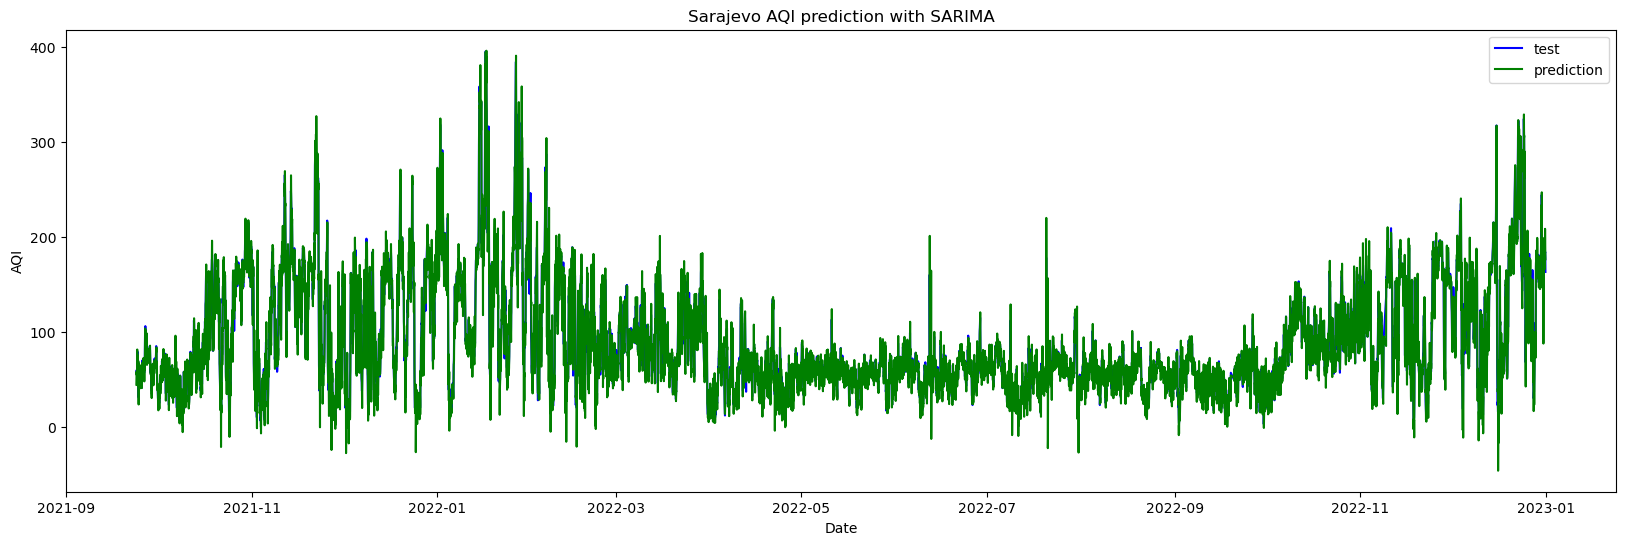

In [52]:
# plot forecasts against actual outcomes
pyplot.figure(figsize=(20,6))
pyplot.plot(test3, color='blue', label='test')
pyplot.plot(test3.index, predictions, color='green', label='prediction')
pyplot.legend()
pyplot.xlabel("Date")
pyplot.ylabel("AQI")
pyplot.title("Sarajevo AQI prediction with SARIMA")
#pyplot.savefig('C:/Pythondatasets/SARIMA_Prediction_Sarajevo.png')
pyplot.show()

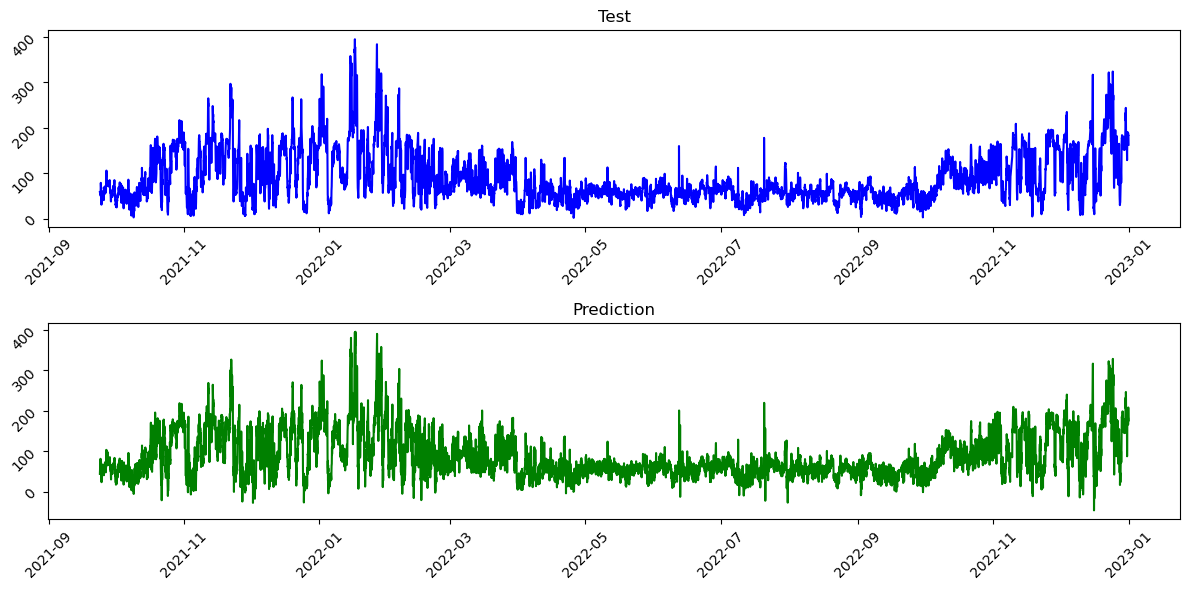

In [53]:
# Initialise the subplot function using number of rows and columns
figure, axis = pyplot.subplots(2, 1, figsize=(12, 6))

# For Sine Function
axis[0].plot(test3, color='blue')
axis[0].set_title("Test")
axis[0].tick_params(labelrotation=45)

# For Tangent Function
axis[1].plot(test3.index, predictions, color='green')
axis[1].set_title("Prediction")
axis[1].tick_params(labelrotation=45)

figure.tight_layout()

#pyplot.savefig('C:/Pythondatasets/SARIMA_Prediction_Sarajevo_Dvije_sLike_final3.png')
# Combine all the operations and display
pyplot.show()

In [27]:
res = pd.DataFrame(predictions)
res.index = test2.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("C:/Pythondatasets/prediction_results_Sarajevo_SARIMA.csv")

In [33]:
print(test)

Date (LT)
2021-09-24 01:00:00    59
2021-09-24 02:00:00    56
2021-09-24 03:00:00    56
2021-09-24 04:00:00    57
2021-09-24 05:00:00    58
                       ..
2023-04-30 21:00:00    58
2023-04-30 22:00:00    75
2023-04-30 23:00:00    76
2023-05-01 00:00:00    79
2023-05-01 01:00:00    79
Name: AQI, Length: 14100, dtype: int64


In [46]:
test3=test2[:'2022-12-31 23:00:00']
test3

Date (LT)
2021-09-24 01:00:00     59
2021-09-24 02:00:00     56
2021-09-24 03:00:00     56
2021-09-24 04:00:00     57
2021-09-24 05:00:00     58
                      ... 
2022-12-31 19:00:00    185
2022-12-31 20:00:00    183
2022-12-31 21:00:00    184
2022-12-31 22:00:00    178
2022-12-31 23:00:00    163
Name: AQI, Length: 11036, dtype: int64

In [41]:
resProb = pd.DataFrame(test)
resProb.index = test.index # its important for comparison
resProb.columns = ["AQI"]
resProb.to_csv("C:/Pythondatasets/problem_results_Sarajevo_SARIMA.csv")

In [8]:
# data prediction for 2023
series2023 = data2023['AQI'].squeeze()
series2023

Date (LT)
2023-01-01 00:00:00    166
2023-01-01 01:00:00    180
2023-01-01 02:00:00    183
2023-01-01 03:00:00    191
2023-01-01 04:00:00    182
                      ... 
2023-05-09 21:00:00     34
2023-05-09 22:00:00     42
2023-05-09 23:00:00     52
2023-05-10 00:00:00     49
2023-05-10 01:00:00     49
Name: AQI, Length: 3064, dtype: int64

In [37]:
X = series
size = int(len(X)-len(series2023))
train2023, test2023 = X[0:size], X[size:len(X)]
history2023 = [x for x in train2023]
predictions2023 = list()

In [ ]:
# walk-forward validation
for t in range(len(test2023)):
    # define model configuration
    my_order, my_seasonal_order, trend = [(2, 0, 1), (1, 0, 0, 12), 'ct']
    #my_seasonal_order = (1, 1, 1, 12)
    # define model
    model = SARIMAX(history2023, order=my_order, seasonal_order=my_seasonal_order, trend=trend)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions2023.append(yhat)
    obs = test2023[t]
    history2023.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=150.529457, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.641282, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.931181, expected=67.000000
predicted=62.822037, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.449653, expected=62.000000
predicted=62.256441, expected=48.000000
predicted=45.870978, expected=41.000000
predicted=35.908533, expected=39.000000
predicted=39.513986, expected=36.000000
predicted=38.496577, expected=56.000000
predicted=58.774199, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.375758, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.527388, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-59.996688, expected=22.000000
predicted=43.167626, expected=19.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.873948, expected=16.000000
predicted=12.993642, expected=8.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-6.525389, expected=12.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=11.147003, expected=16.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.652867, expected=16.000000
predicted=13.582971, expected=41.000000
predicted=67.878403, expected=52.000000
predicted=49.902977, expected=34.000000
predicted=9.320217, expected=32.000000
predicted=26.058955, expected=28.000000
predicted=24.778279, expected=27.000000
predicted=24.504971, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.402980, expected=40.000000
predicted=34.412320, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.997792, expected=45.000000
predicted=47.183486, expected=35.000000
predicted=28.757975, expected=36.000000
predicted=57.404738, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.377646, expected=35.000000
predicted=13.213098, expected=51.000000
predicted=58.886848, expected=36.000000
predicted=27.193441, expected=28.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.284445, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.890904, expected=20.000000
predicted=21.339605, expected=16.000000
predicted=12.860090, expected=10.000000
predicted=10.645278, expected=20.000000
predicted=12.456748, expected=26.000000
predicted=31.494791, expected=52.000000
predicted=60.625771, expected=62.000000
predicted=62.258288, expected=83.000000
predicted=103.686399, expected=95.000000
predicted=78.786121, expected=99.000000
predicted=95.414364, expected=95.000000
predicted=89.385056, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.661782, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.064004, expected=74.000000
predicted=65.663151, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.224266, expected=67.000000
predicted=65.137896, expected=63.000000
predicted=81.195946, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.936863, expected=41.000000
predicted=52.388143, expected=35.000000
predicted=36.614287, expected=28.000000
predicted=25.143178, expected=28.000000
predicted=23.102111, expected=29.000000
predicted=20.827148, expected=31.000000
predicted=30.806518, expected=26.000000
predicted=21.581202, expected=30.000000
predicted=31.964932, expected=31.000000
predicted=26.187170, expected=34.000000
predicted=33.005692, expected=56.000000
predicted=52.391768, expected=65.000000
predicted=63.226173, expected=71.000000
predicted=69.222871, expected=85.000000
predicted=83.587847, expected=98.000000
predicted=102.597506, expected=84.000000
predicted=78.071786, expected=77.000000
predicted=73.643896, expected=72.000000
predicted=62.882849, expected=72.000000
predicted=75.020910, expected=68.000000
predicted=64.387668, expected=64.000000
predicted=63.056230, expected=62.000000
predicted=78.591279, expected=67.000000
predicted=68.449325, expected=62.000000
predicted=61.461167, expected=68.000000

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.145413, expected=66.000000
predicted=68.032083, expected=66.000000
predicted=80.489870, expected=72.000000
predicted=71.725408, expected=74.000000
predicted=67.253552, expected=76.000000
predicted=87.050793, expected=77.000000
predicted=72.013218, expected=70.000000
predicted=57.681938, expected=66.000000
predicted=64.848285, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.576137, expected=44.000000
predicted=40.134601, expected=34.000000
predicted=22.718711, expected=36.000000
predicted=40.401385, expected=37.000000
predicted=36.415722, expected=35.000000
predicted=39.337837, expected=43.000000
predicted=45.194894, expected=44.000000
predicted=45.120903, expected=40.000000
predicted=38.518523, expected=51.000000
predicted=47.496094, expected=40.000000
predicted=34.468212, expected=51.000000
predicted=41.613503, expected=56.000000
predicted=55.271652, expected=62.000000
predicted=56.141075, expected=60.000000
predicted=62.947372, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.476002, expected=69.000000
predicted=67.538934, expected=68.000000
predicted=73.894495, expected=70.000000
predicted=67.379449, expected=69.000000
predicted=62.926827, expected=63.000000
predicted=70.562135, expected=54.000000
predicted=36.057526, expected=44.000000
predicted=52.492883, expected=35.000000
predicted=32.104868, expected=30.000000
predicted=31.207445, expected=31.000000
predicted=26.974839, expected=30.000000
predicted=31.578470, expected=34.000000
predicted=40.676467, expected=35.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.876281, expected=36.000000
predicted=37.987138, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.444699, expected=37.000000
predicted=31.429185, expected=34.000000
predicted=26.218567, expected=32.000000
predicted=24.514054, expected=27.000000
predicted=19.673577, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28.524703, expected=35.000000
predicted=38.338147, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.459133, expected=40.000000
predicted=41.783531, expected=37.000000
predicted=34.407709, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=31.028362, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.827400, expected=38.000000
predicted=38.987981, expected=42.000000
predicted=39.608830, expected=53.000000
predicted=54.605464, expected=52.000000
predicted=46.498095, expected=52.000000
predicted=54.756899, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.829190, expected=31.000000
predicted=30.596257, expected=34.000000
predicted=28.494663, expected=40.000000
predicted=39.158091, expected=47.000000
predicted=45.653220, expected=53.000000
predicted=53.262556, expected=54.000000
predicted=60.002217, expected=54.000000
predicted=54.034190, expected=56.000000
predicted=63.929858, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.689434, expected=52.000000
predicted=50.275718, expected=45.000000
predicted=35.177236, expected=41.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.937910, expected=38.000000
predicted=42.997171, expected=40.000000
predicted=44.209753, expected=43.000000
predicted=47.365970, expected=38.000000
predicted=38.528473, expected=38.000000
predicted=35.994658, expected=41.000000
predicted=40.804688, expected=43.000000
predicted=44.708711, expected=45.000000
predicted=42.422658, expected=52.000000
predicted=52.231218, expected=59.000000
predicted=54.642831, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.360184, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.220028, expected=51.000000
predicted=50.567997, expected=42.000000
predicted=39.753167, expected=44.000000
predicted=37.859330, expected=40.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.052816, expected=39.000000
predicted=40.298665, expected=32.000000
predicted=29.502840, expected=26.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.177160, expected=28.000000
predicted=33.577046, expected=24.000000
predicted=26.255891, expected=16.000000
predicted=16.059868, expected=16.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.553803, expected=18.000000
predicted=16.661706, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.563369, expected=34.000000
predicted=42.221197, expected=31.000000
predicted=25.278728, expected=28.000000
predicted=26.438935, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.063753, expected=46.000000
predicted=42.772889, expected=42.000000
predicted=43.135242, expected=33.000000
predicted=24.417465, expected=25.000000
predicted=14.892937, expected=19.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=18.260338, expected=20.000000
predicted=21.076646, expected=24.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.265967, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.298070, expected=27.000000
predicted=21.821393, expected=28.000000
predicted=25.502158, expected=26.000000
predicted=38.997506, expected=34.000000
predicted=33.876804, expected=42.000000
predicted=39.096623, expected=52.000000
predicted=47.390459, expected=49.000000
predicted=42.390930, expected=49.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.626271, expected=180.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=224.430457, expected=183.000000
predicted=185.417734, expected=191.000000
predicted=184.242218, expected=182.000000
predicted=181.882107, expected=179.000000
predicted=172.006501, expected=194.000000
predicted=192.092581, expected=182.000000
predicted=181.405052, expected=196.000000
predicted=200.703891, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=200.761167, expected=198.000000
predicted=187.545630, expected=192.000000
predicted=186.315443, expected=189.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=303.052210, expected=184.000000
predicted=141.585945, expected=181.000000
predicted=182.398996, expected=180.000000
predicted=167.488077, expected=181.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=179.969493, expected=180.000000
predicted=193.090934, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=172.538216, expected=193.000000
predicted=209.965320, expected=198.000000
predicted=196.010867, expected=202.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=201.143099, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=189.773099, expected=192.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.621359, expected=182.000000
predicted=173.664947, expected=180.000000
predicted=176.740546, expected=174.000000
predicted=170.791001, expected=178.000000
predicted=179.261872, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.611229, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.116401, expected=188.000000
predicted=198.764750, expected=197.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=201.720415, expected=194.000000
predicted=193.796440, expected=197.000000
predicted=191.693079, expected=193.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=186.108354, expected=199.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=192.358597, expected=210.000000
predicted=213.475090, expected=202.000000
predicted=192.939883, expected=204.000000
predicted=208.146959, expected=212.000000
predicted=206.083713, expected=217.000000
predicted=209.294346, expected=212.000000
predicted=234.935176, expected=227.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=230.005113, expected=260.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=262.978681, expected=285.000000
predicted=294.533727, expected=288.000000
predicted=281.605075, expected=279.000000
predicted=279.324448, expected=268.000000
predicted=269.210559, expected=248.000000
predicted=227.558429, expected=206.000000
predicted=193.532076, expected=189.000000
predicted=187.892046, expected=177.000000
predicted=173.743517, expected=169.000000
predicted=159.276728, expected=196.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=219.433026, expected=220.000000
predicted=253.078151, expected=239.000000
predicted=257.131949, expected=229.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=219.725685, expected=207.000000
predicted=189.703078, expected=196.000000
predicted=184.783157, expected=194.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.643309, expected=200.000000
predicted=169.959608, expected=223.000000
predicted=227.737379, expected=219.000000
predicted=211.319772, expected=232.000000
predicted=230.833495, expected=223.000000
predicted=244.999277, expected=215.000000
predicted=223.634752, expected=220.000000
predicted=229.322596, expected=245.000000
predicted=236.594435, expected=250.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=233.105632, expected=255.000000
predicted=251.580329, expected=257.000000
predicted=257.176947, expected=259.000000
predicted=263.259190, expected=342.000000
predicted=385.733422, expected=383.000000
predicted=382.938506, expected=341.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=335.721766, expected=319.000000
predicted=294.793889, expected=316.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=306.343755, expected=294.000000
predicted=290.294055, expected=255.000000
predicted=260.044667, expected=221.000000
predicted=203.822154, expected=211.000000
predicted=208.717333, expected=196.000000
predicted=190.457495, expected=241.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=256.474942, expected=233.000000
predicted=305.240544, expected=252.000000
predicted=269.742638, expected=223.000000
predicted=162.113508, expected=195.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.819331, expected=183.000000
predicted=184.682588, expected=176.000000
predicted=156.150265, expected=170.000000
predicted=140.513910, expected=162.000000
predicted=141.541845, expected=134.000000
predicted=127.040850, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.438232, expected=89.000000
predicted=130.895874, expected=105.000000
predicted=90.510395, expected=115.000000
predicted=139.134960, expected=121.000000
predicted=92.358505, expected=137.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=126.675957, expected=165.000000
predicted=172.981002, expected=156.000000
predicted=150.655091, expected=157.000000
predicted=153.316541, expected=169.000000
predicted=166.690080, expected=172.000000
predicted=148.896753, expected=168.000000
predicted=144.578270, expected=166.000000
predicted=161.490012, expected=163.000000
predicted=178.430837, expected=163.000000
predicted=164.704653, expected=170.000000
predicted=172.005023, expected=178.000000
predicted=190.919786, expected=189.000000
predicted=210.902809, expected=208.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=195.150556, expected=207.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=207.874259, expected=200.000000
predicted=206.044201, expected=201.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=198.063773, expected=221.000000
predicted=220.788317, expected=245.000000
predicted=250.167797, expected=249.000000
predicted=245.691630, expected=245.000000
predicted=241.557510, expected=235.000000
predicted=234.941123, expected=220.000000
predicted=217.156924, expected=203.000000
predicted=202.186400, expected=225.000000
predicted=243.887809, expected=254.000000
predicted=254.970944, expected=270.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=266.994145, expected=246.000000
predicted=238.661330, expected=219.000000
predicted=225.355542, expected=205.000000
predicted=213.975572, expected=212.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=209.063101, expected=214.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=208.778430, expected=228.000000
predicted=223.955565, expected=239.000000
predicted=231.190450, expected=250.000000
predicted=241.482902, expected=257.000000
predicted=282.900773, expected=246.000000
predicted=260.117357, expected=194.000000
predicted=180.335221, expected=192.000000
predicted=163.004434, expected=185.000000
predicted=165.114223, expected=184.000000
predicted=179.171943, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=198.420548, expected=193.000000
predicted=194.049605, expected=192.000000
predicted=202.896630, expected=196.000000
predicted=202.202476, expected=183.000000
predicted=184.593727, expected=178.000000
predicted=178.815740, expected=173.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.063565, expected=169.000000
predicted=123.711592, expected=192.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=213.715588, expected=193.000000
predicted=187.567740, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=188.954840, expected=193.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=195.647658, expected=196.000000
predicted=200.104800, expected=191.000000
predicted=185.111839, expected=184.000000
predicted=184.146427, expected=180.000000
predicted=164.326912, expected=175.000000
predicted=171.545599, expected=174.000000
predicted=169.578642, expected=178.000000
predicted=176.007904, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=214.879346, expected=211.000000
predicted=210.447414, expected=221.000000
predicted=219.495804, expected=231.000000
predicted=236.125422, expected=240.000000
predicted=242.788461, expected=245.000000
predicted=238.913458, expected=261.000000
predicted=258.978235, expected=288.000000
predicted=292.824107, expected=305.000000
predicted=304.237768, expected=307.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=304.565690, expected=307.000000
predicted=306.847435, expected=299.000000
predicted=301.873871, expected=305.000000
predicted=318.317008, expected=295.000000
predicted=290.524652, expected=287.000000
predicted=286.689012, expected=291.000000
predicted=294.314463, expected=277.000000
predicted=271.388325, expected=257.000000
predicted=260.846538, expected=239.000000
predicted=250.730825, expected=226.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=227.509417, expected=219.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=212.528941, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=190.385759, expected=195.000000
predicted=187.125758, expected=197.000000
predicted=206.401624, expected=208.000000
predicted=201.592720, expected=232.000000
predicted=236.325718, expected=184.000000
predicted=174.768034, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.512135, expected=151.000000
predicted=135.491772, expected=127.000000
predicted=110.070628, expected=139.000000
predicted=137.820613, expected=153.000000
predicted=156.452439, expected=157.000000
predicted=141.991980, expected=162.000000
predicted=167.427005, expected=142.000000
predicted=138.066645, expected=115.000000
predicted=115.094216, expected=85.000000
predicted=93.649649, expected=62.000000
predicted=4.016996, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.918964, expected=35.000000
predicted=35.040547, expected=32.000000
predicted=12.961184, expected=28.000000
predicted=46.316652, expected=23.000000
predicted=31.864297, expected=18.000000
predicted=16.870540, expected=13.000000
predicted=16.114570, expected=10.000000
predicted=-8.968668, expected=13.000000
predicted=-2.672284, expected=15.000000
predicted=-1.564107, expected=12.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.610022, expected=14.000000
predicted=7.957324, expected=13.000000
predicted=7.885532, expected=11.000000
predicted=10.867713, expected=26.000000
predicted=27.855034, expected=44.000000
predicted=46.011863, expected=30.000000
predicted=21.375429, expected=48.000000
predicted=49.533265, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.480008, expected=57.000000
predicted=59.931506, expected=42.000000
predicted=36.065219, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.067154, expected=34.000000
predicted=36.091405, expected=44.000000
predicted=44.385322, expected=39.000000
predicted=34.319916, expected=30.000000
predicted=39.671895, expected=23.000000
predicted=31.053843, expected=13.000000
predicted=-9.816684, expected=19.000000
predicted=40.708348, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.942233, expected=31.000000
predicted=34.841942, expected=51.000000
predicted=42.528070, expected=53.000000
predicted=47.509846, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.064265, expected=50.000000
predicted=56.912077, expected=48.000000
predicted=38.339709, expected=49.000000
predicted=41.260884, expected=49.000000
predicted=44.138240, expected=58.000000
predicted=52.646179, expected=63.000000
predicted=71.618143, expected=54.000000
predicted=48.315548, expected=60.000000
predicted=69.655893, expected=69.000000
predicted=85.077512, expected=64.000000
predicted=56.278164, expected=61.000000
predicted=54.874087, expected=56.000000
predicted=53.885690, expected=46.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.632139, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.708008, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=42.047438, expected=33.000000
predicted=37.387505, expected=27.000000
predicted=26.007793, expected=26.000000
predicted=15.292588, expected=28.000000
predicted=36.444584, expected=26.000000
predicted=31.440219, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.595132, expected=42.000000
predicted=44.392585, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.334064, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.063199, expected=60.000000
predicted=56.114641, expected=58.000000
predicted=62.272393, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.184581, expected=64.000000
predicted=59.731951, expected=62.000000
predicted=60.657159, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.363838, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.404604, expected=80.000000
predicted=85.582211, expected=98.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=111.660098, expected=120.000000
predicted=130.490085, expected=116.000000
predicted=112.753309, expected=130.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=134.310971, expected=157.000000
predicted=160.308263, expected=153.000000
predicted=154.947657, expected=152.000000
predicted=146.641241, expected=152.000000
predicted=146.985804, expected=147.000000
predicted=148.354696, expected=145.000000
predicted=141.309359, expected=125.000000
predicted=123.965898, expected=115.000000
predicted=122.365394, expected=123.000000
predicted=138.003347, expected=127.000000
predicted=116.161629, expected=160.000000
predicted=183.157748, expected=162.000000
predicted=181.581767, expected=160.000000
predicted=145.480092, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.772820, expected=163.000000
predicted=163.568249, expected=169.000000
predicted=165.012283, expected=171.000000
predicted=169.807124, expected=174.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.678548, expected=173.000000
predicted=167.748583, expected=178.000000
predicted=187.990767, expected=172.000000
predicted=168.955096, expected=167.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=191.719770, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=143.337875, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.604099, expected=155.000000
predicted=152.865894, expected=156.000000
predicted=160.368548, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.480456, expected=146.000000
predicted=142.849125, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.682689, expected=70.000000
predicted=60.007923, expected=61.000000
predicted=63.374346, expected=56.000000
predicted=48.397431, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.476460, expected=48.000000
predicted=40.129277, expected=40.000000
predicted=38.994475, expected=33.000000
predicted=33.872154, expected=50.000000
predicted=57.566223, expected=55.000000
predicted=54.075994, expected=97.000000
predicted=107.633581, expected=106.000000
predicted=63.267586, expected=147.000000
predicted=155.385787, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.373132, expected=163.000000
predicted=160.752380, expected=171.000000
predicted=169.330137, expected=166.000000
predicted=157.292931, expected=171.000000
predicted=163.205634, expected=170.000000
predicted=162.044149, expected=171.000000
predicted=185.099913, expected=176.000000
predicted=173.123023, expected=173.000000
predicted=204.728400, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.075825, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=199.089079, expected=167.000000
predicted=160.712245, expected=168.000000
predicted=168.332243, expected=170.000000
predicted=174.429130, expected=172.000000
predicted=164.170421, expected=170.000000
predicted=173.967771, expected=169.000000
predicted=164.917102, expected=168.000000
predicted=167.516788, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.350063, expected=164.000000
predicted=158.850334, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.875511, expected=166.000000
predicted=166.436888, expected=169.000000
predicted=167.914673, expected=173.000000
predicted=174.271055, expected=170.000000
predicted=169.205683, expected=169.000000
predicted=168.481161, expected=168.000000
predicted=163.907335, expected=166.000000
predicted=163.755086, expected=158.000000
predicted=153.536596, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.559362, expected=156.000000
predicted=157.686579, expected=154.000000
predicted=153.840809, expected=139.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=132.347604, expected=115.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.819529, expected=106.000000
predicted=105.149808, expected=100.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.944853, expected=90.000000
predicted=86.823848, expected=90.000000
predicted=89.726396, expected=96.000000
predicted=96.930285, expected=120.000000
predicted=121.652028, expected=148.000000
predicted=157.129752, expected=154.000000
predicted=157.448104, expected=158.000000
predicted=156.150779, expected=146.000000
predicted=127.719234, expected=150.000000
predicted=132.640902, expected=160.000000
predicted=161.132047, expected=177.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.261090, expected=173.000000
predicted=162.119429, expected=171.000000
predicted=170.599951, expected=177.000000
predicted=181.629293, expected=191.000000
predicted=212.731975, expected=189.000000
predicted=203.566472, expected=174.000000
predicted=162.923972, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.915794, expected=186.000000
predicted=180.254470, expected=183.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.752060, expected=191.000000
predicted=199.649652, expected=185.000000
predicted=193.448992, expected=156.000000
predicted=135.573874, expected=111.000000
predicted=93.837768, expected=78.000000
predicted=72.436774, expected=60.000000
predicted=65.168619, expected=44.000000
predicted=33.512892, expected=28.000000
predicted=11.013068, expected=25.000000
predicted=18.625971, expected=16.000000
predicted=41.968022, expected=4.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-8.166971, expected=4.000000
predicted=14.269112, expected=20.000000
predicted=20.101966, expected=68.000000
predicted=61.849560, expected=103.000000
predicted=84.578924, expected=131.000000
predicted=124.858944, expected=121.000000
predicted=110.988684, expected=103.000000
predicted=86.262326, expected=85.000000
predicted=67.223330, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.381084, expected=83.000000
predicted=74.672160, expected=68.000000
predicted=52.613187, expected=53.000000
predicted=49.363805, expected=23.000000
predicted=25.522767, expected=9.000000
predicted=41.338477, expected=7.000000
predicted=22.458642, expected=5.000000
predicted=18.682030, expected=3.000000
predicted=-14.885306, expected=39.000000
predicted=38.550324, expected=53.000000
predicted=48.103233, expected=68.000000
predicted=74.396128, expected=87.000000
predicted=97.401528, expected=75.000000
predicted=55.668754, expected=47.000000
predicted=27.380555, expected=21.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-11.348082, expected=8.000000
predicted=-0.638960, expected=6.000000
predicted=7.313888, expected=9.000000
predicted=8.069065, expected=28.000000
predicted=32.126057, expected=26.000000
predicted=57.673488, expected=13.000000
predicted=9.157692, expected=8.000000
predicted=14.461108, expected=10.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.010540, expected=30.000000
predicted=19.894349, expected=30.000000
predicted=8.259274, expected=40.000000
predicted=28.129139, expected=34.000000
predicted=27.782377, expected=21.000000
predicted=17.870285, expected=4.000000
predicted=0.440932, expected=2.000000
predicted=16.525555, expected=3.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-5.154072, expected=3.000000
predicted=-9.038041, expected=6.000000
predicted=5.855066, expected=7.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=10.104479, expected=8.000000
predicted=25.118329, expected=14.000000
predicted=9.002921, expected=18.000000
predicted=27.527661, expected=23.000000
predicted=15.471379, expected=20.000000
predicted=8.216610, expected=27.000000
predicted=17.042447, expected=20.000000
predicted=20.198635, expected=8.000000
predicted=4.394021, expected=10.000000
predicted=9.060080, expected=13.000000
predicted=15.599060, expected=19.000000
predicted=19.843329, expected=22.000000
predicted=22.389155, expected=23.000000
predicted=27.218114, expected=26.000000
predicted=27.508183, expected=36.000000
predicted=41.337101, expected=47.000000
predicted=45.097298, expected=51.000000
predicted=58.177320, expected=42.000000
predicted=28.965458, expected=35.000000
predicted=22.201776, expected=24.000000
predicted=24.425050, expected=16.000000
predicted=14.138922, expected=12.000000
predicted=13.927764, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.066759, expected=41.000000
predicted=41.281444, expected=53.000000
predicted=57.995487, expected=45.000000
predicted=49.095199, expected=52.000000
predicted=59.680899, expected=51.000000
predicted=49.548910, expected=55.000000
predicted=45.537053, expected=48.000000
predicted=40.845115, expected=76.000000
predicted=76.147941, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.708432, expected=74.000000
predicted=69.139779, expected=94.000000
predicted=122.344712, expected=94.000000
predicted=87.746916, expected=100.000000
predicted=108.968216, expected=89.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.107018, expected=74.000000
predicted=75.524183, expected=64.000000
predicted=55.793186, expected=60.000000
predicted=60.951770, expected=54.000000
predicted=43.078197, expected=51.000000
predicted=76.391574, expected=44.000000
predicted=34.920820, expected=35.000000
predicted=25.533164, expected=30.000000
predicted=47.684244, expected=38.000000
predicted=34.468873, expected=48.000000
predicted=56.668651, expected=56.000000
predicted=46.863653, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.469820, expected=73.000000
predicted=69.798917, expected=87.000000
predicted=90.270182, expected=88.000000
predicted=82.915576, expected=86.000000
predicted=82.802014, expected=87.000000
predicted=80.121749, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.100380, expected=86.000000
predicted=82.915918, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=82.168510, expected=79.000000
predicted=83.869459, expected=91.000000
predicted=97.146047, expected=90.000000
predicted=96.215613, expected=84.000000
predicted=80.958911, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=89.461898, expected=72.000000
predicted=64.264683, expected=62.000000
predicted=55.332704, expected=53.000000
predicted=50.742623, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.778002, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.380169, expected=31.000000
predicted=22.314900, expected=32.000000
predicted=35.658518, expected=35.000000
predicted=46.692294, expected=53.000000
predicted=54.326016, expected=58.000000
predicted=54.320626, expected=59.000000
predicted=58.089370, expected=71.000000
predicted=67.210926, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.954452, expected=79.000000
predicted=73.525588, expected=88.000000
predicted=82.400644, expected=93.000000
predicted=88.233902, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.969739, expected=108.000000
predicted=110.251154, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.260774, expected=94.000000
predicted=105.795333, expected=118.000000
predicted=122.566427, expected=125.000000
predicted=124.314913, expected=137.000000
predicted=149.057299, expected=113.000000
predicted=104.313272, expected=100.000000
predicted=92.997913, expected=86.000000
predicted=86.940457, expected=87.000000
predicted=87.560714, expected=88.000000
predicted=91.010286, expected=96.000000
predicted=103.915486, expected=94.000000
predicted=79.544411, expected=98.000000
predicted=98.822528, expected=111.000000
predicted=137.148056, expected=118.000000
predicted=118.249912, expected=117.000000
predicted=124.024229, expected=123.000000
predicted=98.285154, expected=146.000000
predicted=147.921519, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=146.714862, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=166.482245, expected=162.000000
predicted=160.518134, expected=167.000000
predicted=172.833834, expected=178.000000
predicted=174.554634, expected=177.000000
predicted=177.987309, expected=181.000000
predicted=189.964695, expected=179.000000
predicted=177.784728, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.998230, expected=180.000000
predicted=184.383556, expected=172.000000
predicted=185.993674, expected=171.000000
predicted=168.467603, expected=168.000000
predicted=168.718966, expected=163.000000
predicted=158.337808, expected=161.000000
predicted=163.028728, expected=160.000000
predicted=166.858100, expected=155.000000
predicted=147.870631, expected=147.000000
predicted=147.202621, expected=134.000000
predicted=125.880037, expected=151.000000
predicted=153.868960, expected=157.000000
predicted=163.184440, expected=159.000000
predicted=150.458444, expected=164.000000
predicted=166.268652, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.652627, expected=166.000000
predicted=159.884381, expected=177.000000
predicted=179.035387, expected=181.000000
predicted=180.705287, expected=184.000000
predicted=179.122797, expected=198.000000
predicted=195.085876, expected=237.000000
predicted=238.552627, expected=228.000000
predicted=242.092763, expected=231.000000
predicted=229.110020, expected=243.000000
predicted=243.677352, expected=246.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=247.856211, expected=254.000000
predicted=257.405595, expected=256.000000
predicted=247.965237, expected=263.000000
predicted=273.256767, expected=273.000000
predicted=273.377951, expected=290.000000
predicted=293.693650, expected=267.000000
predicted=267.781759, expected=269.000000
predicted=297.358638, expected=266.000000
predicted=241.876831, expected=231.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=222.048745, expected=193.000000
predicted=188.456826, expected=190.000000
predicted=186.740964, expected=195.000000
predicted=202.476772, expected=196.000000
predicted=195.469161, expected=199.000000
predicted=205.491620, expected=204.000000
predicted=212.494472, expected=193.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=201.687676, expected=191.000000
predicted=164.138065, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=182.781604, expected=174.000000
predicted=169.983679, expected=170.000000
predicted=138.185019, expected=173.000000
predicted=150.492478, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=180.929915, expected=176.000000
predicted=182.603487, expected=176.000000
predicted=174.551959, expected=181.000000
predicted=184.083153, expected=171.000000
predicted=170.419985, expected=164.000000
predicted=149.178175, expected=154.000000
predicted=151.477781, expected=144.000000
predicted=128.960619, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=115.886660, expected=106.000000
predicted=97.675194, expected=100.000000
predicted=101.905775, expected=97.000000
predicted=94.403479, expected=97.000000
predicted=101.231920, expected=108.000000
predicted=110.814938, expected=119.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=127.547090, expected=141.000000
predicted=137.824086, expected=153.000000
predicted=153.514374, expected=156.000000
predicted=149.509818, expected=157.000000
predicted=150.316789, expected=155.000000
predicted=137.068475, expected=151.000000
predicted=139.149147, expected=151.000000
predicted=149.111968, expected=153.000000
predicted=150.864601, expected=164.000000
predicted=166.345097, expected=156.000000
predicted=161.009673, expected=118.000000
predicted=109.553405, expected=110.000000
predicted=121.767350, expected=101.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.948166, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.867113, expected=95.000000
predicted=94.013343, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.529459, expected=91.000000
predicted=87.058097, expected=89.000000
predicted=89.682798, expected=89.000000
predicted=90.981904, expected=85.000000
predicted=93.238556, expected=85.000000
predicted=74.537108, expected=91.000000
predicted=61.014067, expected=97.000000
predicted=103.554942, expected=114.000000
predicted=113.890428, expected=125.000000
predicted=126.937173, expected=129.000000
predicted=128.398647, expected=122.000000
predicted=117.673288, expected=110.000000
predicted=101.750594, expected=103.000000
predicted=98.034359, expected=101.000000
predicted=99.429638, expected=100.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.600223, expected=80.000000
predicted=73.191090, expected=82.000000
predicted=86.788385, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=92.599483, expected=81.000000
predicted=91.318905, expected=85.000000
predicted=90.192564, expected=81.000000
predicted=79.237222, expected=76.000000
predicted=66.248333, expected=69.000000
predicted=57.635775, expected=68.000000
predicted=64.857177, expected=55.000000
predicted=50.942893, expected=48.000000
predicted=45.167077, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.297093, expected=49.000000
predicted=55.855035, expected=54.000000
predicted=60.391941, expected=54.000000
predicted=45.387452, expected=61.000000
predicted=68.583037, expected=66.000000
predicted=62.374708, expected=72.000000
predicted=69.954933, expected=71.000000
predicted=65.055090, expected=70.000000
predicted=69.937858, expected=72.000000
predicted=60.087595, expected=67.000000
predicted=61.748238, expected=72.000000
predicted=78.194481, expected=83.000000
predicted=81.317612, expected=72.000000
predicted=72.220248, expected=64.000000
predicted=58.119518, expected=73.000000
predicted=80.800035, expected=88.000000
predicted=94.062573, expected=86.000000
predicted=87.787591, expected=88.000000
predicted=84.275947, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.154837, expected=94.000000
predicted=94.296739, expected=94.000000
predicted=87.198748, expected=84.000000
predicted=85.124080, expected=77.000000
predicted=81.625763, expected=68.000000
predicted=50.232620, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.175466, expected=70.000000
predicted=81.094550, expected=72.000000
predicted=82.628167, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.112669, expected=82.000000
predicted=85.005587, expected=89.000000
predicted=96.166617, expected=95.000000
predicted=92.903996, expected=101.000000
predicted=102.123449, expected=86.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.752268, expected=98.000000
predicted=97.324754, expected=115.000000
predicted=113.455475, expected=125.000000
predicted=127.687980, expected=124.000000
predicted=125.917289, expected=133.000000
predicted=134.226143, expected=131.000000
predicted=131.882896, expected=135.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=136.871360, expected=128.000000
predicted=128.131787, expected=117.000000
predicted=114.345875, expected=108.000000
predicted=106.572077, expected=101.000000
predicted=81.453438, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.722076, expected=89.000000
predicted=98.041125, expected=86.000000
predicted=87.749522, expected=80.000000
predicted=73.176211, expected=82.000000
predicted=90.649694, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.576898, expected=82.000000
predicted=86.673000, expected=85.000000
predicted=78.339688, expected=92.000000
predicted=86.264271, expected=91.000000
predicted=85.620810, expected=93.000000
predicted=89.559913, expected=93.000000
predicted=88.087525, expected=95.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=92.354486, expected=100.000000
predicted=99.413204, expected=106.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=102.215389, expected=119.000000
predicted=125.514120, expected=133.000000
predicted=133.562985, expected=152.000000
predicted=158.681128, expected=151.000000
predicted=150.481638, expected=154.000000
predicted=157.759808, expected=153.000000
predicted=146.968138, expected=155.000000
predicted=155.121607, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.201825, expected=155.000000
predicted=154.913677, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.450379, expected=151.000000
predicted=151.111229, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.572730, expected=132.000000
predicted=132.281360, expected=90.000000
predicted=87.141649, expected=74.000000
predicted=60.714197, expected=67.000000
predicted=67.499004, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.657663, expected=69.000000
predicted=73.406822, expected=83.000000
predicted=85.923942, expected=81.000000
predicted=83.354291, expected=93.000000
predicted=96.718540, expected=110.000000
predicted=112.285031, expected=128.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.230786, expected=152.000000
predicted=142.294136, expected=156.000000
predicted=123.946240, expected=174.000000
predicted=176.683571, expected=177.000000
predicted=174.525823, expected=180.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=177.343685, expected=189.000000
predicted=194.005180, expected=195.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=204.585583, expected=212.000000
predicted=207.682664, expected=210.000000
predicted=216.945693, expected=199.000000
predicted=203.234880, expected=183.000000
predicted=185.047189, expected=185.000000
predicted=198.663357, expected=171.000000
predicted=159.973559, expected=171.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.796018, expected=168.000000
predicted=162.600077, expected=166.000000
predicted=165.608857, expected=174.000000
predicted=182.766477, expected=181.000000
predicted=184.986671, expected=183.000000
predicted=196.185564, expected=182.000000
predicted=173.574646, expected=173.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.557296, expected=163.000000
predicted=147.708079, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=157.115868, expected=136.000000
predicted=116.116504, expected=113.000000
predicted=109.005522, expected=114.000000
predicted=111.370884, expected=121.000000
predicted=122.377462, expected=156.000000
predicted=175.415630, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=167.625091, expected=155.000000
predicted=151.379238, expected=156.000000
predicted=153.815671, expected=145.000000
predicted=132.707826, expected=146.000000
predicted=139.227495, expected=103.000000
predicted=83.071940, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.408571, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.176485, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.049228, expected=81.000000
predicted=88.389614, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.436895, expected=114.000000
predicted=118.401685, expected=132.000000
predicted=129.382123, expected=140.000000
predicted=145.297569, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.967334, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.245707, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=123.079890, expected=163.000000
predicted=159.368565, expected=162.000000
predicted=158.344448, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.520031, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=176.365468, expected=190.000000
predicted=194.447681, expected=195.000000
predicted=219.835483, expected=196.000000
predicted=200.144324, expected=191.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=187.667221, expected=188.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=200.748996, expected=180.000000
predicted=171.214022, expected=176.000000
predicted=171.512395, expected=171.000000
predicted=166.712956, expected=170.000000
predicted=167.504855, expected=164.000000
predicted=162.692524, expected=164.000000
predicted=169.265459, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=178.011547, expected=157.000000
predicted=152.220039, expected=158.000000
predicted=156.646615, expected=164.000000
predicted=160.504578, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.243589, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.949567, expected=182.000000
predicted=184.032439, expected=183.000000
predicted=179.007801, expected=181.000000
predicted=179.581065, expected=159.000000
predicted=145.090352, expected=129.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=119.427081, expected=119.000000
predicted=115.597259, expected=124.000000
predicted=117.550866, expected=139.000000
predicted=146.982683, expected=117.000000
predicted=114.477619, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.742158, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.168575, expected=75.000000
predicted=79.218075, expected=65.000000
predicted=59.403754, expected=76.000000
predicted=78.381837, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.174312, expected=45.000000
predicted=20.774117, expected=33.000000
predicted=30.342989, expected=31.000000
predicted=39.159459, expected=38.000000
predicted=53.421515, expected=48.000000
predicted=27.500762, expected=59.000000
predicted=48.115660, expected=80.000000
predicted=90.330780, expected=112.000000
predicted=112.254684, expected=114.000000
predicted=108.549669, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=98.755639, expected=74.000000
predicted=46.623016, expected=62.000000
predicted=48.720507, expected=52.000000
predicted=40.855662, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.984095, expected=59.000000
predicted=68.727399, expected=90.000000
predicted=105.880528, expected=155.000000
predicted=181.819189, expected=154.000000
predicted=167.148953, expected=159.000000
predicted=180.127955, expected=156.000000
predicted=143.989671, expected=155.000000
predicted=133.001072, expected=160.000000
predicted=147.241334, expected=156.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.577951, expected=141.000000
predicted=127.882218, expected=130.000000
predicted=121.887511, expected=121.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=127.610693, expected=96.000000
predicted=109.567870, expected=106.000000
predicted=156.617652, expected=125.000000
predicted=108.862940, expected=102.000000
predicted=97.853690, expected=92.000000
predicted=83.875603, expected=84.000000
predicted=81.266419, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.082000, expected=88.000000
predicted=83.503679, expected=88.000000
predicted=75.800350, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=54.871527, expected=59.000000
predicted=51.746788, expected=56.000000
predicted=35.330744, expected=61.000000
predicted=79.673541, expected=60.000000
predicted=74.158863, expected=56.000000
predicted=27.666109, expected=57.000000
predicted=55.063262, expected=57.000000
predicted=52.969281, expected=52.000000
predicted=55.333471, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.319508, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.323764, expected=29.000000
predicted=5.248682, expected=21.000000
predicted=17.315240, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.830545, expected=13.000000
predicted=17.745033, expected=13.000000
predicted=10.485967, expected=6.000000
predicted=0.242892, expected=5.000000
predicted=6.792746, expected=11.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.796750, expected=22.000000
predicted=21.135227, expected=42.000000
predicted=49.138644, expected=52.000000
predicted=47.047225, expected=38.000000
predicted=23.376395, expected=32.000000
predicted=25.580807, expected=24.000000
predicted=17.310295, expected=23.000000
predicted=21.569810, expected=32.000000
predicted=34.488296, expected=57.000000
predicted=57.680310, expected=53.000000
predicted=51.387488, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.783748, expected=67.000000
predicted=74.808896, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.354658, expected=53.000000
predicted=51.573441, expected=58.000000
predicted=42.065070, expected=54.000000
predicted=50.113477, expected=52.000000
predicted=44.613392, expected=45.000000
predicted=42.779761, expected=50.000000
predicted=58.682807, expected=45.000000
predicted=61.922193, expected=37.000000
predicted=21.593185, expected=29.000000
predicted=34.524072, expected=25.000000
predicted=24.870825, expected=29.000000
predicted=21.930417, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.088781, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.005857, expected=51.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.116772, expected=50.000000
predicted=48.054007, expected=55.000000
predicted=49.935801, expected=54.000000
predicted=59.335101, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.122623, expected=49.000000
predicted=40.986944, expected=52.000000
predicted=46.985631, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.893775, expected=60.000000
predicted=62.769107, expected=67.000000
predicted=79.119156, expected=61.000000
predicted=60.274604, expected=57.000000
predicted=51.444835, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.290087, expected=76.000000
predicted=83.255969, expected=74.000000
predicted=69.504362, expected=61.000000
predicted=53.559072, expected=58.000000
predicted=53.402102, expected=60.000000
predicted=63.059261, expected=59.000000
predicted=65.659520, expected=59.000000
predicted=52.863991, expected=55.000000
predicted=59.459400, expected=58.000000
predicted=50.383170, expected=67.000000
predicted=67.171785, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.883527, expected=76.000000
predicted=85.039710, expected=72.000000
predicted=64.210531, expected=63.000000
predicted=47.472934, expected=60.000000
predicted=59.171538, expected=55.000000
predicted=55.170542, expected=57.000000
predicted=55.095412, expected=53.000000
predicted=50.959990, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.334304, expected=66.000000
predicted=72.285755, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.558762, expected=80.000000
predicted=79.188435, expected=83.000000
predicted=89.573417, expected=100.000000
predicted=98.160552, expected=107.000000
predicted=100.844972, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.987953, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.463286, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.131982, expected=99.000000
predicted=93.812227, expected=103.000000
predicted=106.264605, expected=104.000000
predicted=110.495333, expected=105.000000
predicted=106.512883, expected=105.000000
predicted=107.136935, expected=108.000000
predicted=107.651563, expected=115.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=130.084266, expected=120.000000
predicted=121.135973, expected=111.000000
predicted=94.977700, expected=107.000000
predicted=107.115384, expected=112.000000
predicted=111.438991, expected=128.000000
predicted=134.933799, expected=146.000000
predicted=153.151986, expected=131.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=123.834981, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.077449, expected=154.000000
predicted=152.810502, expected=110.000000
predicted=95.968622, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=74.759524, expected=70.000000
predicted=67.583600, expected=67.000000
predicted=55.741537, expected=62.000000
predicted=59.236809, expected=76.000000
predicted=86.365957, expected=108.000000
predicted=131.529643, expected=100.000000
predicted=108.387367, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.939053, expected=80.000000
predicted=100.610043, expected=73.000000
predicted=67.441014, expected=69.000000
predicted=26.665269, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.976340, expected=77.000000
predicted=78.185463, expected=90.000000
predicted=94.503325, expected=119.000000
predicted=123.856839, expected=116.000000
predicted=127.639461, expected=105.000000
predicted=124.076391, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.553430, expected=69.000000
predicted=51.491596, expected=67.000000
predicted=65.657100, expected=79.000000
predicted=77.576143, expected=86.000000
predicted=86.000990, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=95.881256, expected=86.000000
predicted=87.457022, expected=83.000000
predicted=90.469037, expected=81.000000
predicted=101.439675, expected=88.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.616829, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.642500, expected=101.000000
predicted=86.350385, expected=112.000000
predicted=108.773416, expected=113.000000
predicted=114.551416, expected=101.000000
predicted=106.772573, expected=97.000000
predicted=96.396886, expected=93.000000
predicted=93.215541, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.211154, expected=88.000000
predicted=84.133683, expected=94.000000
predicted=93.886872, expected=99.000000
predicted=106.427356, expected=136.000000
predicted=149.296863, expected=152.000000
predicted=161.445646, expected=153.000000
predicted=158.715933, expected=152.000000
predicted=146.818042, expected=153.000000
predicted=139.782510, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.197849, expected=160.000000
predicted=156.406573, expected=162.000000
predicted=161.433660, expected=172.000000
predicted=168.160845, expected=166.000000
predicted=168.262929, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.182443, expected=159.000000
predicted=187.720724, expected=160.000000
predicted=161.110720, expected=158.000000
predicted=151.022373, expected=154.000000
predicted=149.716198, expected=152.000000
predicted=151.151818, expected=133.000000
predicted=128.766737, expected=123.000000
predicted=120.025346, expected=115.000000
predicted=112.483461, expected=103.000000
predicted=107.060204, expected=101.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.617167, expected=100.000000
predicted=96.988811, expected=94.000000
predicted=91.964447, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=134.314587, expected=153.000000
predicted=160.916355, expected=152.000000
predicted=148.077337, expected=155.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.280574, expected=163.000000
predicted=147.758147, expected=159.000000
predicted=152.969693, expected=153.000000
predicted=145.183469, expected=147.000000
predicted=134.672599, expected=155.000000
predicted=157.562971, expected=175.000000
predicted=179.332177, expected=182.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=176.745904, expected=188.000000
predicted=215.417680, expected=192.000000
predicted=208.893612, expected=187.000000
predicted=172.204845, expected=180.000000
predicted=178.063143, expected=182.000000
predicted=187.014647, expected=173.000000
predicted=162.057371, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=170.911640, expected=207.000000
predicted=212.054856, expected=215.000000
predicted=224.970767, expected=210.000000
predicted=221.683388, expected=207.000000
predicted=203.635495, expected=202.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=201.272519, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=196.510621, expected=198.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=190.485713, expected=196.000000
predicted=188.910512, expected=197.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=199.784208, expected=211.000000
predicted=205.264256, expected=205.000000
predicted=206.734978, expected=202.000000
predicted=226.422683, expected=198.000000
predicted=192.616647, expected=189.000000
predicted=177.269437, expected=178.000000
predicted=171.996898, expected=181.000000
predicted=177.546155, expected=196.000000
predicted=198.145209, expected=220.000000
predicted=228.305998, expected=250.000000
predicted=256.809268, expected=274.000000
predicted=281.549210, expected=272.000000
predicted=281.234192, expected=270.000000
predicted=256.577993, expected=265.000000
predicted=259.452895, expected=248.000000
predicted=236.914254, expected=236.000000
predicted=222.369470, expected=213.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=195.691657, expected=190.000000
predicted=186.290116, expected=188.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=198.288968, expected=175.000000
predicted=186.488676, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=213.720313, expected=191.000000
predicted=203.293755, expected=195.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=186.617002, expected=197.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=196.359240, expected=190.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.967526, expected=181.000000
predicted=164.230046, expected=169.000000
predicted=159.533274, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.384969, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.641567, expected=147.000000
predicted=150.411608, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=143.660880, expected=155.000000
predicted=172.901784, expected=163.000000
predicted=161.443746, expected=172.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=177.513036, expected=178.000000
predicted=179.844441, expected=178.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=170.100762, expected=176.000000
predicted=168.292104, expected=172.000000
predicted=161.510007, expected=167.000000
predicted=157.906270, expected=162.000000
predicted=157.978052, expected=158.000000
predicted=151.454092, expected=170.000000
predicted=179.912446, expected=170.000000
predicted=168.577154, expected=172.000000
predicted=177.634592, expected=172.000000
predicted=176.150312, expected=179.000000
predicted=182.458530, expected=182.000000
predicted=179.699046, expected=199.000000
predicted=201.366154, expected=228.000000
predicted=233.110378, expected=213.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=202.803182, expected=202.000000
predicted=192.911565, expected=192.000000
predicted=184.350425, expected=182.000000
predicted=188.793958, expected=183.000000
predicted=177.774865, expected=189.000000
predicted=191.042551, expected=185.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=181.457625, expected=182.000000
predicted=185.708646, expected=176.000000
predicted=173.055319, expected=160.000000
predicted=167.833615, expected=154.000000
predicted=172.158256, expected=143.000000
predicted=116.135617, expected=121.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=107.987160, expected=96.000000
predicted=82.410348, expected=77.000000
predicted=65.335067, expected=62.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.010405, expected=60.000000
predicted=65.766646, expected=69.000000
predicted=67.901566, expected=71.000000
predicted=71.562843, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.095248, expected=82.000000
predicted=70.744788, expected=74.000000
predicted=71.652897, expected=71.000000
predicted=62.572728, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.558401, expected=81.000000
predicted=65.041226, expected=84.000000
predicted=75.301500, expected=96.000000
predicted=91.665820, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=107.072500, expected=96.000000
predicted=100.911392, expected=103.000000
predicted=102.463675, expected=137.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.908960, expected=139.000000
predicted=135.571945, expected=152.000000
predicted=146.187585, expected=151.000000
predicted=147.882054, expected=156.000000
predicted=165.899359, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=151.571648, expected=154.000000
predicted=152.746383, expected=152.000000
predicted=158.558124, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=152.017020, expected=125.000000
predicted=104.931935, expected=133.000000
predicted=141.859516, expected=142.000000
predicted=172.149429, expected=170.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=168.851247, expected=171.000000
predicted=180.569226, expected=163.000000
predicted=153.539807, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=159.332348, expected=158.000000
predicted=156.806893, expected=159.000000
predicted=153.678803, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=155.744315, expected=152.000000
predicted=149.316959, expected=131.000000
predicted=98.071957, expected=125.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.294451, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=164.535792, expected=154.000000
predicted=176.569031, expected=156.000000
predicted=147.527402, expected=159.000000
predicted=150.973286, expected=159.000000
predicted=155.850498, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.132351, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=156.389742, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.870608, expected=136.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=124.303225, expected=120.000000
predicted=96.288848, expected=110.000000
predicted=106.813478, expected=106.000000
predicted=129.632439, expected=140.000000
predicted=145.404466, expected=169.000000
predicted=178.721521, expected=166.000000
predicted=166.039903, expected=159.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=154.223729, expected=152.000000
predicted=147.317522, expected=138.000000
predicted=131.499865, expected=103.000000
predicted=86.067183, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=49.265967, expected=57.000000
predicted=41.949539, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=46.557273, expected=73.000000
predicted=79.852854, expected=89.000000
predicted=126.765664, expected=101.000000
predicted=120.757840, expected=134.000000
predicted=132.745876, expected=151.000000
predicted=150.765357, expected=155.000000
predicted=151.485560, expected=158.000000
predicted=147.374203, expected=159.000000
predicted=130.430618, expected=158.000000
predicted=139.459129, expected=157.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.346821, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=149.488714, expected=138.000000
predicted=150.697587, expected=135.000000
predicted=139.073450, expected=125.000000
predicted=124.873015, expected=121.000000
predicted=143.734621, expected=131.000000
predicted=137.933061, expected=143.000000
predicted=143.945538, expected=142.000000
predicted=142.037054, expected=139.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=136.950180, expected=157.000000
predicted=160.809887, expected=156.000000
predicted=154.146632, expected=112.000000
predicted=92.840901, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.853609, expected=72.000000
predicted=69.966602, expected=105.000000
predicted=108.021096, expected=144.000000
predicted=156.438162, expected=137.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=144.277099, expected=134.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.357555, expected=149.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=147.938759, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=150.587239, expected=153.000000
predicted=168.947544, expected=152.000000
predicted=143.812667, expected=151.000000
predicted=109.362144, expected=133.000000
predicted=112.729463, expected=117.000000
predicted=109.186385, expected=95.000000
predicted=119.466900, expected=91.000000
predicted=113.442114, expected=85.000000
predicted=63.329790, expected=89.000000
predicted=89.027139, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=123.582096, expected=97.000000
predicted=93.557607, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.717825, expected=65.000000
predicted=62.136058, expected=59.000000
predicted=56.983355, expected=53.000000
predicted=35.622619, expected=41.000000
predicted=28.723235, expected=37.000000
predicted=21.370423, expected=33.000000
predicted=35.492432, expected=48.000000
predicted=49.266545, expected=60.000000
predicted=69.632324, expected=79.000000
predicted=97.553329, expected=96.000000
predicted=90.098927, expected=96.000000
predicted=73.493672, expected=99.000000
predicted=101.398757, expected=102.000000
predicted=98.099470, expected=104.000000
predicted=99.270293, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.597953, expected=110.000000
predicted=110.219285, expected=101.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.311091, expected=97.000000
predicted=108.025275, expected=103.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.927776, expected=119.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=135.593580, expected=129.000000
predicted=139.759517, expected=152.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=152.130464, expected=130.000000
predicted=123.154821, expected=131.000000
predicted=130.866023, expected=96.000000
predicted=83.371872, expected=68.000000
predicted=55.474441, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.114033, expected=36.000000
predicted=19.361520, expected=30.000000
predicted=27.119407, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.802058, expected=56.000000
predicted=75.150397, expected=68.000000
predicted=76.395141, expected=70.000000
predicted=88.538578, expected=79.000000
predicted=54.931619, expected=129.000000
predicted=153.363277, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.521827, expected=109.000000
predicted=91.672965, expected=100.000000
predicted=91.775208, expected=92.000000
predicted=75.675649, expected=88.000000
predicted=84.833212, expected=91.000000
predicted=99.143988, expected=81.000000
predicted=89.456073, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.197903, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.598693, expected=112.000000
predicted=129.075602, expected=131.000000
predicted=178.720211, expected=138.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.518100, expected=113.000000
predicted=103.797881, expected=96.000000
predicted=81.952768, expected=65.000000
predicted=48.998071, expected=56.000000
predicted=50.992775, expected=43.000000
predicted=42.249548, expected=32.000000
predicted=18.021702, expected=30.000000
predicted=26.823719, expected=62.000000
predicted=78.243290, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=100.092513, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.213041, expected=70.000000
predicted=71.557460, expected=80.000000
predicted=58.294813, expected=92.000000
predicted=88.179839, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.134050, expected=81.000000
predicted=80.475553, expected=92.000000
predicted=85.537190, expected=85.000000
predicted=75.068460, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.632406, expected=71.000000
predicted=96.142211, expected=68.000000
predicted=61.645323, expected=84.000000
predicted=81.741787, expected=123.000000
predicted=140.443242, expected=138.000000
predicted=148.972967, expected=151.000000
predicted=160.837014, expected=134.000000
predicted=114.781794, expected=106.000000
predicted=93.802005, expected=85.000000
predicted=86.951191, expected=78.000000
predicted=64.395778, expected=74.000000
predicted=68.171951, expected=78.000000
predicted=72.998044, expected=74.000000
predicted=71.438541, expected=78.000000
predicted=93.739519, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.206500, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.294109, expected=79.000000
predicted=88.520909, expected=85.000000
predicted=67.517959, expected=97.000000
predicted=80.716586, expected=108.000000
predicted=101.085475, expected=104.000000
predicted=102.118182, expected=104.000000
predicted=101.224605, expected=104.000000
predicted=107.294083, expected=100.000000
predicted=92.099539, expected=95.000000
predicted=96.459182, expected=93.000000
predicted=88.601334, expected=103.000000
predicted=98.687109, expected=124.000000
predicted=139.809525, expected=149.000000
predicted=158.243796, expected=152.000000
predicted=159.761697, expected=146.000000
predicted=147.739883, expected=116.000000
predicted=96.481086, expected=91.000000
predicted=81.819718, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.057586, expected=66.000000
predicted=58.877583, expected=55.000000
predicted=47.526457, expected=56.000000
predicted=55.744286, expected=62.000000
predicted=73.552458, expected=65.000000
predicted=81.825087, expected=77.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=97.021489, expected=102.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.189648, expected=99.000000
predicted=91.457219, expected=81.000000
predicted=49.298240, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.953747, expected=75.000000
predicted=65.494793, expected=80.000000
predicted=79.084866, expected=71.000000
predicted=59.539647, expected=71.000000
predicted=74.036801, expected=72.000000
predicted=76.252870, expected=64.000000
predicted=60.835504, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.334832, expected=74.000000
predicted=93.681637, expected=71.000000
predicted=58.531383, expected=80.000000
predicted=66.554326, expected=108.000000
predicted=121.323483, expected=78.000000
predicted=62.840711, expected=68.000000
predicted=69.204452, expected=64.000000
predicted=51.872302, expected=61.000000
predicted=61.817016, expected=57.000000
predicted=55.793204, expected=54.000000
predicted=44.549421, expected=80.000000
predicted=94.861274, expected=104.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=114.165362, expected=80.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.256447, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.075991, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=76.611679, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.873632, expected=47.000000
predicted=44.156967, expected=42.000000
predicted=39.638625, expected=35.000000
predicted=30.730370, expected=38.000000
predicted=35.770765, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.012595, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.050524, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.995353, expected=42.000000
predicted=11.782027, expected=53.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.882443, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.788947, expected=32.000000
predicted=26.595011, expected=24.000000
predicted=15.615817, expected=25.000000
predicted=22.423121, expected=20.000000
predicted=13.036547, expected=18.000000
predicted=21.645717, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.523430, expected=20.000000
predicted=26.521327, expected=37.000000
predicted=39.372383, expected=43.000000
predicted=43.702464, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.089663, expected=43.000000
predicted=29.734766, expected=38.000000
predicted=27.070674, expected=35.000000
predicted=29.476939, expected=32.000000
predicted=33.391374, expected=30.000000
predicted=23.364117, expected=25.000000
predicted=21.859304, expected=15.000000
predicted=8.421814, expected=7.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8.738421, expected=12.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.744941, expected=16.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.830031, expected=12.000000
predicted=9.911942, expected=8.000000
predicted=3.714843, expected=12.000000
predicted=9.047248, expected=10.000000
predicted=7.863371, expected=22.000000
predicted=23.806208, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.933290, expected=45.000000
predicted=44.579037, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.634058, expected=61.000000
predicted=58.323962, expected=57.000000
predicted=60.959513, expected=66.000000
predicted=69.096572, expected=65.000000
predicted=57.684507, expected=69.000000
predicted=65.717626, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.393371, expected=65.000000
predicted=59.700307, expected=57.000000
predicted=63.650571, expected=62.000000
predicted=66.993184, expected=60.000000
predicted=66.145684, expected=60.000000
predicted=60.586340, expected=64.000000
predicted=69.809881, expected=59.000000
predicted=49.572011, expected=56.000000
predicted=63.153966, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.977239, expected=55.000000
predicted=58.957782, expected=59.000000
predicted=54.661267, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.003296, expected=86.000000
predicted=82.064862, expected=88.000000
predicted=94.334445, expected=102.000000
predicted=101.716561, expected=118.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=122.115943, expected=129.000000
predicted=134.243553, expected=141.000000
predicted=136.790733, expected=151.000000
predicted=150.440212, expected=153.000000
predicted=148.040589, expected=157.000000
predicted=159.120495, expected=162.000000
predicted=163.113349, expected=160.000000
predicted=167.462618, expected=157.000000
predicted=160.166726, expected=153.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=146.269493, expected=132.000000
predicted=134.249300, expected=106.000000
predicted=105.158615, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=90.564557, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.800655, expected=76.000000
predicted=78.274653, expected=77.000000
predicted=75.996567, expected=74.000000
predicted=76.293808, expected=65.000000
predicted=65.780588, expected=64.000000
predicted=60.900896, expected=70.000000
predicted=70.685364, expected=76.000000
predicted=76.143698, expected=82.000000
predicted=66.769666, expected=101.000000
predicted=90.490721, expected=115.000000
predicted=114.939910, expected=123.000000
predicted=121.943359, expected=125.000000
predicted=119.357315, expected=132.000000
predicted=135.802490, expected=139.000000
predicted=136.177813, expected=145.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.305821, expected=148.000000
predicted=148.270555, expected=149.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=152.357103, expected=161.000000
predicted=165.686518, expected=158.000000
predicted=157.623324, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=174.408371, expected=159.000000
predicted=162.387605, expected=159.000000
predicted=159.236383, expected=156.000000
predicted=151.975254, expected=157.000000
predicted=160.970956, expected=159.000000
predicted=161.976481, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=153.779553, expected=152.000000
predicted=150.472936, expected=144.000000
predicted=139.794439, expected=134.000000
predicted=139.960389, expected=135.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=127.834223, expected=126.000000
predicted=125.776286, expected=131.000000
predicted=129.257645, expected=142.000000
predicted=145.700682, expected=143.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.936929, expected=146.000000
predicted=147.938953, expected=152.000000
predicted=154.580530, expected=152.000000
predicted=145.771430, expected=153.000000
predicted=151.883446, expected=153.000000
predicted=145.165659, expected=158.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=151.723489, expected=166.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=171.272799, expected=173.000000
predicted=165.185968, expected=174.000000
predicted=179.671534, expected=173.000000
predicted=179.070516, expected=179.000000
predicted=176.317083, expected=182.000000
predicted=183.285294, expected=179.000000
predicted=180.482945, expected=181.000000
predicted=177.755622, expected=174.000000
predicted=170.607461, expected=169.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.153151, expected=169.000000
predicted=171.833026, expected=168.000000
predicted=171.826868, expected=167.000000
predicted=169.035129, expected=168.000000
predicted=165.661825, expected=170.000000
predicted=168.161526, expected=179.000000
predicted=186.579860, expected=182.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=182.660870, expected=189.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=186.269757, expected=187.000000
predicted=187.674342, expected=177.000000
predicted=165.206441, expected=164.000000
predicted=155.805438, expected=162.000000
predicted=161.651838, expected=160.000000
predicted=157.330912, expected=161.000000
predicted=159.604813, expected=168.000000
predicted=170.449597, expected=168.000000
predicted=168.358325, expected=169.000000
predicted=175.645468, expected=172.000000
predicted=171.721837, expected=187.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=196.226588, expected=188.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.170929, expected=192.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=183.422367, expected=197.000000
predicted=188.500058, expected=190.000000
predicted=188.298077, expected=183.000000
predicted=177.691046, expected=177.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=174.691768, expected=174.000000
predicted=177.358240, expected=166.000000
predicted=159.576023, expected=162.000000
predicted=160.082779, expected=164.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.867023, expected=174.000000
predicted=188.950667, expected=183.000000
predicted=181.145891, expected=187.000000
predicted=190.371554, expected=195.000000
predicted=199.763256, expected=183.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=169.781765, expected=166.000000
predicted=154.764067, expected=162.000000
predicted=156.328688, expected=160.000000
predicted=157.610635, expected=159.000000
predicted=151.420862, expected=162.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=160.853412, expected=169.000000
predicted=173.365768, expected=176.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=185.620824, expected=177.000000
predicted=181.068748, expected=184.000000
predicted=185.746744, expected=181.000000
predicted=184.727609, expected=176.000000
predicted=159.648021, expected=173.000000
predicted=158.995715, expected=171.000000
predicted=170.890425, expected=168.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.247274, expected=167.000000
predicted=164.980850, expected=162.000000
predicted=161.971060, expected=158.000000
predicted=160.744675, expected=156.000000
predicted=158.295274, expected=155.000000
predicted=152.307379, expected=159.000000
predicted=165.453664, expected=163.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=158.619618, expected=163.000000
predicted=158.466257, expected=164.000000
predicted=162.257502, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.492376, expected=167.000000
predicted=164.494833, expected=165.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=163.207472, expected=161.000000
predicted=154.211268, expected=160.000000
predicted=156.336314, expected=156.000000
predicted=152.894508, expected=161.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=161.138989, expected=165.000000
predicted=169.038196, expected=171.000000
predicted=174.047026, expected=174.000000
predicted=172.297443, expected=175.000000
predicted=174.719257, expected=172.000000
predicted=170.088478, expected=169.000000
predicted=168.003545, expected=167.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=162.464250, expected=160.000000
predicted=153.276747, expected=154.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=151.048415, expected=144.000000
predicted=136.168375, expected=133.000000
predicted=134.050625, expected=135.000000
predicted=136.919856, expected=152.000000
predicted=161.186067, expected=157.000000
predicted=158.832115, expected=158.000000
predicted=157.366683, expected=160.000000
predicted=156.660511, expected=160.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=157.234216, expected=145.000000
predicted=138.124979, expected=121.000000
predicted=106.271095, expected=95.000000
predicted=82.345245, expected=81.000000
predicted=68.860833, expected=78.000000
predicted=70.216077, expected=106.000000
predicted=120.841059, expected=130.000000
predicted=152.973668, expected=110.000000
predicted=102.055057, expected=101.000000
predicted=96.491672, expected=116.000000
predicted=122.250890, expected=117.000000
predicted=116.640131, expected=132.000000
predicted=122.999502, expected=133.000000
predicted=115.608532, expected=127.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=107.864517, expected=132.000000
predicted=127.752898, expected=131.000000
predicted=130.729385, expected=151.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=182.129309, expected=141.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=148.739278, expected=146.000000
predicted=119.565554, expected=155.000000
predicted=153.964672, expected=153.000000
predicted=167.047173, expected=153.000000
predicted=147.170590, expected=121.000000
predicted=121.497583, expected=76.000000
predicted=55.509498, expected=58.000000
predicted=45.218132, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.482075, expected=47.000000
predicted=43.359048, expected=44.000000
predicted=62.093942, expected=45.000000
predicted=30.826641, expected=63.000000
predicted=77.430376, expected=113.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=137.338670, expected=121.000000
predicted=119.420238, expected=128.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=130.484566, expected=111.000000
predicted=75.593244, expected=82.000000
predicted=40.397624, expected=64.000000
predicted=54.934696, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.233912, expected=41.000000
predicted=33.082694, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.515846, expected=39.000000
predicted=40.673842, expected=47.000000
predicted=64.946507, expected=65.000000
predicted=110.202832, expected=89.000000
predicted=88.000771, expected=66.000000
predicted=61.283396, expected=57.000000
predicted=35.857632, expected=54.000000
predicted=31.799685, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=32.038370, expected=30.000000
predicted=22.055661, expected=21.000000
predicted=8.934432, expected=15.000000
predicted=12.990795, expected=11.000000
predicted=12.360598, expected=8.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=13.249660, expected=6.000000
predicted=18.910761, expected=15.000000
predicted=34.138717, expected=41.000000
predicted=21.277904, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.467044, expected=86.000000
predicted=91.032445, expected=109.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=106.287297, expected=123.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=117.323114, expected=103.000000
predicted=89.672135, expected=96.000000
predicted=88.149525, expected=85.000000
predicted=76.835885, expected=79.000000
predicted=72.820666, expected=72.000000
predicted=66.198410, expected=85.000000
predicted=95.667813, expected=85.000000
predicted=103.500560, expected=62.000000
predicted=70.197344, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.449035, expected=33.000000
predicted=44.135160, expected=27.000000
predicted=30.361432, expected=19.000000
predicted=-5.999092, expected=18.000000
predicted=18.124289, expected=17.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9.794940, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.946769, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=11.035754, expected=18.000000
predicted=33.427189, expected=19.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.663465, expected=20.000000
predicted=-0.474798, expected=20.000000
predicted=10.921218, expected=17.000000
predicted=11.671355, expected=20.000000
predicted=18.688431, expected=45.000000
predicted=47.372620, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.315331, expected=48.000000
predicted=45.272213, expected=36.000000
predicted=28.802252, expected=24.000000
predicted=18.995940, expected=16.000000
predicted=14.694765, expected=10.000000
predicted=6.841420, expected=13.000000
predicted=13.637754, expected=11.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9.197655, expected=5.000000
predicted=-0.582027, expected=4.000000
predicted=6.552119, expected=6.000000
predicted=27.896105, expected=5.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.926984, expected=5.000000
predicted=1.093912, expected=2.000000
predicted=-9.485320, expected=3.000000
predicted=-4.007025, expected=3.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.728092, expected=8.000000
predicted=6.294704, expected=27.000000
predicted=37.315372, expected=69.000000
predicted=79.350391, expected=79.000000
predicted=75.926633, expected=85.000000
predicted=85.644249, expected=93.000000
predicted=95.240139, expected=102.000000
predicted=100.676239, expected=111.000000
predicted=111.308601, expected=111.000000
predicted=105.086245, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.474359, expected=113.000000
predicted=116.091472, expected=114.000000
predicted=115.774940, expected=84.000000
predicted=86.380977, expected=72.000000
predicted=97.264335, expected=88.000000
predicted=87.125223, expected=97.000000
predicted=100.507159, expected=112.000000
predicted=120.940490, expected=113.000000
predicted=117.543943, expected=95.000000
predicted=92.780894, expected=71.000000
predicted=58.801304, expected=58.000000
predicted=36.390394, expected=42.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.163505, expected=27.000000
predicted=16.820656, expected=56.000000
predicted=38.185136, expected=58.000000
predicted=57.427611, expected=65.000000
predicted=85.578435, expected=54.000000
predicted=53.066825, expected=56.000000
predicted=66.829089, expected=54.000000
predicted=49.329310, expected=57.000000
predicted=41.124539, expected=35.000000
predicted=11.344646, expected=38.000000
predicted=34.552598, expected=42.000000
predicted=32.759133, expected=53.000000
predicted=47.430930, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=88.527715, expected=52.000000
predicted=41.973167, expected=43.000000
predicted=44.275489, expected=40.000000
predicted=25.886809, expected=43.000000
predicted=48.478921, expected=48.000000
predicted=46.633292, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.857343, expected=58.000000
predicted=38.096879, expected=47.000000
predicted=51.732203, expected=34.000000
predicted=31.263311, expected=57.000000
predicted=72.285777, expected=42.000000
predicted=36.247260, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=20.325218, expected=30.000000
predicted=22.218774, expected=28.000000
predicted=26.816338, expected=33.000000
predicted=37.720674, expected=55.000000
predicted=65.242398, expected=74.000000
predicted=81.487362, expected=83.000000
predicted=88.884392, expected=85.000000
predicted=72.149260, expected=93.000000
predicted=85.415318, expected=94.000000
predicted=117.496514, expected=100.000000
predicted=79.174103, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.574304, expected=110.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.256201, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.201869, expected=63.000000
predicted=59.531921, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=71.453449, expected=45.000000
predicted=49.883658, expected=31.000000
predicted=27.362453, expected=22.000000
predicted=17.385915, expected=13.000000
predicted=16.620466, expected=13.000000
predicted=11.773476, expected=17.000000
predicted=24.031051, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.272313, expected=32.000000
predicted=31.193992, expected=37.000000
predicted=12.721875, expected=33.000000
predicted=24.618536, expected=29.000000
predicted=28.020768, expected=35.000000
predicted=27.792155, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.510000, expected=42.000000
predicted=38.741171, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.894882, expected=70.000000
predicted=74.339960, expected=70.000000
predicted=71.698407, expected=71.000000
predicted=76.986723, expected=76.000000
predicted=76.932517, expected=77.000000
predicted=78.184939, expected=77.000000
predicted=69.727910, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.217653, expected=64.000000
predicted=67.788665, expected=76.000000
predicted=79.114873, expected=99.000000
predicted=107.569451, expected=97.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.396109, expected=91.000000
predicted=89.068778, expected=94.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=90.105949, expected=89.000000
predicted=86.500006, expected=71.000000
predicted=67.639706, expected=56.000000
predicted=48.962381, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.681139, expected=14.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-1.670009, expected=7.000000
predicted=4.951386, expected=60.000000
predicted=89.829328, expected=58.000000
predicted=74.626014, expected=57.000000
predicted=46.967214, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.878667, expected=99.000000
predicted=109.874584, expected=82.000000
predicted=69.988379, expected=77.000000
predicted=59.243702, expected=71.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.902007, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=36.739511, expected=56.000000
predicted=44.775686, expected=58.000000
predicted=56.513169, expected=57.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=105.505086, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.393307, expected=69.000000
predicted=67.482673, expected=79.000000
predicted=101.424990, expected=114.000000
predicted=135.845924, expected=145.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=132.099419, expected=83.000000
predicted=60.977791, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=38.481112, expected=24.000000
predicted=3.837243, expected=8.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.108342, expected=4.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.373707, expected=2.000000
predicted=-0.111145, expected=5.000000
predicted=15.552934, expected=5.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.945429, expected=6.000000
predicted=15.006041, expected=13.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.531094, expected=19.000000
predicted=38.974025, expected=24.000000
predicted=-39.808481, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.141865, expected=26.000000
predicted=9.590017, expected=28.000000
predicted=23.294644, expected=41.000000
predicted=45.970419, expected=43.000000
predicted=41.823662, expected=38.000000
predicted=37.947076, expected=36.000000
predicted=32.596173, expected=37.000000
predicted=36.494516, expected=29.000000
predicted=30.735462, expected=29.000000
predicted=30.705122, expected=33.000000
predicted=35.609423, expected=35.000000
predicted=31.889512, expected=52.000000
predicted=59.408988, expected=55.000000
predicted=55.549509, expected=55.000000
predicted=64.604640, expected=53.000000
predicted=48.548771, expected=54.000000
predicted=47.617767, expected=49.000000
predicted=45.710682, expected=47.000000
predicted=46.561595, expected=60.000000
predicted=55.447885, expected=61.000000
predicted=62.416099, expected=59.000000
predicted=60.391068, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.886765, expected=61.000000
predicted=75.912483, expected=67.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.998070, expected=61.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=56.529120, expected=55.000000
predicted=49.817339, expected=52.000000
predicted=51.344238, expected=40.000000
predicted=30.065533, expected=49.000000
predicted=50.728198, expected=43.000000
predicted=52.628463, expected=40.000000
predicted=34.935419, expected=43.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=40.991650, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.552258, expected=47.000000
predicted=52.783699, expected=52.000000
predicted=56.850145, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.168184, expected=101.000000
predicted=107.415831, expected=119.000000
predicted=122.759683, expected=114.000000
predicted=100.204894, expected=108.000000
predicted=115.381975, expected=111.000000
predicted=101.295482, expected=104.000000
predicted=98.214800, expected=85.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.862539, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.337468, expected=75.000000
predicted=75.441135, expected=68.000000
predicted=67.542261, expected=74.000000
predicted=87.388266, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=109.700720, expected=181.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=218.550449, expected=159.000000
predicted=139.845911, expected=117.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=96.392694, expected=76.000000
predicted=65.017122, expected=55.000000
predicted=39.646702, expected=35.000000
predicted=12.796157, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.467306, expected=34.000000
predicted=37.318850, expected=38.000000
predicted=32.923429, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.063829, expected=58.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=63.954219, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=139.868374, expected=64.000000
predicted=16.464807, expected=71.000000
predicted=41.698349, expected=69.000000
predicted=44.785015, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.468465, expected=74.000000
predicted=61.789312, expected=75.000000
predicted=79.344729, expected=106.000000
predicted=115.024984, expected=96.000000
predicted=94.202072, expected=101.000000
predicted=117.125926, expected=120.000000
predicted=117.805156, expected=137.000000
predicted=137.458714, expected=139.000000
predicted=146.206799, expected=108.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=98.450671, expected=96.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.334474, expected=104.000000
predicted=109.840285, expected=88.000000
predicted=79.410234, expected=73.000000
predicted=67.166049, expected=61.000000
predicted=83.641524, expected=59.000000
predicted=38.776552, expected=61.000000
predicted=68.655201, expected=78.000000
predicted=99.276021, expected=68.000000
predicted=73.978720, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=53.539489, expected=62.000000
predicted=33.881982, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=75.620259, expected=68.000000
predicted=77.531976, expected=74.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.577405, expected=71.000000
predicted=60.671027, expected=72.000000
predicted=65.376808, expected=71.000000
predicted=71.650645, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.631831, expected=76.000000
predicted=92.950934, expected=83.000000
predicted=69.752677, expected=91.000000
predicted=88.040011, expected=97.000000
predicted=101.908134, expected=106.000000
predicted=116.736757, expected=83.000000
predicted=65.488637, expected=76.000000
predicted=78.798551, expected=72.000000
predicted=64.767706, expected=59.000000
predicted=55.275478, expected=52.000000
predicted=47.448043, expected=36.000000
predicted=25.625756, expected=22.000000
predicted=27.417257, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.084351, expected=57.000000
predicted=72.761202, expected=72.000000
predicted=79.910231, expected=68.000000
predicted=72.486894, expected=71.000000
predicted=47.636196, expected=83.000000
predicted=87.124938, expected=91.000000
predicted=91.542803, expected=93.000000
predicted=81.824819, expected=94.000000
predicted=90.418861, expected=87.000000
predicted=70.539401, expected=73.000000
predicted=58.568603, expected=76.000000
predicted=82.128284, expected=67.000000
predicted=90.315797, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.826002, expected=65.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.365131, expected=88.000000
predicted=98.435551, expected=70.000000
predicted=72.917868, expected=62.000000
predicted=61.595654, expected=55.000000
predicted=51.092588, expected=58.000000
predicted=58.729348, expected=62.000000
predicted=56.294129, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.305360, expected=119.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=140.092656, expected=144.000000
predicted=141.988113, expected=97.000000
predicted=79.090046, expected=83.000000
predicted=77.796755, expected=85.000000
predicted=104.627004, expected=86.000000
predicted=61.390553, expected=84.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.099034, expected=87.000000
predicted=82.837756, expected=81.000000
predicted=82.387622, expected=78.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=78.095500, expected=82.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=92.360566, expected=90.000000
predicted=127.326618, expected=94.000000
predicted=103.269184, expected=104.000000
predicted=55.652714, expected=114.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=118.263985, expected=119.000000
predicted=126.024389, expected=105.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.019579, expected=93.000000
predicted=85.061229, expected=86.000000
predicted=85.512531, expected=86.000000
predicted=78.351552, expected=83.000000
predicted=79.929227, expected=81.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=83.765329, expected=71.000000
predicted=72.584915, expected=74.000000
predicted=75.130729, expected=87.000000
predicted=98.383677, expected=92.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=98.905478, expected=105.000000
predicted=109.899173, expected=97.000000
predicted=79.119323, expected=97.000000
predicted=89.410051, expected=90.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=84.131194, expected=88.000000
predicted=88.453258, expected=80.000000
predicted=73.494724, expected=77.000000
predicted=73.969409, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.152044, expected=66.000000
predicted=68.468783, expected=67.000000
predicted=77.325990, expected=70.000000
predicted=70.636748, expected=80.000000
predicted=92.782435, expected=95.000000
predicted=87.952720, expected=91.000000
predicted=91.207916, expected=94.000000
predicted=87.648051, expected=99.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=99.929601, expected=88.000000
predicted=76.483861, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=62.428590, expected=55.000000
predicted=46.199688, expected=48.000000
predicted=39.680784, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.106650, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.912135, expected=54.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.044897, expected=58.000000
predicted=69.358576, expected=58.000000
predicted=49.095620, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.418871, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=77.924368, expected=75.000000
predicted=63.881650, expected=76.000000
predicted=62.615422, expected=75.000000
predicted=65.755954, expected=75.000000
predicted=72.204965, expected=75.000000
predicted=66.703985, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=73.956110, expected=69.000000
predicted=74.616100, expected=72.000000
predicted=71.912100, expected=81.000000
predicted=81.205352, expected=83.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=87.622360, expected=90.000000
predicted=96.199503, expected=76.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=69.994177, expected=64.000000
predicted=58.477630, expected=56.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.012302, expected=54.000000
predicted=52.826812, expected=48.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.342396, expected=43.000000
predicted=35.265068, expected=38.000000
predicted=37.687818, expected=55.000000
predicted=63.003167, expected=62.000000
predicted=71.114813, expected=66.000000
predicted=65.621926, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.263540, expected=75.000000
predicted=59.943138, expected=74.000000
predicted=66.104068, expected=73.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.126598, expected=72.000000
predicted=71.143006, expected=73.000000
predicted=67.136003, expected=67.000000
predicted=60.811846, expected=61.000000
predicted=54.464856, expected=59.000000
predicted=73.885730, expected=59.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.747988, expected=66.000000
predicted=68.449993, expected=59.000000
predicted=60.663691, expected=87.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.916231, expected=71.000000
predicted=63.066737, expected=61.000000
predicted=55.775198, expected=47.000000
predicted=40.760619, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=15.494141, expected=10.000000
predicted=-0.478576, expected=11.000000
predicted=7.759938, expected=16.000000
predicted=17.923302, expected=18.000000
predicted=19.375793, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=20.302523, expected=26.000000
predicted=21.018436, expected=53.000000
predicted=89.540578, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=44.145311, expected=66.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.578240, expected=80.000000
predicted=74.184475, expected=81.000000
predicted=62.548104, expected=76.000000
predicted=68.169342, expected=68.000000
predicted=68.264074, expected=63.000000
predicted=63.369037, expected=62.000000
predicted=59.718948, expected=53.000000
predicted=44.529361, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=64.644460, expected=50.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.796654, expected=53.000000
predicted=54.040690, expected=59.000000
predicted=58.058568, expected=69.000000
predicted=83.436592, expected=62.000000
predicted=55.293568, expected=54.000000
predicted=45.448839, expected=47.000000
predicted=38.220631, expected=36.000000
predicted=29.701482, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.509527, expected=19.000000
predicted=9.779528, expected=22.000000
predicted=27.402043, expected=28.000000
predicted=24.634839, expected=30.000000
predicted=34.531852, expected=25.000000
predicted=27.393597, expected=25.000000
predicted=31.746925, expected=38.000000
predicted=32.499447, expected=50.000000
predicted=48.478588, expected=35.000000
predicted=25.524963, expected=52.000000
predicted=48.994790, expected=55.000000
predicted=45.757930, expected=50.000000
predicted=48.604154, expected=48.000000
predicted=49.471413, expected=47.000000
predicted=49.587717, expected=44.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.370681, expected=54.000000
predicted=50.637961, expected=55.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=55.404916, expected=52.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=61.261028, expected=47.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.667699, expected=53.000000
predicted=36.154277, expected=51.000000
predicted=69.175080, expected=40.000000
predicted=32.698787, expected=26.000000
predicted=14.660080, expected=19.000000
predicted=15.662303, expected=14.000000
predicted=11.615982, expected=11.000000
predicted=7.223616, expected=14.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.752584, expected=19.000000
predicted=18.254508, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.949440, expected=18.000000
predicted=13.398614, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=30.034567, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=21.993669, expected=27.000000
predicted=17.765826, expected=26.000000
predicted=15.768309, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=21.947317, expected=25.000000
predicted=21.760047, expected=25.000000
predicted=22.749911, expected=23.000000
predicted=24.815337, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.072554, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.487865, expected=37.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=35.319944, expected=33.000000
predicted=34.602137, expected=20.000000
predicted=15.822480, expected=16.000000
predicted=14.353247, expected=23.000000
predicted=22.879350, expected=20.000000
predicted=17.538952, expected=14.000000
predicted=11.394266, expected=19.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.814730, expected=18.000000
predicted=15.036505, expected=15.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=12.825545, expected=14.000000
predicted=22.243140, expected=19.000000
predicted=21.357206, expected=22.000000
predicted=17.029201, expected=23.000000
predicted=11.958003, expected=24.000000
predicted=23.895779, expected=25.000000
predicted=32.041482, expected=29.000000
predicted=24.348250, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=20.588489, expected=24.000000
predicted=28.229574, expected=20.000000
predicted=15.056117, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=23.069845, expected=20.000000
predicted=17.259994, expected=23.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.721359, expected=30.000000
predicted=32.409636, expected=34.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.119554, expected=27.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.018201, expected=24.000000
predicted=22.383199, expected=20.000000
predicted=20.932241, expected=14.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7.979472, expected=13.000000
predicted=9.695943, expected=17.000000
predicted=14.893922, expected=23.000000
predicted=30.021939, expected=26.000000
predicted=19.999512, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=27.864583, expected=29.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=34.741220, expected=33.000000
predicted=34.728254, expected=46.000000
predicted=41.593814, expected=79.000000
predicted=88.212522, expected=87.000000
predicted=85.352616, expected=90.000000
predicted=84.495256, expected=91.000000
predicted=89.765062, expected=93.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=94.988566, expected=88.000000
predicted=87.842824, expected=76.000000
predicted=70.179685, expected=73.000000
predicted=67.685617, expected=75.000000
predicted=77.434389, expected=76.000000
predicted=76.661019, expected=89.000000
predicted=101.845792, expected=80.000000
predicted=101.011429, expected=81.000000
predicted=76.462428, expected=72.000000
predicted=67.670910, expected=63.000000
predicted=58.928100, expected=60.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.790607, expected=46.000000
predicted=35.654367, expected=31.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=16.235788, expected=32.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.211080, expected=41.000000
predicted=46.788386, expected=43.000000
predicted=43.774645, expected=52.000000
predicted=66.170880, expected=54.000000
predicted=42.059501, expected=66.000000
predicted=73.136716, expected=69.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.986099, expected=75.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.708371, expected=79.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=79.374679, expected=68.000000
predicted=51.224632, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=51.845043, expected=67.000000
predicted=72.131521, expected=65.000000
predicted=70.666381, expected=68.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=66.278061, expected=64.000000
predicted=68.528447, expected=65.000000
predicted=62.800612, expected=70.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=80.521662, expected=72.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=70.366722, expected=66.000000
predicted=67.192579, expected=50.000000
predicted=45.321240, expected=39.000000
predicted=23.192202, expected=30.000000
predicted=26.228879, expected=21.000000
predicted=21.717334, expected=19.000000
predicted=15.391383, expected=22.000000
predicted=26.248611, expected=19.000000
predicted=13.388478, expected=20.000000
predicted=22.377061, expected=41.000000
predicted=52.217150, expected=35.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=33.074560, expected=30.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=21.786286, expected=28.000000
predicted=14.283055, expected=33.000000
predicted=29.295825, expected=35.000000
predicted=30.421666, expected=49.000000
predicted=47.428559, expected=45.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=43.476970, expected=48.000000
predicted=50.870500, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=29.440979, expected=32.000000
predicted=30.253404, expected=33.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=50.825575, expected=43.000000
predicted=33.173858, expected=55.000000
predicted=55.013007, expected=64.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=65.466458, expected=54.000000
predicted=54.268003, expected=47.000000
predicted=43.244926, expected=38.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=45.630553, expected=33.000000
predicted=22.150168, expected=25.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25.295710, expected=19.000000
predicted=6.280965, expected=20.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=17.344807, expected=22.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24.914732, expected=34.000000
predicted=46.130580, expected=38.000000
predicted=46.364740, expected=35.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.553690, expected=32.000000
predicted=18.296281, expected=26.000000
predicted=20.093552, expected=19.000000
predicted=10.181723, expected=18.000000


C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1]:
import re

# Open input file for reading
with open("C:/Pythondatasets/skripte/SARIMAPreostala2350.txt", "r") as input_file:
    # Read lines from input file
    lines = input_file.readlines()
pattern = r"predicted=([0-9.]+)"
with open("C:/Pythondatasets/skripte/outputSarimaPreostala.txt", "w") as output_file:    
    for line in lines:
        match = re.search(pattern, line)
        if match:
            predicted_value = match.group(1)
            output_file.write(predicted_value + "\n")

print("Extraction complete.")

Extraction complete.


In [10]:
h = open('C:/Pythondatasets/skripte/outputSarimaPreostala.txt', 'r')
content = h.readlines()
for line in content:
    predictions2023.append(float(line))

print(predictions2023)

[150.529457, 164.641282, 41.931181, 62.822037, 71.449653, 62.256441, 45.870978, 35.908533, 39.513986, 38.496577, 58.774199, 47.375758, 40.527388, 43.167626, 19.873948, 12.993642, 11.147003, 17.652867, 13.582971, 67.878403, 49.902977, 9.320217, 26.058955, 24.778279, 24.504971, 33.40298, 34.41232, 45.997792, 47.183486, 28.757975, 57.404738, 38.377646, 13.213098, 58.886848, 27.193441, 24.284445, 26.890904, 21.339605, 12.86009, 10.645278, 12.456748, 31.494791, 60.625771, 62.258288, 103.686399, 78.786121, 95.414364, 89.385056, 76.661782, 72.064004, 65.663151, 81.224266, 65.137896, 81.195946, 44.936863, 52.388143, 36.614287, 25.143178, 23.102111, 20.827148, 30.806518, 21.581202, 31.964932, 26.18717, 33.005692, 52.391768, 63.226173, 69.222871, 83.587847, 102.597506, 78.071786, 73.643896, 62.882849, 75.02091, 64.387668, 63.05623, 78.591279, 68.449325, 61.461167, 79.606183, 75.906013, 49.966722, 61.058779, 63.323821, 70.751419, 64.44439, 64.166364, 62.315005, 63.715138, 45.826075, 56.918063, 52

In [15]:
len(predictions2023)

2328

In [16]:
predictionsFull=predictions + predictions2023
print(len(predictionsFull))

13364


In [17]:
print(test)

Date (LT)
2021-09-24 01:00:00    59
2021-09-24 02:00:00    56
2021-09-24 03:00:00    56
2021-09-24 04:00:00    57
2021-09-24 05:00:00    58
                       ..
2023-05-09 21:00:00    34
2023-05-09 22:00:00    42
2023-05-09 23:00:00    52
2023-05-10 00:00:00    49
2023-05-10 01:00:00    49
Name: AQI, Length: 14100, dtype: int64


In [19]:
test4=test[:'2023-04-09 03:00:00']
test4

Date (LT)
2021-09-24 01:00:00    59
2021-09-24 02:00:00    56
2021-09-24 03:00:00    56
2021-09-24 04:00:00    57
2021-09-24 05:00:00    58
                       ..
2023-04-08 23:00:00    64
2023-04-09 00:00:00    63
2023-04-09 01:00:00    67
2023-04-09 02:00:00    64
2023-04-09 03:00:00    67
Name: AQI, Length: 13364, dtype: int64

In [20]:
# evaluate forecasts
from math import sqrt

rmse = sqrt(mean_squared_error(test4, predictionsFull))
print('Test RMSE: %.3f' % rmse)

from sklearn.metrics import mean_absolute_error
print('Test MAE: %.3f' % mean_absolute_error(test4, predictionsFull))

from sklearn.metrics import mean_absolute_error
print('Test MSE: %.3f' % mean_squared_error(test4, predictionsFull))

from sklearn.metrics import r2_score
print('Test R-SQUARE: %.3f' % r2_score(test4, predictionsFull))

Test RMSE: 38.943
Test MAE: 19.403
Test MSE: 1516.555
Test R-SQUARE: 0.528


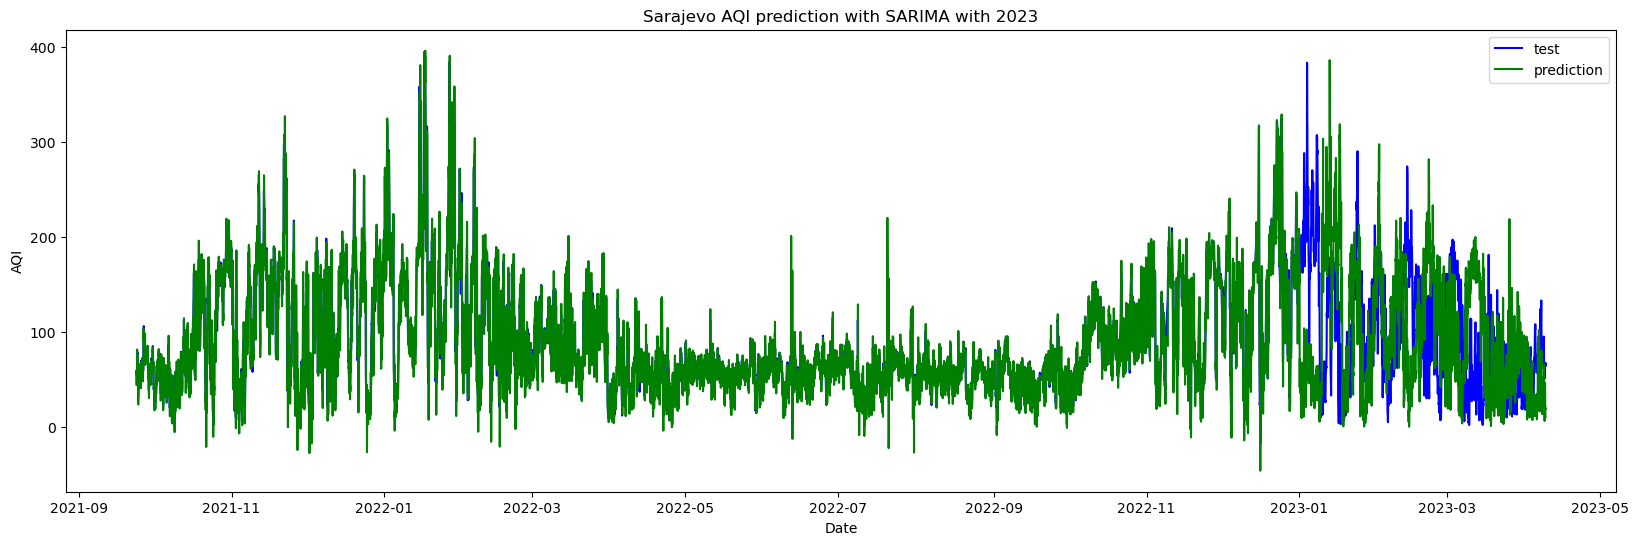

In [26]:
# plot forecasts against actual outcomes
pyplot.figure(figsize=(20,6))
pyplot.plot(test4, color='blue', label='test')
pyplot.plot(test4.index, predictionsFull, color='green', label='prediction')
pyplot.legend()
pyplot.xlabel("Date")
pyplot.ylabel("AQI")
pyplot.title("Sarajevo AQI prediction with SARIMA with 2023")
pyplot.savefig('C:/Pythondatasets/SARIMA_Prediction_Sarajevo_sveGodine.png')
pyplot.show()

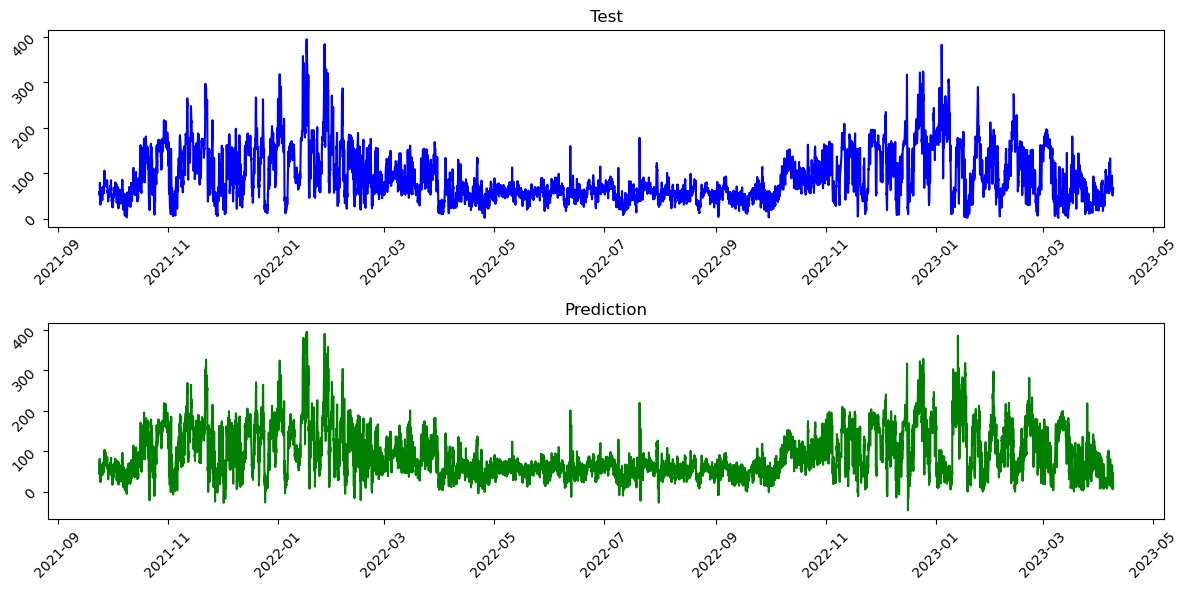

In [25]:
# Initialise the subplot function using number of rows and columns
figure, axis = pyplot.subplots(2, 1, figsize=(12, 6))

# For Sine Function
axis[0].plot(test4, color='blue')
axis[0].set_title("Test")
axis[0].tick_params(labelrotation=45)

# For Tangent Function
axis[1].plot(test4.index, predictionsFull, color='green')
axis[1].set_title("Prediction")
axis[1].tick_params(labelrotation=45)

figure.tight_layout()

pyplot.savefig('C:/Pythondatasets/SARIMA_Prediction_Sarajevo_Dvije_sLike_final_sveGodine.png')
# Combine all the operations and display
pyplot.show()

In [24]:
print(predictionsFull)

[44.419907, 53.794239, 58.167585, 54.6757, 55.149161, 59.203521, 45.492961, 81.412252, 43.776406, 65.078354, 70.990492, 75.239539, 74.751457, 61.300988, 64.603087, 69.47033, 55.11217, 35.087222, 23.591235, 40.035728, 66.774567, 57.789006, 60.393756, 49.412408, 42.825667, 53.0926, 63.627902, 46.986313, 40.517881, 43.377631, 63.831308, 62.288934, 54.399616, 54.036563, 53.997653, 51.073827, 64.25152, 64.82694, 53.05303, 48.358817, 53.926361, 56.473873, 45.763006, 40.796526, 59.221901, 59.123202, 65.880225, 66.713303, 67.644893, 66.271952, 64.162837, 65.273356, 58.528438, 52.473289, 49.568405, 72.207683, 49.457621, 59.357947, 70.600918, 70.851553, 72.635746, 60.443851, 60.357666, 47.883593, 59.193252, 60.547739, 59.696424, 60.485335, 85.247002, 103.537758, 103.494642, 89.215258, 101.97233, 90.211031, 81.527294, 85.464068, 83.625061, 68.151664, 69.486843, 89.913111, 81.888641, 86.33027, 68.672373, 98.255554, 65.21002, 77.555156, 74.523033, 70.308888, 68.348793, 79.813267, 82.702234, 78.8075

In [29]:
len(predictions2023)

2328

In [32]:
test2023=test['2023-01-01 00:00:00':'2023-04-09 03:00:00']
test2023

Date (LT)
2023-01-01 00:00:00    166
2023-01-01 01:00:00    180
2023-01-01 02:00:00    183
2023-01-01 03:00:00    191
2023-01-01 04:00:00    182
                      ... 
2023-04-08 23:00:00     64
2023-04-09 00:00:00     63
2023-04-09 01:00:00     67
2023-04-09 02:00:00     64
2023-04-09 03:00:00     67
Name: AQI, Length: 2328, dtype: int64

In [33]:
# evaluate forecasts
from math import sqrt

rmse = sqrt(mean_squared_error(test2023, predictions2023))
print('Test RMSE: %.3f' % rmse)

from sklearn.metrics import mean_absolute_error
print('Test MAE: %.3f' % mean_absolute_error(test2023, predictions2023))

from sklearn.metrics import mean_absolute_error
print('Test MSE: %.3f' % mean_squared_error(test2023, predictions2023))

from sklearn.metrics import r2_score
print('Test R-SQUARE: %.3f' % r2_score(test2023, predictions2023))

Test RMSE: 88.806
Test MAE: 69.437
Test MSE: 7886.435
Test R-SQUARE: -1.038


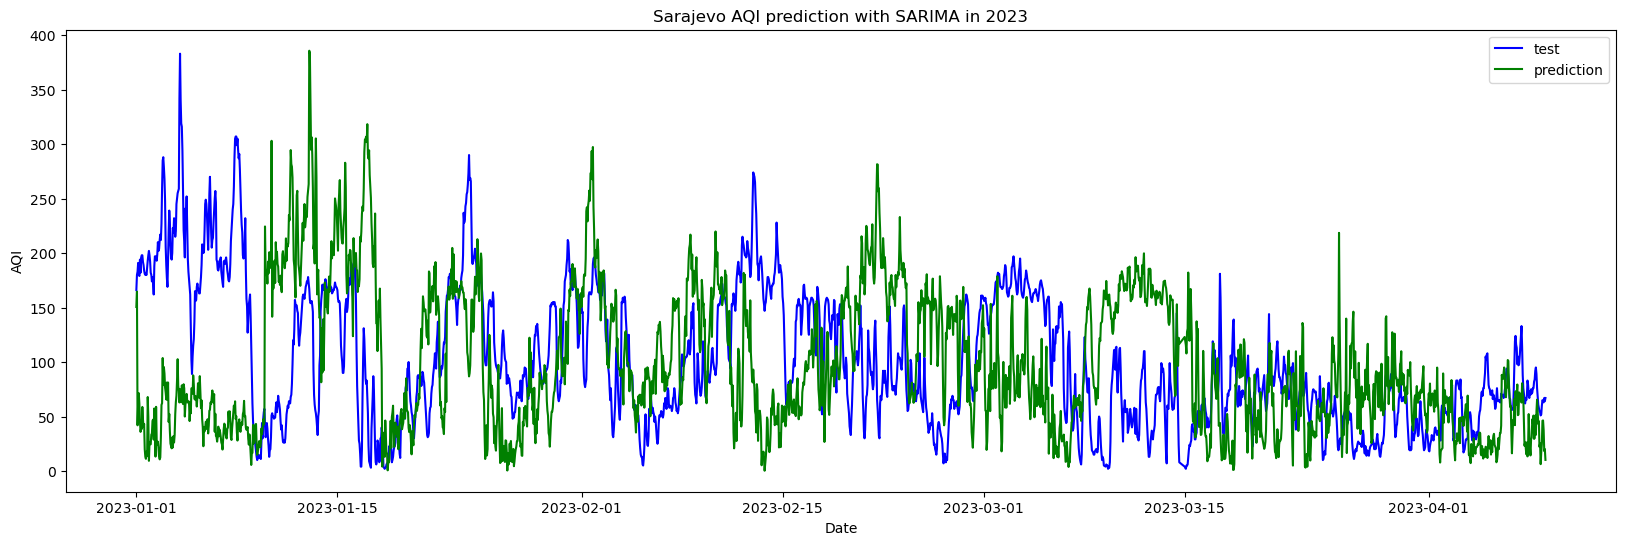

In [34]:
# plot forecasts against actual outcomes
pyplot.figure(figsize=(20,6))
pyplot.plot(test2023, color='blue', label='test')
pyplot.plot(test2023.index, predictions2023, color='green', label='prediction')
pyplot.legend()
pyplot.xlabel("Date")
pyplot.ylabel("AQI")
pyplot.title("Sarajevo AQI prediction with SARIMA in 2023")
pyplot.savefig('C:/Pythondatasets/SARIMA_Prediction_Sarajevo_2023.png')
pyplot.show()

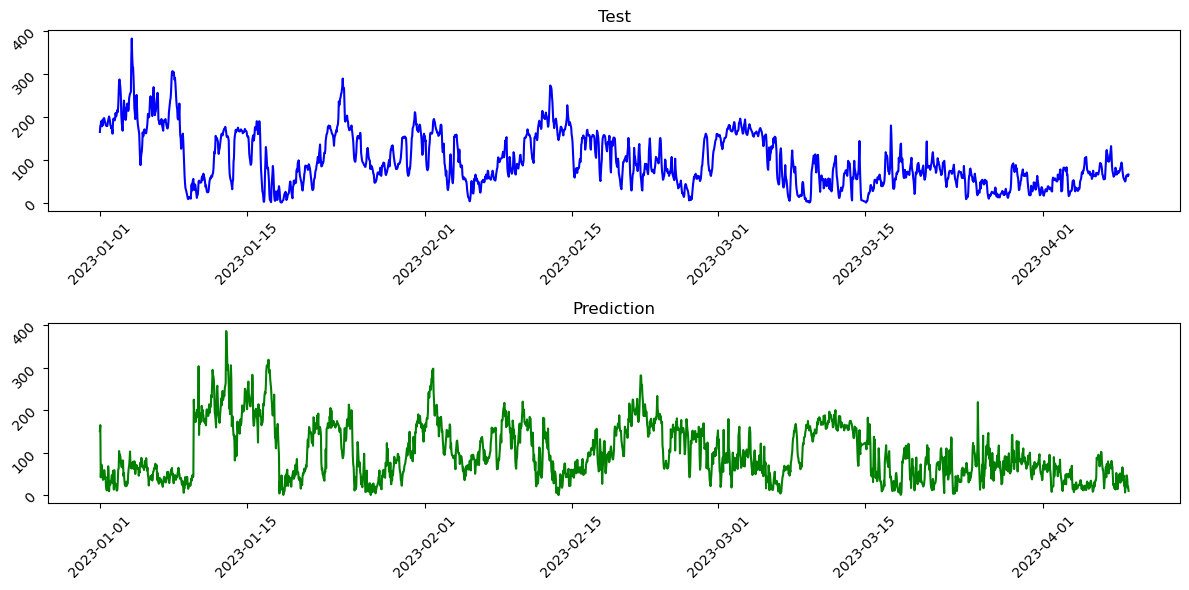

In [35]:
# Initialise the subplot function using number of rows and columns
figure, axis = pyplot.subplots(2, 1, figsize=(12, 6))

# For Sine Function
axis[0].plot(test2023, color='blue')
axis[0].set_title("Test")
axis[0].tick_params(labelrotation=45)

# For Tangent Function
axis[1].plot(test2023.index, predictions2023, color='green')
axis[1].set_title("Prediction")
axis[1].tick_params(labelrotation=45)

figure.tight_layout()

pyplot.savefig('C:/Pythondatasets/SARIMA_Prediction_Sarajevo_Dvije_sLike_final_2023.png')
# Combine all the operations and display
pyplot.show()

In [36]:
test2023

Date (LT)
2023-01-01 00:00:00    166
2023-01-01 01:00:00    180
2023-01-01 02:00:00    183
2023-01-01 03:00:00    191
2023-01-01 04:00:00    182
                      ... 
2023-04-08 23:00:00     64
2023-04-09 00:00:00     63
2023-04-09 01:00:00     67
2023-04-09 02:00:00     64
2023-04-09 03:00:00     67
Name: AQI, Length: 2328, dtype: int64

In [38]:
test2023

Date (LT)
2023-01-01 00:00:00    166
2023-01-01 01:00:00    180
2023-01-01 02:00:00    183
2023-01-01 03:00:00    191
2023-01-01 04:00:00    182
                      ... 
2023-05-09 21:00:00     34
2023-05-09 22:00:00     42
2023-05-09 23:00:00     52
2023-05-10 00:00:00     49
2023-05-10 01:00:00     49
Name: AQI, Length: 3064, dtype: int64